In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

from ipywidgets import widgets
from ipywidgets import interact


def plot_scans(img_arr_list, title_list):
    cols = len(img_arr_list)
    num_slices = img_arr_list[0].shape[0]

    def callback(z=None):
        fig, ax = plt.subplots(1, cols, figsize=(3*cols, 3*cols), squeeze=False)
        for idx in range(cols):
            ax[0][idx].imshow(img_arr_list[idx][z, :, :], cmap='gray')
            ax[0][idx].title.set_text(title_list[idx])
            ax[0][idx].axis('off')
            ax[0][idx].grid(False)

        fig.tight_layout()
        fig.show()

    interact(
        callback,
        z=widgets.IntSlider(value=0, min=0, max=(num_slices - 1), step=1)
    )

In [2]:
import torch

In [3]:
import pyrootutils
import hydra

root = pyrootutils.setup_root(search_from="./", indicator=[".git", "pyproject.toml"], pythonpath=True, dotenv=True)


In [4]:
import pandas as pd

In [24]:
pd.read_csv("lidc_sample_data_to_work_fpr.csv")

,SeriesUID,Manufacturer,ConvolutionKernel,spacing_label
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.226152078193...,Philips,B,2
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.161855583909...,Philips,B,2
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433...,Philips,B,2
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.172573195301...,SIEMENS,B30f,1
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.842317928015...,SIEMENS,B30f,1
...,...,...,...,...
146,1.3.6.1.4.1.14519.5.2.1.6279.6001.664409965623...,GE MEDICAL SYSTEMS,STANDARD,4
147,1.3.6.1.4.1.14519.5.2.1.6279.6001.145283812746...,GE MEDICAL SYSTEMS,STANDARD,4
148,1.3.6.1.4.1.14519.5.2.1.6279.6001.814122498113...,GE MEDICAL SYSTEMS,STANDARD,4
149,1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982...,GE MEDICAL SYSTEMS,STANDARD,4


In [5]:
import numpy as np

In [34]:
a = np.unique([1,2,3,1,0,1,2,3,-100, 3,0,0,1])

In [38]:
new_array = a[a != 6]


In [39]:
new_array.shape[0]

5

In [4]:
from src.common.nn_modules.nets.classifiers.qnet import Qnet

In [64]:
qnet = Qnet(num_classes=2,return_feats=False)

In [20]:
qnet.forward(images = torch.rand(3,1,32, 48, 48)).shape

torch.Size([3, 2])

In [48]:
images = torch.rand(3,1,32, 48, 48)

In [56]:
images.shape[-3:] == (32,48,48)

True

In [634]:
torch.Tensor((16,32,32)).shape

torch.Size([3])

In [640]:
torch.rand(2,1,32, 48, 48).shape

torch.Size([2, 1, 32, 48, 48])

In [23]:
import pandas as pd
df = pd.read_csv("/home/users/shubham.kumar/projects/qct_training_framework/notebooks/lidc_fpr_sl.csv")

In [47]:
len(df[(df["cluster"]==0) & (df["label"]==0) & (df["Status"]=="val") ])

3023

In [6]:
hydra.core.global_hydra.GlobalHydra.instance().clear()
hydra.initialize("../configs/datamodule/", version_base="1.2")
data_module = hydra.compose("fpr_mae_datamodule.yaml")

In [5]:
datamodule = hydra.utils.instantiate(data_module)

InstantiationException: Error locating target 'src.datamodules.base_dataloader.MetaClsDataModule', see chained exception above.

In [6]:
train_ds = datamodule.train_ds
val_ds = datamodule.val_ds
test_ds = datamodule.test_ds

In [7]:
len(train_ds)

536838

In [8]:
i = 22334
# data = test_ds[i]
data = train_ds[i]
image = data['image'].squeeze(0)

In [9]:
image = data['image'].squeeze(0)

In [10]:
image.shape

torch.Size([16, 48, 48])

In [11]:
import cv2
import numpy as np

# Assuming 'tensor' is your 16x48x48 tensor
smoothed_tensor = np.zeros_like(image)

for i in range(image.shape[0]):  # Iterate through each slice
    smoothed_tensor[i, :, :] = cv2.GaussianBlur(image[i, :, :].numpy(), (3, 3), 0)


In [12]:
smoothed_tensor.shape

(16, 48, 48)

In [13]:
image.shape

torch.Size([16, 48, 48])

In [14]:
plot_scans([image , smoothed_tensor] , ["" ,""])

interactive(children=(IntSlider(value=0, description='z', max=15), Output()), _dom_classes=('widget-interact',…

In [6]:
from src.common.nn_modules.nets.mae.mae3d import MAE3D

In [7]:
from src.common.nn_modules.nets.mae.mae3d_classification import ViTMAEForImageClassification

In [8]:
from src.common.nn_modules.nets.segmentation.multitaskfusion import modify_model_state_dict

In [9]:
#ckpt_path = "/data_nas5/qer/shubham/mae3d_checkpoints/fpr_mae/runs/2023-11-15_10-15-31/checkpoints/epoch=94_step=49875_val_loss=0.66.ckpt"


In [10]:
ckpt_path = "/data_nas5/qer/shubham/mae3d_checkpoints/fpr_mae/runs/2023-11-14_11-44-42/checkpoints/epoch=219_step=115500_val_loss=0.65.ckpt"



In [36]:
ckpt_path = "/data_nas5/qer/shubham/mae3d_checkpoints/fpr_mae/runs/2023-12-20_21-59-56/checkpoints/epoch=123_step=27528_val_loss=0.01.ckpt"



In [7]:
hydra.core.global_hydra.GlobalHydra.instance().clear()
hydra.initialize("../configs/model/", version_base="1.2")
model_config = hydra.compose("mae3d.yaml")

/home/users/shubham.kumar/miniconda3/envs/qct_deep/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'mae3d.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [8]:
model_config

{'optimizer': {'_target_': 'torch.optim.SGD', '_partial_': True, 'lr': 0.1, 'weight_decay': 0.0001, 'momentum': 0.9}, 'scheduler': {'_target_': 'torch.optim.lr_scheduler.OneCycleLR', '_partial_': True, 'max_lr': 0.5, 'epochs': '${trainer.max_epochs}'}, '_target_': 'src.models.mae3d_module.MAE3DModule', 'model': {'_target_': 'src.common.nn_modules.nets.mae.mae3d.MAE3D', 'pos_embed_type': 'sincos', 'mask_ratio': 0.7, 'input_size': [48, 48, 16], 'patch_size': [6, 6, 4], 'in_chans': 1, 'encoder_embed_dim': 768, 'encoder_depth': 6, 'encoder_num_heads': 12, 'decoder_embed_dim': 384, 'decoder_depth': 4, 'decoder_num_heads': 12, 'encoder_drop_rate': 0.2}}

In [15]:
vit_mae_model = hydra.utils.instantiate(model_config["net"]["classification"])

In [21]:
import yaml

with open("/data_nas5/qer/shubham/mae3d_checkpoints/fpr_mae/runs/2023-12-20_21-59-56/tensorboard/version_0/hparams.yaml", 'r') as file:
    data = yaml.safe_load(file)



In [34]:
model_config = data['model']['model']

In [35]:
model_config

{'_target_': 'src.common.nn_modules.nets.mae.mae3d.MAE3D',
 'pos_embed_type': 'sincos',
 'mask_ratio': 0.7,
 'input_size': [48, 48, 16],
 'patch_size': [6, 6, 4],
 'in_chans': 1,
 'encoder_embed_dim': 768,
 'encoder_depth': 4,
 'encoder_num_heads': 12,
 'decoder_embed_dim': 384,
 'decoder_depth': 4,
 'decoder_num_heads': 12,
 'encoder_drop_rate': 0.15}

In [24]:
model = hydra.utils.instantiate(model_config)

In [25]:
model.encoder_embed_dim

768

In [26]:
model

MAE3D(
  (encoder): MAEViTEncoder(
    (patch_embed): PatchEmbed3D(
      (proj): Conv3d(1, 768, kernel_size=(6, 6, 4), stride=(6, 6, 4))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.15, inplace=False)
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.15, inplace=False)
        )
        (ls1): Identity()
        (drop_path1): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (drop1): Dropout(p=0.15, inplace=False)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop2)

In [31]:
k= torch.load(ckpt_path, map_location = "cpu")
state_dict = k['state_dict']

In [33]:
state_dict.keys()

odict_keys(['model.encoder_pos_embed', 'model.decoder_pos_embed', 'model.mask_token', 'model.encoder.cls_token', 'model.encoder.patch_embed.proj.weight', 'model.encoder.patch_embed.proj.bias', 'model.encoder.blocks.0.norm1.weight', 'model.encoder.blocks.0.norm1.bias', 'model.encoder.blocks.0.attn.qkv.weight', 'model.encoder.blocks.0.attn.qkv.bias', 'model.encoder.blocks.0.attn.proj.weight', 'model.encoder.blocks.0.attn.proj.bias', 'model.encoder.blocks.0.norm2.weight', 'model.encoder.blocks.0.norm2.bias', 'model.encoder.blocks.0.mlp.fc1.weight', 'model.encoder.blocks.0.mlp.fc1.bias', 'model.encoder.blocks.0.mlp.fc2.weight', 'model.encoder.blocks.0.mlp.fc2.bias', 'model.encoder.blocks.1.norm1.weight', 'model.encoder.blocks.1.norm1.bias', 'model.encoder.blocks.1.attn.qkv.weight', 'model.encoder.blocks.1.attn.qkv.bias', 'model.encoder.blocks.1.attn.proj.weight', 'model.encoder.blocks.1.attn.proj.bias', 'model.encoder.blocks.1.norm2.weight', 'model.encoder.blocks.1.norm2.bias', 'model.enco

In [29]:
new_state_dict = modify_model_state_dict(state_dict , "model." , "")


In [30]:
model.load_state_dict(new_state_dict)

<All keys matched successfully>

In [23]:
xx = torch.Tensor(5,1,48,48,16)

In [24]:
xx.shape

torch.Size([5, 1, 48, 48, 16])

In [25]:
t = model.get_classification_embed(x = xx)

In [26]:
t.shape

torch.Size([5, 768])

In [33]:
del model.decoder

In [34]:
del model.encoder_to_decoder
del model.criterion

In [37]:
model.encoder_pos_embed.shape

torch.Size([1, 256, 768])

In [21]:
!nvidia-smi

Tue Dec 19 18:00:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 37%   40C    P8    31W / 350W |  17022MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:41:00.0 Off |                  N/A |
| 36%   

In [22]:
model = model.to("cuda:2")


In [24]:
from safetensors.torch import save_file
from safetensors import safe_open
from tqdm.auto import tqdm

# with safe_open("/home/users/shubham.kumar/projects/fpr/1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102183795724852353824.safetensors", framework="pt") as f:
#     tensor_slice = f.get_slice("image")
    

In [29]:
no_nodules_txt = "/home/users/shubham.kumar/projects/qct_nodule_detection/studies/only_lidc/nn_scans_segregated/no_nodules_1.txt"
with open(no_nodules_txt) as f:
    lines = f.readlines()
    
no_nodules_sid = [line[:-1] for line in lines]


nodules_txt = "/home/users/shubham.kumar/projects/qct_nodule_detection/studies/only_lidc/nn_scans_segregated/nodules_1.txt"
with open(nodules_txt) as f:
    lines = f.readlines()
    
nodules_sid = [line[:-1] for line in lines]

    

In [25]:
import numpy as np
import os
from tqdm.auto import tqdm
from qer.utils.preprocessing.windowing import window_generator
from torch.utils.data import DataLoader, TensorDataset

lung_window = window_generator(1600 , -600)

chestct_dir = "/data_nas5/qct/prog_monitor/nlst_chestct/"

window_size = [16,48,48]
h,w,d = window_size
strides = [6,32,32]

def calculate_iou(mask, vol):
    intersection = np.sum(np.logical_and(mask, vol))
    union = np.sum(np.logical_or(mask, vol))
    iou = intersection / union
    return iou

def sliding_window_3d(array, mask , window_size, strides):
    D, H, W = array.shape
    d, h, w = window_size
    s_d, s_h, s_w = strides

    result = []
    coords =[]

    for i in range(0, D - d + 1, s_d):
        for j in range(0, H - h + 1, s_h):
            for k in range(0, W - w + 1, s_w):
                patch = array[i:i+d, j:j+h, k:k+w]
                mask_patch = mask[i:i+d, j:j+h, k:k+w]
                
                T = np.ones(patch.shape)
                
                iou = calculate_iou(mask_patch , T)
                if iou >= 0.5 : 
                    result.append(patch)
                    coords.append(torch.tensor([i,i+d,j,j+h,k,k+w]))

    return result , coords


Unable to find logging config yaml. Configuring fallback values
[2023-12-19 18:01:55 +0530] [WARNING] Invalid or unsupported selector 'select:not(:has(option[selected])) option:first-of-type,
option[selected]:not(option[selected] ~ option[selected]) ', ('Unknown pseudo-class', 'has')


In [81]:
spacing_dict = {}
for sid in tqdm(nodules_sid + no_nodules_sid): 

    ct = torch.load(os.path.join(chestct_dir , f"{sid}.pt"))
    sp = ct.scan.spacing
    T = np.array([sp.x , sp.y, sp.z])
    spacing_dict[sid] = T

  0%|          | 0/1018 [00:00<?, ?it/s]

In [87]:
li_sids = []
li_spacing_embeddings = []
for k , value in spacing_dict.items() :
    li_sids.append(k)
    li_spacing_embeddings.append(value)

In [97]:
spacing_embed = np.stack(li_spacing_embeddings)

In [100]:
#Clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(spacing_embed)

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=0)
sampled_embeddings_2d = tsne.fit_transform(spacing_embed)


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


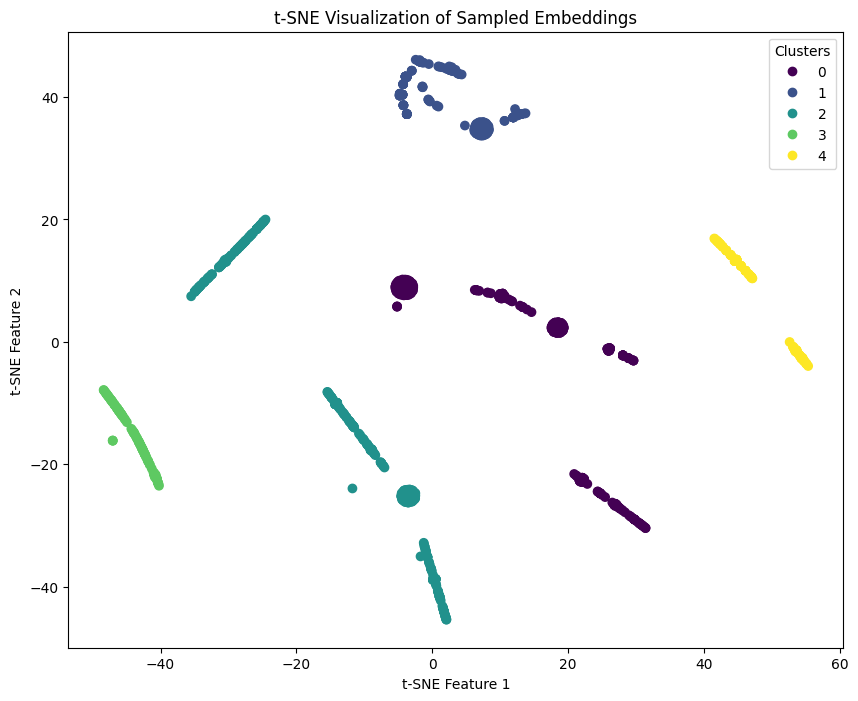

In [101]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(sampled_embeddings_2d[:, 0], sampled_embeddings_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('t-SNE Visualization of Sampled Embeddings')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

# Create a legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [104]:
kmeans.labels_

array([3, 4, 3, ..., 1, 0, 1], dtype=int32)

In [105]:
li_sids

['1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102183795724852353824',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.131939324905446238286154504249',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.213233719488315954975724605159',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.340202188094259402036602717327',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.311102747717834916358933873912',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.166112018536246672777968137997',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.151647338241909635299641922057',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.207201727479884428632451006739',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.400871509992541458184881866614',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.453946099750629491201946672998',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.115689755198961598722158240121',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.619372068417051974713149104919',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615202213033480003264',
 '1.3.6.1.4.1.14519.5.2.1.6279.600

In [107]:
y = []

for i in range(len(li_sids)):
    y.append({"SeriesUID" :li_sids[i] , "spacing_label" :kmeans.labels_[i]}) 
    

In [109]:
df_spacing = pd.DataFrame.from_records(y)

In [111]:
import pandas as pd
df_kernel = pd.read_csv("/home/users/shubham.kumar/projects/fpr/lidc_kernel.csv")

In [113]:
pd.merge(df_kernel , df_spacing, on= "SeriesUID").to_csv("/home/users/shubham.kumar/projects/fpr/lidc_kernel.csv",index=False)



In [114]:
df_data = pd.read_csv("/home/users/shubham.kumar/projects/fpr/lidc_kernel.csv")

In [133]:
df_data

,SeriesUID,Manufacturer,ConvolutionKernel,spacing_label
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102...,TOSHIBA,FC01,3
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.131939324905...,TOSHIBA,FC10,4
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.213233719488...,TOSHIBA,FC01,3
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.340202188094...,SIEMENS,B31s,3
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.311102747717...,SIEMENS,B31f,3
...,...,...,...,...
1013,1.3.6.1.4.1.14519.5.2.1.6279.6001.121805476976...,GE MEDICAL SYSTEMS,BONE,0
1014,1.3.6.1.4.1.14519.5.2.1.6279.6001.199069398344...,GE MEDICAL SYSTEMS,STANDARD,1
1015,1.3.6.1.4.1.14519.5.2.1.6279.6001.215086589927...,GE MEDICAL SYSTEMS,STANDARD,1
1016,1.3.6.1.4.1.14519.5.2.1.6279.6001.152706273988...,GE MEDICAL SYSTEMS,BONE,0


In [134]:
import pandas as pd

# Assuming df is your DataFrame
# Group by columns 'A' and 'B', and sample 20% from each group
sampled_df = df_data.groupby(['ConvolutionKernel', 'spacing_label'], group_keys=False).apply(lambda x: x.sample(frac=0.15))

# Reset index if needed
sampled_df = sampled_df.reset_index(drop=True)


In [135]:
sampled_df["ConvolutionKernel"].value_counts()

STANDARD    58
BONE        34
B30f        15
LUNG        10
FC01         9
D            7
B45f         5
B31s         4
B            3
B31f         3
B70f         2
C            1
Name: ConvolutionKernel, dtype: int64

In [136]:
sampled_df["spacing_label"].value_counts()

2    50
0    43
1    26
3    17
4    15
Name: spacing_label, dtype: int64

In [137]:
# sampled_df.to_csv("lidc_sample_data_to_work_fpr.csv" , index =False)

In [27]:
df_nlst_negative_to_work = pd.read_csv("/home/users/shubham.kumar/projects/fpr/nlst_negative_sample_data.csv")
nodules_sid = df_nlst_negative_to_work.series_id.values

In [64]:
for sid in tqdm(nodules_sid): 
    if not os.path.exists(os.path.join("/cache/fast_data_nas8/qct/shubham/cls_embed_nlst_safetensors", f"{sid}.safetensors")):
        ct = torch.load(os.path.join(chestct_dir , f"{sid}.pt"))
        arr = ct.scan.array 
        mask = ct.lung_mask.pred.mask.array
        windowed_arr = lung_window(arr)
        res , coords = sliding_window_3d(windowed_arr,mask,  window_size, strides)
        y = np.array(res)

        # Assuming y is your data and model is your MAE3D model
        T = torch.from_numpy(y)
        dataset = TensorDataset(T)
        batch_size = 32  # Choose a batch size that fits in your GPU
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

        cls_embeddings = []

        # Process in batches
        for batch in tqdm(loader):
            image = batch[0].to("cuda:0")
            x = image.unsqueeze(1)  # Add c1hannel dimension
            x = x.permute(0, 1, 3, 4, 2)  # Rearrange dimensions

            with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
                out = model.forward(x, apply_mask=False, return_image=True)
                cls_embeddings_batch = out[1].cpu()

            cls_embeddings.extend(cls_embeddings_batch)

            del out, x, image

        # Convert list of tensors to a single tensor
        cls_embeddings_tensor = torch.vstack(cls_embeddings)

        data_to_save = {"cls_embeddings":cls_embeddings_tensor , "coords":torch.stack(coords)}

        save_file(data_to_save, os.path.join("/cache/fast_data_nas8/qct/shubham/cls_embed_nlst_safetensors", f"{sid}.safetensors"))


  0%|          | 0/220 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [28]:
import random

In [29]:
random.shuffle(nodules_sid)

In [30]:
uids_to_work = nodules_sid

In [253]:
# uids_to_work = sampled_df.SeriesUID.values

In [254]:
random.shuffle(uids_to_work)

In [31]:
all_tensors_embed = []
all_tensors_coord = []
all_sids = []
# sid = nodules_sid[0]
for sid in tqdm(uids_to_work): 
    embed_path = os.path.join("/cache/fast_data_nas8/qct/shubham/cls_embed_nlst_safetensors", f"{sid}.safetensors")
    if os.path.exists(embed_path) : 
        with safe_open(embed_path, framework="pt") as f:
            tensor_embed = f.get_slice("cls_embeddings")
            all_sids.append(sid)

            all_tensors_embed.append(tensor_embed[:-1])
            tensor_coords = f.get_slice("coords")
            all_tensors_coord.append(tensor_coords[:-1])

        
        
        

  0%|          | 0/220 [00:00<?, ?it/s]

In [32]:
combined_tensor = torch.cat(all_tensors_embed, dim=0)

In [33]:
combined_tensor.shape

torch.Size([233542, 768])

In [34]:
combined_coord =  torch.cat(all_tensors_coord, dim=0)

In [35]:
len(combined_tensor)

233542

In [36]:
import torch
import torch.nn.functional as F

# Normalize cls_embeddings using PyTorch
cls_embeddings_norm = F.normalize(combined_tensor, p=2, dim=1)

In [37]:
len(uids_to_work)

220

In [38]:
len(all_sids)

220

In [39]:
# Create a list to keep track of positions
positions = {}
start = 0
for t in range(len(all_tensors_embed)):
    end = start + all_tensors_embed[t].shape[0]
    positions[all_sids[t]] = (start, end)
    start = end

In [40]:
# Create a direct mapping list
mapping_list = [None] * combined_tensor.shape[0]
for index, (start, end) in positions.items():
    for pos in range(start, end):
        mapping_list[pos] = index

In [41]:
len(mapping_list)

233542

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [50]:
cls_embeddings_norm.shape

torch.Size([233542, 768])

In [67]:
num_samples = 100000  # Number of indices to sample

# Randomly sample indices
sampled_indices = torch.randperm(cls_embeddings_norm.size(0))[:num_samples]

In [68]:
sampled_indices

tensor([203019, 180362,   1050,  ..., 221922, 147638, 106002])

In [69]:
sampled_embeddings = cls_embeddings_norm[sampled_indices]

# Clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(sampled_embeddings)


In [70]:
# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=0)
sampled_embeddings_2d = tsne.fit_transform(sampled_embeddings)


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


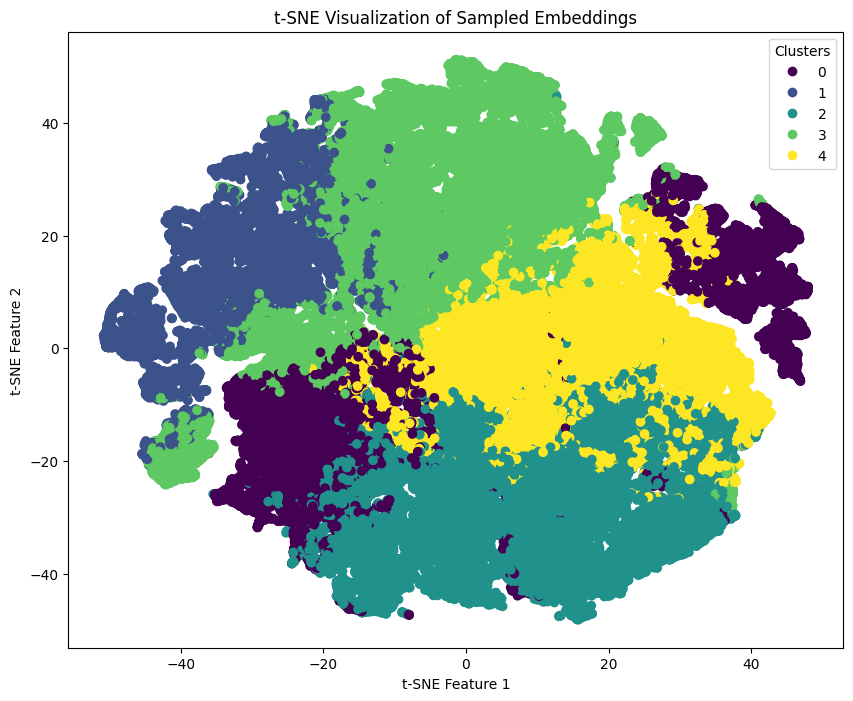

In [71]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(sampled_embeddings_2d[:, 0], sampled_embeddings_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('t-SNE Visualization of Sampled Embeddings')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

# Create a legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

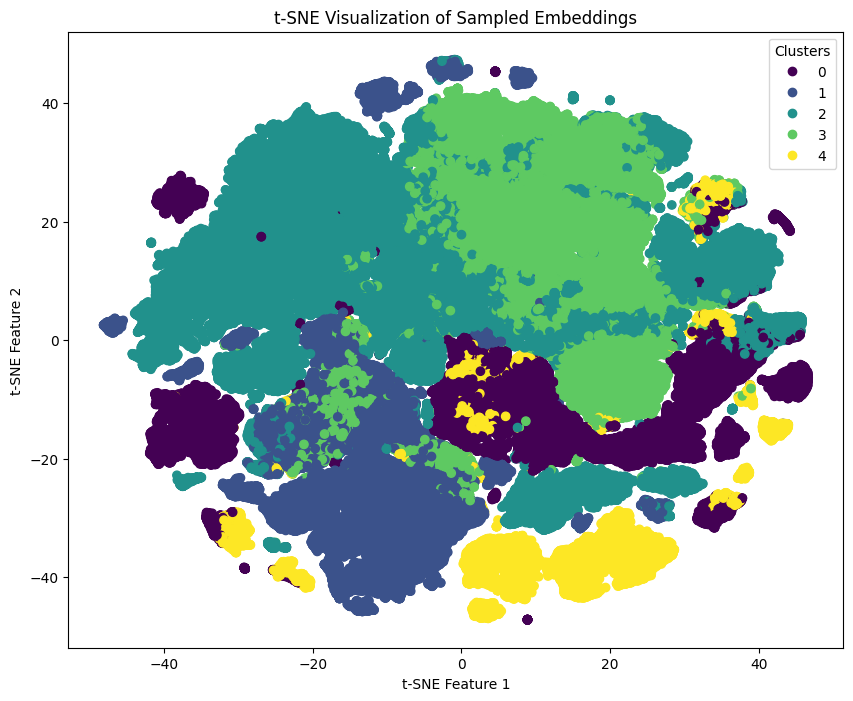

In [392]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(sampled_embeddings_2d[:, 0], sampled_embeddings_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('t-SNE Visualization of Sampled Embeddings')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

# Create a legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [72]:
sampled_embeddings.shape

torch.Size([100000, 768])

In [73]:
ttt = list(kmeans.labels_)

In [74]:
indices_0 = [index for index, value in enumerate(ttt) if value == 0]
indices_1 = [index for index, value in enumerate(ttt) if value == 1]
indices_2 = [index for index, value in enumerate(ttt) if value == 2]
indices_3 = [index for index, value in enumerate(ttt) if value == 3]
indices_4 = [index for index, value in enumerate(ttt) if value == 4]


In [75]:
final_labels = kmeans.labels_

In [76]:
len(final_labels)

100000

In [77]:
final_data = []

for j in range(len(final_labels)) : 
    cluster = final_labels[j]
    uid = mapping_list[sampled_indices[j]]
    bbox_coord = list(combined_coord[sampled_indices[j]].numpy())
    final_data.append({"SeriesUID":uid , "cluster":cluster, "bbox": bbox_coord})

In [78]:
pd.DataFrame.from_records(final_data)

,SeriesUID,cluster,bbox
0,1.3.6.1.4.1.14519.5.2.1.7009.9004.285301787891...,2,"[108, 124, 288, 336, 64, 112]"
1,1.2.840.113654.2.55.30192024211883878790462222...,3,"[24, 40, 256, 304, 352, 400]"
2,1.3.6.1.4.1.14519.5.2.1.7009.9004.196877480848...,0,"[42, 58, 224, 272, 192, 240]"
3,1.2.840.113654.2.55.13473881762722473980251067...,3,"[96, 112, 256, 304, 416, 464]"
4,1.2.840.113654.2.55.25978699056934516123494367...,0,"[66, 82, 256, 304, 352, 400]"
...,...,...,...
99995,1.2.840.113654.2.55.33593884840221586253939812...,2,"[102, 118, 192, 240, 384, 432]"
99996,1.2.840.113654.2.55.86692494959234055443682342...,4,"[60, 76, 128, 176, 224, 272]"
99997,1.2.840.113654.2.55.23018618664299470029611229...,4,"[72, 88, 192, 240, 128, 176]"
99998,1.2.840.113654.2.55.22084245517968704647300402...,4,"[30, 46, 256, 304, 288, 336]"


In [81]:
pd.DataFrame.from_records(final_data).to_csv("nlst_fpr_sl.csv" , index=False)

In [82]:
pwd

'/home/users/shubham.kumar/projects/qct_training_framework/notebooks'

In [430]:
df_lidc = pd.read_csv("/home/users/shubham.kumar/projects/qct_training_framework/notebooks/fpr_lidc_raw.csv")

In [553]:
df_lidc_fpr_sl = pd.read_csv("/home/users/shubham.kumar/projects/qct_training_framework/notebooks/lidc_fpr_sl.csv")



In [581]:
unique_series_uids = list(df_lidc_fpr_sl.SeriesUID.unique())

In [577]:
len(unique_series_uids)

127

In [641]:
df_lidc_fpr_sl

,SeriesUID,cluster,bbox,Status,label
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2,"[144, 160, 256, 304, 400, 448]",val,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.842317928015...,3,"[372, 388, 368, 416, 128, 176]",train,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.266009527139...,0,"[132, 148, 288, 336, 352, 400]",val,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.900182736599...,2,"[114, 130, 192, 240, 96, 144]",train,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.226889213794...,1,"[78, 94, 304, 352, 160, 208]",train,0
...,...,...,...,...,...
199995,1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931...,3,"[282, 298, 384, 432, 96, 144]",train,0
199996,1.3.6.1.4.1.14519.5.2.1.6279.6001.226152078193...,2,"[174, 190, 240, 288, 128, 176]",val,0
199997,1.3.6.1.4.1.14519.5.2.1.6279.6001.140527383975...,4,"[66, 82, 176, 224, 128, 176]",val,0
199998,1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464...,0,"[120, 136, 304, 352, 64, 112]",train,0


In [598]:
df_pos = pd.read_csv("/home/users/shubham.kumar/projects/fpr/lidc_nodules_bbox.csv")

In [599]:
train_uids = df_lidc_fpr_sl[df_lidc_fpr_sl["Status"] == "train"].SeriesUID.unique()
val_uids = df_lidc_fpr_sl[df_lidc_fpr_sl["Status"] == "val"].SeriesUID.unique()
test_uids = df_lidc_fpr_sl[df_lidc_fpr_sl["Status"] == "test"].SeriesUID.unique()

In [601]:
df_pos["Status"] = "na"

In [602]:
df_pos.loc[df_pos["SeriesUID"].isin(train_uids) ,  "Status"] = "train"

In [603]:
df_pos.loc[df_pos["SeriesUID"].isin(val_uids) ,  "Status"] = "val"
df_pos.loc[df_pos["SeriesUID"].isin(test_uids) ,  "Status"] = "test"

In [604]:
df_pos["Status"].value_counts()

na       2258
train     234
test       97
val        59
Name: Status, dtype: int64

In [605]:
T = df_pos[df_pos["Status"] == "na"].SeriesUID.unique()

In [607]:
len(T)

756

In [608]:
random.shuffle(T)

In [609]:
pos_train_uids = T[0:int(len(T)*0.6)]
pos_val_uids = T[int(len(T)*0.6): int(len(T)*0.8)]
pos_test_uids = T[int(len(T)*0.8) : ]

In [611]:
df_pos.loc[df_pos["SeriesUID"].isin(pos_val_uids) ,  "Status"] = "val"
df_pos.loc[df_pos["SeriesUID"].isin(pos_test_uids) ,  "Status"] = "test"
df_pos.loc[df_pos["SeriesUID"].isin(pos_train_uids) ,  "Status"] = "train"

In [615]:
# df_pos.to_csv("/home/users/shubham.kumar/projects/fpr/lidc_nodules_bbox.csv" , index =False)

In [616]:
df_pos

,SeriesUID,annot_id,xc,yc,zc,w,h,d,Status
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.173556680294...,1.3.6.1.4.1.14519.5.2.1.6279.6001.173556680294...,334.0,357.5,44.0,9.0,8.0,3.0,test
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.404768898286...,1.3.6.1.4.1.14519.5.2.1.6279.6001.404768898286...,371.0,362.0,169.0,37.0,33.0,17.0,train
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.404768898286...,1.3.6.1.4.1.14519.5.2.1.6279.6001.404768898286...,222.0,158.5,134.5,5.0,6.0,4.0,train
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.202643836890...,1.3.6.1.4.1.14519.5.2.1.6279.6001.202643836890...,126.0,272.5,56.5,23.0,24.0,4.0,val
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.125356649712...,1.3.6.1.4.1.14519.5.2.1.6279.6001.125356649712...,372.5,201.5,195.5,6.0,6.0,4.0,train
...,...,...,...,...,...,...,...,...,...
2643,1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982...,1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982...,448.0,180.5,104.0,7.0,8.0,3.0,val
2644,1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982...,1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982...,202.0,313.0,90.0,13.0,13.0,3.0,val
2645,1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982...,1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982...,402.5,170.5,82.0,6.0,8.0,3.0,val
2646,1.3.6.1.4.1.14519.5.2.1.6279.6001.266009527139...,1.3.6.1.4.1.14519.5.2.1.6279.6001.266009527139...,347.5,370.0,142.5,22.0,19.0,8.0,val


In [542]:
req_df_pos = df_pos[df_pos["SeriesUID"].isin(all_series_uids)]

In [546]:
req_df_pos

,SeriesUID,annot_id,xc,yc,zc,w,h,d
26,1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433...,1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433...,96.0,237.5,138.5,13.0,14.0,10.0
27,1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433...,1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433...,108.5,254.5,133.5,12.0,12.0,8.0
28,1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433...,1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433...,163.0,217.0,122.5,5.0,5.0,4.0
29,1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433...,1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433...,380.0,201.0,111.0,5.0,5.0,3.0
30,1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433...,1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433...,353.0,393.0,95.0,7.0,9.0,3.0
...,...,...,...,...,...,...,...,...
2643,1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982...,1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982...,448.0,180.5,104.0,7.0,8.0,3.0
2644,1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982...,1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982...,202.0,313.0,90.0,13.0,13.0,3.0
2645,1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982...,1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982...,402.5,170.5,82.0,6.0,8.0,3.0
2646,1.3.6.1.4.1.14519.5.2.1.6279.6001.266009527139...,1.3.6.1.4.1.14519.5.2.1.6279.6001.266009527139...,347.5,370.0,142.5,22.0,19.0,8.0


In [543]:
from loguru import logger

In [544]:
check = []

for i in tqdm(req_df_pos.index) :
    row = req_df_pos.loc[i]
    uid = row["SeriesUID"]
    xc = row["xc"]
    yc = row["yc"]
    zc = row["zc"]
    w = row["w"]
    h = row["h"]
    d = row["d"]
    
    logger.debug(f"{uid} : {zc} , {yc} , {xc} , {d}, {h}, {w}")
    
    
    new_df = df_lidc_fpr_sl[df_lidc_fpr_sl["SeriesUID"] == uid]
    
    for j in tqdm(new_df.index) :
        n_row = new_df.loc[j]
        bbox = eval(n_row["bbox"])
        
#         if bbox[0] < zc < bbox[1]  and bbox[2] < yc < bbox[3] and bbox[4] < xc < bbox[5] :
#             print(bbox , j)
#             check.append(j)
            
        if bbox[0] - max(d/2,8) < zc < bbox[1]+max(d/2,8)  and bbox[2]-max(h/2,24) < yc < bbox[3]+max(h/2,24) and bbox[4]-max(w/2,24) < xc < bbox[5]+max(w/2,24) :
            print(bbox , j)
            check.append(j)
        
        
    
    
    
    

  0%|          | 0/390 [00:00<?, ?it/s]

2023-12-11 11:43:26.547 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433161353885866806005 : 138.5 , 237.5 , 96.0 , 10.0, 14.0, 13.0


  0%|          | 0/1570 [00:00<?, ?it/s]

2023-12-11 11:43:26.682 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433161353885866806005 : 133.5 , 254.5 , 108.5 , 8.0, 12.0, 12.0


[138, 154, 240, 288, 112, 160] 1904
[144, 160, 240, 288, 96, 144] 21349
[126, 142, 240, 288, 112, 160] 23049
[132, 148, 224, 272, 80, 128] 23493
[132, 148, 240, 288, 96, 144] 32204
[126, 142, 240, 288, 80, 128] 32415
[144, 160, 176, 224, 112, 160] 39116
[132, 148, 256, 304, 96, 144] 43575
[132, 148, 256, 304, 112, 160] 48410
[120, 136, 256, 304, 112, 160] 56519
[132, 148, 240, 288, 80, 128] 63091
[126, 142, 176, 224, 112, 160] 82511
[120, 136, 256, 304, 96, 144] 86568
[126, 142, 192, 240, 112, 160] 97374
[120, 136, 176, 224, 112, 160] 102937
[120, 136, 224, 272, 112, 160] 121525
[138, 154, 256, 304, 96, 144] 142849
[132, 148, 192, 240, 96, 144] 144849
[120, 136, 240, 288, 80, 128] 153512
[120, 136, 240, 288, 96, 144] 161982
[144, 160, 256, 304, 96, 144] 167865
[144, 160, 224, 272, 64, 112] 170064
[144, 160, 256, 304, 64, 112] 193656


  0%|          | 0/1570 [00:00<?, ?it/s]

2023-12-11 11:43:26.817 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433161353885866806005 : 122.5 , 217.0 , 163.0 , 4.0, 5.0, 5.0


[114, 130, 256, 304, 96, 144] 603
[138, 154, 240, 288, 112, 160] 1904
[132, 148, 208, 256, 128, 176] 5638
[138, 154, 272, 320, 128, 176] 12934
[126, 142, 240, 288, 112, 160] 23049
[114, 130, 224, 272, 112, 160] 23057
[132, 148, 224, 272, 80, 128] 23493
[132, 148, 240, 288, 96, 144] 32204
[126, 142, 240, 288, 80, 128] 32415
[132, 148, 240, 288, 128, 176] 33036
[114, 130, 192, 240, 128, 176] 37409
[114, 130, 224, 272, 80, 128] 37629
[120, 136, 256, 304, 128, 176] 39645
[132, 148, 256, 304, 96, 144] 43575
[132, 148, 256, 304, 112, 160] 48410
[120, 136, 272, 320, 112, 160] 49902
[114, 130, 272, 320, 112, 160] 52009
[120, 136, 256, 304, 112, 160] 56519
[132, 148, 240, 288, 80, 128] 63091
[120, 136, 256, 304, 96, 144] 86568
[126, 142, 192, 240, 112, 160] 97374
[120, 136, 224, 272, 112, 160] 121525
[132, 148, 272, 320, 112, 160] 132234
[138, 154, 192, 240, 128, 176] 138171
[138, 154, 256, 304, 96, 144] 142849
[132, 148, 192, 240, 96, 144] 144849
[126, 142, 272, 320, 128, 176] 145162
[114, 130

  0%|          | 0/1570 [00:00<?, ?it/s]

[126, 142, 176, 224, 176, 224] 6115
[108, 124, 208, 256, 160, 208] 9195
[114, 130, 176, 224, 144, 192] 14112
[102, 118, 208, 256, 96, 144] 18006
[126, 142, 240, 288, 112, 160] 23049
[114, 130, 224, 272, 112, 160] 23057
[108, 124, 240, 288, 128, 176] 34890
[114, 130, 192, 240, 128, 176] 37409
[102, 118, 224, 272, 96, 144] 52523
[120, 136, 160, 208, 144, 192] 67830
[102, 118, 240, 288, 112, 160] 69350
[102, 118, 224, 272, 112, 160] 72424
[126, 142, 176, 224, 112, 160] 82511
[102, 118, 208, 256, 112, 160] 87260
[126, 142, 192, 240, 112, 160] 97374
[120, 136, 176, 224, 112, 160] 102937
[120, 136, 176, 224, 176, 224] 104514
[108, 124, 192, 240, 144, 192] 106654
[102, 118, 208, 256, 128, 176] 109601
[120, 136, 224, 272, 112, 160] 121525
[108, 124, 208, 256, 176, 224] 128584
[120, 136, 208, 256, 144, 192] 132477
[114, 130, 192, 240, 160, 208] 135854
[102, 118, 176, 224, 128, 176] 148206
[102, 118, 240, 288, 128, 176] 149403
[126, 142, 176, 224, 160, 208] 157123
[108, 124, 192, 240, 112, 160] 

2023-12-11 11:43:26.951 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433161353885866806005 : 111.0 , 201.0 , 380.0 , 3.0, 5.0, 5.0


  0%|          | 0/1570 [00:00<?, ?it/s]

2023-12-11 11:43:27.084 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433161353885866806005 : 95.0 , 393.0 , 353.0 , 3.0, 9.0, 7.0


[114, 130, 176, 224, 352, 400] 843
[90, 106, 192, 240, 352, 400] 6672
[90, 106, 160, 208, 336, 384] 14244
[108, 124, 160, 208, 336, 384] 20154
[108, 124, 208, 256, 384, 432] 39208
[114, 130, 144, 192, 320, 368] 69970
[90, 106, 192, 240, 336, 384] 91591
[90, 106, 224, 272, 320, 368] 99423
[102, 118, 160, 208, 336, 384] 105598
[96, 112, 224, 272, 320, 368] 107708
[114, 130, 208, 256, 336, 384] 122388
[114, 130, 208, 256, 368, 416] 123123
[108, 124, 176, 224, 320, 368] 125077
[114, 130, 208, 256, 384, 432] 130011
[90, 106, 192, 240, 320, 368] 137735
[114, 130, 176, 224, 336, 384] 141229
[108, 124, 224, 272, 368, 416] 150356
[108, 124, 160, 208, 320, 368] 165833
[90, 106, 160, 208, 320, 368] 168782
[114, 130, 192, 240, 320, 368] 173176
[108, 124, 192, 240, 368, 416] 178697
[114, 130, 224, 272, 336, 384] 181469
[102, 118, 224, 272, 336, 384] 181504
[108, 124, 144, 192, 320, 368] 194189


  0%|          | 0/1570 [00:00<?, ?it/s]

[102, 118, 336, 384, 288, 336] 3545
[84, 100, 368, 416, 304, 352] 5908
[84, 100, 352, 400, 288, 336] 27578
[102, 118, 352, 400, 288, 336] 30079
[72, 88, 352, 400, 336, 384] 34550
[96, 112, 352, 400, 304, 352] 48579
[102, 118, 352, 400, 320, 368] 55717
[90, 106, 352, 400, 336, 384] 67891
[96, 112, 336, 384, 304, 352] 69536
[90, 106, 352, 400, 304, 352] 87600
[78, 94, 352, 400, 352, 400] 92445
[84, 100, 336, 384, 304, 352] 102814
[102, 118, 352, 400, 336, 384] 112289
[72, 88, 336, 384, 304, 352] 118712
[84, 100, 352, 400, 304, 352] 120223
[84, 100, 352, 400, 336, 384] 123163
[72, 88, 352, 400, 352, 400] 123954
[102, 118, 368, 416, 304, 352] 154880
[90, 106, 368, 416, 336, 384] 155939
[90, 106, 336, 384, 336, 384] 162650


2023-12-11 11:43:27.236 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.334517907433161353885866806005 : 79.5 , 357.5 , 127.0 , 18.0, 38.0, 35.0


[90, 106, 352, 400, 352, 400] 167471
[78, 94, 336, 384, 336, 384] 169718
[72, 88, 352, 400, 304, 352] 172079
[84, 100, 352, 400, 352, 400] 177807
[78, 94, 336, 384, 288, 336] 181380
[96, 112, 368, 416, 336, 384] 189535


  0%|          | 0/1570 [00:00<?, ?it/s]

[72, 88, 368, 416, 144, 192] 3485
[72, 88, 352, 400, 112, 160] 5165
[84, 100, 304, 352, 80, 128] 9356
[60, 76, 320, 368, 144, 192] 18226
[72, 88, 352, 400, 128, 176] 19520
[72, 88, 320, 368, 112, 160] 24848
[84, 100, 304, 352, 112, 160] 37263
[84, 100, 352, 400, 96, 144] 38520
[84, 100, 336, 384, 112, 160] 43098
[84, 100, 336, 384, 96, 144] 53415
[60, 76, 368, 416, 144, 192] 66608
[84, 100, 288, 336, 128, 176] 74387
[60, 76, 336, 384, 112, 160] 76386
[72, 88, 288, 336, 112, 160] 78877
[72, 88, 320, 368, 96, 144] 82174
[78, 94, 304, 352, 112, 160] 83560
[78, 94, 320, 368, 144, 192] 83593
[78, 94, 336, 384, 96, 144] 94390
[84, 100, 352, 400, 128, 176] 96633
[72, 88, 304, 352, 128, 176] 100916


2023-12-11 11:43:27.383 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.202476538079060560282495099956 : 53.0 , 283.0 , 391.5 , 1.0, 9.0, 6.0


[78, 94, 336, 384, 144, 192] 111612
[84, 100, 352, 400, 144, 192] 119304
[72, 88, 288, 336, 144, 192] 123668
[60, 76, 288, 336, 144, 192] 125739
[78, 94, 288, 336, 96, 144] 130536
[78, 94, 288, 336, 112, 160] 131362
[78, 94, 336, 384, 112, 160] 136172
[66, 82, 304, 352, 96, 144] 136690
[66, 82, 288, 336, 144, 192] 141242
[78, 94, 352, 400, 128, 176] 144822
[72, 88, 304, 352, 112, 160] 149796
[84, 100, 288, 336, 96, 144] 158456
[66, 82, 288, 336, 96, 144] 167184
[72, 88, 320, 368, 128, 176] 176998
[66, 82, 320, 368, 112, 160] 180102


  0%|          | 0/851 [00:00<?, ?it/s]

[60, 76, 304, 352, 368, 416] 5496
[54, 70, 256, 304, 384, 432] 6487
[60, 76, 288, 336, 384, 432] 8804
[30, 46, 272, 320, 352, 400] 9236
[42, 58, 224, 272, 336, 384] 9339
[54, 70, 272, 320, 320, 368] 9395
[42, 58, 304, 352, 384, 432] 11151
[36, 52, 304, 352, 336, 384] 15534
[42, 58, 288, 336, 352, 400] 17839
[48, 64, 224, 272, 400, 448] 19041
[60, 76, 288, 336, 368, 416] 19189
[48, 64, 240, 288, 400, 448] 22882
[54, 70, 256, 304, 336, 384] 24354
[48, 64, 304, 352, 400, 448] 36289
[54, 70, 272, 320, 384, 432] 38320
[42, 58, 272, 320, 400, 448] 40505
[30, 46, 304, 352, 368, 416] 51142
[60, 76, 304, 352, 352, 400] 51458
[60, 76, 240, 288, 320, 368] 56931
[48, 64, 272, 320, 400, 448] 58303
[30, 46, 240, 288, 368, 416] 59739
[60, 76, 224, 272, 400, 448] 61153
[48, 64, 224, 272, 352, 400] 61859
[42, 58, 304, 352, 336, 384] 62670
[48, 64, 304, 352, 384, 432] 72909
[60, 76, 256, 304, 352, 400] 73908
[60, 76, 288, 336, 320, 368] 76087
[42, 58, 288, 336, 336, 384] 79258
[36, 52, 256, 304, 320, 36

2023-12-11 11:43:27.466 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.202476538079060560282495099956 : 23.5 , 254.5 , 141.5 , 4.0, 12.0, 10.0


[30, 46, 224, 272, 352, 400] 119708
[60, 76, 256, 304, 400, 448] 124444
[42, 58, 256, 304, 384, 432] 130836
[54, 70, 304, 352, 352, 400] 133401
[48, 64, 288, 336, 320, 368] 138362
[36, 52, 240, 288, 352, 400] 143027
[30, 46, 288, 336, 352, 400] 143567
[42, 58, 256, 304, 336, 384] 155418
[30, 46, 272, 320, 368, 416] 156336
[60, 76, 288, 336, 352, 400] 161901
[42, 58, 272, 320, 336, 384] 163178
[36, 52, 288, 336, 368, 416] 165459
[48, 64, 240, 288, 320, 368] 170652
[30, 46, 256, 304, 368, 416] 172672
[30, 46, 240, 288, 400, 448] 174769
[36, 52, 272, 320, 400, 448] 177279
[60, 76, 272, 320, 384, 432] 178681
[48, 64, 240, 288, 336, 384] 179015
[36, 52, 304, 352, 400, 448] 180845
[54, 70, 304, 352, 336, 384] 183230
[54, 70, 288, 336, 320, 368] 191684
[60, 76, 240, 288, 400, 448] 194405
[60, 76, 304, 352, 400, 448] 198845


  0%|          | 0/851 [00:00<?, ?it/s]

[30, 46, 272, 320, 160, 208] 90
[12, 28, 240, 288, 144, 192] 91
[18, 34, 256, 304, 144, 192] 919
[18, 34, 240, 288, 160, 208] 1578
[18, 34, 224, 272, 144, 192] 8243
[18, 34, 224, 272, 96, 144] 10117
[24, 40, 256, 304, 160, 208] 13934
[18, 34, 224, 272, 128, 176] 16389
[12, 28, 272, 320, 128, 176] 24616
[6, 22, 272, 320, 112, 160] 33903
[18, 34, 208, 256, 144, 192] 34679
[30, 46, 208, 256, 96, 144] 52686
[24, 40, 224, 272, 144, 192] 55141
[30, 46, 240, 288, 96, 144] 57354
[12, 28, 272, 320, 112, 160] 59022
[18, 34, 240, 288, 80, 128] 63115
[18, 34, 192, 240, 128, 176] 70670
[24, 40, 240, 288, 80, 128] 71643
[24, 40, 192, 240, 160, 208] 72866
[30, 46, 224, 272, 144, 192] 78612
[30, 46, 272, 320, 128, 176] 81644
[6, 22, 272, 320, 160, 208] 87479
[12, 28, 256, 304, 128, 176] 112318
[18, 34, 272, 320, 128, 176] 112485
[18, 34, 224, 272, 160, 208] 118413
[12, 28, 224, 272, 144, 192] 123338
[30, 46, 256, 304, 128, 176] 127418
[18, 34, 208, 256, 128, 176] 137108
[24, 40, 272, 320, 112, 160] 13

2023-12-11 11:43:27.548 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.132435134414676494105851714351 : 70.0 , 380.0 , 146.0 , 9.0, 27.0, 37.0


  0%|          | 0/533 [00:00<?, ?it/s]

2023-12-11 11:43:27.606 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.132435134414676494105851714351 : 68.5 , 272.0 , 123.0 , 2.0, 11.0, 11.0


[54, 70, 320, 368, 112, 160] 17087
[48, 64, 352, 400, 112, 160] 17763
[66, 82, 320, 368, 144, 192] 26683
[48, 64, 336, 384, 128, 176] 27037
[48, 64, 352, 400, 160, 208] 40925
[54, 70, 320, 368, 96, 144] 44991
[48, 64, 336, 384, 112, 160] 50478
[54, 70, 368, 416, 112, 160] 52963
[72, 88, 320, 368, 96, 144] 61532
[48, 64, 336, 384, 96, 144] 64919
[72, 88, 336, 384, 96, 144] 72039
[54, 70, 320, 368, 80, 128] 91914
[60, 76, 336, 384, 144, 192] 96041
[48, 64, 320, 368, 80, 128] 103069
[54, 70, 336, 384, 144, 192] 117953
[66, 82, 352, 400, 112, 160] 119628
[66, 82, 336, 384, 128, 176] 125312
[60, 76, 320, 368, 128, 176] 126536
[54, 70, 368, 416, 160, 208] 133901
[72, 88, 320, 368, 128, 176] 140163
[54, 70, 336, 384, 96, 144] 140972
[72, 88, 336, 384, 80, 128] 148249
[66, 82, 336, 384, 144, 192] 155254
[48, 64, 336, 384, 160, 208] 179891
[60, 76, 352, 400, 96, 144] 185085
[72, 88, 352, 400, 144, 192] 188259


  0%|          | 0/533 [00:00<?, ?it/s]

[66, 82, 288, 336, 96, 144] 16578
[66, 82, 272, 320, 64, 112] 20725
[54, 70, 256, 304, 144, 192] 22155
[54, 70, 256, 304, 96, 144] 26318
[54, 70, 256, 304, 80, 128] 31694
[54, 70, 240, 288, 112, 160] 38046
[66, 82, 288, 336, 80, 128] 50773
[54, 70, 288, 336, 112, 160] 59253
[66, 82, 256, 304, 64, 112] 71869
[60, 76, 208, 256, 80, 128] 83344
[54, 70, 240, 288, 80, 128] 85859
[48, 64, 240, 288, 64, 112] 96453
[48, 64, 272, 320, 80, 128] 101714
[48, 64, 256, 304, 144, 192] 106164


2023-12-11 11:43:27.665 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.193408384740507320589857096592 : 26.5 , 291.0 , 380.5 , 2.0, 9.0, 8.0


[54, 70, 272, 320, 112, 160] 121290
[54, 70, 224, 272, 96, 144] 122724
[48, 64, 224, 272, 96, 144] 123783
[54, 70, 224, 272, 144, 192] 147667
[48, 64, 224, 272, 144, 192] 149103
[48, 64, 272, 320, 96, 144] 153498
[48, 64, 256, 304, 128, 176] 153841
[66, 82, 288, 336, 112, 160] 177048
[54, 70, 224, 272, 64, 112] 177642
[54, 70, 208, 256, 144, 192] 178498
[54, 70, 240, 288, 128, 176] 179663
[60, 76, 224, 272, 64, 112] 191084
[54, 70, 272, 320, 128, 176] 199579


  0%|          | 0/1851 [00:00<?, ?it/s]

[30, 46, 288, 336, 336, 384] 7253
[30, 46, 240, 288, 320, 368] 17622
[6, 22, 272, 320, 320, 368] 35377
[18, 34, 288, 336, 368, 416] 40304
[18, 34, 240, 288, 352, 400] 43618
[24, 40, 288, 336, 336, 384] 43960
[24, 40, 224, 272, 352, 400] 44456
[24, 40, 288, 336, 320, 368] 45619
[24, 40, 288, 336, 352, 400] 61186
[30, 46, 224, 272, 400, 448] 67037
[30, 46, 288, 336, 352, 400] 69677
[24, 40, 240, 288, 320, 368] 95965
[12, 28, 240, 288, 336, 384] 100384
[6, 22, 288, 336, 352, 400] 101307
[30, 46, 272, 320, 384, 432] 102940
[18, 34, 272, 320, 320, 368] 103910
[24, 40, 272, 320, 368, 416] 110663
[12, 28, 288, 336, 320, 368] 114414
[12, 28, 256, 304, 320, 368] 124865
[12, 28, 272, 320, 336, 384] 125672
[18, 34, 288, 336, 352, 400] 128773
[30, 46, 304, 352, 336, 384] 135880
[30, 46, 288, 336, 400, 448] 137193
[30, 46, 256, 304, 352, 400] 141268
[24, 40, 224, 272, 384, 432] 145839
[30, 46, 256, 304, 384, 432] 147362
[30, 46, 304, 352, 400, 448] 151945
[12, 28, 224, 272, 320, 368] 161583


2023-12-11 11:43:27.829 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950 : 107.0 , 362.5 , 359.0 , 5.0, 12.0, 11.0


[18, 34, 288, 336, 320, 368] 166478
[12, 28, 256, 304, 336, 384] 168185
[30, 46, 224, 272, 384, 432] 171883
[24, 40, 256, 304, 400, 448] 173580
[18, 34, 256, 304, 384, 432] 174553
[24, 40, 304, 352, 352, 400] 181262
[18, 34, 224, 272, 336, 384] 181392
[18, 34, 272, 320, 368, 416] 189796
[18, 34, 272, 320, 384, 432] 195488
[6, 22, 256, 304, 320, 368] 198914


  0%|          | 0/742 [00:00<?, ?it/s]

[84, 100, 304, 352, 368, 416] 5896
[90, 106, 304, 352, 304, 352] 12998
[84, 100, 352, 400, 304, 352] 16260
[84, 100, 320, 368, 336, 384] 24777
[96, 112, 320, 368, 304, 352] 34056
[84, 100, 304, 352, 304, 352] 38029
[96, 112, 304, 352, 352, 400] 40927
[84, 100, 320, 368, 304, 352] 43592
[96, 112, 304, 352, 288, 336] 43860
[96, 112, 352, 400, 368, 416] 45811
[90, 106, 320, 368, 336, 384] 56802
[96, 112, 304, 352, 304, 352] 63072
[90, 106, 304, 352, 352, 400] 65359
[96, 112, 304, 352, 320, 368] 65549
[102, 118, 336, 384, 288, 336] 66932
[84, 100, 320, 368, 320, 368] 70011
[90, 106, 304, 352, 368, 416] 75902
[84, 100, 352, 400, 368, 416] 76295
[96, 112, 336, 384, 352, 400] 76321
[90, 106, 352, 400, 352, 400] 84718
[90, 106, 320, 368, 320, 368] 88713
[84, 100, 336, 384, 352, 400] 97702
[90, 106, 352, 400, 288, 336] 121063
[84, 100, 304, 352, 352, 400] 133251
[102, 118, 336, 384, 368, 416] 134470
[90, 106, 352, 400, 368, 416] 155642
[84, 100, 320, 368, 352, 400] 157525
[90, 106, 320, 368, 36

2023-12-11 11:43:27.905 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950 : 91.5 , 270.0 , 171.5 , 2.0, 11.0, 12.0


  0%|          | 0/742 [00:00<?, ?it/s]

[78, 94, 272, 320, 144, 192] 1620
[78, 94, 224, 272, 160, 208] 2875
[78, 94, 240, 288, 160, 208] 15427
[72, 88, 240, 288, 160, 208] 24641
[78, 94, 240, 288, 176, 224] 26692
[72, 88, 256, 304, 192, 240] 41142
[78, 94, 272, 320, 112, 160] 50298
[84, 100, 288, 336, 160, 208] 52571
[84, 100, 288, 336, 144, 192] 75309
[84, 100, 288, 336, 112, 160] 77070
[84, 100, 288, 336, 176, 224] 78344
[72, 88, 272, 320, 176, 224] 80266
[72, 88, 288, 336, 144, 192] 98683
[90, 106, 288, 336, 112, 160] 99145
[78, 94, 288, 336, 112, 160] 117445
[90, 106, 288, 336, 176, 224] 123905
[72, 88, 288, 336, 160, 208] 134261
[78, 94, 272, 320, 160, 208] 135692
[84, 100, 240, 288, 112, 160] 139692
[72, 88, 288, 336, 192, 240] 142247
[78, 94, 240, 288, 144, 192] 142908
[84, 100, 256, 304, 160, 208] 148375
[72, 88, 288, 336, 176, 224] 151030
[72, 88, 224, 272, 160, 208] 157507


2023-12-11 11:43:27.980 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950 : 86.0 , 368.5 , 336.0 , 3.0, 20.0, 17.0


[72, 88, 208, 256, 128, 176] 159678
[72, 88, 256, 304, 112, 160] 164927
[72, 88, 240, 288, 112, 160] 165053
[84, 100, 240, 288, 160, 208] 169723
[84, 100, 272, 320, 176, 224] 182048
[90, 106, 272, 320, 160, 208] 190971
[72, 88, 208, 256, 160, 208] 195972
[78, 94, 256, 304, 144, 192] 198182


  0%|          | 0/742 [00:00<?, ?it/s]

[66, 82, 336, 384, 304, 352] 9774
[90, 106, 304, 352, 304, 352] 12998
[84, 100, 352, 400, 304, 352] 16260
[78, 94, 368, 416, 320, 368] 21762
[84, 100, 320, 368, 336, 384] 24777
[66, 82, 304, 352, 336, 384] 30806
[66, 82, 352, 400, 304, 352] 32096
[84, 100, 304, 352, 304, 352] 38029
[72, 88, 320, 368, 336, 384] 41144
[84, 100, 320, 368, 304, 352] 43592
[66, 82, 368, 416, 336, 384] 44415
[90, 106, 320, 368, 336, 384] 56802
[78, 94, 336, 384, 304, 352] 59263
[90, 106, 304, 352, 352, 400] 65359
[84, 100, 320, 368, 320, 368] 70011
[78, 94, 352, 400, 304, 352] 73233
[90, 106, 352, 400, 352, 400] 84718
[66, 82, 368, 416, 320, 368] 86995


2023-12-11 11:43:28.054 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950 : 82.0 , 326.5 , 333.5 , 5.0, 20.0, 18.0


[72, 88, 352, 400, 336, 384] 88502
[90, 106, 320, 368, 320, 368] 88713
[72, 88, 320, 368, 352, 400] 97385
[84, 100, 336, 384, 352, 400] 97702
[78, 94, 352, 400, 320, 368] 104440
[90, 106, 352, 400, 288, 336] 121063
[66, 82, 320, 368, 320, 368] 125952
[84, 100, 304, 352, 352, 400] 133251
[72, 88, 304, 352, 320, 368] 153747
[84, 100, 320, 368, 352, 400] 157525
[78, 94, 304, 352, 304, 352] 157560
[78, 94, 320, 368, 304, 352] 177985
[72, 88, 336, 384, 352, 400] 181976


  0%|          | 0/742 [00:00<?, ?it/s]

[66, 82, 336, 384, 304, 352] 9774
[60, 76, 256, 304, 336, 384] 19292
[84, 100, 320, 368, 336, 384] 24777
[66, 82, 304, 352, 336, 384] 30806
[84, 100, 304, 352, 304, 352] 38029
[72, 88, 320, 368, 336, 384] 41144
[84, 100, 320, 368, 304, 352] 43592
[66, 82, 272, 320, 352, 400] 49087
[78, 94, 288, 336, 352, 400] 54468
[78, 94, 336, 384, 304, 352] 59263
[84, 100, 320, 368, 320, 368] 70011
[60, 76, 320, 368, 336, 384] 74758
[60, 76, 288, 336, 304, 352] 82308
[60, 76, 320, 368, 304, 352] 85186
[72, 88, 272, 320, 336, 384] 87241
[66, 82, 256, 304, 352, 400] 94592
[84, 100, 256, 304, 352, 400] 94648
[72, 88, 320, 368, 352, 400] 97385
[84, 100, 336, 384, 352, 400] 97702
[72, 88, 272, 320, 352, 400] 101084
[66, 82, 288, 336, 336, 384] 122243
[66, 82, 320, 368, 320, 368] 125952
[84, 100, 304, 352, 352, 400] 133251
[60, 76, 272, 320, 320, 368] 139845
[66, 82, 272, 320, 336, 384] 144434
[60, 76, 288, 336, 336, 384] 147908
[60, 76, 304, 352, 336, 384] 148298
[72, 88, 304, 352, 320, 368] 153747
[84, 

2023-12-11 11:43:28.129 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950 : 76.0 , 226.5 , 119.0 , 3.0, 10.0, 11.0


[78, 94, 320, 368, 304, 352] 177985
[60, 76, 336, 384, 304, 352] 181235
[72, 88, 336, 384, 352, 400] 181976


  0%|          | 0/742 [00:00<?, ?it/s]

[60, 76, 240, 288, 80, 128] 486
[72, 88, 176, 224, 96, 144] 1627
[66, 82, 176, 224, 128, 176] 12588
[66, 82, 160, 208, 128, 176] 13116
[54, 70, 208, 256, 64, 112] 20754
[66, 82, 160, 208, 112, 160] 21825
[78, 94, 240, 288, 96, 144] 29813
[78, 94, 192, 240, 128, 176] 35268
[78, 94, 208, 256, 64, 112] 70000
[60, 76, 208, 256, 80, 128] 74787
[54, 70, 176, 224, 128, 176] 77674
[72, 88, 240, 288, 80, 128] 78253
[60, 76, 176, 224, 128, 176] 84016
[54, 70, 176, 224, 112, 160] 87912
[78, 94, 224, 272, 64, 112] 90135
[72, 88, 192, 240, 128, 176] 92938
[78, 94, 240, 288, 80, 128] 94513
[66, 82, 224, 272, 128, 176] 99558
[72, 88, 240, 288, 48, 96] 103110
[66, 82, 176, 224, 96, 144] 116304
[60, 76, 208, 256, 64, 112] 120171
[78, 94, 240, 288, 48, 96] 122449
[54, 70, 224, 272, 96, 144] 130286
[78, 94, 176, 224, 80, 128] 130907
[78, 94, 192, 240, 112, 160] 131969
[66, 82, 192, 240, 80, 128] 132080
[60, 76, 160, 208, 128, 176] 136474
[66, 82, 240, 288, 80, 128] 140135
[78, 94, 224, 272, 48, 96] 14248

2023-12-11 11:43:28.203 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950 : 70.0 , 327.5 , 85.0 , 3.0, 10.0, 9.0


[66, 82, 240, 288, 48, 96] 189300
[60, 76, 176, 224, 112, 160] 192670
[54, 70, 192, 240, 128, 176] 195646


  0%|          | 0/742 [00:00<?, ?it/s]

[66, 82, 288, 336, 96, 144] 4749
[54, 70, 272, 320, 96, 144] 5945
[66, 82, 272, 320, 80, 128] 8843
[72, 88, 272, 320, 48, 96] 18417
[48, 64, 256, 304, 96, 144] 26933
[60, 76, 336, 384, 80, 128] 31650
[48, 64, 256, 304, 80, 128] 34113
[60, 76, 304, 352, 96, 144] 36191
[48, 64, 272, 320, 64, 112] 44264
[66, 82, 256, 304, 96, 144] 49556
[66, 82, 272, 320, 48, 96] 51675
[54, 70, 272, 320, 64, 112] 62530
[66, 82, 304, 352, 80, 128] 77685
[60, 76, 288, 336, 96, 144] 79633
[72, 88, 304, 352, 64, 112] 96574
[60, 76, 320, 368, 80, 128] 96789


2023-12-11 11:43:28.278 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950 : 63.0 , 365.5 , 111.5 , 5.0, 16.0, 14.0


[72, 88, 256, 304, 48, 96] 111733
[60, 76, 336, 384, 96, 144] 115475
[60, 76, 256, 304, 80, 128] 116774
[72, 88, 272, 320, 80, 128] 119386
[66, 82, 272, 320, 64, 112] 131282
[60, 76, 256, 304, 96, 144] 131771
[60, 76, 320, 368, 96, 144] 152524
[54, 70, 256, 304, 64, 112] 156006
[54, 70, 304, 352, 64, 112] 157965
[54, 70, 304, 352, 96, 144] 163254
[72, 88, 320, 368, 64, 112] 165775
[66, 82, 304, 352, 64, 112] 171969
[72, 88, 304, 352, 96, 144] 173552
[54, 70, 288, 336, 96, 144] 182210
[54, 70, 304, 352, 80, 128] 186546
[72, 88, 304, 352, 80, 128] 188262
[72, 88, 288, 336, 96, 144] 189298
[72, 88, 256, 304, 80, 128] 193116
[72, 88, 272, 320, 64, 112] 195336


  0%|          | 0/742 [00:00<?, ?it/s]

[54, 70, 352, 400, 128, 176] 7187
[42, 58, 320, 368, 112, 160] 24016
[60, 76, 336, 384, 80, 128] 31650
[60, 76, 304, 352, 96, 144] 36191
[42, 58, 336, 384, 112, 160] 42418
[54, 70, 336, 384, 112, 160] 51297
[54, 70, 304, 352, 112, 160] 56665
[66, 82, 304, 352, 80, 128] 77685
[66, 82, 320, 368, 128, 176] 86563
[60, 76, 320, 368, 80, 128] 96789
[48, 64, 352, 400, 128, 176] 104312
[48, 64, 320, 368, 128, 176] 114227
[60, 76, 336, 384, 96, 144] 115475
[48, 64, 304, 352, 112, 160] 141767
[60, 76, 304, 352, 112, 160] 145146
[42, 58, 320, 368, 128, 176] 148484
[60, 76, 320, 368, 96, 144] 152524
[54, 70, 304, 352, 64, 112] 157965
[60, 76, 352, 400, 96, 144] 159410
[54, 70, 304, 352, 96, 144] 163254
[66, 82, 304, 352, 64, 112] 171969


2023-12-11 11:43:28.354 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950 : 61.0 , 360.5 , 392.5 , 3.0, 18.0, 12.0


[66, 82, 352, 400, 96, 144] 179101
[54, 70, 304, 352, 80, 128] 186546
[66, 82, 304, 352, 128, 176] 192634


  0%|          | 0/742 [00:00<?, ?it/s]

[66, 82, 304, 352, 384, 432] 2271
[54, 70, 304, 352, 352, 400] 3812
[48, 64, 304, 352, 368, 416] 7320
[60, 76, 352, 400, 336, 384] 10847
[54, 70, 304, 352, 384, 432] 12052
[60, 76, 320, 368, 384, 432] 19926
[66, 82, 304, 352, 336, 384] 30806
[66, 82, 368, 416, 336, 384] 44415
[48, 64, 320, 368, 336, 384] 59111
[54, 70, 352, 400, 352, 400] 62597
[60, 76, 352, 400, 368, 416] 68835
[48, 64, 336, 384, 368, 416] 73556
[48, 64, 336, 384, 336, 384] 74583
[60, 76, 320, 368, 336, 384] 74758
[60, 76, 304, 352, 400, 448] 76879
[60, 76, 336, 384, 368, 416] 92608
[42, 58, 352, 400, 336, 384] 98069
[66, 82, 320, 368, 384, 432] 103385
[42, 58, 320, 368, 384, 432] 107248
[42, 58, 304, 352, 400, 448] 107452
[60, 76, 304, 352, 368, 416] 124459
[54, 70, 320, 368, 384, 432] 131419
[60, 76, 304, 352, 336, 384] 148298
[66, 82, 304, 352, 400, 448] 151309
[48, 64, 320, 368, 368, 416] 157763
[42, 58, 336, 384, 384, 432] 168310


2023-12-11 11:43:28.434 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950 : 61.0 , 231.0 , 209.5 , 3.0, 7.0, 6.0


[48, 64, 352, 400, 368, 416] 180239
[42, 58, 336, 384, 368, 416] 183217
[48, 64, 304, 352, 336, 384] 192286
[66, 82, 352, 400, 368, 416] 195291


  0%|          | 0/742 [00:00<?, ?it/s]

[48, 64, 160, 208, 160, 208] 1153
[48, 64, 176, 224, 176, 224] 2795
[48, 64, 240, 288, 160, 208] 3380
[66, 82, 192, 240, 192, 240] 7104
[54, 70, 160, 208, 224, 272] 7956
[66, 82, 192, 240, 160, 208] 8403
[66, 82, 176, 224, 176, 224] 8461
[42, 58, 192, 240, 192, 240] 15812
[48, 64, 240, 288, 144, 192] 23303
[66, 82, 224, 272, 160, 208] 25485
[42, 58, 176, 224, 224, 272] 25997
[60, 76, 160, 208, 192, 240] 29690
[42, 58, 240, 288, 176, 224] 33307
[66, 82, 240, 288, 144, 192] 35350
[42, 58, 224, 272, 160, 208] 40975
[54, 70, 208, 256, 176, 224] 43462
[60, 76, 160, 208, 208, 256] 65801
[48, 64, 240, 288, 176, 224] 68810
[42, 58, 224, 272, 144, 192] 69185
[60, 76, 176, 224, 176, 224] 72084


2023-12-11 11:43:28.507 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950 : 49.0 , 204.0 , 302.0 , 7.0, 33.0, 27.0


[54, 70, 176, 224, 224, 272] 83958
[42, 58, 192, 240, 208, 256] 86134
[66, 82, 176, 224, 160, 208] 98731
[60, 76, 224, 272, 160, 208] 104993
[48, 64, 208, 256, 176, 224] 110271
[48, 64, 192, 240, 160, 208] 121957
[66, 82, 224, 272, 176, 224] 123106
[60, 76, 224, 272, 176, 224] 124218
[60, 76, 192, 240, 176, 224] 127423
[60, 76, 240, 288, 160, 208] 130003
[54, 70, 160, 208, 208, 256] 137261
[42, 58, 208, 256, 192, 240] 137752
[60, 76, 176, 224, 192, 240] 141099
[42, 58, 208, 256, 176, 224] 151142
[48, 64, 208, 256, 160, 208] 151823
[48, 64, 208, 256, 192, 240] 152234
[54, 70, 176, 224, 160, 208] 169552
[66, 82, 160, 208, 144, 192] 170835
[66, 82, 192, 240, 144, 192] 172317
[60, 76, 224, 272, 192, 240] 175939
[48, 64, 176, 224, 144, 192] 178306
[54, 70, 224, 272, 192, 240] 179108
[42, 58, 208, 256, 160, 208] 179531
[54, 70, 192, 240, 144, 192] 181815
[66, 82, 208, 256, 144, 192] 183994
[48, 64, 160, 208, 144, 192] 187269
[66, 82, 208, 256, 160, 208] 190371
[60, 76, 176, 224, 160, 208] 19

  0%|          | 0/742 [00:00<?, ?it/s]

[54, 70, 160, 208, 288, 336] 647
[54, 70, 176, 224, 320, 368] 8557
[48, 64, 160, 208, 320, 368] 17753
[54, 70, 192, 240, 320, 368] 21258
[42, 58, 160, 208, 272, 320] 22940
[36, 52, 160, 208, 304, 352] 47776
[30, 46, 208, 256, 288, 336] 49577
[42, 58, 192, 240, 288, 336] 50888
[48, 64, 192, 240, 288, 336] 57628
[42, 58, 160, 208, 304, 352] 70604
[30, 46, 208, 256, 272, 320] 71104
[36, 52, 208, 256, 304, 352] 71819
[30, 46, 224, 272, 320, 368] 74250
[30, 46, 176, 224, 320, 368] 74919
[30, 46, 176, 224, 272, 320] 91648
[30, 46, 208, 256, 304, 352] 145480
[36, 52, 176, 224, 288, 336] 149436
[54, 70, 208, 256, 304, 352] 155610
[42, 58, 176, 224, 256, 304] 157159
[42, 58, 176, 224, 304, 352] 164082
[30, 46, 208, 256, 320, 368] 178678
[36, 52, 224, 272, 320, 368] 179054


2023-12-11 11:43:28.582 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950 : 47.5 , 362.5 , 159.5 , 6.0, 14.0, 12.0


[42, 58, 224, 272, 288, 336] 195978
[30, 46, 224, 272, 304, 352] 196340
[30, 46, 192, 240, 320, 368] 197098
[42, 58, 192, 240, 320, 368] 197270
[30, 46, 176, 224, 304, 352] 199078


  0%|          | 0/742 [00:00<?, ?it/s]

[54, 70, 352, 400, 128, 176] 7187
[24, 40, 320, 368, 176, 224] 7765
[48, 64, 336, 384, 160, 208] 10623
[36, 52, 304, 352, 128, 176] 14013
[24, 40, 304, 352, 128, 176] 14644
[48, 64, 336, 384, 176, 224] 17569
[42, 58, 320, 368, 112, 160] 24016
[30, 46, 320, 368, 128, 176] 29166
[42, 58, 336, 384, 112, 160] 42418
[54, 70, 336, 384, 112, 160] 51297
[54, 70, 304, 352, 112, 160] 56665
[30, 46, 336, 384, 112, 160] 61311
[36, 52, 304, 352, 144, 192] 68889
[54, 70, 320, 368, 144, 192] 72936
[54, 70, 304, 352, 160, 208] 74306
[36, 52, 336, 384, 176, 224] 75175
[42, 58, 336, 384, 160, 208] 76071
[42, 58, 304, 352, 176, 224] 87217
[48, 64, 320, 368, 176, 224] 90452
[24, 40, 304, 352, 112, 160] 102139
[48, 64, 352, 400, 128, 176] 104312
[48, 64, 320, 368, 128, 176] 114227
[54, 70, 352, 400, 176, 224] 124462
[36, 52, 320, 368, 96, 144] 125591
[48, 64, 304, 352, 160, 208] 131800
[54, 70, 336, 384, 144, 192] 132204
[36, 52, 320, 368, 160, 208] 132683
[36, 52, 304, 352, 112, 160] 140641
[48, 64, 304, 

2023-12-11 11:43:28.660 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950 : 45.5 , 192.5 , 280.5 , 4.0, 14.0, 14.0


[36, 52, 320, 368, 176, 224] 188732
[36, 52, 304, 352, 176, 224] 188808
[30, 46, 320, 368, 160, 208] 192971
[42, 58, 320, 368, 176, 224] 195110


  0%|          | 0/742 [00:00<?, ?it/s]

[24, 40, 176, 224, 304, 352] 8137
[42, 58, 160, 208, 272, 320] 22940
[42, 58, 176, 224, 224, 272] 25997
[24, 40, 192, 240, 288, 336] 37788
[36, 52, 160, 208, 304, 352] 47776
[30, 46, 208, 256, 288, 336] 49577
[42, 58, 192, 240, 288, 336] 50888
[48, 64, 192, 240, 288, 336] 57628
[42, 58, 160, 208, 304, 352] 70604
[30, 46, 208, 256, 272, 320] 71104
[36, 52, 208, 256, 304, 352] 71819


2023-12-11 11:43:28.733 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.397062004302272014259317520874 : 230.0 , 233.5 , 104.0 , 7.0, 10.0, 11.0


[30, 46, 176, 224, 272, 320] 91648
[24, 40, 192, 240, 272, 320] 93712
[30, 46, 208, 256, 304, 352] 145480
[36, 52, 176, 224, 288, 336] 149436
[42, 58, 176, 224, 256, 304] 157159
[42, 58, 176, 224, 304, 352] 164082
[36, 52, 160, 208, 224, 272] 187670
[30, 46, 176, 224, 304, 352] 199078


  0%|          | 0/1215 [00:00<?, ?it/s]

[210, 226, 224, 272, 112, 160] 9124
[210, 226, 224, 272, 96, 144] 20218
[216, 232, 256, 304, 96, 144] 30007
[234, 250, 208, 256, 96, 144] 37118
[222, 238, 256, 304, 112, 160] 37706
[228, 244, 192, 240, 80, 128] 40045
[228, 244, 224, 272, 96, 144] 42299
[228, 244, 240, 288, 96, 144] 49152
[210, 226, 240, 288, 112, 160] 57616
[222, 238, 192, 240, 80, 128] 59392
[216, 232, 240, 288, 80, 128] 64015
[234, 250, 192, 240, 112, 160] 76165
[228, 244, 208, 256, 96, 144] 90398
[222, 238, 240, 288, 112, 160] 99797
[234, 250, 176, 224, 96, 144] 102479
[210, 226, 224, 272, 64, 112] 104799
[234, 250, 240, 288, 64, 112] 110278
[228, 244, 176, 224, 96, 144] 115103
[222, 238, 224, 272, 80, 128] 121347
[210, 226, 256, 304, 80, 128] 132486
[210, 226, 192, 240, 80, 128] 135443
[222, 238, 256, 304, 96, 144] 138950
[228, 244, 256, 304, 64, 112] 156665
[222, 238, 208, 256, 96, 144] 158949
[216, 232, 176, 224, 112, 160] 161469
[210, 226, 224, 272, 80, 128] 164317
[216, 232, 224, 272, 64, 112] 166406
[222, 238,

2023-12-11 11:43:28.846 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.303066851236267189733420290986 : 181.5 , 146.0 , 398.5 , 6.0, 11.0, 14.0


[210, 226, 208, 256, 112, 160] 180470
[222, 238, 240, 288, 64, 112] 193495


  0%|          | 0/1847 [00:00<?, ?it/s]

[174, 190, 128, 176, 400, 448] 812
[168, 184, 144, 192, 400, 448] 34267
[174, 190, 144, 192, 384, 432] 82149
[186, 202, 128, 176, 368, 416] 85503
[168, 184, 160, 208, 384, 432] 88580
[186, 202, 144, 192, 416, 464] 92848
[174, 190, 160, 208, 416, 464] 104539
[174, 190, 128, 176, 368, 416] 115034
[162, 178, 160, 208, 352, 400] 123503
[186, 202, 160, 208, 400, 448] 135280
[162, 178, 128, 176, 368, 416] 154185
[180, 196, 144, 192, 400, 448] 181311


2023-12-11 11:43:29.002 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.303066851236267189733420290986 : 170.5 , 157.0 , 426.5 , 6.0, 11.0, 6.0


[174, 190, 160, 208, 368, 416] 187768
[162, 178, 160, 208, 400, 448] 194353


  0%|          | 0/1847 [00:00<?, ?it/s]

[174, 190, 128, 176, 400, 448] 812
[150, 166, 144, 192, 400, 448] 9196
[168, 184, 144, 192, 400, 448] 34267
[150, 166, 144, 192, 384, 432] 39067
[174, 190, 144, 192, 384, 432] 82149
[150, 166, 176, 224, 400, 448] 82703
[168, 184, 160, 208, 384, 432] 88580
[174, 190, 160, 208, 416, 464] 104539
[174, 190, 128, 176, 368, 416] 115034
[156, 172, 176, 224, 368, 416] 118405
[150, 166, 144, 192, 368, 416] 136230
[162, 178, 128, 176, 368, 416] 154185
[156, 172, 176, 224, 400, 448] 165225
[156, 172, 144, 192, 400, 448] 167755
[156, 172, 144, 192, 384, 432] 170106
[150, 166, 176, 224, 368, 416] 180032


2023-12-11 11:43:29.163 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.303066851236267189733420290986 : 164.5 , 125.5 , 228.5 , 8.0, 14.0, 18.0


[174, 190, 160, 208, 368, 416] 187768
[162, 178, 160, 208, 400, 448] 194353


  0%|          | 0/1847 [00:00<?, ?it/s]

[162, 178, 128, 176, 160, 208] 4169
[156, 172, 128, 176, 176, 224] 11777
[162, 178, 112, 160, 160, 208] 14084
[156, 172, 112, 160, 176, 224] 32564
[144, 160, 128, 176, 176, 224] 51803
[144, 160, 144, 192, 160, 208] 62641
[156, 172, 96, 144, 160, 208] 77680
[162, 178, 96, 144, 160, 208] 78565
[162, 178, 144, 192, 160, 208] 91477
[168, 184, 96, 144, 176, 224] 134623
[156, 172, 128, 176, 192, 240] 139255
[144, 160, 112, 160, 192, 240] 146518
[150, 166, 128, 176, 160, 208] 147013
[168, 184, 112, 160, 160, 208] 190421


2023-12-11 11:43:29.318 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.271307051432838466826189754230 : 92.5 , 234.5 , 427.0 , 10.0, 36.0, 43.0


  0%|          | 0/609 [00:00<?, ?it/s]

2023-12-11 11:43:29.383 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929819295877506541021 : 367.0 , 353.5 , 62.0 , 5.0, 8.0, 7.0


[84, 100, 256, 304, 368, 416] 8169
[72, 88, 256, 304, 368, 416] 9807
[72, 88, 224, 272, 368, 416] 13044
[78, 94, 192, 240, 400, 448] 16557
[84, 100, 176, 224, 384, 432] 24544
[78, 94, 224, 272, 368, 416] 31736
[72, 88, 176, 224, 384, 432] 44156
[72, 88, 176, 224, 368, 416] 54827
[78, 94, 256, 304, 384, 432] 73187
[78, 94, 192, 240, 384, 432] 79427
[78, 94, 224, 272, 400, 448] 90887
[72, 88, 240, 288, 384, 432] 92007
[78, 94, 224, 272, 384, 432] 118705
[78, 94, 176, 224, 368, 416] 120456
[72, 88, 208, 256, 384, 432] 196749


  0%|          | 0/4137 [00:00<?, ?it/s]

[354, 370, 336, 384, 64, 112] 32428
[360, 376, 368, 416, 80, 128] 80839
[348, 364, 288, 336, 48, 96] 107232
[360, 376, 352, 400, 64, 112] 128370
[348, 364, 320, 368, 32, 80] 137142
[354, 370, 352, 400, 80, 128] 144138
[354, 370, 320, 368, 48, 96] 148032


2023-12-11 11:43:29.706 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929819295877506541021 : 231.5 , 120.0 , 296.0 , 6.0, 9.0, 9.0


  0%|          | 0/4137 [00:00<?, ?it/s]

[234, 250, 96, 144, 272, 320] 5493
[222, 238, 112, 160, 288, 336] 19916
[234, 250, 96, 144, 288, 336] 20368
[234, 250, 128, 176, 288, 336] 23357
[210, 226, 128, 176, 304, 352] 43549
[216, 232, 112, 160, 288, 336] 45902
[234, 250, 112, 160, 304, 352] 54323
[228, 244, 96, 144, 288, 336] 75704
[222, 238, 96, 144, 288, 336] 78694
[228, 244, 96, 144, 272, 320] 96054
[216, 232, 96, 144, 304, 352] 111440
[228, 244, 96, 144, 304, 352] 113097
[228, 244, 128, 176, 304, 352] 125728
[234, 250, 112, 160, 272, 320] 127932


2023-12-11 11:43:30.034 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929819295877506541021 : 228.0 , 364.0 , 423.5 , 5.0, 11.0, 8.0


[228, 244, 128, 176, 288, 336] 159151
[234, 250, 128, 176, 304, 352] 165112
[234, 250, 96, 144, 304, 352] 180141


  0%|          | 0/4137 [00:00<?, ?it/s]

[216, 232, 352, 400, 368, 416] 7703
[228, 244, 320, 368, 416, 464] 11647
[228, 244, 384, 432, 352, 400] 15522
[234, 250, 320, 368, 400, 448] 21590
[228, 244, 368, 416, 384, 432] 23645
[234, 250, 320, 368, 352, 400] 27099
[228, 244, 304, 352, 416, 464] 32806
[228, 244, 320, 368, 384, 432] 33375
[234, 250, 304, 352, 352, 400] 35110
[210, 226, 304, 352, 416, 464] 35706
[228, 244, 304, 352, 352, 400] 36652
[216, 232, 352, 400, 400, 448] 38500
[228, 244, 368, 416, 352, 400] 41412
[216, 232, 368, 416, 368, 416] 45151
[210, 226, 336, 384, 384, 432] 56554
[216, 232, 352, 400, 352, 400] 57842
[210, 226, 320, 368, 352, 400] 71668
[222, 238, 304, 352, 416, 464] 75338
[234, 250, 384, 432, 368, 416] 77851
[234, 250, 336, 384, 368, 416] 78555
[222, 238, 304, 352, 384, 432] 86429
[216, 232, 304, 352, 416, 464] 117755
[216, 232, 384, 432, 352, 400] 118477
[228, 244, 336, 384, 384, 432] 120830
[210, 226, 320, 368, 384, 432] 132859
[222, 238, 336, 384, 352, 400] 141898
[216, 232, 384, 432, 368, 416] 142

2023-12-11 11:43:30.382 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929819295877506541021 : 225.0 , 128.5 , 343.5 , 5.0, 8.0, 8.0


[228, 244, 304, 352, 384, 432] 155189
[216, 232, 352, 400, 384, 432] 156389
[210, 226, 368, 416, 384, 432] 162273
[222, 238, 368, 416, 352, 400] 168684
[234, 250, 336, 384, 384, 432] 170664
[234, 250, 304, 352, 384, 432] 176219
[234, 250, 336, 384, 352, 400] 176220
[222, 238, 304, 352, 352, 400] 177776
[234, 250, 304, 352, 416, 464] 186089


  0%|          | 0/4137 [00:00<?, ?it/s]

[204, 220, 112, 160, 272, 320] 11985
[204, 220, 144, 192, 272, 320] 18570
[222, 238, 112, 160, 288, 336] 19916
[222, 238, 96, 144, 320, 368] 43002
[210, 226, 128, 176, 304, 352] 43549
[216, 232, 112, 160, 288, 336] 45902
[204, 220, 96, 144, 304, 352] 48384
[222, 238, 144, 192, 304, 352] 48392
[216, 232, 128, 176, 352, 400] 53150
[204, 220, 128, 176, 352, 400] 55739
[222, 238, 144, 192, 352, 400] 56844
[204, 220, 96, 144, 272, 320] 57322
[222, 238, 128, 176, 336, 384] 70141
[204, 220, 112, 160, 336, 384] 71698
[204, 220, 128, 176, 304, 352] 75454
[228, 244, 96, 144, 288, 336] 75704
[222, 238, 96, 144, 288, 336] 78694
[210, 226, 144, 192, 336, 384] 87737
[228, 244, 96, 144, 272, 320] 96054
[210, 226, 128, 176, 352, 400] 110066
[216, 232, 96, 144, 304, 352] 111440
[228, 244, 96, 144, 304, 352] 113097
[228, 244, 128, 176, 304, 352] 125728
[204, 220, 128, 176, 288, 336] 135229
[216, 232, 144, 192, 320, 368] 141627
[222, 238, 128, 176, 352, 400] 144630
[228, 244, 144, 192, 304, 352] 153147
[

2023-12-11 11:43:30.707 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929819295877506541021 : 217.0 , 387.5 , 318.5 , 7.0, 14.0, 14.0


 177458
[204, 220, 128, 176, 320, 368] 186995
[216, 232, 96, 144, 320, 368] 197721


  0%|          | 0/4137 [00:00<?, ?it/s]

[198, 214, 352, 400, 304, 352] 6725
[198, 214, 384, 432, 320, 368] 6781
[222, 238, 384, 432, 320, 368] 7996
[198, 214, 368, 416, 304, 352] 21238
[198, 214, 320, 368, 304, 352] 44411
[210, 226, 352, 400, 288, 336] 50355
[204, 220, 384, 432, 336, 384] 51721
[198, 214, 336, 384, 320, 368] 60066
[210, 226, 384, 432, 336, 384] 68220
[210, 226, 368, 416, 336, 384] 69503
[216, 232, 336, 384, 336, 384] 74936
[216, 232, 368, 416, 336, 384] 79210
[198, 214, 352, 400, 288, 336] 81574
[216, 232, 336, 384, 304, 352] 85626
[204, 220, 384, 432, 320, 368] 91494
[198, 214, 320, 368, 336, 384] 92727
[216, 232, 352, 400, 288, 336] 104704
[204, 220, 352, 400, 304, 352] 108647
[210, 226, 352, 400, 320, 368] 121307
[210, 226, 336, 384, 304, 352] 124038
[210, 226, 336, 384, 288, 336] 131651
[204, 220, 320, 368, 320, 368] 140607
[222, 238, 320, 368, 304, 352] 140891
[216, 232, 336, 384, 320, 368] 145907
[198, 214, 320, 368, 320, 368] 152301
[204, 220, 368, 416, 336, 384] 157368
[222, 238, 336, 384, 336, 384] 

2023-12-11 11:43:31.034 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929819295877506541021 : 182.0 , 394.5 , 125.0 , 7.0, 12.0, 11.0


[204, 220, 352, 400, 320, 368] 181128
[216, 232, 336, 384, 288, 336] 182855
[222, 238, 352, 400, 336, 384] 195893


  0%|          | 0/4137 [00:00<?, ?it/s]

[174, 190, 336, 384, 128, 176] 3680
[186, 202, 352, 400, 112, 160] 4705
[168, 184, 352, 400, 128, 176] 11771
[168, 184, 368, 416, 144, 192] 40087
[180, 196, 368, 416, 112, 160] 56021
[168, 184, 336, 384, 96, 144] 59930
[180, 196, 384, 432, 112, 160] 60912
[174, 190, 352, 400, 128, 176] 62277
[186, 202, 368, 416, 144, 192] 69765
[162, 178, 352, 400, 112, 160] 73160
[186, 202, 384, 432, 128, 176] 81858
[162, 178, 352, 400, 96, 144] 103319
[162, 178, 336, 384, 80, 128] 111609
[180, 196, 352, 400, 144, 192] 130099
[180, 196, 336, 384, 112, 160] 145000
[174, 190, 368, 416, 96, 144] 147468


2023-12-11 11:43:31.355 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929819295877506541021 : 174.0 , 264.0 , 89.0 , 9.0, 13.0, 11.0


[186, 202, 336, 384, 80, 128] 155400
[180, 196, 384, 432, 144, 192] 159360
[180, 196, 352, 400, 112, 160] 170118
[162, 178, 352, 400, 144, 192] 172070
[186, 202, 336, 384, 128, 176] 176288
[186, 202, 352, 400, 80, 128] 189923


  0%|          | 0/4137 [00:00<?, ?it/s]

[156, 172, 224, 272, 80, 128] 6337
[156, 172, 208, 256, 80, 128] 7502
[180, 196, 256, 304, 96, 144] 19491
[180, 196, 224, 272, 64, 112] 32339
[168, 184, 272, 320, 112, 160] 32523
[180, 196, 208, 256, 112, 160] 50370
[162, 178, 240, 288, 112, 160] 57136
[174, 190, 240, 288, 80, 128] 58104
[162, 178, 240, 288, 64, 112] 61569
[156, 172, 256, 304, 96, 144] 63644
[156, 172, 240, 288, 64, 112] 72471
[162, 178, 272, 320, 112, 160] 83500
[174, 190, 256, 304, 64, 112] 94419
[162, 178, 208, 256, 112, 160] 95387
[174, 190, 224, 272, 64, 112] 100537
[162, 178, 272, 320, 96, 144] 105931
[156, 172, 208, 256, 96, 144] 106728
[156, 172, 240, 288, 112, 160] 116413
[180, 196, 208, 256, 96, 144] 117614
[162, 178, 256, 304, 96, 144] 126029
[162, 178, 208, 256, 96, 144] 141700
[180, 196, 240, 288, 80, 128] 154413


2023-12-11 11:43:31.681 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929819295877506541021 : 161.0 , 198.0 , 148.5 , 9.0, 25.0, 16.0


[174, 190, 256, 304, 80, 128] 165709
[156, 172, 272, 320, 96, 144] 172488
[156, 172, 208, 256, 112, 160] 186818
[168, 184, 224, 272, 112, 160] 194802


  0%|          | 0/4137 [00:00<?, ?it/s]

[156, 172, 160, 208, 112, 160] 1322
[138, 154, 160, 208, 112, 160] 6773
[156, 172, 208, 256, 80, 128] 7502
[150, 166, 192, 240, 160, 208] 9871
[156, 172, 144, 192, 128, 176] 25626
[150, 166, 208, 256, 160, 208] 29777
[168, 184, 192, 240, 96, 144] 36431
[162, 178, 160, 208, 96, 144] 37929
[156, 172, 144, 192, 160, 208] 46821
[162, 178, 160, 208, 160, 208] 49582
[162, 178, 192, 240, 144, 192] 52000
[138, 154, 176, 224, 96, 144] 56776
[138, 154, 160, 208, 160, 208] 61136
[156, 172, 128, 176, 160, 208] 66994
[150, 166, 128, 176, 144, 192] 68630
[138, 154, 160, 208, 128, 176] 70894
[144, 160, 192, 240, 160, 208] 72971
[162, 178, 176, 224, 128, 176] 74230
[144, 160, 192, 240, 128, 176] 77175
[162, 178, 160, 208, 112, 160] 78894
[144, 160, 192, 240, 144, 192] 80026
[156, 172, 176, 224, 128, 176] 82362
[168, 184, 176, 224, 144, 192] 88292
[162, 178, 208, 256, 144, 192] 88296
[162, 178, 176, 224, 96, 144] 90640
[162, 178, 128, 176, 160, 208] 90661
[144, 160, 208, 256, 144, 192] 93629
[162, 178,

2023-12-11 11:43:32.012 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929819295877506541021 : 157.0 , 195.0 , 393.0 , 7.0, 11.0, 7.0


[150, 166, 128, 176, 160, 208] 159268
[144, 160, 160, 208, 160, 208] 161648
[156, 172, 192, 240, 112, 160] 168730
[138, 154, 208, 256, 160, 208] 169414
[168, 184, 160, 208, 112, 160] 175790
[144, 160, 160, 208, 144, 192] 184247
[156, 172, 208, 256, 112, 160] 186818
[162, 178, 192, 240, 96, 144] 188378
[162, 178, 144, 192, 160, 208] 190987
[144, 160, 176, 224, 144, 192] 191814
[138, 154, 160, 208, 144, 192] 192126
[162, 178, 176, 224, 144, 192] 193229


  0%|          | 0/4137 [00:00<?, ?it/s]

[150, 166, 160, 208, 352, 400] 4099
[162, 178, 144, 192, 368, 416] 15766
[138, 154, 160, 208, 336, 384] 25534
[162, 178, 160, 208, 336, 384] 30140
[150, 166, 192, 240, 352, 400] 31004
[144, 160, 176, 224, 368, 416] 35274
[144, 160, 192, 240, 336, 384] 37033
[156, 172, 208, 256, 400, 448] 37518
[156, 172, 160, 208, 368, 416] 45049
[138, 154, 176, 224, 352, 400] 49206
[144, 160, 192, 240, 368, 416] 51663
[162, 178, 160, 208, 384, 432] 61884
[144, 160, 160, 208, 368, 416] 66733
[144, 160, 128, 176, 336, 384] 73333
[144, 160, 192, 240, 400, 448] 78445
[150, 166, 208, 256, 336, 384] 81174
[150, 166, 208, 256, 400, 448] 86769
[162, 178, 208, 256, 400, 448] 89075
[156, 172, 208, 256, 368, 416] 89718
[156, 172, 176, 224, 368, 416] 104629
[162, 178, 192, 240, 368, 416] 106127
[150, 166, 208, 256, 384, 432] 107034
[156, 172, 176, 224, 352, 400] 107923
[156, 172, 160, 208, 336, 384] 109740
[156, 172, 176, 224, 384, 432] 111261
[162, 178, 160, 208, 368, 416] 119299
[144, 160, 192, 240, 352, 400] 1

2023-12-11 11:43:32.337 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929819295877506541021 : 148.5 , 166.0 , 367.5 , 10.0, 17.0, 14.0


[150, 166, 192, 240, 400, 448] 171012
[162, 178, 192, 240, 352, 400] 179821
[162, 178, 176, 224, 352, 400] 182795
[156, 172, 192, 240, 400, 448] 188470
[156, 172, 192, 240, 384, 432] 196253
[150, 166, 144, 192, 336, 384] 198932


  0%|          | 0/4137 [00:00<?, ?it/s]

[126, 142, 160, 208, 336, 384] 165
[138, 154, 176, 224, 304, 352] 1492
[150, 166, 160, 208, 352, 400] 4099
[138, 154, 160, 208, 336, 384] 25534
[144, 160, 176, 224, 368, 416] 35274
[132, 148, 144, 192, 320, 368] 36899
[132, 148, 160, 208, 336, 384] 37479
[156, 172, 160, 208, 368, 416] 45049
[156, 172, 160, 208, 320, 368] 45236
[138, 154, 176, 224, 352, 400] 49206
[144, 160, 160, 208, 368, 416] 66733
[138, 154, 160, 208, 304, 352] 69192
[144, 160, 128, 176, 336, 384] 73333
[126, 142, 176, 224, 320, 368] 83597
[150, 166, 176, 224, 304, 352] 88759
[138, 154, 176, 224, 320, 368] 96403
[156, 172, 176, 224, 368, 416] 104629
[156, 172, 176, 224, 352, 400] 107923
[156, 172, 160, 208, 336, 384] 109740
[156, 172, 176, 224, 384, 432] 111261
[126, 142, 160, 208, 320, 368] 111363
[126, 142, 176, 224, 368, 416] 115125
[132, 148, 128, 176, 304, 352] 120124
[144, 160, 144, 192, 352, 400] 124702
[144, 160, 176, 224, 384, 432] 127935
[126, 142, 176, 224, 336, 384] 141174
[144, 160, 128, 176, 320, 368] 1

2023-12-11 11:43:32.659 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929819295877506541021 : 144.5 , 180.0 , 218.5 , 6.0, 11.0, 10.0


[126, 142, 128, 176, 320, 368] 184615
[132, 148, 128, 176, 336, 384] 197234
[150, 166, 144, 192, 336, 384] 198932


  0%|          | 0/4137 [00:00<?, ?it/s]

[150, 166, 192, 240, 160, 208] 9871
[144, 160, 160, 208, 176, 224] 16273
[144, 160, 192, 240, 192, 240] 16785
[132, 148, 176, 224, 192, 240] 19484
[138, 154, 176, 224, 192, 240] 21649
[132, 148, 160, 208, 176, 224] 24295
[126, 142, 192, 240, 176, 224] 26537
[150, 166, 144, 192, 208, 256] 31540
[144, 160, 176, 224, 176, 224] 34833
[150, 166, 192, 240, 192, 240] 39102
[138, 154, 160, 208, 160, 208] 61136
[144, 160, 128, 176, 192, 240] 68491
[144, 160, 192, 240, 160, 208] 72971
[144, 160, 128, 176, 208, 256] 103412
[138, 154, 192, 240, 176, 224] 105164
[138, 154, 160, 208, 176, 224] 105974
[150, 166, 192, 240, 176, 224] 107884
[126, 142, 176, 224, 176, 224] 109439
[138, 154, 176, 224, 176, 224] 138204
[132, 148, 128, 176, 192, 240] 140087
[126, 142, 176, 224, 160, 208] 150728
[138, 154, 192, 240, 160, 208] 155043
[138, 154, 144, 192, 192, 240] 158280
[150, 166, 128, 176, 160, 208] 159268
[144, 160, 160, 208, 160, 208] 161648


2023-12-11 11:43:33.017 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929819295877506541021 : 88.5 , 304.0 , 414.5 , 4.0, 9.0, 6.0


[126, 142, 144, 192, 176, 224] 179436
[144, 160, 144, 192, 176, 224] 186141
[132, 148, 128, 176, 176, 224] 191317
[138, 154, 144, 192, 176, 224] 197383


  0%|          | 0/4137 [00:00<?, ?it/s]

[72, 88, 240, 288, 384, 432] 2883
[90, 106, 288, 336, 352, 400] 5930
[84, 100, 320, 368, 352, 400] 15721
[84, 100, 240, 288, 368, 416] 17657
[96, 112, 288, 336, 384, 432] 20145
[90, 106, 240, 288, 384, 432] 31588
[96, 112, 240, 288, 384, 432] 33529
[78, 94, 256, 304, 352, 400] 44313
[72, 88, 288, 336, 352, 400] 44993
[66, 82, 288, 336, 384, 432] 52488
[84, 100, 256, 304, 384, 432] 62411
[96, 112, 240, 288, 400, 448] 64105
[78, 94, 256, 304, 384, 432] 69650
[90, 106, 256, 304, 352, 400] 70792
[96, 112, 256, 304, 352, 400] 74869
[84, 100, 320, 368, 368, 416] 75666
[66, 82, 272, 320, 384, 432] 79345
[78, 94, 240, 288, 352, 400] 81234
[72, 88, 256, 304, 368, 416] 82874
[84, 100, 272, 320, 352, 400] 89828
[84, 100, 240, 288, 384, 432] 90219
[90, 106, 272, 320, 400, 448] 99825
[90, 106, 304, 352, 352, 400] 105585
[66, 82, 240, 288, 352, 400] 111912
[72, 88, 304, 352, 368, 416] 117200
[96, 112, 320, 368, 352, 400] 130373
[66, 82, 288, 336, 352, 400] 135757
[90, 106, 272, 320, 352, 400] 138763

2023-12-11 11:43:33.341 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929819295877506541021 : 49.5 , 317.5 , 138.0 , 8.0, 10.0, 7.0


[78, 94, 272, 320, 384, 432] 196490


  0%|          | 0/4137 [00:00<?, ?it/s]

[54, 70, 304, 352, 160, 208] 2560
[30, 46, 256, 304, 144, 192] 3052
[48, 64, 320, 368, 160, 208] 3217
[36, 52, 256, 304, 128, 176] 9500
[30, 46, 256, 304, 160, 208] 22750
[30, 46, 288, 336, 160, 208] 32246
[36, 52, 256, 304, 144, 192] 41865
[48, 64, 304, 352, 128, 176] 57845
[42, 58, 256, 304, 128, 176] 61066
[42, 58, 320, 368, 128, 176] 67657
[30, 46, 272, 320, 144, 192] 73244
[36, 52, 304, 352, 128, 176] 77271
[54, 70, 288, 336, 112, 160] 79391
[42, 58, 320, 368, 144, 192] 90093
[48, 64, 320, 368, 128, 176] 95793
[48, 64, 288, 336, 144, 192] 99224
[48, 64, 272, 320, 160, 208] 105439
[42, 58, 304, 352, 128, 176] 110768
[42, 58, 304, 352, 160, 208] 112845
[48, 64, 256, 304, 128, 176] 115281
[36, 52, 320, 368, 160, 208] 118774
[42, 58, 304, 352, 144, 192] 127413
[54, 70, 336, 384, 144, 192] 147253
[48, 64, 288, 336, 160, 208] 151650
[54, 70, 272, 320, 128, 176] 154407
[42, 58, 288, 336, 144, 192] 155892
[54, 70, 320, 368, 144, 192] 161108
[48, 64, 256, 304, 112, 160] 162348
[42, 58, 288

2023-12-11 11:43:33.663 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.206539885154775002929031534291 : 152.0 , 272.5 , 453.5 , 5.0, 14.0, 12.0


[48, 64, 304, 352, 144, 192] 177448
[54, 70, 256, 304, 160, 208] 186416
[42, 58, 272, 320, 112, 160] 198427


  0%|          | 0/1378 [00:00<?, ?it/s]

[132, 148, 256, 304, 400, 448] 7323
[132, 148, 224, 272, 448, 496] 7448
[138, 154, 288, 336, 400, 448] 9422
[138, 154, 224, 272, 448, 496] 21950
[138, 154, 256, 304, 416, 464] 26145
[138, 154, 224, 272, 416, 464] 36438


2023-12-11 11:43:33.786 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.206539885154775002929031534291 : 126.0 , 245.5 , 462.5 , 3.0, 8.0, 8.0


[138, 154, 256, 304, 400, 448] 57371
[132, 148, 272, 320, 416, 464] 68563
[132, 148, 208, 256, 416, 464] 101751
[150, 166, 288, 336, 416, 464] 116332
[132, 148, 272, 320, 432, 480] 136506
[144, 160, 272, 320, 400, 448] 143624
[144, 160, 224, 272, 432, 480] 145474
[138, 154, 272, 320, 432, 480] 169675
[132, 148, 256, 304, 432, 480] 173141
[150, 166, 272, 320, 416, 464] 174822
[150, 166, 288, 336, 384, 432] 178182
[144, 160, 256, 304, 432, 480] 181462
[132, 148, 288, 336, 384, 432] 183274
[138, 154, 256, 304, 384, 432] 183770
[138, 154, 208, 256, 416, 464] 197638


  0%|          | 0/1378 [00:00<?, ?it/s]

[114, 130, 224, 272, 416, 464] 6062
[126, 142, 192, 240, 400, 448] 6408
[132, 148, 256, 304, 400, 448] 7323
[132, 148, 224, 272, 448, 496] 7448
[120, 136, 256, 304, 416, 464] 9464
[108, 124, 192, 240, 416, 464] 20463
[108, 124, 224, 272, 400, 448] 27937
[120, 136, 240, 288, 400, 448] 34930
[120, 136, 240, 288, 432, 480] 44755
[114, 130, 192, 240, 400, 448] 69364
[120, 136, 208, 256, 432, 480] 76332
[126, 142, 240, 288, 400, 448] 79021
[120, 136, 192, 240, 416, 464] 80202
[108, 124, 208, 256, 416, 464] 82616
[108, 124, 208, 256, 400, 448] 84242
[114, 130, 256, 304, 432, 480] 94801
[132, 148, 208, 256, 416, 464] 101751
[108, 124, 256, 304, 416, 464] 119434
[120, 136, 224, 272, 432, 480] 124690
[126, 142, 176, 224, 432, 480] 132290
[114, 130, 176, 224, 400, 448] 143219
[108, 124, 208, 256, 432, 480] 143578
[114, 130, 256, 304, 400, 448] 162104
[120, 136, 256, 304, 432, 480] 171235
[126, 142, 224, 272, 448, 496] 171463
[132, 148, 256, 304, 432, 480] 173141
[120, 136, 240, 288, 416, 464] 17

2023-12-11 11:43:33.908 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.319066480138812986026181758474 : 127.0 , 344.5 , 419.0 , 1.0, 6.0, 5.0


  0%|          | 0/1091 [00:00<?, ?it/s]

2023-12-11 11:43:34.008 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.319066480138812986026181758474 : 121.5 , 276.5 , 441.0 , 4.0, 10.0, 11.0


[114, 130, 304, 352, 384, 432] 2283
[108, 124, 304, 352, 400, 448] 27632
[108, 124, 352, 400, 368, 416] 40506
[108, 124, 304, 352, 352, 400] 58125
[126, 142, 288, 336, 384, 432] 72300
[114, 130, 320, 368, 400, 448] 73241
[126, 142, 352, 400, 352, 400] 73524
[120, 136, 288, 336, 416, 464] 75046
[120, 136, 352, 400, 368, 416] 78610
[108, 124, 320, 368, 384, 432] 107532
[126, 142, 320, 368, 352, 400] 115058
[120, 136, 304, 352, 384, 432] 119000
[126, 142, 352, 400, 368, 416] 130413
[108, 124, 352, 400, 352, 400] 141600
[120, 136, 352, 400, 352, 400] 146365
[126, 142, 320, 368, 400, 448] 147702
[126, 142, 288, 336, 400, 448] 156445
[108, 124, 320, 368, 352, 400] 159089
[126, 142, 336, 384, 384, 432] 167919
[114, 130, 288, 336, 368, 416] 178299
[114, 130, 288, 336, 384, 432] 184699
[120, 136, 320, 368, 400, 448] 187119
[108, 124, 336, 384, 384, 432] 193644
[108, 124, 336, 384, 352, 400] 198001


  0%|          | 0/1091 [00:00<?, ?it/s]

[114, 130, 272, 320, 400, 448] 15312
[120, 136, 272, 320, 400, 448] 35285
[108, 124, 256, 304, 400, 448] 42246
[120, 136, 256, 304, 384, 432] 54067
[102, 118, 224, 272, 416, 464] 55436
[120, 136, 240, 288, 400, 448] 61869
[120, 136, 272, 320, 416, 464] 64575
[126, 142, 288, 336, 384, 432] 72300
[120, 136, 288, 336, 416, 464] 75046
[108, 124, 272, 320, 400, 448] 80000
[114, 130, 240, 288, 400, 448] 88886
[102, 118, 208, 256, 416, 464] 93424
[108, 124, 240, 288, 416, 464] 97148


2023-12-11 11:43:34.108 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.319066480138812986026181758474 : 101.0 , 373.5 , 163.5 , 5.0, 18.0, 12.0


[114, 130, 208, 256, 400, 448] 126704
[120, 136, 224, 272, 400, 448] 129252
[102, 118, 272, 320, 416, 464] 130612
[114, 130, 224, 272, 416, 464] 133431
[120, 136, 240, 288, 384, 432] 136646
[120, 136, 256, 304, 400, 448] 155346
[126, 142, 288, 336, 400, 448] 156445
[102, 118, 272, 320, 400, 448] 156605
[102, 118, 224, 272, 400, 448] 163854
[102, 118, 256, 304, 400, 448] 165827
[108, 124, 256, 304, 384, 432] 166207
[126, 142, 272, 320, 400, 448] 168657
[114, 130, 288, 336, 384, 432] 184699
[102, 118, 208, 256, 400, 448] 197354


  0%|          | 0/1091 [00:00<?, ?it/s]

[78, 94, 304, 352, 96, 144] 2169
[90, 106, 320, 368, 144, 192] 2642
[96, 112, 352, 400, 144, 192] 4521
[108, 124, 336, 384, 144, 192] 8130
[84, 100, 320, 368, 128, 176] 8435
[96, 112, 304, 352, 112, 160] 9945
[78, 94, 320, 368, 144, 192] 10729
[90, 106, 336, 384, 176, 224] 11450
[84, 100, 352, 400, 144, 192] 14635
[78, 94, 320, 368, 176, 224] 18492
[108, 124, 320, 368, 128, 176] 20494
[102, 118, 352, 400, 160, 208] 22673
[90, 106, 352, 400, 96, 144] 25391
[108, 124, 336, 384, 128, 176] 30335
[102, 118, 352, 400, 128, 176] 41017
[96, 112, 352, 400, 96, 144] 42534
[90, 106, 304, 352, 112, 160] 46522
[78, 94, 320, 368, 128, 176] 47464
[102, 118, 336, 384, 128, 176] 48844
[96, 112, 320, 368, 144, 192] 50611
[96, 112, 320, 368, 96, 144] 53110
[78, 94, 336, 384, 128, 176] 55273
[102, 118, 368, 416, 128, 176] 55946
[78, 94, 304, 352, 144, 192] 64196
[96, 112, 352, 400, 128, 176] 65321
[96, 112, 368, 416, 144, 192] 66699
[90, 106, 304, 352, 144, 192] 69436


2023-12-11 11:43:34.213 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.319066480138812986026181758474 : 50.0 , 301.5 , 85.5 , 3.0, 6.0, 6.0


[90, 106, 352, 400, 176, 224] 73677
[78, 94, 336, 384, 96, 144] 81800
[84, 100, 352, 400, 128, 176] 83244
[90, 106, 352, 400, 144, 192] 84985
[102, 118, 320, 368, 128, 176] 88856
[96, 112, 368, 416, 128, 176] 89531
[78, 94, 352, 400, 128, 176] 102166
[96, 112, 336, 384, 96, 144] 105782
[96, 112, 336, 384, 176, 224] 105953
[90, 106, 320, 368, 160, 208] 110636
[102, 118, 336, 384, 112, 160] 111341
[84, 100, 336, 384, 128, 176] 117974
[78, 94, 352, 400, 112, 160] 122665
[90, 106, 336, 384, 96, 144] 124207
[102, 118, 336, 384, 160, 208] 126530
[96, 112, 304, 352, 160, 208] 128353
[96, 112, 352, 400, 112, 160] 130021
[96, 112, 336, 384, 112, 160] 135523
[96, 112, 336, 384, 128, 176] 149468
[102, 118, 368, 416, 112, 160] 151559
[96, 112, 304, 352, 128, 176] 152452
[78, 94, 336, 384, 112, 160] 152918
[108, 124, 352, 400, 144, 192] 154428
[90, 106, 320, 368, 112, 160] 155500
[102, 118, 336, 384, 96, 144] 157992
[78, 94, 320, 368, 112, 160] 165367
[84, 100, 320, 368, 176, 224] 175546
[102, 118,

  0%|          | 0/1091 [00:00<?, ?it/s]

[54, 70, 256, 304, 48, 96] 12794
[42, 58, 272, 320, 80, 128] 14558
[48, 64, 240, 288, 96, 144] 15897
[30, 46, 320, 368, 96, 144] 17058
[54, 70, 240, 288, 96, 144] 24135
[48, 64, 240, 288, 80, 128] 30920
[36, 52, 288, 336, 80, 128] 36143
[30, 46, 304, 352, 96, 144] 36256
[48, 64, 304, 352, 96, 144] 38114
[30, 46, 240, 288, 96, 144] 38255
[54, 70, 272, 320, 48, 96] 40605
[54, 70, 320, 368, 80, 128] 44477
[36, 52, 320, 368, 96, 144] 46317
[48, 64, 272, 320, 96, 144] 58239
[54, 70, 256, 304, 96, 144] 60669
[42, 58, 320, 368, 80, 128] 75955
[54, 70, 240, 288, 80, 128] 80490
[48, 64, 288, 336, 80, 128] 84569
[48, 64, 320, 368, 80, 128] 93503
[36, 52, 272, 320, 96, 144] 95882
[30, 46, 256, 304, 96, 144] 118928
[54, 70, 256, 304, 64, 112] 134829
[42, 58, 240, 288, 80, 128] 139629
[36, 52, 304, 352, 96, 144] 153449


2023-12-11 11:43:34.313 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.558286136379689377915919180358 : 154.5 , 242.5 , 142.5 , 4.0, 8.0, 8.0


[30, 46, 272, 320, 96, 144] 176698
[42, 58, 272, 320, 96, 144] 178337
[54, 70, 272, 320, 64, 112] 189039
[30, 46, 272, 320, 80, 128] 189843
[54, 70, 288, 336, 96, 144] 193473
[36, 52, 304, 352, 80, 128] 194609


  0%|          | 0/1958 [00:00<?, ?it/s]

[138, 154, 192, 240, 160, 208] 23
[150, 166, 256, 304, 96, 144] 4341
[150, 166, 192, 240, 128, 176] 4508
[144, 160, 240, 288, 144, 192] 4659
[132, 148, 256, 304, 96, 144] 5601
[162, 178, 224, 272, 144, 192] 14139
[132, 148, 192, 240, 160, 208] 22705
[132, 148, 208, 256, 96, 144] 23801
[132, 148, 256, 304, 144, 192] 33737
[144, 160, 176, 224, 128, 176] 37366
[132, 148, 256, 304, 80, 128] 40652
[144, 160, 192, 240, 96, 144] 43975
[144, 160, 224, 272, 144, 192] 50822
[144, 160, 192, 240, 160, 208] 53291
[150, 166, 224, 272, 112, 160] 56896
[138, 154, 256, 304, 160, 208] 57680
[144, 160, 208, 256, 128, 176] 65457
[138, 154, 176, 224, 128, 176] 66276
[132, 148, 176, 224, 96, 144] 66820
[162, 178, 256, 304, 144, 192] 68517
[144, 160, 240, 288, 112, 160] 73000
[150, 166, 256, 304, 128, 176] 74189
[150, 166, 208, 256, 96, 144] 78028
[132, 148, 224, 272, 96, 144] 79315
[144, 160, 192, 240, 144, 192] 80349
[162, 178, 256, 304, 112, 160] 81129
[156, 172, 224, 272, 96, 144] 81144
[138, 154, 256, 3

2023-12-11 11:43:34.481 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.558286136379689377915919180358 : 112.5 , 182.5 , 114.0 , 4.0, 6.0, 5.0


[150, 166, 240, 288, 128, 176] 188506
[138, 154, 224, 272, 96, 144] 193284
[132, 148, 224, 272, 144, 192] 195965
[150, 166, 256, 304, 144, 192] 198192
[138, 154, 208, 256, 80, 128] 198925


  0%|          | 0/1958 [00:00<?, ?it/s]

[90, 106, 176, 224, 80, 128] 6420
[114, 130, 176, 224, 64, 112] 12056
[108, 124, 176, 224, 80, 128] 18668
[108, 124, 192, 240, 96, 144] 24946
[108, 124, 192, 240, 112, 160] 25466
[120, 136, 160, 208, 64, 112] 26653
[90, 106, 192, 240, 80, 128] 32183
[90, 106, 176, 224, 96, 144] 39892
[108, 124, 176, 224, 128, 176] 44089
[102, 118, 192, 240, 48, 96] 65009
[108, 124, 192, 240, 64, 112] 69489
[114, 130, 144, 192, 96, 144] 73343
[120, 136, 160, 208, 96, 144] 83605
[102, 118, 144, 192, 112, 160] 93194
[102, 118, 192, 240, 96, 144] 102121
[120, 136, 192, 240, 128, 176] 113452
[96, 112, 192, 240, 64, 112] 119804
[90, 106, 192, 240, 96, 144] 122996
[96, 112, 192, 240, 48, 96] 124058
[96, 112, 192, 240, 96, 144] 127742
[102, 118, 144, 192, 128, 176] 135030
[96, 112, 144, 192, 96, 144] 135169
[90, 106, 176, 224, 64, 112] 139143
[96, 112, 160, 208, 80, 128] 139445
[114, 130, 176, 224, 80, 128] 148930
[108, 124, 160, 208, 128, 176] 155132
[120, 136, 192, 240, 64, 112] 156407
[108, 124, 160, 208, 9

2023-12-11 11:43:34.643 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.558286136379689377915919180358 : 35.0 , 258.0 , 148.0 , 13.0, 43.0, 37.0


  0%|          | 0/1958 [00:00<?, ?it/s]

[30, 46, 256, 304, 144, 192] 6729
[36, 52, 272, 320, 112, 160] 8506
[12, 28, 272, 320, 144, 192] 12241
[36, 52, 208, 256, 128, 176] 13675
[42, 58, 272, 320, 80, 128] 16784
[30, 46, 256, 304, 80, 128] 18289
[36, 52, 256, 304, 80, 128] 18330
[42, 58, 224, 272, 144, 192] 19614
[36, 52, 240, 288, 160, 208] 47938
[36, 52, 240, 288, 128, 176] 48902
[18, 34, 272, 320, 112, 160] 51470
[42, 58, 272, 320, 112, 160] 54555
[42, 58, 240, 288, 96, 144] 59455
[42, 58, 256, 304, 96, 144] 62079
[36, 52, 272, 320, 160, 208] 66900
[36, 52, 208, 256, 96, 144] 75907
[24, 40, 224, 272, 128, 176] 77200
[42, 58, 240, 288, 144, 192] 77268
[36, 52, 240, 288, 144, 192] 79580
[24, 40, 224, 272, 160, 208] 84599
[36, 52, 256, 304, 112, 160] 87813
[24, 40, 272, 320, 128, 176] 100726
[30, 46, 208, 256, 144, 192] 108578
[24, 40, 256, 304, 112, 160] 111219
[24, 40, 272, 320, 160, 208] 122532
[30, 46, 272, 320, 80, 128] 132317
[36, 52, 240, 288, 112, 160] 138530
[30, 46, 224, 272, 144, 192] 141150
[42, 58, 224, 272, 160

2023-12-11 11:43:34.807 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.262873069163227096134627700599 : 164.5 , 364.5 , 299.5 , 8.0, 12.0, 14.0


  0%|          | 0/1926 [00:00<?, ?it/s]

[156, 172, 320, 368, 320, 368] 2999
[150, 166, 352, 400, 320, 368] 12187
[168, 184, 304, 352, 288, 336] 29716
[168, 184, 352, 400, 304, 352] 35612
[150, 166, 368, 416, 288, 336] 36498
[162, 178, 352, 400, 320, 368] 36828
[156, 172, 336, 384, 288, 336] 42480
[162, 178, 320, 368, 272, 320] 43764
[144, 160, 304, 352, 304, 352] 77017
[144, 160, 336, 384, 304, 352] 91120
[150, 166, 368, 416, 320, 368] 93076
[168, 184, 368, 416, 320, 368] 104663
[156, 172, 304, 352, 320, 368] 112277
[156, 172, 304, 352, 304, 352] 114845
[150, 166, 336, 384, 320, 368] 116065


2023-12-11 11:43:34.969 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.262873069163227096134627700599 : 112.5 , 361.5 , 168.0 , 14.0, 24.0, 23.0


[144, 160, 368, 416, 288, 336] 132773
[150, 166, 352, 400, 304, 352] 133633
[168, 184, 352, 400, 320, 368] 134054
[156, 172, 336, 384, 272, 320] 136252
[162, 178, 304, 352, 304, 352] 149563
[162, 178, 368, 416, 320, 368] 151441
[144, 160, 352, 400, 304, 352] 154753
[144, 160, 368, 416, 304, 352] 157357
[144, 160, 352, 400, 320, 368] 176918
[168, 184, 304, 352, 272, 320] 177264
[150, 166, 320, 368, 304, 352] 197464


  0%|          | 0/1926 [00:00<?, ?it/s]

[102, 118, 320, 368, 176, 224] 3176
[102, 118, 304, 352, 144, 192] 7010
[120, 136, 320, 368, 144, 192] 8610
[96, 112, 352, 400, 176, 224] 8687
[90, 106, 352, 400, 160, 208] 13781
[114, 130, 384, 432, 128, 176] 19058
[102, 118, 320, 368, 128, 176] 33859
[102, 118, 336, 384, 128, 176] 40461
[102, 118, 368, 416, 160, 208] 40847
[96, 112, 352, 400, 144, 192] 41948
[102, 118, 352, 400, 160, 208] 42811
[108, 124, 368, 416, 144, 192] 42982
[90, 106, 304, 352, 128, 176] 46826
[102, 118, 352, 400, 128, 176] 51439
[114, 130, 304, 352, 128, 176] 52141
[90, 106, 304, 352, 160, 208] 52361
[120, 136, 336, 384, 144, 192] 55755
[120, 136, 352, 400, 112, 160] 55941
[114, 130, 336, 384, 112, 160] 65173
[114, 130, 368, 416, 160, 208] 74716
[102, 118, 384, 432, 176, 224] 76245
[102, 118, 368, 416, 176, 224] 76847
[120, 136, 320, 368, 160, 208] 82386
[120, 136, 336, 384, 112, 160] 82496
[96, 112, 368, 416, 176, 224] 83243
[114, 130, 336, 384, 144, 192] 87362
[114, 130, 304, 352, 112, 160] 89310
[108, 124, 

2023-12-11 11:43:35.129 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.200558451375970945040979397866 : 184.0 , 364.5 , 306.0 , 3.0, 6.0, 5.0


[108, 124, 368, 416, 112, 160] 187109
[102, 118, 336, 384, 176, 224] 187248
[102, 118, 304, 352, 160, 208] 187656
[108, 124, 304, 352, 160, 208] 187950
[96, 112, 304, 352, 160, 208] 193964
[114, 130, 304, 352, 160, 208] 197531


  0%|          | 0/1652 [00:00<?, ?it/s]

[174, 190, 304, 352, 320, 368] 1764
[180, 196, 368, 416, 304, 352] 8201
[162, 178, 352, 400, 272, 320] 21956
[168, 184, 304, 352, 304, 352] 27997
[168, 184, 336, 384, 288, 336] 29366
[180, 196, 304, 352, 304, 352] 44021
[174, 190, 352, 400, 288, 336] 48472
[174, 190, 336, 384, 320, 368] 51125
[162, 178, 304, 352, 272, 320] 56712
[180, 196, 320, 368, 304, 352] 58586
[162, 178, 368, 416, 288, 336] 84835
[168, 184, 320, 368, 272, 320] 88725
[174, 190, 352, 400, 304, 352] 112267
[174, 190, 384, 432, 304, 352] 113714
[168, 184, 384, 432, 304, 352] 113977
[174, 190, 352, 400, 272, 320] 118089
[174, 190, 368, 416, 304, 352] 129179
[180, 196, 320, 368, 288, 336] 133115
[162, 178, 384, 432, 304, 352] 133524
[186, 202, 320, 368, 288, 336] 139958
[180, 196, 336, 384, 304, 352] 141096
[180, 196, 352, 400, 304, 352] 141881


2023-12-11 11:43:35.270 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.227968442353440630355230778531 : 83.5 , 357.0 , 348.5 , 8.0, 15.0, 16.0


[168, 184, 352, 400, 288, 336] 150804
[186, 202, 384, 432, 320, 368] 153136
[162, 178, 352, 400, 304, 352] 153338
[180, 196, 320, 368, 320, 368] 154881
[168, 184, 352, 400, 272, 320] 167847
[174, 190, 304, 352, 304, 352] 171119
[162, 178, 352, 400, 288, 336] 172817
[162, 178, 320, 368, 304, 352] 177277
[168, 184, 368, 416, 304, 352] 193007
[174, 190, 336, 384, 272, 320] 194473
[168, 184, 304, 352, 272, 320] 195367


  0%|          | 0/1490 [00:00<?, ?it/s]

[72, 88, 352, 400, 288, 336] 12630
[78, 94, 304, 352, 368, 416] 16393
[84, 100, 352, 400, 368, 416] 17293
[72, 88, 368, 416, 304, 352] 18630
[66, 82, 320, 368, 304, 352] 22145
[84, 100, 368, 416, 288, 336] 23327
[72, 88, 368, 416, 288, 336] 31362
[78, 94, 368, 416, 352, 400] 34819
[66, 82, 368, 416, 320, 368] 35325
[78, 94, 336, 384, 304, 352] 38358
[60, 76, 336, 384, 288, 336] 38388
[84, 100, 304, 352, 368, 416] 39899
[90, 106, 336, 384, 352, 400] 40091
[66, 82, 288, 336, 304, 352] 43677
[84, 100, 320, 368, 352, 400] 49718
[66, 82, 336, 384, 352, 400] 53211
[90, 106, 352, 400, 352, 400] 57173
[90, 106, 304, 352, 320, 368] 58235
[66, 82, 352, 400, 288, 336] 60026
[66, 82, 288, 336, 336, 384] 62216
[66, 82, 304, 352, 368, 416] 66412
[66, 82, 336, 384, 336, 384] 68607
[60, 76, 352, 400, 336, 384] 69930
[60, 76, 368, 416, 336, 384] 71847
[72, 88, 288, 336, 320, 368] 78168
[84, 100, 320, 368, 368, 416] 84486
[60, 76, 320, 368, 368, 416] 87056
[78, 94, 320, 368, 336, 384] 91411
[60, 76, 304

2023-12-11 11:43:35.399 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.227968442353440630355230778531 : 43.0 , 331.5 , 154.5 , 21.0, 26.0, 24.0


[72, 88, 320, 368, 352, 400] 162161
[90, 106, 352, 400, 304, 352] 163403
[72, 88, 320, 368, 320, 368] 165885
[72, 88, 336, 384, 304, 352] 167874
[72, 88, 336, 384, 352, 400] 178288
[84, 100, 352, 400, 288, 336] 180670
[84, 100, 320, 368, 320, 368] 182759
[60, 76, 368, 416, 320, 368] 183580
[84, 100, 368, 416, 304, 352] 186557
[72, 88, 304, 352, 352, 400] 190738


  0%|          | 0/1490 [00:00<?, ?it/s]

[48, 64, 336, 384, 176, 224] 4276
[18, 34, 288, 336, 128, 176] 7327
[42, 58, 272, 320, 144, 192] 10288
[24, 40, 320, 368, 144, 192] 12399
[30, 46, 272, 320, 112, 160] 12565
[42, 58, 352, 400, 160, 208] 21648
[48, 64, 336, 384, 128, 176] 21921
[48, 64, 352, 400, 160, 208] 25965
[36, 52, 272, 320, 144, 192] 27368
[48, 64, 304, 352, 112, 160] 29143
[48, 64, 288, 336, 128, 176] 32494
[36, 52, 272, 320, 128, 176] 34364
[30, 46, 352, 400, 128, 176] 36411
[48, 64, 352, 400, 96, 144] 38839
[18, 34, 272, 320, 144, 192] 40137
[24, 40, 288, 336, 176, 224] 41569
[18, 34, 320, 368, 144, 192] 43517
[18, 34, 320, 368, 160, 208] 46499
[30, 46, 272, 320, 144, 192] 49415
[24, 40, 336, 384, 160, 208] 58037
[36, 52, 320, 368, 128, 176] 59342
[42, 58, 320, 368, 128, 176] 59525
[42, 58, 336, 384, 144, 192] 59693
[48, 64, 272, 320, 176, 224] 65581
[42, 58, 320, 368, 144, 192] 67507
[42, 58, 288, 336, 96, 144] 74709
[42, 58, 304, 352, 96, 144] 75128
[36, 52, 336, 384, 128, 176] 78237
[48, 64, 304, 352, 160, 2

2023-12-11 11:43:35.528 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707182900091062408058 : 82.5 , 303.5 , 100.5 , 2.0, 14.0, 14.0


[36, 52, 288, 336, 144, 192] 174380
[42, 58, 304, 352, 128, 176] 179719
[42, 58, 352, 400, 176, 224] 183301
[30, 46, 352, 400, 144, 192] 186369
[42, 58, 352, 400, 112, 160] 188584
[48, 64, 272, 320, 160, 208] 190240
[18, 34, 336, 384, 128, 176] 192760
[30, 46, 336, 384, 144, 192] 194805
[48, 64, 352, 400, 176, 224] 196004
[48, 64, 320, 368, 144, 192] 196242
[18, 34, 320, 368, 128, 176] 197224
[42, 58, 304, 352, 160, 208] 197431
[30, 46, 272, 320, 128, 176] 198859


  0%|          | 0/887 [00:00<?, ?it/s]

[60, 76, 256, 304, 64, 112] 4347
[66, 82, 288, 336, 80, 128] 19867
[66, 82, 320, 368, 96, 144] 30074
[66, 82, 240, 288, 80, 128] 31801
[84, 100, 288, 336, 64, 112] 33674
[66, 82, 256, 304, 96, 144] 47963
[66, 82, 304, 352, 112, 160] 57134
[72, 88, 320, 368, 96, 144] 58257
[78, 94, 320, 368, 80, 128] 60716
[78, 94, 272, 320, 112, 160] 63401
[84, 100, 272, 320, 64, 112] 63650
[78, 94, 320, 368, 64, 112] 64694
[84, 100, 272, 320, 48, 96] 64822
[66, 82, 240, 288, 96, 144] 71531
[60, 76, 240, 288, 64, 112] 75466
[90, 106, 256, 304, 48, 96] 78328
[78, 94, 256, 304, 48, 96] 81074
[90, 106, 320, 368, 96, 144] 82501
[66, 82, 304, 352, 96, 144] 84260
[66, 82, 256, 304, 112, 160] 84434
[66, 82, 320, 368, 112, 160] 92800
[90, 106, 304, 352, 80, 128] 99006
[78, 94, 240, 288, 96, 144] 100607
[66, 82, 288, 336, 64, 112] 103965
[72, 88, 240, 288, 96, 144] 110204
[72, 88, 240, 288, 80, 128] 112258
[66, 82, 288, 336, 112, 160] 114339
[66, 82, 256, 304, 64, 112] 114442
[66, 82, 240, 288, 64, 112] 116003


2023-12-11 11:43:35.617 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707182900091062408058 : 35.0 , 313.5 , 127.5 , 1.0, 12.0, 6.0


[72, 88, 304, 352, 96, 144] 179002
[90, 106, 288, 336, 112, 160] 180789
[66, 82, 272, 320, 64, 112] 183746
[84, 100, 272, 320, 80, 128] 185221
[72, 88, 320, 368, 80, 128] 189001
[78, 94, 288, 336, 80, 128] 191125
[90, 106, 304, 352, 96, 144] 192934
[84, 100, 240, 288, 96, 144] 195387


  0%|          | 0/887 [00:00<?, ?it/s]

[30, 46, 288, 336, 112, 160] 3486
[36, 52, 304, 352, 128, 176] 11513
[42, 58, 320, 368, 112, 160] 24348
[24, 40, 288, 336, 144, 192] 29296
[36, 52, 256, 304, 128, 176] 37743
[36, 52, 272, 320, 112, 160] 38620
[42, 58, 320, 368, 144, 192] 39392
[36, 52, 336, 384, 128, 176] 39542
[30, 46, 288, 336, 144, 192] 40764
[18, 34, 272, 320, 144, 192] 49986
[24, 40, 256, 304, 144, 192] 51453
[42, 58, 256, 304, 96, 144] 56709
[42, 58, 256, 304, 80, 128] 76342
[30, 46, 304, 352, 128, 176] 81256
[24, 40, 320, 368, 144, 192] 91717
[30, 46, 256, 304, 144, 192] 95032
[24, 40, 272, 320, 128, 176] 99201
[42, 58, 304, 352, 96, 144] 99313
[36, 52, 288, 336, 96, 144] 119722
[42, 58, 336, 384, 144, 192] 135303


2023-12-11 11:43:35.702 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.114218724025049818743426522343 : 374.0 , 214.0 , 111.5 , 17.0, 15.0, 16.0


[42, 58, 272, 320, 112, 160] 140587
[42, 58, 256, 304, 112, 160] 142423
[36, 52, 304, 352, 112, 160] 143423
[36, 52, 272, 320, 128, 176] 156012
[36, 52, 320, 368, 128, 176] 181521
[36, 52, 320, 368, 144, 192] 182102
[24, 40, 272, 320, 144, 192] 183651


  0%|          | 0/3304 [00:00<?, ?it/s]

[360, 376, 208, 256, 128, 176] 277
[354, 370, 144, 192, 80, 128] 4229
[360, 376, 208, 256, 64, 112] 7295
[354, 370, 224, 272, 48, 96] 10247
[372, 388, 224, 272, 64, 112] 18026
[360, 376, 224, 272, 64, 112] 19892
[366, 382, 208, 256, 112, 160] 20210
[360, 376, 176, 224, 96, 144] 29515
[354, 370, 176, 224, 64, 112] 34133
[378, 394, 160, 208, 64, 112] 34646
[354, 370, 160, 208, 128, 176] 35637
[354, 370, 192, 240, 48, 96] 36292
[378, 394, 224, 272, 112, 160] 47395
[366, 382, 176, 224, 64, 112] 48204
[372, 388, 144, 192, 128, 176] 51170
[366, 382, 160, 208, 48, 96] 58748
[354, 370, 208, 256, 64, 112] 67642
[378, 394, 224, 272, 80, 128] 71635
[366, 382, 176, 224, 96, 144] 81390
[378, 394, 144, 192, 64, 112] 81682
[354, 370, 208, 256, 96, 144] 84462
[360, 376, 208, 256, 112, 160] 84751
[366, 382, 208, 256, 64, 112] 85313
[366, 382, 224, 272, 64, 112] 87567
[372, 388, 208, 256, 128, 176] 92180
[378, 394, 208, 256, 80, 128] 94128
[366, 382, 176, 224, 48, 96] 95857
[372, 388, 192, 240, 96, 144]

2023-12-11 11:43:35.977 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.114218724025049818743426522343 : 309.5 , 248.0 , 426.0 , 10.0, 11.0, 13.0


[354, 370, 176, 224, 48, 96] 194606
[354, 370, 192, 240, 96, 144] 195725
[366, 382, 208, 256, 128, 176] 199343


  0%|          | 0/3304 [00:00<?, ?it/s]

[300, 316, 192, 240, 400, 448] 2041
[312, 328, 224, 272, 416, 464] 9631
[288, 304, 256, 304, 400, 448] 10314
[300, 316, 192, 240, 384, 432] 14487
[312, 328, 192, 240, 368, 416] 14501
[312, 328, 208, 256, 416, 464] 15026
[306, 322, 240, 288, 400, 448] 20587
[294, 310, 208, 256, 384, 432] 33759
[288, 304, 224, 272, 368, 416] 47718
[294, 310, 224, 272, 384, 432] 55194
[294, 310, 224, 272, 416, 464] 57509
[312, 328, 192, 240, 400, 448] 66073
[300, 316, 240, 288, 384, 432] 70174
[294, 310, 208, 256, 368, 416] 73995
[300, 316, 208, 256, 416, 464] 75623
[294, 310, 192, 240, 416, 464] 96874
[306, 322, 240, 288, 416, 464] 97930
[312, 328, 192, 240, 384, 432] 98855
[288, 304, 240, 288, 400, 448] 127204
[294, 310, 208, 256, 416, 464] 130185
[294, 310, 224, 272, 400, 448] 131279
[300, 316, 192, 240, 368, 416] 142523
[300, 316, 224, 272, 368, 416] 148586
[300, 316, 256, 304, 384, 432] 151776
[300, 316, 192, 240, 416, 464] 176313
[288, 304, 192, 240, 368, 416] 176786


2023-12-11 11:43:36.246 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.114218724025049818743426522343 : 278.5 , 268.0 , 400.5 , 16.0, 17.0, 16.0


[288, 304, 224, 272, 384, 432] 195531
[288, 304, 192, 240, 400, 448] 196182


  0%|          | 0/3304 [00:00<?, ?it/s]

[270, 286, 208, 256, 336, 384] 4027
[270, 286, 272, 320, 384, 432] 4259
[270, 286, 272, 320, 352, 400] 7402
[282, 298, 272, 320, 384, 432] 7979
[258, 274, 272, 320, 384, 432] 16555
[282, 298, 224, 272, 336, 384] 31881
[264, 280, 224, 272, 336, 384] 32725
[264, 280, 240, 288, 336, 384] 35457
[276, 292, 272, 320, 352, 400] 47245
[276, 292, 208, 256, 400, 448] 47638
[264, 280, 240, 288, 352, 400] 59458
[282, 298, 224, 272, 400, 448] 59601
[276, 292, 288, 336, 384, 432] 60580
[264, 280, 240, 288, 368, 416] 63420
[264, 280, 224, 272, 368, 416] 70094
[270, 286, 240, 288, 368, 416] 70989
[276, 292, 256, 304, 336, 384] 72731
[282, 298, 272, 320, 400, 448] 73219
[264, 280, 224, 272, 384, 432] 73439
[258, 274, 240, 288, 336, 384] 78932
[264, 280, 288, 336, 352, 400] 79311
[282, 298, 256, 304, 352, 400] 101118
[270, 286, 240, 288, 384, 432] 108629
[282, 298, 272, 320, 352, 400] 112580
[282, 298, 208, 256, 400, 448] 126552
[264, 280, 240, 288, 384, 432] 131258
[264, 280, 272, 320, 384, 432] 131876

2023-12-11 11:43:36.512 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.156181515927698299507377083373 : 46.5 , 395.0 , 131.0 , 4.0, 19.0, 21.0


[258, 274, 224, 272, 384, 432] 199805


  0%|          | 0/433 [00:00<?, ?it/s]

2023-12-11 11:43:36.565 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.129007566048223160327836686225 : 54.5 , 397.5 , 126.5 , 2.0, 8.0, 8.0


[24, 40, 352, 400, 144, 192] 8785
[24, 40, 352, 400, 96, 144] 15110
[54, 70, 336, 384, 128, 176] 28832
[42, 58, 336, 384, 96, 144] 39903
[30, 46, 368, 416, 128, 176] 42233
[24, 40, 352, 400, 128, 176] 43946
[42, 58, 368, 416, 96, 144] 48186
[42, 58, 368, 416, 128, 176] 51343
[48, 64, 368, 416, 112, 160] 60467
[54, 70, 368, 416, 96, 144] 67300
[48, 64, 384, 432, 128, 176] 73126
[36, 52, 352, 400, 112, 160] 76345
[42, 58, 352, 400, 112, 160] 78420
[42, 58, 336, 384, 128, 176] 99861
[36, 52, 336, 384, 144, 192] 104864
[54, 70, 352, 400, 96, 144] 104995
[54, 70, 352, 400, 112, 160] 110449
[42, 58, 352, 400, 80, 128] 124960
[48, 64, 352, 400, 144, 192] 145245
[42, 58, 368, 416, 144, 192] 146746
[24, 40, 368, 416, 128, 176] 150755
[48, 64, 352, 400, 128, 176] 160225
[42, 58, 368, 416, 112, 160] 171833
[54, 70, 352, 400, 128, 176] 176175


  0%|          | 0/802 [00:00<?, ?it/s]

[54, 70, 384, 432, 96, 144] 21081
[60, 76, 368, 416, 96, 144] 30392
[48, 64, 352, 400, 128, 176] 36404
[48, 64, 352, 400, 96, 144] 41454
[54, 70, 400, 448, 128, 176] 43179
[60, 76, 336, 384, 64, 112] 77498
[42, 58, 336, 384, 144, 192] 79541
[60, 76, 368, 416, 144, 192] 87059
[36, 52, 352, 400, 80, 128] 94904
[48, 64, 368, 416, 144, 192] 98084
[60, 76, 368, 416, 80, 128] 104953
[42, 58, 352, 400, 128, 176] 118415
[60, 76, 384, 432, 112, 160] 121755
[54, 70, 352, 400, 144, 192] 122281
[42, 58, 352, 400, 96, 144] 122433
[42, 58, 336, 384, 96, 144] 123146
[36, 52, 352, 400, 144, 192] 124513
[42, 58, 384, 432, 128, 176] 124779
[42, 58, 336, 384, 128, 176] 135085
[54, 70, 352, 400, 96, 144] 135498
[54, 70, 368, 416, 128, 176] 137853
[42, 58, 352, 400, 144, 192] 153214
[54, 70, 336, 384, 128, 176] 159376
[60, 76, 352, 400, 112, 160] 165610


2023-12-11 11:43:36.648 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.129007566048223160327836686225 : 52.0 , 407.5 , 312.5 , 3.0, 12.0, 12.0


[36, 52, 368, 416, 96, 144] 177952
[60, 76, 352, 400, 144, 192] 183174
[42, 58, 384, 432, 144, 192] 186619
[48, 64, 368, 416, 128, 176] 189128
[36, 52, 384, 432, 112, 160] 190148
[48, 64, 352, 400, 80, 128] 196256


  0%|          | 0/802 [00:00<?, ?it/s]

[30, 46, 336, 384, 288, 336] 52
[54, 70, 368, 416, 336, 384] 307
[48, 64, 384, 432, 336, 384] 1358
[36, 52, 336, 384, 288, 336] 6769
[30, 46, 384, 432, 304, 352] 9284
[48, 64, 352, 400, 272, 320] 25204
[36, 52, 352, 400, 320, 368] 40112
[48, 64, 352, 400, 336, 384] 65968
[48, 64, 368, 416, 272, 320] 69107
[30, 46, 352, 400, 272, 320] 69231
[54, 70, 352, 400, 320, 368] 69319
[30, 46, 384, 432, 288, 336] 76421
[36, 52, 384, 432, 288, 336] 82175
[42, 58, 352, 400, 304, 352] 96722
[36, 52, 368, 416, 320, 368] 98820
[48, 64, 336, 384, 336, 384] 102334
[42, 58, 352, 400, 336, 384] 109735
[36, 52, 352, 400, 336, 384] 115777
[36, 52, 368, 416, 304, 352] 115952
[54, 70, 336, 384, 336, 384] 121378
[42, 58, 368, 416, 272, 320] 125738
[54, 70, 352, 400, 272, 320] 127185
[42, 58, 352, 400, 320, 368] 127574
[48, 64, 336, 384, 320, 368] 132203
[54, 70, 336, 384, 288, 336] 146278
[36, 52, 400, 448, 320, 368] 150445
[36, 52, 336, 384, 272, 320] 157843
[54, 70, 352, 400, 288, 336] 169014
[54, 70, 336, 3

2023-12-11 11:43:36.737 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.129007566048223160327836686225 : 44.5 , 377.0 , 407.0 , 2.0, 7.0, 9.0


  0%|          | 0/802 [00:00<?, ?it/s]

[48, 64, 384, 432, 336, 384] 1358
[30, 46, 384, 432, 352, 400] 2072
[36, 52, 320, 368, 352, 400] 2740
[24, 40, 368, 416, 352, 400] 18937
[24, 40, 336, 384, 368, 416] 19830
[24, 40, 352, 400, 336, 384] 24013
[42, 58, 352, 400, 368, 416] 31885
[24, 40, 320, 368, 336, 384] 49096
[48, 64, 352, 400, 336, 384] 65968
[24, 40, 384, 432, 336, 384] 70031
[36, 52, 384, 432, 352, 400] 76647
[48, 64, 336, 384, 336, 384] 102334
[48, 64, 336, 384, 400, 448] 106328
[42, 58, 352, 400, 336, 384] 109735
[36, 52, 336, 384, 352, 400] 111243
[36, 52, 352, 400, 336, 384] 115777
[48, 64, 320, 368, 400, 448] 121653
[48, 64, 368, 416, 352, 400] 128938
[24, 40, 320, 368, 368, 416] 147083
[30, 46, 368, 416, 336, 384] 172439
[36, 52, 352, 400, 352, 400] 179614
[30, 46, 368, 416, 352, 400] 183942


2023-12-11 11:43:36.855 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.114249388265341701207347458535 : 136.5 , 247.5 , 397.5 , 2.0, 16.0, 14.0


  0%|          | 0/915 [00:00<?, ?it/s]

[114, 130, 224, 272, 368, 416] 4651
[132, 148, 256, 304, 368, 416] 17208
[114, 130, 256, 304, 384, 432] 19964
[114, 130, 176, 224, 336, 384] 32438
[120, 136, 176, 224, 336, 384] 33190
[120, 136, 224, 272, 336, 384] 33941
[120, 136, 256, 304, 368, 416] 35940
[120, 136, 256, 304, 400, 448] 37537
[138, 154, 176, 224, 352, 400] 38340
[132, 148, 240, 288, 400, 448] 42127
[132, 148, 224, 272, 352, 400] 45472
[138, 154, 256, 304, 384, 432] 53721
[132, 148, 176, 224, 368, 416] 56457
[138, 154, 192, 240, 352, 400] 61330
[138, 154, 208, 256, 368, 416] 75587
[114, 130, 256, 304, 368, 416] 96277
[114, 130, 208, 256, 384, 432] 96500
[132, 148, 240, 288, 368, 416] 98281
[138, 154, 176, 224, 368, 416] 101666
[144, 160, 224, 272, 384, 432] 106016
[138, 154, 192, 240, 368, 416] 106327
[144, 160, 192, 240, 368, 416] 108093
[114, 130, 240, 288, 336, 384] 110470
[126, 142, 176, 224, 336, 384] 111564
[144, 160, 208, 256, 384, 432] 112498
[120, 136, 224, 272, 368, 416] 121907
[120, 136, 256, 304, 352, 400] 

2023-12-11 11:43:36.948 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.114249388265341701207347458535 : 122.0 , 222.5 , 159.0 , 5.0, 14.0, 11.0


[126, 142, 224, 272, 384, 432] 163850
[114, 130, 192, 240, 368, 416] 170226
[138, 154, 192, 240, 384, 432] 171375
[132, 148, 192, 240, 384, 432] 179910
[138, 154, 240, 288, 368, 416] 187453
[120, 136, 240, 288, 384, 432] 189419
[114, 130, 176, 224, 352, 400] 191442
[144, 160, 240, 288, 384, 432] 199740


  0%|          | 0/915 [00:00<?, ?it/s]

[108, 124, 192, 240, 176, 224] 2731
[126, 142, 176, 224, 128, 176] 13142
[108, 124, 224, 272, 96, 144] 25941
[126, 142, 224, 272, 144, 192] 28331
[102, 118, 240, 288, 96, 144] 37840
[108, 124, 160, 208, 176, 224] 44738
[102, 118, 160, 208, 176, 224] 46214
[114, 130, 224, 272, 96, 144] 47545
[108, 124, 192, 240, 144, 192] 48114
[114, 130, 160, 208, 176, 224] 65011
[120, 136, 208, 256, 144, 192] 66882
[126, 142, 176, 224, 160, 208] 67948
[102, 118, 224, 272, 144, 192] 71519
[102, 118, 176, 224, 176, 224] 80594
[114, 130, 192, 240, 128, 176] 83909
[102, 118, 176, 224, 144, 192] 87235
[108, 124, 192, 240, 160, 208] 87616
[126, 142, 208, 256, 112, 160] 92122
[114, 130, 176, 224, 160, 208] 92299
[102, 118, 192, 240, 128, 176] 93820
[108, 124, 240, 288, 128, 176] 99841
[120, 136, 224, 272, 128, 176] 102680
[114, 130, 224, 272, 144, 192] 106994
[126, 142, 176, 224, 144, 192] 109091
[120, 136, 208, 256, 112, 160] 109145
[126, 142, 160, 208, 144, 192] 113550
[108, 124, 208, 256, 160, 208] 116049

2023-12-11 11:43:37.037 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.114249388265341701207347458535 : 101.5 , 219.5 , 367.0 , 6.0, 26.0, 19.0


[114, 130, 176, 224, 144, 192] 125594
[114, 130, 240, 288, 128, 176] 126039
[126, 142, 224, 272, 96, 144] 127766
[126, 142, 192, 240, 160, 208] 138104
[102, 118, 240, 288, 128, 176] 142579
[126, 142, 192, 240, 144, 192] 143927
[126, 142, 208, 256, 160, 208] 148677
[114, 130, 192, 240, 160, 208] 151425
[102, 118, 192, 240, 144, 192] 154252
[126, 142, 208, 256, 128, 176] 155264
[102, 118, 208, 256, 160, 208] 162588
[114, 130, 240, 288, 160, 208] 163232
[108, 124, 208, 256, 144, 192] 163353
[108, 124, 176, 224, 176, 224] 163509
[108, 124, 208, 256, 176, 224] 177403
[126, 142, 224, 272, 176, 224] 179248
[120, 136, 176, 224, 128, 176] 185254
[114, 130, 224, 272, 160, 208] 188760
[126, 142, 240, 288, 144, 192] 197575
[114, 130, 224, 272, 176, 224] 199838


  0%|          | 0/915 [00:00<?, ?it/s]

[108, 124, 192, 240, 336, 384] 5071
[96, 112, 224, 272, 352, 400] 5342
[78, 94, 176, 224, 320, 368] 26874
[108, 124, 224, 272, 336, 384] 28531
[96, 112, 176, 224, 336, 384] 34181
[102, 118, 224, 272, 304, 352] 36334
[102, 118, 176, 224, 304, 352] 36953
[96, 112, 240, 288, 384, 432] 41964
[84, 100, 192, 240, 304, 352] 44715
[90, 106, 160, 208, 320, 368] 47360
[84, 100, 208, 256, 320, 368] 47607
[78, 94, 192, 240, 336, 384] 50415
[84, 100, 192, 240, 352, 400] 55028
[96, 112, 192, 240, 352, 400] 70303
[78, 94, 224, 272, 368, 416] 70954
[108, 124, 192, 240, 304, 352] 76843
[90, 106, 208, 256, 304, 352] 85125
[96, 112, 160, 208, 304, 352] 87263
[102, 118, 192, 240, 336, 384] 90473
[108, 124, 224, 272, 352, 400] 96944
[102, 118, 224, 272, 336, 384] 100770
[78, 94, 240, 288, 384, 432] 103845
[108, 124, 208, 256, 368, 416] 106051
[96, 112, 192, 240, 304, 352] 108767
[108, 124, 176, 224, 320, 368] 111041
[90, 106, 208, 256, 336, 384] 112328
[102, 118, 240, 288, 384, 432] 115199
[84, 100, 224, 2

2023-12-11 11:43:37.162 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.114249388265341701207347458535 : 62.5 , 327.5 , 380.5 , 6.0, 8.0, 10.0


[96, 112, 224, 272, 384, 432] 173061
[78, 94, 240, 288, 336, 384] 175488
[108, 124, 192, 240, 320, 368] 185128
[96, 112, 208, 256, 368, 416] 190594
[84, 100, 240, 288, 352, 400] 193823
[108, 124, 176, 224, 368, 416] 196552
[102, 118, 240, 288, 304, 352] 198446
[102, 118, 160, 208, 320, 368] 198636


  0%|          | 0/915 [00:00<?, ?it/s]

[60, 76, 288, 336, 352, 400] 6005
[54, 70, 288, 336, 320, 368] 6087
[42, 58, 320, 368, 320, 368] 11163
[60, 76, 336, 384, 336, 384] 19833
[60, 76, 304, 352, 368, 416] 27144
[60, 76, 288, 336, 368, 416] 28199
[60, 76, 320, 368, 320, 368] 34782
[66, 82, 304, 352, 320, 368] 37270
[66, 82, 288, 336, 336, 384] 45639
[48, 64, 320, 368, 320, 368] 53950
[54, 70, 320, 368, 336, 384] 75692
[60, 76, 304, 352, 336, 384] 81491
[42, 58, 256, 304, 336, 384] 99064
[42, 58, 256, 304, 352, 400] 99093
[48, 64, 256, 304, 352, 400] 101512
[60, 76, 288, 336, 336, 384] 107024
[54, 70, 256, 304, 368, 416] 109209
[48, 64, 272, 320, 368, 416] 121709
[60, 76, 304, 352, 320, 368] 135047
[66, 82, 336, 384, 352, 400] 137912


2023-12-11 11:43:37.256 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.114249388265341701207347458535 : 37.5 , 342.5 , 206.0 , 4.0, 8.0, 13.0


[54, 70, 304, 352, 336, 384] 168942
[60, 76, 256, 304, 368, 416] 170885
[60, 76, 272, 320, 368, 416] 171495
[48, 64, 320, 368, 352, 400] 179549
[60, 76, 256, 304, 320, 368] 184434
[48, 64, 288, 336, 352, 400] 184981
[66, 82, 336, 384, 320, 368] 196002
[48, 64, 272, 320, 336, 384] 199257
[54, 70, 272, 320, 368, 416] 199777


  0%|          | 0/915 [00:00<?, ?it/s]

[24, 40, 288, 336, 160, 208] 7465
[24, 40, 288, 336, 176, 224] 9376
[36, 52, 272, 320, 192, 240] 10078
[30, 46, 288, 336, 192, 240] 24233
[30, 46, 288, 336, 176, 224] 34699
[42, 58, 304, 352, 208, 256] 43096
[36, 52, 304, 352, 160, 208] 47637
[42, 58, 304, 352, 192, 240] 78818
[42, 58, 288, 336, 176, 224] 79658
[36, 52, 272, 320, 144, 192] 81245
[30, 46, 272, 320, 192, 240] 93727
[42, 58, 272, 320, 192, 240] 97784
[42, 58, 272, 320, 144, 192] 104528
[42, 58, 320, 368, 144, 192] 111433
[30, 46, 320, 368, 160, 208] 142135
[42, 58, 336, 384, 192, 240] 162572
[42, 58, 272, 320, 160, 208] 182785
[42, 58, 272, 320, 208, 256] 199158


2023-12-11 11:43:37.343 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.141149610914910880857802344415 : 23.0 , 280.5 , 133.5 , 5.0, 18.0, 20.0


  0%|          | 0/736 [00:00<?, ?it/s]

[18, 34, 240, 288, 144, 192] 3559
[18, 34, 272, 320, 112, 160] 10392
[30, 46, 256, 304, 128, 176] 13984
[30, 46, 240, 288, 112, 160] 17024
[12, 28, 288, 336, 128, 176] 23836
[30, 46, 288, 336, 80, 128] 27218
[24, 40, 272, 320, 144, 192] 36350
[12, 28, 224, 272, 144, 192] 57968
[18, 34, 240, 288, 112, 160] 58230
[24, 40, 256, 304, 80, 128] 64425
[18, 34, 240, 288, 96, 144] 69837
[24, 40, 256, 304, 128, 176] 75070
[30, 46, 224, 272, 80, 128] 85750
[12, 28, 304, 352, 144, 192] 95200
[30, 46, 288, 336, 96, 144] 95971
[12, 28, 256, 304, 112, 160] 100341
[12, 28, 224, 272, 128, 176] 101530
[18, 34, 304, 352, 144, 192] 107415
[12, 28, 272, 320, 128, 176] 113895
[18, 34, 272, 320, 128, 176] 118755
[30, 46, 304, 352, 128, 176] 119471
[30, 46, 272, 320, 80, 128] 122567
[6, 22, 256, 304, 144, 192] 126897
[18, 34, 224, 272, 128, 176] 127025
[24, 40, 256, 304, 112, 160] 130982
[30, 46, 256, 304, 80, 128] 150961
[18, 34, 224, 272, 112, 160] 154514
[30, 46, 304, 352, 144, 192] 163596
[30, 46, 224, 27

2023-12-11 11:43:37.417 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.132817748896065918417924920957 : 77.5 , 341.0 , 191.0 , 2.0, 9.0, 9.0


  0%|          | 0/893 [00:00<?, ?it/s]

[66, 82, 288, 336, 192, 240] 21188
[84, 100, 304, 352, 128, 176] 26287
[66, 82, 272, 320, 176, 224] 34943
[72, 88, 272, 320, 160, 208] 37538
[60, 76, 272, 320, 160, 208] 58208
[66, 82, 320, 368, 144, 192] 60635
[72, 88, 320, 368, 128, 176] 61865


2023-12-11 11:43:37.503 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.132817748896065918417924920957 : 64.0 , 333.0 , 391.5 , 1.0, 9.0, 8.0


[66, 82, 288, 336, 128, 176] 70363
[54, 70, 304, 352, 192, 240] 82195
[60, 76, 272, 320, 144, 192] 103288
[54, 70, 320, 368, 128, 176] 107128
[84, 100, 272, 320, 160, 208] 115534
[78, 94, 320, 368, 128, 176] 117898
[54, 70, 304, 352, 128, 176] 119436
[54, 70, 352, 400, 128, 176] 119728
[78, 94, 288, 336, 192, 240] 131369
[54, 70, 288, 336, 176, 224] 134327
[60, 76, 288, 336, 176, 224] 134446
[84, 100, 272, 320, 144, 192] 139022
[66, 82, 304, 352, 160, 208] 143841
[78, 94, 288, 336, 176, 224] 144204
[84, 100, 272, 320, 176, 224] 152349
[78, 94, 304, 352, 160, 208] 157676
[78, 94, 288, 336, 128, 176] 159768
[66, 82, 320, 368, 176, 224] 167289
[54, 70, 320, 368, 160, 208] 169201
[60, 76, 272, 320, 128, 176] 171955
[60, 76, 320, 368, 144, 192] 176269
[72, 88, 272, 320, 144, 192] 182998
[60, 76, 288, 336, 144, 192] 186633
[72, 88, 288, 336, 144, 192] 190316
[60, 76, 288, 336, 192, 240] 199878


  0%|          | 0/893 [00:00<?, ?it/s]

[54, 70, 336, 384, 320, 368] 4735
[42, 58, 304, 352, 368, 416] 5140
[66, 82, 288, 336, 384, 432] 8166
[54, 70, 272, 320, 352, 400] 30405
[60, 76, 288, 336, 320, 368] 32380
[66, 82, 288, 336, 320, 368] 33780
[54, 70, 272, 320, 384, 432] 34447
[54, 70, 304, 352, 400, 448] 36678
[60, 76, 320, 368, 352, 400] 37428
[60, 76, 304, 352, 384, 432] 38113
[42, 58, 288, 336, 320, 368] 38505
[54, 70, 336, 384, 336, 384] 48607
[42, 58, 320, 368, 384, 432] 52083
[60, 76, 352, 400, 352, 400] 52391
[66, 82, 272, 320, 336, 384] 52440
[48, 64, 304, 352, 368, 416] 53643
[54, 70, 304, 352, 336, 384] 60267
[66, 82, 272, 320, 400, 448] 73953
[42, 58, 352, 400, 352, 400] 74917
[54, 70, 304, 352, 368, 416] 84420
[48, 64, 272, 320, 384, 432] 93532
[42, 58, 336, 384, 368, 416] 93776
[48, 64, 272, 320, 400, 448] 98125
[66, 82, 352, 400, 336, 384] 104066
[48, 64, 336, 384, 320, 368] 104213
[48, 64, 352, 400, 320, 368] 110614
[54, 70, 272, 320, 336, 384] 111358
[66, 82, 288, 336, 336, 384] 113529
[48, 64, 304, 352,

2023-12-11 11:43:37.588 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.132817748896065918417924920957 : 61.5 , 353.5 , 364.5 , 4.0, 20.0, 20.0


[54, 70, 272, 320, 368, 416] 195394


  0%|          | 0/893 [00:00<?, ?it/s]

[54, 70, 336, 384, 320, 368] 4735
[42, 58, 304, 352, 368, 416] 5140
[66, 82, 288, 336, 384, 432] 8166
[54, 70, 368, 416, 320, 368] 28889
[60, 76, 288, 336, 320, 368] 32380
[66, 82, 288, 336, 320, 368] 33780
[60, 76, 320, 368, 352, 400] 37428
[60, 76, 304, 352, 384, 432] 38113
[42, 58, 288, 336, 320, 368] 38505
[54, 70, 336, 384, 336, 384] 48607
[42, 58, 320, 368, 384, 432] 52083
[60, 76, 352, 400, 352, 400] 52391
[48, 64, 304, 352, 368, 416] 53643
[54, 70, 304, 352, 336, 384] 60267
[42, 58, 368, 416, 304, 352] 61259
[60, 76, 368, 416, 320, 368] 66904
[42, 58, 352, 400, 352, 400] 74917
[54, 70, 304, 352, 368, 416] 84420
[48, 64, 368, 416, 304, 352] 85649
[42, 58, 336, 384, 368, 416] 93776
[66, 82, 352, 400, 336, 384] 104066
[48, 64, 336, 384, 320, 368] 104213
[48, 64, 352, 400, 320, 368] 110614
[66, 82, 288, 336, 336, 384] 113529
[48, 64, 304, 352, 304, 352] 116211
[48, 64, 304, 352, 352, 400] 116704
[42, 58, 288, 336, 384, 432] 117151
[42, 58, 304, 352, 336, 384] 119939
[48, 64, 336, 3

2023-12-11 11:43:37.673 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.132817748896065918417924920957 : 48.0 , 357.0 , 371.0 , 3.0, 13.0, 15.0


[66, 82, 304, 352, 368, 416] 187669
[60, 76, 336, 384, 352, 400] 189785


  0%|          | 0/893 [00:00<?, ?it/s]

[54, 70, 336, 384, 320, 368] 4735
[42, 58, 304, 352, 368, 416] 5140
[30, 46, 368, 416, 304, 352] 9612
[36, 52, 336, 384, 336, 384] 10444
[54, 70, 368, 416, 320, 368] 28889
[36, 52, 320, 368, 336, 384] 32906
[30, 46, 352, 400, 320, 368] 35816
[42, 58, 288, 336, 320, 368] 38505
[54, 70, 336, 384, 336, 384] 48607
[42, 58, 320, 368, 384, 432] 52083
[48, 64, 304, 352, 368, 416] 53643
[30, 46, 320, 368, 320, 368] 54532
[54, 70, 304, 352, 336, 384] 60267
[42, 58, 368, 416, 304, 352] 61259
[36, 52, 304, 352, 352, 400] 68658
[42, 58, 352, 400, 352, 400] 74917
[36, 52, 336, 384, 304, 352] 77010
[54, 70, 304, 352, 368, 416] 84420
[48, 64, 368, 416, 304, 352] 85649
[42, 58, 336, 384, 368, 416] 93776
[36, 52, 320, 368, 320, 368] 96021
[48, 64, 336, 384, 320, 368] 104213
[48, 64, 352, 400, 320, 368] 110614
[48, 64, 304, 352, 304, 352] 116211
[48, 64, 304, 352, 352, 400] 116704
[42, 58, 288, 336, 384, 432] 117151
[42, 58, 304, 352, 336, 384] 119939
[30, 46, 352, 400, 336, 384] 121685
[48, 64, 336, 38

2023-12-11 11:43:37.758 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.295420274214095686326263147663 : 130.5 , 154.0 , 129.0 , 8.0, 19.0, 17.0


[54, 70, 320, 368, 320, 368] 163490
[48, 64, 336, 384, 352, 400] 169643


  0%|          | 0/1898 [00:00<?, ?it/s]

[132, 148, 176, 224, 144, 192] 1792
[114, 130, 176, 224, 64, 112] 8884
[108, 124, 176, 224, 144, 192] 12377
[108, 124, 160, 208, 96, 144] 15899
[132, 148, 160, 208, 112, 160] 44015
[114, 130, 128, 176, 96, 144] 44102
[138, 154, 176, 224, 64, 112] 58039
[126, 142, 176, 224, 80, 128] 62433
[126, 142, 160, 208, 112, 160] 68662
[126, 142, 96, 144, 144, 192] 71165
[132, 148, 176, 224, 96, 144] 75445
[126, 142, 112, 160, 128, 176] 76441
[126, 142, 176, 224, 64, 112] 77642
[132, 148, 128, 176, 144, 192] 78376
[120, 136, 160, 208, 128, 176] 80462
[108, 124, 144, 192, 144, 192] 80765
[114, 130, 144, 192, 80, 128] 87507
[132, 148, 144, 192, 144, 192] 89998
[120, 136, 144, 192, 112, 160] 96200
[126, 142, 128, 176, 112, 160] 101303
[132, 148, 176, 224, 112, 160] 105209
[132, 148, 144, 192, 96, 144] 113016
[108, 124, 160, 208, 128, 176] 113632
[132, 148, 160, 208, 80, 128] 113852
[108, 124, 128, 176, 112, 160] 124757
[120, 136, 144, 192, 96, 144] 125434
[138, 154, 96, 144, 144, 192] 128043
[138, 15

2023-12-11 11:43:37.923 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.295420274214095686326263147663 : 123.0 , 374.0 , 96.0 , 3.0, 11.0, 11.0


  0%|          | 0/1898 [00:00<?, ?it/s]

[120, 136, 368, 416, 96, 144] 3997
[114, 130, 304, 352, 48, 96] 17370
[126, 142, 384, 432, 80, 128] 23171
[102, 118, 368, 416, 96, 144] 25147
[102, 118, 320, 368, 112, 160] 37080
[126, 142, 304, 352, 48, 96] 41431
[120, 136, 320, 368, 80, 128] 49439
[102, 118, 304, 352, 80, 128] 53683
[120, 136, 304, 352, 64, 112] 57617
[108, 124, 352, 400, 96, 144] 58280
[108, 124, 336, 384, 48, 96] 62272
[120, 136, 320, 368, 64, 112] 68132
[114, 130, 336, 384, 96, 144] 69728
[126, 142, 352, 400, 80, 128] 70328
[102, 118, 352, 400, 112, 160] 77109
[120, 136, 304, 352, 80, 128] 82166
[114, 130, 352, 400, 96, 144] 84445
[120, 136, 304, 352, 112, 160] 86883
[102, 118, 304, 352, 48, 96] 89170
[126, 142, 336, 384, 112, 160] 105520
[108, 124, 320, 368, 64, 112] 106112
[114, 130, 336, 384, 64, 112] 106418
[126, 142, 320, 368, 64, 112] 116208
[108, 124, 304, 352, 64, 112] 116244
[102, 118, 384, 432, 96, 144] 119419
[120, 136, 304, 352, 96, 144] 126909
[114, 130, 320, 368, 48, 96] 135475
[114, 130, 304, 352, 1

2023-12-11 11:43:38.082 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.295420274214095686326263147663 : 114.5 , 363.5 , 76.5 , 2.0, 10.0, 8.0


[108, 124, 368, 416, 112, 160] 162329
[108, 124, 304, 352, 112, 160] 165422
[114, 130, 352, 400, 64, 112] 166808
[126, 142, 336, 384, 64, 112] 174815
[126, 142, 320, 368, 48, 96] 177290
[114, 130, 368, 416, 112, 160] 193609


  0%|          | 0/1898 [00:00<?, ?it/s]

[120, 136, 368, 416, 96, 144] 3997
[96, 112, 320, 368, 96, 144] 8318
[96, 112, 384, 432, 96, 144] 13548
[114, 130, 304, 352, 48, 96] 17370
[102, 118, 368, 416, 96, 144] 25147
[120, 136, 320, 368, 80, 128] 49439
[96, 112, 336, 384, 96, 144] 52370
[102, 118, 304, 352, 80, 128] 53683
[96, 112, 304, 352, 96, 144] 55928
[120, 136, 304, 352, 64, 112] 57617
[108, 124, 352, 400, 96, 144] 58280
[108, 124, 336, 384, 48, 96] 62272
[120, 136, 320, 368, 64, 112] 68132
[114, 130, 336, 384, 96, 144] 69728
[120, 136, 304, 352, 80, 128] 82166
[114, 130, 352, 400, 96, 144] 84445
[102, 118, 304, 352, 48, 96] 89170
[108, 124, 320, 368, 64, 112] 106112
[114, 130, 336, 384, 64, 112] 106418
[96, 112, 320, 368, 48, 96] 112778
[108, 124, 304, 352, 64, 112] 116244
[102, 118, 384, 432, 96, 144] 119419
[120, 136, 304, 352, 96, 144] 126909
[114, 130, 320, 368, 48, 96] 135475
[96, 112, 368, 416, 96, 144] 139535
[114, 130, 304, 352, 96, 144] 147892
[102, 118, 320, 368, 80, 128] 151313
[108, 124, 304, 352, 48, 96] 15

2023-12-11 11:43:38.246 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.295420274214095686326263147663 : 114.0 , 359.0 , 100.5 , 3.0, 9.0, 12.0


  0%|          | 0/1898 [00:00<?, ?it/s]

[120, 136, 368, 416, 96, 144] 3997
[96, 112, 320, 368, 96, 144] 8318
[114, 130, 304, 352, 48, 96] 17370
[102, 118, 368, 416, 96, 144] 25147
[96, 112, 288, 336, 64, 112] 28613
[102, 118, 320, 368, 112, 160] 37080
[102, 118, 288, 336, 64, 112] 40319
[120, 136, 320, 368, 80, 128] 49439
[96, 112, 336, 384, 96, 144] 52370
[102, 118, 304, 352, 80, 128] 53683
[96, 112, 304, 352, 96, 144] 55928
[120, 136, 304, 352, 64, 112] 57617
[108, 124, 352, 400, 96, 144] 58280
[108, 124, 336, 384, 48, 96] 62272
[120, 136, 320, 368, 64, 112] 68132
[114, 130, 336, 384, 96, 144] 69728
[102, 118, 352, 400, 112, 160] 77109
[120, 136, 304, 352, 80, 128] 82166
[114, 130, 352, 400, 96, 144] 84445
[108, 124, 288, 336, 64, 112] 84609
[120, 136, 304, 352, 112, 160] 86883
[102, 118, 304, 352, 48, 96] 89170
[108, 124, 320, 368, 64, 112] 106112
[114, 130, 336, 384, 64, 112] 106418
[96, 112, 320, 368, 48, 96] 112778
[108, 124, 304, 352, 64, 112] 116244
[120, 136, 304, 352, 96, 144] 126909
[114, 130, 320, 368, 48, 96] 13

2023-12-11 11:43:38.409 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.295420274214095686326263147663 : 100.0 , 287.5 , 91.0 , 3.0, 14.0, 17.0


[114, 130, 288, 336, 48, 96] 178960
[114, 130, 288, 336, 112, 160] 179184
[114, 130, 368, 416, 112, 160] 193609


  0%|          | 0/1898 [00:00<?, ?it/s]

[90, 106, 288, 336, 64, 112] 1758
[96, 112, 240, 288, 64, 112] 7469
[90, 106, 272, 320, 64, 112] 7783
[96, 112, 288, 336, 64, 112] 28613
[78, 94, 288, 336, 80, 128] 35660
[102, 118, 288, 336, 64, 112] 40319
[102, 118, 272, 320, 112, 160] 50624
[96, 112, 256, 304, 80, 128] 53344
[102, 118, 304, 352, 80, 128] 53683
[96, 112, 304, 352, 96, 144] 55928
[96, 112, 272, 320, 64, 112] 63364
[84, 100, 272, 320, 96, 144] 72841
[102, 118, 240, 288, 80, 128] 76588
[84, 100, 256, 304, 96, 144] 79180
[102, 118, 304, 352, 48, 96] 89170
[102, 118, 272, 320, 64, 112] 93151
[84, 100, 272, 320, 80, 128] 93524
[102, 118, 224, 272, 80, 128] 94301
[90, 106, 288, 336, 48, 96] 105797
[84, 100, 288, 336, 48, 96] 119553
[84, 100, 224, 272, 112, 160] 120144
[84, 100, 240, 288, 64, 112] 120666
[78, 94, 224, 272, 96, 144] 124715


2023-12-11 11:43:38.570 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.295420274214095686326263147663 : 99.0 , 349.5 , 136.5 , 7.0, 18.0, 18.0


[84, 100, 304, 352, 112, 160] 128809
[90, 106, 272, 320, 96, 144] 132145
[78, 94, 304, 352, 80, 128] 141093
[84, 100, 272, 320, 64, 112] 142402
[84, 100, 240, 288, 96, 144] 146868
[84, 100, 288, 336, 64, 112] 148622
[90, 106, 304, 352, 80, 128] 150033
[96, 112, 304, 352, 112, 160] 150245
[90, 106, 224, 272, 80, 128] 160774
[78, 94, 224, 272, 64, 112] 161223
[84, 100, 224, 272, 48, 96] 170037
[96, 112, 256, 304, 64, 112] 180164
[84, 100, 240, 288, 80, 128] 187773
[96, 112, 224, 272, 64, 112] 190632
[90, 106, 240, 288, 80, 128] 194277
[78, 94, 240, 288, 112, 160] 196707


  0%|          | 0/1898 [00:00<?, ?it/s]

[78, 94, 336, 384, 80, 128] 4414
[90, 106, 352, 400, 96, 144] 6037
[84, 100, 336, 384, 128, 176] 6083
[96, 112, 320, 368, 96, 144] 8318
[96, 112, 336, 384, 144, 192] 15262
[78, 94, 352, 400, 144, 192] 18850
[102, 118, 368, 416, 96, 144] 25147
[78, 94, 336, 384, 160, 208] 33091
[78, 94, 288, 336, 80, 128] 35660
[102, 118, 320, 368, 112, 160] 37080
[102, 118, 368, 416, 128, 176] 37516
[78, 94, 352, 400, 80, 128] 39156
[102, 118, 368, 416, 144, 192] 41675
[90, 106, 288, 336, 160, 208] 43327
[96, 112, 368, 416, 128, 176] 47841
[96, 112, 336, 384, 96, 144] 52370
[102, 118, 304, 352, 80, 128] 53683
[96, 112, 304, 352, 96, 144] 55928
[90, 106, 320, 368, 112, 160] 60463
[78, 94, 320, 368, 112, 160] 65217
[102, 118, 320, 368, 128, 176] 66133
[96, 112, 304, 352, 160, 208] 67911
[102, 118, 352, 400, 112, 160] 77109
[84, 100, 336, 384, 144, 192] 81711
[102, 118, 368, 416, 160, 208] 88936
[90, 106, 368, 416, 128, 176] 92029
[102, 118, 336, 384, 128, 176] 110268
[90, 106, 352, 400, 128, 176] 112589


2023-12-11 11:43:38.729 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.295420274214095686326263147663 : 45.0 , 291.0 , 109.0 , 3.0, 7.0, 7.0


[78, 94, 352, 400, 128, 176] 190860
[84, 100, 352, 400, 160, 208] 193744
[78, 94, 288, 336, 144, 192] 196751
[78, 94, 336, 384, 144, 192] 198511


  0%|          | 0/1898 [00:00<?, ?it/s]

[30, 46, 272, 320, 96, 144] 436
[30, 46, 288, 336, 128, 176] 8534
[24, 40, 304, 352, 96, 144] 9971
[30, 46, 256, 304, 128, 176] 14319
[36, 52, 224, 272, 96, 144] 19001
[42, 58, 272, 320, 96, 144] 38676
[30, 46, 288, 336, 112, 160] 43864
[48, 64, 304, 352, 96, 144] 45402
[42, 58, 240, 288, 96, 144] 51057
[42, 58, 240, 288, 128, 176] 54199
[36, 52, 288, 336, 64, 112] 57188
[36, 52, 288, 336, 128, 176] 66271
[30, 46, 240, 288, 112, 160] 80892
[48, 64, 240, 288, 80, 128] 84489
[36, 52, 272, 320, 112, 160] 86025
[42, 58, 240, 288, 80, 128] 92594
[42, 58, 224, 272, 96, 144] 98273
[42, 58, 288, 336, 112, 160] 108002
[48, 64, 288, 336, 128, 176] 113751
[48, 64, 256, 304, 80, 128] 114192
[42, 58, 304, 352, 80, 128] 116582
[36, 52, 224, 272, 112, 160] 156584
[48, 64, 224, 272, 112, 160] 164006
[36, 52, 272, 320, 128, 176] 168363
[48, 64, 272, 320, 128, 176] 168814
[42, 58, 272, 320, 128, 176] 173261
[30, 46, 272, 320, 80, 128] 173727
[36, 52, 240, 288, 128, 176] 174880
[36, 52, 256, 304, 112, 16

2023-12-11 11:43:38.887 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.295420274214095686326263147663 : 23.0 , 275.5 , 343.5 , 3.0, 6.0, 8.0


  0%|          | 0/1898 [00:00<?, ?it/s]

[18, 34, 256, 304, 320, 368] 1054
[24, 40, 256, 304, 272, 320] 2115
[30, 46, 224, 272, 288, 336] 7612
[0, 16, 272, 320, 304, 352] 8819
[18, 34, 272, 320, 304, 352] 10831
[18, 34, 224, 272, 304, 352] 20994
[24, 40, 240, 288, 304, 352] 27903
[30, 46, 256, 304, 272, 320] 30174
[24, 40, 240, 288, 272, 320] 31897
[24, 40, 288, 336, 352, 400] 35923
[6, 22, 288, 336, 320, 368] 48922
[12, 28, 272, 320, 320, 368] 51378
[24, 40, 272, 320, 352, 400] 53844
[18, 34, 256, 304, 336, 384] 53973
[30, 46, 272, 320, 352, 400] 60483
[24, 40, 224, 272, 336, 384] 68107
[30, 46, 288, 336, 304, 352] 69571
[24, 40, 224, 272, 304, 352] 70985
[18, 34, 272, 320, 288, 336] 80724
[18, 34, 272, 320, 352, 400] 82382
[12, 28, 272, 320, 336, 384] 92455
[30, 46, 208, 256, 288, 336] 102414
[24, 40, 208, 256, 304, 352] 104903
[24, 40, 208, 256, 320, 368] 109868
[24, 40, 288, 336, 320, 368] 120900
[24, 40, 240, 288, 320, 368] 124096
[30, 46, 272, 320, 304, 352] 126076
[24, 40, 224, 272, 288, 336] 127399
[6, 22, 288, 336, 3

2023-12-11 11:43:39.049 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943 : 182.0 , 192.5 , 99.0 , 5.0, 8.0, 7.0


  0%|          | 0/1581 [00:00<?, ?it/s]

[168, 184, 192, 240, 80, 128] 2390
[174, 190, 208, 256, 48, 96] 5630
[168, 184, 176, 224, 96, 144] 6148
[174, 190, 160, 208, 80, 128] 9088
[162, 178, 128, 176, 112, 160] 9919
[168, 184, 208, 256, 96, 144] 11807
[168, 184, 144, 192, 112, 160] 15018
[162, 178, 192, 240, 96, 144] 34810
[180, 196, 160, 208, 64, 112] 34952
[174, 190, 208, 256, 80, 128] 40543
[174, 190, 160, 208, 64, 112] 40611
[162, 178, 176, 224, 96, 144] 43965
[186, 202, 176, 224, 64, 112] 71179
[180, 196, 144, 192, 80, 128] 72284
[174, 190, 176, 224, 64, 112] 81692
[162, 178, 144, 192, 96, 144] 88683
[174, 190, 208, 256, 64, 112] 92830
[162, 178, 192, 240, 64, 112] 95065
[174, 190, 208, 256, 96, 144] 112121
[174, 190, 192, 240, 64, 112] 125869
[174, 190, 192, 240, 80, 128] 128189
[174, 190, 144, 192, 112, 160] 131447
[168, 184, 128, 176, 112, 160]

2023-12-11 11:43:39.189 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943 : 171.5 , 264.0 , 438.0 , 2.0, 7.0, 7.0


 146559
[168, 184, 160, 208, 112, 160] 153203
[168, 184, 208, 256, 80, 128] 154074
[180, 196, 176, 224, 64, 112] 158198
[174, 190, 176, 224, 96, 144] 165065
[174, 190, 176, 224, 80, 128] 178468
[186, 202, 192, 240, 64, 112] 193929


  0%|          | 0/1581 [00:00<?, ?it/s]

[174, 190, 208, 256, 400, 448] 27896
[168, 184, 208, 256, 368, 416] 30560
[156, 172, 272, 320, 368, 416] 42401
[156, 172, 208, 256, 416, 464] 49663
[168, 184, 272, 320, 416, 464] 59340
[174, 190, 208, 256, 416, 464] 66884
[156, 172, 240, 288, 384, 432] 79179
[168, 184, 240, 288, 416, 464] 97638
[168, 184, 208, 256, 400, 448] 100413
[168, 184, 240, 288, 384, 432] 101922
[150, 166, 256, 304, 384, 432] 149918
[162, 178, 208, 256, 368, 416] 156590
[156, 172, 240, 288, 368, 416] 157134
[168, 184, 256, 304, 384, 432] 170570
[156, 172, 208, 256, 400, 448] 184810
[168, 184, 240, 288, 400, 448] 186244
[150, 166, 240, 288, 368, 416] 186632
[174, 190, 240, 288, 368, 416] 190261


2023-12-11 11:43:39.324 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943 : 170.0 , 156.5 , 125.5 , 21.0, 36.0, 42.0


[174, 190, 272, 320, 368, 416] 197740


  0%|          | 0/1581 [00:00<?, ?it/s]

[162, 178, 176, 224, 144, 192] 1429
[168, 184, 176, 224, 96, 144] 6148
[156, 172, 176, 224, 128, 176] 6532
[174, 190, 160, 208, 80, 128] 9088
[162, 178, 128, 176, 112, 160] 9919
[174, 190, 144, 192, 128, 176] 10922
[168, 184, 144, 192, 112, 160] 15018
[150, 166, 176, 224, 96, 144] 21181
[156, 172, 160, 208, 128, 176] 30947
[180, 196, 160, 208, 64, 112] 34952
[174, 190, 160, 208, 64, 112] 40611
[162, 178, 176, 224, 96, 144] 43965
[168, 184, 128, 176, 128, 176] 44409
[156, 172, 144, 192, 96, 144] 47669
[150, 166, 144, 192, 96, 144] 50171
[144, 160, 176, 224, 128, 176] 51976
[168, 184, 176, 224, 128, 176] 60034
[144, 160, 176, 224, 144, 192] 62681
[150, 166, 128, 176, 144, 192] 66458
[144, 160, 128, 176, 128, 176] 69183
[180, 196, 144, 192, 80, 128] 72284
[174, 190, 176, 224, 64, 112] 81692
[168, 184, 128, 176, 144, 192] 84178
[156, 172, 144, 192, 112, 160] 86369
[162, 178, 144, 192, 96, 144] 88683
[150, 166, 176, 224, 128, 176] 97885
[162, 178, 160, 208, 144, 192] 101601
[156, 172, 160, 

2023-12-11 11:43:39.466 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.323541312620128092852212458228 : 164.0 , 322.5 , 141.0 , 5.0, 8.0, 9.0


  0%|          | 0/767 [00:00<?, ?it/s]

[162, 178, 272, 320, 160, 208] 20671
[162, 178, 288, 336, 128, 176] 22157
[144, 160, 288, 336, 144, 192] 34178
[156, 172, 288, 336, 128, 176] 35916
[150, 166, 272, 320, 96, 144] 51741
[168, 184, 304, 352, 160, 208] 60373
[144, 160, 304, 352, 144, 192] 64307
[156, 172, 304, 352, 128, 176] 65393
[168, 184, 288, 336, 128, 176] 65512
[162, 178, 320, 368, 144, 192] 70400
[156, 172, 256, 304, 112, 160] 78844
[162, 178, 304, 352, 144, 192] 87049
[168, 184, 288, 336, 144, 192] 96161
[168, 184, 272, 320, 160, 208] 105241
[156, 172, 272, 320, 112, 160] 113652
[156, 172, 272, 320, 96, 144] 118106
[144, 160, 272, 320, 96, 144] 119375
[150, 166, 288, 336, 128, 176] 127895
[144, 160, 256, 304, 128, 176] 129145
[168, 184, 256, 304, 96, 144] 137750


2023-12-11 11:43:39.547 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.664409965623578819357819577077 : 101.0 , 369.5 , 420.0 , 3.0, 6.0, 7.0


[150, 166, 304, 352, 144, 192] 144621
[150, 166, 256, 304, 128, 176] 144954
[156, 172, 304, 352, 144, 192] 152066
[168, 184, 288, 336, 160, 208] 152945
[162, 178, 256, 304, 96, 144] 156640
[150, 166, 304, 352, 112, 160] 160728
[162, 178, 256, 304, 128, 176] 163402
[150, 166, 288, 336, 112, 160] 165697
[150, 166, 256, 304, 144, 192] 166033
[168, 184, 272, 320, 128, 176] 178197
[150, 166, 256, 304, 96, 144] 179135
[156, 172, 304, 352, 160, 208] 198556


  0%|          | 0/1342 [00:00<?, ?it/s]

[90, 106, 352, 400, 384, 432] 8786
[102, 118, 336, 384, 368, 416] 10278
[96, 112, 304, 352, 416, 464] 16401
[108, 124, 320, 368, 368, 416] 16630
[78, 94, 320, 368, 384, 432] 18370
[78, 94, 336, 384, 400, 448] 21828
[84, 100, 336, 384, 352, 400] 23505
[102, 118, 336, 384, 384, 432] 30933
[84, 100, 336, 384, 384, 432] 39464
[102, 118, 304, 352, 400, 448] 67228
[108, 124, 320, 368, 352, 400] 68293


2023-12-11 11:43:39.664 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.664409965623578819357819577077 : 94.0 , 361.0 , 147.0 , 1.0, 5.0, 5.0


[84, 100, 304, 352, 368, 416] 78590
[84, 100, 352, 400, 352, 400] 78799
[108, 124, 304, 352, 368, 416] 80865
[90, 106, 368, 416, 352, 400] 83409
[78, 94, 304, 352, 384, 432] 85269
[78, 94, 368, 416, 368, 416] 95226
[96, 112, 336, 384, 416, 464] 99038
[102, 118, 304, 352, 352, 400] 101812
[84, 100, 320, 368, 400, 448] 106716
[78, 94, 320, 368, 368, 416] 106858
[90, 106, 336, 384, 352, 400] 108925
[90, 106, 320, 368, 384, 432] 109445
[108, 124, 352, 400, 368, 416] 111223
[96, 112, 368, 416, 352, 400] 115792
[78, 94, 352, 400, 384, 432] 117048
[78, 94, 384, 432, 352, 400] 119978
[78, 94, 336, 384, 368, 416] 132325
[96, 112, 368, 416, 368, 416] 135094
[78, 94, 304, 352, 416, 464] 140820
[84, 100, 304, 352, 416, 464] 141082
[108, 124, 320, 368, 416, 464] 159718
[102, 118, 320, 368, 400, 448] 161208
[102, 118, 304, 352, 432, 480] 174919
[108, 124, 304, 352, 384, 432] 177682
[84, 100, 336, 384, 400, 448] 184848
[78, 94, 304, 352, 400, 448] 188896
[84, 100, 304, 352, 352, 400] 193165
[78, 94, 

  0%|          | 0/1342 [00:00<?, ?it/s]

[78, 94, 352, 400, 144, 192] 1208
[90, 106, 368, 416, 96, 144] 3919
[90, 106, 384, 432, 160, 208] 18135
[96, 112, 368, 416, 112, 160] 19646
[96, 112, 368, 416, 96, 144] 26816
[84, 100, 320, 368, 160, 208] 32087
[90, 106, 368, 416, 128, 176] 36598
[96, 112, 352, 400, 144, 192] 43199
[90, 106, 352, 400, 96, 144] 43797
[72, 88, 368, 416, 112, 160] 46122
[84, 100, 384, 432, 112, 160] 47511
[72, 88, 352, 400, 96, 144] 48409
[90, 106, 320, 368, 128, 176] 50131
[84, 100, 304, 352, 160, 208] 56525
[96, 112, 336, 384, 160, 208] 58351
[96, 112, 368, 416, 128, 176] 62795
[96, 112, 352, 400, 128, 176] 65227
[84, 100, 368, 416, 96, 144] 68623
[84, 100, 336, 384, 128, 176] 68775
[78, 94, 384, 432, 160, 208] 68943
[84, 100, 320, 368, 80, 128] 71992
[96, 112, 368, 416, 144, 192] 73976
[78, 94, 320, 368, 144, 192] 76206
[72, 88, 384, 432, 144, 192] 81877
[90, 106, 336, 384, 96, 144] 82478
[84, 100, 336, 384, 144, 192] 90006
[84, 100, 352, 400, 96, 144] 90962
[72, 88, 320, 368, 80, 128] 91940
[84, 100, 

2023-12-11 11:43:39.782 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.664409965623578819357819577077 : 90.0 , 272.5 , 456.0 , 3.0, 8.0, 7.0


[78, 94, 352, 400, 112, 160] 150773
[78, 94, 336, 384, 160, 208] 151519
[96, 112, 320, 368, 96, 144] 162951
[90, 106, 336, 384, 80, 128] 163752
[90, 106, 336, 384, 112, 160] 167825
[90, 106, 320, 368, 96, 144] 170952
[84, 100, 336, 384, 96, 144] 171605
[96, 112, 352, 400, 160, 208] 174176
[72, 88, 352, 400, 80, 128] 175913
[90, 106, 320, 368, 80, 128] 177385
[84, 100, 352, 400, 112, 160] 177616
[78, 94, 384, 432, 144, 192] 179593
[72, 88, 320, 368, 112, 160] 181010
[78, 94, 304, 352, 144, 192] 183944
[84, 100, 368, 416, 112, 160] 195494


  0%|          | 0/1342 [00:00<?, ?it/s]

[78, 94, 224, 272, 416, 464] 14756
[72, 88, 240, 288, 400, 448] 30928
[90, 106, 240, 288, 416, 464] 37917
[84, 100, 240, 288, 432, 480] 38305
[72, 88, 256, 304, 432, 480] 43725
[84, 100, 272, 320, 416, 464] 47061


2023-12-11 11:43:39.901 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.152944699527354927160275613434 : 51.0 , 164.5 , 110.0 , 5.0, 28.0, 29.0


[84, 100, 272, 320, 432, 480] 59912
[90, 106, 256, 304, 416, 464] 64658
[96, 112, 240, 288, 432, 480] 95368
[78, 94, 208, 256, 432, 480] 96654
[72, 88, 208, 256, 416, 464] 105414
[84, 100, 224, 272, 416, 464] 116638
[78, 94, 240, 288, 400, 448] 133136
[96, 112, 240, 288, 416, 464] 134810
[78, 94, 208, 256, 416, 464] 143030
[90, 106, 224, 272, 416, 464] 152088
[84, 100, 208, 256, 400, 448] 152373
[78, 94, 240, 288, 432, 480] 162188
[78, 94, 256, 304, 432, 480] 162721
[90, 106, 288, 336, 400, 448] 172649
[84, 100, 208, 256, 432, 480] 177594
[78, 94, 272, 320, 400, 448] 183821
[78, 94, 224, 272, 400, 448] 192558


  0%|          | 0/689 [00:00<?, ?it/s]

[30, 46, 176, 224, 96, 144] 2045
[42, 58, 128, 176, 128, 176] 3656
[48, 64, 176, 224, 80, 128] 5459
[54, 70, 112, 160, 96, 144] 7750
[48, 64, 144, 192, 96, 144] 11429
[48, 64, 176, 224, 128, 176] 13340
[48, 64, 160, 208, 96, 144] 18298
[54, 70, 112, 160, 112, 160] 19951
[42, 58, 144, 192, 128, 176] 26579
[54, 70, 176, 224, 48, 96] 31722
[54, 70, 176, 224, 96, 144] 33768
[54, 70, 128, 176, 112, 160] 33814
[30, 46, 176, 224, 128, 176] 35914
[36, 52, 160, 208, 112, 160] 45940
[42, 58, 160, 208, 112, 160] 52465
[42, 58, 160, 208, 64, 112] 56860
[54, 70, 128, 176, 96, 144] 62702
[36, 52, 176, 224, 80, 128] 70775
[36, 52, 128, 176, 112, 160] 81560
[36, 52, 176, 224, 128, 176] 82954
[42, 58, 144, 192, 112, 160] 83971
[30, 46, 160, 208, 112, 160] 85129


2023-12-11 11:43:40.001 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.152944699527354927160275613434 : 42.0 , 197.5 , 145.0 , 3.0, 22.0, 21.0


[42, 58, 176, 224, 80, 128] 121608
[54, 70, 96, 144, 128, 176] 128230
[54, 70, 160, 208, 112, 160] 134208
[48, 64, 144, 192, 128, 176] 149510
[54, 70, 144, 192, 96, 144] 171911
[54, 70, 160, 208, 96, 144] 175849
[36, 52, 176, 224, 112, 160] 179251
[42, 58, 176, 224, 96, 144] 186270
[30, 46, 144, 192, 128, 176] 197735
[48, 64, 176, 224, 112, 160] 199599


  0%|          | 0/689 [00:00<?, ?it/s]

[24, 40, 208, 256, 80, 128] 420
[48, 64, 208, 256, 144, 192] 944
[36, 52, 192, 240, 144, 192] 1037
[30, 46, 176, 224, 96, 144] 2045
[42, 58, 128, 176, 128, 176] 3656
[48, 64, 176, 224, 80, 128] 5459
[30, 46, 208, 256, 128, 176] 10825
[48, 64, 144, 192, 96, 144] 11429
[48, 64, 176, 224, 128, 176] 13340
[48, 64, 208, 256, 112, 160] 13843
[24, 40, 192, 240, 80, 128] 14216
[48, 64, 160, 208, 96, 144] 18298
[24, 40, 208, 256, 160, 208] 19755
[42, 58, 128, 176, 160, 208] 22059
[42, 58, 144, 192, 128, 176] 26579
[36, 52, 128, 176, 144, 192] 28332
[30, 46, 176, 224, 128, 176] 35914
[48, 64, 176, 224, 160, 208] 44621
[36, 52, 160, 208, 112, 160] 45940
[24, 40, 208, 256, 128, 176] 47860
[42, 58, 160, 208, 112, 160] 52465
[36, 52, 176, 224, 80, 128] 70775
[36, 52, 128, 176, 112, 160] 81560
[36, 52, 176, 224, 128, 176] 82954
[42, 58, 144, 192, 112, 160] 83971
[30, 46, 160, 208, 112, 160] 85129
[36, 52, 192, 240, 96, 144] 88687
[36, 52, 208, 256, 144, 192] 88806
[42, 58, 208, 256, 160, 208] 92773
[

2023-12-11 11:43:40.075 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.152944699527354927160275613434 : 36.0 , 215.5 , 341.0 , 1.0, 14.0, 13.0


[42, 58, 176, 224, 80, 128] 121608
[24, 40, 160, 208, 160, 208] 134593
[36, 52, 208, 256, 160, 208] 136674
[24, 40, 208, 256, 112, 160] 141557
[48, 64, 144, 192, 128, 176] 149510
[24, 40, 160, 208, 144, 192] 157929
[48, 64, 160, 208, 144, 192] 162478
[36, 52, 192, 240, 112, 160] 166710
[24, 40, 176, 224, 160, 208] 172961
[36, 52, 176, 224, 112, 160] 179251
[42, 58, 176, 224, 96, 144] 186270
[30, 46, 128, 176, 144, 192] 189072
[30, 46, 144, 192, 128, 176] 197735
[48, 64, 176, 224, 112, 160] 199599
[42, 58, 192, 240, 96, 144] 199951


  0%|          | 0/689 [00:00<?, ?it/s]

2023-12-11 11:43:40.145 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.330425234131526435132846006585 : 39.5 , 262.5 , 181.5 , 24.0, 54.0, 36.0


[24, 40, 144, 192, 320, 368] 3478
[18, 34, 208, 256, 288, 336] 8509
[42, 58, 208, 256, 336, 384] 20058
[36, 52, 144, 192, 352, 400] 21037
[24, 40, 160, 208, 272, 320] 23935
[30, 46, 224, 272, 304, 352] 27762
[30, 46, 144, 192, 336, 384] 31321
[36, 52, 224, 272, 304, 352] 35878
[18, 34, 208, 256, 320, 368] 38443
[42, 58, 144, 192, 336, 384] 42111
[24, 40, 192, 240, 304, 352] 42676
[24, 40, 224, 272, 320, 368] 44856
[18, 34, 224, 272, 352, 400] 50752
[24, 40, 160, 208, 320, 368] 51950
[18, 34, 224, 272, 336, 384] 53991
[30, 46, 192, 240, 352, 400] 56146
[18, 34, 208, 256, 352, 400] 57532
[42, 58, 160, 208, 320, 368] 61517
[18, 34, 192, 240, 304, 352] 62903
[18, 34, 192, 240, 352, 400] 70113
[36, 52, 208, 256, 352, 400] 78489
[36, 52, 192, 240, 304, 352] 81159
[24, 40, 208, 256, 336, 384] 84885
[24, 40, 176, 224, 288, 336] 86665
[30, 46, 224, 272, 352, 400] 110672
[18, 34, 224, 272, 304, 352] 112493
[24, 40, 176, 224, 336, 384] 118288
[42, 58, 160, 208, 352, 400] 124499
[42, 58, 192, 240,

  0%|          | 0/1581 [00:00<?, ?it/s]

[48, 64, 208, 256, 144, 192] 218
[24, 40, 288, 336, 176, 224] 10362
[42, 58, 288, 336, 128, 176] 18169
[36, 52, 240, 288, 176, 224] 21052
[30, 46, 224, 272, 176, 224] 22916
[48, 64, 208, 256, 176, 224] 23065
[48, 64, 208, 256, 128, 176] 30925
[36, 52, 224, 272, 176, 224] 35154
[24, 40, 288, 336, 160, 208] 35675
[48, 64, 240, 288, 144, 192] 44449
[24, 40, 272, 320, 160, 208] 45025
[42, 58, 288, 336, 160, 208] 66474
[48, 64, 240, 288, 160, 208] 68270
[48, 64, 192, 240, 176, 224] 79683
[48, 64, 256, 304, 128, 176] 87949
[48, 64, 240, 288, 176, 224] 95835
[24, 40, 256, 304, 176, 224] 105570
[42, 58, 256, 304, 144, 192] 140744
[48, 64, 224, 272, 176, 224] 142166
[48, 64, 224, 272, 160, 208] 146170
[48, 64, 256, 304, 112, 160] 148824
[48, 64, 240, 288, 192, 240] 156706
[42, 58, 224, 272, 160, 208] 158237
[42, 58, 256, 304, 160, 208] 165462
[48, 64, 256, 304, 176, 224] 165593
[42, 58, 240, 288, 144, 192] 166284
[36, 52, 256, 304, 192, 240] 171321
[42, 58, 240, 288, 160, 208] 183454
[48, 64, 2

2023-12-11 11:43:40.280 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.211071908915618528829547301883 : 375.0 , 352.0 , 471.0 , 5.0, 7.0, 7.0


  0%|          | 0/4866 [00:00<?, ?it/s]

[360, 376, 352, 400, 432, 480] 13954
[360, 376, 288, 336, 416, 464] 15112
[366, 382, 304, 352, 432, 480] 16999
[366, 382, 320, 368, 432, 480] 18888
[372, 388, 304, 352, 416, 464] 21529
[354, 370, 304, 352, 416, 464] 23805
[360, 376, 368, 416, 432, 480] 30554
[354, 370, 304, 352, 464, 512] 37799
[372, 388, 304, 352, 400, 448] 52293
[360, 376, 320, 368, 448, 496] 54382
[360, 376, 336, 384, 448, 496] 54768
[366, 382, 304, 352, 416, 464] 58513
[354, 370, 288, 336, 416, 464] 64273
[378, 394, 288, 336, 464, 512] 74022
[372, 388, 368, 416, 400, 448] 77659
[378, 394, 320, 368, 400, 448] 81200
[378, 394, 288, 336, 400, 448] 92632
[366, 382, 368, 416, 400, 448] 92699
[354, 370, 352, 400, 432, 480] 93684
[366, 382, 336, 384, 416, 464] 94656
[354, 370, 320, 368, 400, 448] 95141
[354, 370, 368, 416, 416, 464] 95539
[366, 382, 288, 336, 448, 496] 99177
[372, 388, 288, 336, 416, 464] 103715
[378, 394, 320, 368, 448, 496] 104690
[360, 376, 352, 400, 416, 464] 121064
[372, 388, 288, 336, 448, 496] 1223

2023-12-11 11:43:40.669 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.614147706162329660656328811671 : 63.5 , 341.0 , 201.0 , 6.0, 19.0, 21.0


  0%|          | 0/407 [00:00<?, ?it/s]

[60, 76, 272, 320, 144, 192] 41
[48, 64, 272, 320, 176, 224] 228
[48, 64, 272, 320, 192, 240] 923
[60, 76, 272, 320, 160, 208] 4830
[42, 58, 304, 352, 192, 240] 24698
[42, 58, 272, 320, 160, 208] 26033
[54, 70, 288, 336, 160, 208] 42385
[66, 82, 272, 320, 144, 192] 55546
[66, 82, 304, 352, 176, 224] 67042
[60, 76, 288, 336, 192, 240] 67054
[66, 82, 272, 320, 208, 256] 69610
[54, 70, 288, 336, 192, 240] 76526
[60, 76, 304, 352, 144, 192] 86381
[48, 64, 288, 336, 192, 240] 89459
[66, 82, 288, 336, 208, 256] 100682
[54, 70, 320, 368, 176, 224] 101076
[60, 76, 272, 320, 208, 256] 121124
[66, 82, 288, 336, 144, 192] 125899


2023-12-11 11:43:40.719 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842 : 82.5 , 205.0 , 135.0 , 4.0, 7.0, 7.0


[66, 82, 272, 320, 192, 240] 144600
[66, 82, 272, 320, 160, 208] 149489
[42, 58, 320, 368, 144, 192] 151956
[42, 58, 288, 336, 192, 240] 160594
[48, 64, 304, 352, 144, 192] 161199
[60, 76, 288, 336, 208, 256] 164096
[66, 82, 288, 336, 176, 224] 176544
[48, 64, 272, 320, 160, 208] 176849
[54, 70, 320, 368, 144, 192] 195502


  0%|          | 0/709 [00:00<?, ?it/s]

2023-12-11 11:43:40.814 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842 : 74.0 , 215.5 , 389.5 , 3.0, 8.0, 8.0


[66, 82, 176, 224, 96, 144] 8746
[60, 76, 192, 240, 96, 144] 12312
[72, 88, 224, 272, 80, 128] 15462
[66, 82, 208, 256, 144, 192] 22002
[78, 94, 224, 272, 128, 176] 22786
[84, 100, 208, 256, 128, 176] 32255
[60, 76, 192, 240, 128, 176] 32480
[60, 76, 176, 224, 96, 144] 46924
[78, 94, 176, 224, 144, 192] 54486
[60, 76, 160, 208, 112, 160] 66839
[66, 82, 208, 256, 80, 128] 73623
[72, 88, 144, 192, 144, 192] 84107
[84, 100, 224, 272, 144, 192] 84687
[84, 100, 192, 240, 80, 128] 96014
[78, 94, 192, 240, 112, 160] 98584
[66, 82, 160, 208, 112, 160] 107671
[90, 106, 224, 272, 96, 144] 134499
[66, 82, 208, 256, 128, 176] 141006
[84, 100, 208, 256, 80, 128] 141536
[72, 88, 192, 240, 112, 160] 144752
[66, 82, 176, 224, 112, 160] 157552
[78, 94, 192, 240, 80, 128] 161984
[84, 100, 192, 240, 128, 176] 167045
[72, 88, 176, 224, 128, 176] 169017
[78, 94, 208, 256, 96, 144] 177700
[84, 100, 176, 224, 96, 144] 178044
[66, 82, 192, 240, 112, 160] 178301
[60, 76, 208, 256, 80, 128] 182200
[84, 100, 192

  0%|          | 0/709 [00:00<?, ?it/s]

2023-12-11 11:43:40.889 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842 : 70.0 , 366.5 , 164.5 , 3.0, 6.0, 8.0


[66, 82, 208, 256, 368, 416] 8988
[60, 76, 192, 240, 336, 384] 10137
[66, 82, 224, 272, 384, 432] 14198
[60, 76, 160, 208, 352, 400] 19878
[78, 94, 224, 272, 320, 368] 36926
[72, 88, 192, 240, 352, 400] 37266
[60, 76, 224, 272, 352, 400] 65428
[60, 76, 208, 256, 320, 368] 71307
[60, 76, 176, 224, 336, 384] 81422
[54, 70, 192, 240, 368, 416] 96672
[78, 94, 224, 272, 352, 400] 107270
[54, 70, 192, 240, 336, 384] 127675
[60, 76, 224, 272, 320, 368] 130473
[66, 82, 208, 256, 336, 384] 156599
[66, 82, 176, 224, 352, 400] 168020
[66, 82, 208, 256, 352, 400] 168668
[66, 82, 192, 240, 352, 400] 170303
[78, 94, 224, 272, 400, 448] 173521
[54, 70, 208, 256, 368, 416] 174593
[78, 94, 224, 272, 384, 432] 175071
[60, 76, 208, 256, 384, 432] 186583


  0%|          | 0/709 [00:00<?, ?it/s]

[48, 64, 320, 368, 176, 224] 2587
[60, 76, 304, 352, 128, 176] 6019
[54, 70, 320, 368, 144, 192] 7576
[60, 76, 352, 400, 128, 176] 9924
[72, 88, 336, 384, 144, 192] 11234
[60, 76, 368, 416, 160, 208] 13669
[60, 76, 336, 384, 96, 144] 19344
[48, 64, 320, 368, 144, 192] 28629
[60, 76, 304, 352, 176, 224] 29234
[66, 82, 336, 384, 160, 208] 44782
[60, 76, 320, 368, 128, 176] 46387
[72, 88, 304, 352, 112, 160] 49881
[54, 70, 304, 352, 160, 208] 58638
[66, 82, 336, 384, 96, 144] 58770
[60, 76, 384, 432, 160, 208] 61443
[66, 82, 304, 352, 96, 144] 62048
[54, 70, 368, 416, 128, 176] 71302
[60, 76, 368, 416, 128, 176] 73651
[72, 88, 320, 368, 112, 160] 82413
[72, 88, 368, 416, 112, 160] 82909
[60, 76, 352, 400, 144, 192] 90838
[54, 70, 352, 400, 144, 192] 98725
[72, 88, 320, 368, 176, 224] 109537
[60, 76, 384, 432, 128, 176] 113663
[60, 76, 336, 384, 144, 192] 115414
[72, 88, 304, 352, 144, 192] 115969


2023-12-11 11:43:40.963 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842 : 63.0 , 296.5 , 386.5 , 5.0, 18.0, 16.0


[60, 76, 336, 384, 160, 208] 121958
[54, 70, 368, 416, 144, 192] 133252
[72, 88, 304, 352, 160, 208] 136013
[72, 88, 320, 368, 144, 192] 136155
[72, 88, 368, 416, 176, 224] 143180
[54, 70, 304, 352, 144, 192] 146243
[66, 82, 320, 368, 160, 208] 146642
[60, 76, 304, 352, 144, 192] 150346
[66, 82, 352, 400, 128, 176] 153681
[54, 70, 320, 368, 112, 160] 158108
[60, 76, 352, 400, 96, 144] 159840
[48, 64, 320, 368, 128, 176] 160647
[48, 64, 352, 400, 144, 192] 164134
[54, 70, 368, 416, 112, 160] 166317
[66, 82, 368, 416, 112, 160] 166743
[48, 64, 336, 384, 96, 144] 167181
[54, 70, 320, 368, 176, 224] 171035
[48, 64, 368, 416, 160, 208] 182451
[54, 70, 384, 432, 144, 192] 194580
[54, 70, 336, 384, 176, 224] 197046
[48, 64, 336, 384, 160, 208] 197299


  0%|          | 0/709 [00:00<?, ?it/s]

[54, 70, 272, 320, 352, 400] 2213
[54, 70, 320, 368, 320, 368] 7335
[42, 58, 272, 320, 352, 400] 7457
[60, 76, 256, 304, 368, 416] 8561
[42, 58, 320, 368, 352, 400] 12105
[60, 76, 272, 320, 352, 400] 15200
[54, 70, 288, 336, 336, 384] 16238
[54, 70, 304, 352, 336, 384] 17700
[42, 58, 304, 352, 336, 384] 34475
[66, 82, 256, 304, 384, 432] 45608
[60, 76, 304, 352, 384, 432] 47095
[54, 70, 320, 368, 352, 400] 50574
[54, 70, 240, 288, 336, 384] 56076
[48, 64, 272, 320, 352, 400] 57984
[42, 58, 272, 320, 336, 384] 59700
[48, 64, 272, 320, 320, 368] 61551
[48, 64, 256, 304, 320, 368] 63057
[60, 76, 240, 288, 336, 384] 74948
[66, 82, 304, 352, 368, 416] 90649
[60, 76, 304, 352, 336, 384] 96488
[66, 82, 272, 320, 320, 368] 111924
[48, 64, 288, 336, 368, 416] 112905
[66, 82, 288, 336, 336, 384] 114784
[48, 64, 272, 320, 384, 432] 118838


2023-12-11 11:43:41.035 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842 : 61.0 , 171.5 , 157.5 , 3.0, 6.0, 6.0


[54, 70, 320, 368, 336, 384] 132760
[54, 70, 272, 320, 384, 432] 137362
[48, 64, 256, 304, 352, 400] 139411
[42, 58, 256, 304, 336, 384] 153669
[42, 58, 288, 336, 352, 400] 154765
[66, 82, 240, 288, 384, 432] 156137
[54, 70, 240, 288, 320, 368] 164348
[48, 64, 320, 368, 352, 400] 174037
[66, 82, 256, 304, 336, 384] 195018
[54, 70, 256, 304, 320, 368] 195682
[42, 58, 256, 304, 320, 368] 199168


  0%|          | 0/709 [00:00<?, ?it/s]

[54, 70, 144, 192, 160, 208] 2913
[66, 82, 176, 224, 96, 144] 8746
[60, 76, 192, 240, 96, 144] 12312
[60, 76, 160, 208, 176, 224] 22584
[54, 70, 192, 240, 160, 208] 25729
[48, 64, 144, 192, 176, 224] 28577
[60, 76, 192, 240, 128, 176] 32480
[60, 76, 144, 192, 160, 208] 44032
[60, 76, 176, 224, 96, 144] 46924
[48, 64, 192, 240, 128, 176] 48088
[42, 58, 160, 208, 144, 192] 49422
[48, 64, 192, 240, 160, 208] 61437
[42, 58, 192, 240, 160, 208] 61621
[48, 64, 192, 240, 176, 224] 63629
[60, 76, 160, 208, 112, 160] 66839


2023-12-11 11:43:41.107 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842 : 60.5 , 215.5 , 365.0 , 4.0, 10.0, 9.0


[54, 70, 160, 208, 112, 160] 92620
[66, 82, 160, 208, 112, 160] 107671
[66, 82, 192, 240, 160, 208] 109487
[54, 70, 176, 224, 112, 160] 133608
[60, 76, 176, 224, 176, 224] 139656
[60, 76, 176, 224, 160, 208] 141453
[60, 76, 160, 208, 160, 208] 150109
[42, 58, 176, 224, 160, 208] 156490
[48, 64, 160, 208, 128, 176] 156625
[66, 82, 176, 224, 112, 160] 157552
[54, 70, 192, 240, 144, 192] 157952
[42, 58, 160, 208, 128, 176] 165512
[48, 64, 176, 224, 144, 192] 172495
[66, 82, 176, 224, 176, 224] 174063
[66, 82, 192, 240, 112, 160] 178301
[54, 70, 176, 224, 160, 208] 180846
[66, 82, 144, 192, 160, 208] 196544


  0%|          | 0/709 [00:00<?, ?it/s]

[54, 70, 224, 272, 304, 352] 2856
[66, 82, 208, 256, 368, 416] 8988
[60, 76, 192, 240, 336, 384] 10137
[66, 82, 224, 272, 384, 432] 14198
[48, 64, 176, 224, 352, 400] 16124
[54, 70, 160, 208, 304, 352] 18201
[60, 76, 160, 208, 352, 400] 19878
[42, 58, 160, 208, 336, 384] 50038
[54, 70, 176, 224, 304, 352] 62292
[48, 64, 224, 272, 352, 400] 64353
[60, 76, 224, 272, 352, 400] 65428
[60, 76, 208, 256, 320, 368] 71307
[42, 58, 224, 272, 368, 416] 73349
[42, 58, 224, 272, 336, 384] 74290
[48, 64, 224, 272, 336, 384] 77560
[60, 76, 176, 224, 336, 384] 81422
[48, 64, 208, 256, 320, 368] 84933
[54, 70, 192, 240, 368, 416] 96672
[54, 70, 208, 256, 304, 352] 112871
[42, 58, 160, 208, 320, 368] 123092
[54, 70, 192, 240, 336, 384] 127675
[60, 76, 224, 272, 320, 368] 130473


2023-12-11 11:43:41.180 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842 : 56.5 , 199.5 , 313.5 , 4.0, 8.0, 10.0


[66, 82, 208, 256, 336, 384] 156599
[66, 82, 176, 224, 352, 400] 168020
[66, 82, 208, 256, 352, 400] 168668
[66, 82, 192, 240, 352, 400] 170303
[54, 70, 208, 256, 368, 416] 174593
[60, 76, 208, 256, 384, 432] 186583


  0%|          | 0/709 [00:00<?, ?it/s]

[42, 58, 208, 256, 272, 320] 6482
[60, 76, 192, 240, 336, 384] 10137
[54, 70, 160, 208, 304, 352] 18201
[42, 58, 160, 208, 336, 384] 50038
[54, 70, 176, 224, 304, 352] 62292
[60, 76, 208, 256, 320, 368] 71307
[60, 76, 176, 224, 336, 384] 81422
[48, 64, 208, 256, 320, 368] 84933
[36, 52, 160, 208, 272, 320] 89618
[54, 70, 160, 208, 288, 336] 91045
[54, 70, 208, 256, 304, 352] 112871
[42, 58, 160, 208, 320, 368] 123092
[54, 70, 192, 240, 336, 384] 127675
[36, 52, 192, 240, 256, 304] 131618
[48, 64, 208, 256, 288, 336] 133172
[42, 58, 208, 256, 288, 336] 136344


2023-12-11 11:43:41.256 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842 : 50.0 , 214.0 , 371.5 , 3.0, 5.0, 6.0


[42, 58, 160, 208, 272, 320] 163359
[36, 52, 176, 224, 272, 320] 165763
[42, 58, 176, 224, 288, 336] 188066


  0%|          | 0/709 [00:00<?, ?it/s]

[54, 70, 224, 272, 304, 352] 2856
[48, 64, 176, 224, 352, 400] 16124
[54, 70, 160, 208, 304, 352] 18201
[42, 58, 160, 208, 336, 384] 50038
[54, 70, 176, 224, 304, 352] 62292
[48, 64, 224, 272, 352, 400] 64353
[42, 58, 224, 272, 368, 416] 73349
[42, 58, 224, 272, 336, 384] 74290
[48, 64, 224, 272, 336, 384] 77560
[30, 46, 208, 256, 352, 400] 81208
[48, 64, 208, 256, 320, 368] 84933
[36, 52, 224, 272, 336, 384] 93342
[54, 70, 192, 240, 368, 416] 96672
[30, 46, 224, 272, 352, 400] 102526
[54, 70, 208, 256, 304, 352] 112871
[42, 58, 160, 208, 320, 368] 123092
[36, 52, 208, 256, 352, 400] 126844
[54, 70, 192, 240, 336, 384] 127675


2023-12-11 11:43:41.327 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842 : 49.5 , 188.5 , 360.0 , 4.0, 10.0, 11.0


[54, 70, 208, 256, 368, 416] 174593


  0%|          | 0/709 [00:00<?, ?it/s]

[48, 64, 176, 224, 352, 400] 16124
[54, 70, 160, 208, 304, 352] 18201
[42, 58, 160, 208, 336, 384] 50038
[54, 70, 176, 224, 304, 352] 62292
[30, 46, 208, 256, 352, 400] 81208
[48, 64, 208, 256, 320, 368] 84933
[54, 70, 192, 240, 368, 416] 96672
[54, 70, 208, 256, 304, 352] 112871
[42, 58, 160, 208, 320, 368] 123092
[36, 52, 208, 256, 352, 400] 126844
[54, 70, 192, 240, 336, 384] 127675


2023-12-11 11:43:41.399 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842 : 47.5 , 194.5 , 335.0 , 4.0, 8.0, 9.0


[54, 70, 208, 256, 368, 416] 174593


  0%|          | 0/709 [00:00<?, ?it/s]

[42, 58, 208, 256, 272, 320] 6482
[48, 64, 176, 224, 352, 400] 16124
[24, 40, 192, 240, 272, 320] 17185
[54, 70, 160, 208, 304, 352] 18201
[42, 58, 160, 208, 336, 384] 50038
[54, 70, 176, 224, 304, 352] 62292
[30, 46, 208, 256, 288, 336] 62886
[24, 40, 208, 256, 336, 384] 79945
[30, 46, 208, 256, 352, 400] 81208
[48, 64, 208, 256, 320, 368] 84933
[24, 40, 176, 224, 272, 320] 88487
[36, 52, 160, 208, 272, 320] 89618
[54, 70, 160, 208, 288, 336] 91045
[54, 70, 208, 256, 304, 352] 112871
[30, 46, 192, 240, 272, 320] 120668


2023-12-11 11:43:41.472 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842 : 48.0 , 170.0 , 325.5 , 3.0, 7.0, 8.0


[42, 58, 160, 208, 320, 368] 123092
[36, 52, 208, 256, 352, 400] 126844
[54, 70, 192, 240, 336, 384] 127675
[24, 40, 208, 256, 320, 368] 131016
[30, 46, 176, 224, 272, 320] 131723
[48, 64, 208, 256, 288, 336] 133172
[42, 58, 208, 256, 288, 336] 136344
[42, 58, 160, 208, 272, 320] 163359
[36, 52, 176, 224, 272, 320] 165763
[42, 58, 176, 224, 288, 336] 188066


  0%|          | 0/709 [00:00<?, ?it/s]

[54, 70, 160, 208, 304, 352] 18201
[42, 58, 160, 208, 336, 384] 50038
[54, 70, 176, 224, 304, 352] 62292
[36, 52, 160, 208, 272, 320] 89618
[54, 70, 160, 208, 288, 336] 91045
[30, 46, 192, 240, 272, 320] 120668
[42, 58, 160, 208, 320, 368] 123092
[54, 70, 192, 240, 336, 384] 127675
[36, 52, 192, 240, 256, 304] 131618
[30, 46, 176, 224, 272, 320] 131723
[42, 58, 160, 208, 272, 320] 163359
[36, 52, 176, 224, 272, 320] 165763


2023-12-11 11:43:41.545 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842 : 44.0 , 374.0 , 162.0 , 3.0, 7.0, 5.0


[42, 58, 176, 224, 288, 336] 188066


  0%|          | 0/709 [00:00<?, ?it/s]

[48, 64, 320, 368, 176, 224] 2587
[24, 40, 304, 352, 128, 176] 12559
[42, 58, 304, 352, 112, 160] 14838
[42, 58, 304, 352, 128, 176] 19479
[36, 52, 320, 368, 112, 160] 25232
[48, 64, 320, 368, 144, 192] 28629
[30, 46, 336, 384, 96, 144] 32626
[30, 46, 352, 400, 176, 224] 33419
[36, 52, 352, 400, 144, 192] 34323
[24, 40, 336, 384, 112, 160] 39976
[24, 40, 352, 400, 160, 208] 44373
[42, 58, 320, 368, 160, 208] 50126
[42, 58, 352, 400, 96, 144] 51828
[36, 52, 320, 368, 144, 192] 51922
[42, 58, 384, 432, 144, 192] 60686
[42, 58, 320, 368, 96, 144] 68832
[36, 52, 304, 352, 96, 144] 72666
[30, 46, 336, 384, 112, 160] 75288
[42, 58, 336, 384, 128, 176] 99089
[24, 40, 320, 368, 144, 192] 99381
[30, 46, 352, 400, 160, 208] 100409
[42, 58, 336, 384, 160, 208] 103078
[30, 46, 304, 352, 160, 208] 115309
[36, 52, 320, 368, 176, 224] 118109
[42, 58, 352, 400, 160, 208] 118136
[30, 46, 352, 400, 128, 176] 134580
[30, 46, 336, 384, 128, 176] 154153


2023-12-11 11:43:41.617 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.765930210026773090100532964804 : 227.5 , 332.5 , 432.5 , 10.0, 26.0, 24.0


[42, 58, 384, 432, 160, 208] 155125
[48, 64, 320, 368, 128, 176] 160647
[48, 64, 352, 400, 144, 192] 164134
[48, 64, 336, 384, 96, 144] 167181
[36, 52, 352, 400, 128, 176] 170429
[24, 40, 320, 368, 160, 208] 171845
[42, 58, 304, 352, 160, 208] 174118
[24, 40, 368, 416, 160, 208] 176491
[48, 64, 368, 416, 160, 208] 182451
[36, 52, 320, 368, 96, 144] 188875
[48, 64, 336, 384, 160, 208] 197299


  0%|          | 0/1550 [00:00<?, ?it/s]

[210, 226, 272, 320, 432, 480] 3314
[204, 220, 304, 352, 384, 432] 17677
[234, 250, 336, 384, 368, 416] 21721
[216, 232, 320, 368, 384, 432] 22617
[204, 220, 336, 384, 368, 416] 34249
[204, 220, 272, 320, 416, 464] 36587
[216, 232, 304, 352, 400, 448] 41420
[216, 232, 272, 320, 384, 432] 81505
[228, 244, 320, 368, 384, 432] 83172
[216, 232, 272, 320, 368, 416] 91265
[204, 220, 352, 400, 368, 416] 95486
[216, 232, 288, 336, 368, 416] 109711
[204, 220, 288, 336, 384, 432] 111373
[204, 220, 336, 384, 400, 448] 112567
[204, 220, 320, 368, 368, 416] 116645
[204, 220, 336, 384, 384, 432] 120184
[222, 238, 320, 368, 368, 416] 127702
[228, 244, 336, 384, 400, 448] 130941
[228, 244, 336, 384, 384, 432] 134129
[216, 232, 336, 384, 368, 416] 149545
[210, 226, 352, 400, 384, 432] 151025


2023-12-11 11:43:41.750 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.765930210026773090100532964804 : 187.5 , 336.0 , 167.5 , 18.0, 31.0, 36.0


[216, 232, 320, 368, 416, 464] 156084
[204, 220, 272, 320, 368, 416] 167488
[216, 232, 320, 368, 400, 448] 168454
[222, 238, 272, 320, 416, 464] 169590
[216, 232, 336, 384, 400, 448] 179272
[210, 226, 272, 320, 384, 432] 184164
[210, 226, 320, 368, 384, 432] 184383
[210, 226, 336, 384, 368, 416] 190414
[234, 250, 352, 400, 368, 416] 194206
[216, 232, 320, 368, 368, 416] 197951


  0%|          | 0/1550 [00:00<?, ?it/s]

[186, 202, 352, 400, 176, 224] 2839
[168, 184, 352, 400, 176, 224] 12738
[174, 190, 288, 336, 96, 144] 13206
[168, 184, 336, 384, 128, 176] 15615
[180, 196, 336, 384, 128, 176] 28806
[186, 202, 272, 320, 144, 192] 31110
[186, 202, 304, 352, 128, 176] 34060
[174, 190, 336, 384, 160, 208] 38894
[180, 196, 304, 352, 112, 160] 39188
[168, 184, 320, 368, 128, 176] 43017
[186, 202, 336, 384, 176, 224] 43368
[186, 202, 272, 320, 160, 208] 48992
[192, 208, 272, 320, 144, 192] 52617
[168, 184, 352, 400, 96, 144] 54684
[186, 202, 288, 336, 128, 176] 57029
[186, 202, 336, 384, 128, 176] 57695
[168, 184, 304, 352, 96, 144] 62867
[186, 202, 320, 368, 144, 192] 64797
[168, 184, 272, 320, 112, 160] 75552
[174, 190, 336, 384, 128, 176] 76082
[192, 208, 304, 352, 128, 176] 79396


2023-12-11 11:43:41.884 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.765930210026773090100532964804 : 42.0 , 319.5 , 360.5 , 5.0, 8.0, 10.0


[168, 184, 336, 384, 112, 160] 100044
[174, 190, 304, 352, 112, 160] 101124
[192, 208, 272, 320, 112, 160] 101923
[192, 208, 288, 336, 112, 160] 104021
[180, 196, 320, 368, 160, 208] 105175
[186, 202, 352, 400, 128, 176] 107120
[168, 184, 352, 400, 112, 160] 110841
[192, 208, 304, 352, 112, 160] 113170
[168, 184, 336, 384, 96, 144] 114104
[168, 184, 288, 336, 176, 224] 116351
[186, 202, 352, 400, 112, 160] 126170
[186, 202, 320, 368, 176, 224] 132265
[174, 190, 352, 400, 160, 208] 140210
[192, 208, 336, 384, 128, 176] 142621
[186, 202, 336, 384, 96, 144] 143478
[186, 202, 320, 368, 96, 144] 146119
[192, 208, 304, 352, 144, 192] 146522
[180, 196, 304, 352, 144, 192] 149462
[174, 190, 272, 320, 176, 224] 150005
[174, 190, 272, 320, 160, 208] 150185
[186, 202, 304, 352, 160, 208] 151564
[180, 196, 336, 384, 96, 144] 152764
[174, 190, 272, 320, 112, 160] 153210
[180, 196, 320, 368, 112, 160] 154584
[174, 190, 288, 336, 160, 208] 162574
[174, 190, 272, 320, 96, 144] 162719
[180, 196, 320, 3

  0%|          | 0/1550 [00:00<?, ?it/s]

[36, 52, 304, 352, 320, 368] 2261
[42, 58, 288, 336, 352, 400] 25524
[36, 52, 272, 320, 304, 352] 30782
[36, 52, 288, 336, 352, 400] 31033
[42, 58, 304, 352, 304, 352] 49218
[42, 58, 288, 336, 336, 384] 56582
[42, 58, 272, 320, 320, 368] 60599
[48, 64, 256, 304, 304, 352] 67864


2023-12-11 11:43:42.020 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.525937963993475482158828421281 : 181.0 , 338.5 , 412.0 , 19.0, 46.0, 25.0


[48, 64, 304, 352, 368, 416] 90491
[30, 46, 288, 336, 320, 368] 98239
[48, 64, 272, 320, 368, 416] 103191
[48, 64, 256, 304, 336, 384] 125880
[42, 58, 304, 352, 336, 384] 157635
[48, 64, 288, 336, 352, 400] 187551
[48, 64, 272, 320, 336, 384] 190797


  0%|          | 0/3353 [00:00<?, ?it/s]

[156, 172, 304, 352, 352, 400] 4217
[168, 184, 272, 320, 384, 432] 8005
[186, 202, 288, 336, 400, 448] 9539
[156, 172, 288, 336, 400, 448] 22509
[156, 172, 320, 368, 384, 432] 23368
[162, 178, 272, 320, 368, 416] 38250
[180, 196, 304, 352, 384, 432] 39009
[162, 178, 288, 336, 384, 432] 43732
[162, 178, 272, 320, 400, 448] 46985
[168, 184, 352, 400, 368, 416] 53331
[174, 190, 304, 352, 368, 416] 53757
[186, 202, 320, 368, 400, 448] 65080
[156, 172, 288, 336, 368, 416] 65263
[162, 178, 288, 336, 352, 400] 80087
[162, 178, 336, 384, 352, 400] 83710
[156, 172, 272, 320, 400, 448] 86501
[162, 178, 352, 400, 368, 416] 91040
[186, 202, 304, 352, 368, 416] 97940
[156, 172, 320, 368, 368, 416] 108874
[180, 196, 352, 400, 352, 400] 110539
[156, 172, 336, 384, 384, 432] 112720
[180, 196, 288, 336, 368, 416] 114616
[180, 196, 320, 368, 352, 400] 117602
[168, 184, 288, 336, 400, 448] 117933
[162, 178, 336, 384, 368, 416] 127963
[168, 184, 288, 336, 352, 400] 144989
[180, 196, 304, 352, 352, 400] 14

2023-12-11 11:43:42.286 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.104577655443617884345707415897 : 73.0 , 396.0 , 123.0 , 3.0, 11.0, 7.0


[174, 190, 288, 336, 384, 432] 191993
[186, 202, 288, 336, 384, 432] 194812
[180, 196, 336, 384, 368, 416] 195008


  0%|          | 0/759 [00:00<?, ?it/s]

2023-12-11 11:43:42.370 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.104577655443617884345707415897 : 73.0 , 174.0 , 200.0 , 1.0, 9.0, 9.0


[78, 94, 352, 400, 96, 144] 4326
[78, 94, 368, 416, 128, 176] 14108
[78, 94, 368, 416, 112, 160] 21871
[54, 70, 368, 416, 96, 144] 37244
[60, 76, 368, 416, 112, 160] 49319
[66, 82, 368, 416, 128, 176] 60155
[66, 82, 352, 400, 64, 112] 65519
[60, 76, 352, 400, 96, 144] 75105
[78, 94, 352, 400, 64, 112] 81957
[66, 82, 352, 400, 144, 192] 98847
[72, 88, 336, 384, 64, 112] 100639
[60, 76, 336, 384, 112, 160] 104866
[72, 88, 336, 384, 80, 128] 106757
[78, 94, 336, 384, 144, 192] 109850
[66, 82, 336, 384, 112, 160] 114596
[78, 94, 352, 400, 112, 160] 117891
[66, 82, 336, 384, 144, 192] 134204
[60, 76, 336, 384, 128, 176] 145852
[60, 76, 352, 400, 64, 112] 155375
[54, 70, 336, 384, 80, 128] 175323
[78, 94, 336, 384, 96, 144] 178802
[54, 70, 352, 400, 80, 128] 181433
[78, 94, 336, 384, 112, 160] 182844
[60, 76, 352, 400, 128, 176] 195793


  0%|          | 0/759 [00:00<?, ?it/s]

2023-12-11 11:43:42.446 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.104577655443617884345707415897 : 68.5 , 269.0 , 203.0 , 4.0, 27.0, 19.0


[54, 70, 160, 208, 160, 208] 22340
[54, 70, 176, 224, 176, 224] 23106
[54, 70, 192, 240, 160, 208] 44414
[60, 76, 176, 224, 160, 208] 45209
[66, 82, 112, 160, 144, 192] 67702
[60, 76, 128, 176, 160, 208] 70900
[54, 70, 192, 240, 176, 224] 70903
[66, 82, 128, 176, 176, 224] 79420
[54, 70, 112, 160, 160, 208] 81004
[54, 70, 128, 176, 160, 208] 84291
[54, 70, 176, 224, 160, 208] 110757
[60, 76, 112, 160, 176, 224] 138777
[60, 76, 160, 208, 160, 208] 161853
[60, 76, 144, 192, 160, 208] 168083
[60, 76, 144, 192, 176, 224] 174510
[54, 70, 176, 224, 144, 192] 181193


  0%|          | 0/759 [00:00<?, ?it/s]

[60, 76, 272, 320, 160, 208] 429
[54, 70, 240, 288, 144, 192] 1768
[48, 64, 272, 320, 160, 208] 12688
[66, 82, 256, 304, 192, 240] 13160
[66, 82, 256, 304, 208, 256] 34980
[60, 76, 224, 272, 144, 192] 35657
[60, 76, 288, 336, 160, 208] 39369
[54, 70, 256, 304, 160, 208] 39497
[54, 70, 208, 256, 176, 224] 45585
[72, 88, 256, 304, 144, 192] 54088
[54, 70, 256, 304, 144, 192] 58753


2023-12-11 11:43:42.521 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.104577655443617884345707415897 : 65.0 , 259.0 , 53.0 , 3.0, 5.0, 5.0


[66, 82, 256, 304, 144, 192] 68803
[48, 64, 224, 272, 144, 192] 75042
[66, 82, 272, 320, 176, 224] 79192
[60, 76, 256, 304, 160, 208] 88253
[54, 70, 224, 272, 160, 208] 89358
[48, 64, 240, 288, 176, 224] 98379
[60, 76, 288, 336, 144, 192] 104894
[48, 64, 256, 304, 144, 192] 113674
[54, 70, 288, 336, 208, 256] 123927
[66, 82, 288, 336, 144, 192] 131788
[48, 64, 208, 256, 160, 208] 134412
[48, 64, 240, 288, 160, 208] 144626
[60, 76, 272, 320, 192, 240] 146581
[60, 76, 208, 256, 160, 208] 150632
[72, 88, 256, 304, 176, 224] 152094
[54, 70, 224, 272, 176, 224] 163404
[48, 64, 208, 256, 144, 192] 166011
[54, 70, 256, 304, 192, 240] 167682
[60, 76, 240, 288, 160, 208] 174752
[72, 88, 272, 320, 160, 208] 177131
[60, 76, 272, 320, 144, 192] 178667
[48, 64, 272, 320, 192, 240] 179344
[60, 76, 240, 288, 192, 240] 182371
[60, 76, 272, 320, 176, 224] 195108
[54, 70, 272, 320, 160, 208] 198602


  0%|          | 0/759 [00:00<?, ?it/s]

2023-12-11 11:43:42.596 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.104577655443617884345707415897 : 53.5 , 272.5 , 402.5 , 2.0, 8.0, 8.0


[72, 88, 256, 304, 48, 96] 12849
[54, 70, 208, 256, 48, 96] 21897
[60, 76, 240, 288, 32, 80] 24640
[54, 70, 192, 240, 64, 112] 27180
[42, 58, 208, 256, 48, 96] 39324
[66, 82, 192, 240, 48, 96] 42201
[42, 58, 272, 320, 48, 96] 54958
[66, 82, 240, 288, 64, 112] 58412
[48, 64, 208, 256, 48, 96] 58429
[42, 58, 224, 272, 64, 112] 59573
[42, 58, 224, 272, 48, 96] 61306
[42, 58, 192, 240, 64, 112] 62835
[66, 82, 224, 272, 32, 80] 64013
[54, 70, 240, 288, 32, 80] 68384
[48, 64, 272, 320, 48, 96] 72709
[66, 82, 240, 288, 32, 80] 94113
[72, 88, 256, 304, 64, 112] 99101
[60, 76, 272, 320, 48, 96] 101440
[42, 58, 240, 288, 64, 112] 105375
[48, 64, 192, 240, 48, 96] 106318
[60, 76, 208, 256, 48, 96] 133568
[60, 76, 240, 288, 48, 96] 140727
[66, 82, 256, 304, 48, 96] 154285
[54, 70, 272, 320, 64, 112] 156958
[60, 76, 192, 240, 48, 96] 181549


  0%|          | 0/759 [00:00<?, ?it/s]

[42, 58, 288, 336, 400, 448] 3153
[48, 64, 288, 336, 368, 416] 3673
[48, 64, 256, 304, 336, 384] 5766
[60, 76, 224, 272, 416, 464] 5942
[42, 58, 224, 272, 384, 432] 7225
[60, 76, 256, 304, 336, 384] 7547
[54, 70, 288, 336, 384, 432] 8378
[30, 46, 208, 256, 384, 432] 18592
[36, 52, 224, 272, 384, 432] 18986
[30, 46, 256, 304, 368, 416] 21163
[48, 64, 272, 320, 384, 432] 22128
[60, 76, 256, 304, 384, 432] 23869
[42, 58, 272, 320, 400, 448] 26852
[54, 70, 208, 256, 416, 464] 28563
[54, 70, 240, 288, 400, 448] 30438
[60, 76, 272, 320, 352, 400] 30507
[54, 70, 240, 288, 336, 384] 32760
[42, 58, 288, 336, 416, 464] 33981
[42, 58, 224, 272, 416, 464] 41786
[48, 64, 272, 320, 400, 448] 43155
[36, 52, 256, 304, 368, 416] 45518
[48, 64, 272, 320, 416, 464] 51473
[30, 46, 288, 336, 336, 384] 52373
[36, 52, 288, 336, 400, 448] 59256
[30, 46, 224, 272, 368, 416] 61511
[48, 64, 240, 288, 368, 416] 61755
[48, 64, 256, 304, 416, 464] 61851
[42, 58, 272, 320, 384, 432] 63171
[60, 76, 272, 320, 368, 416

2023-12-11 11:43:42.672 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.104577655443617884345707415897 : 53.0 , 210.0 , 133.5 , 1.0, 7.0, 6.0


[54, 70, 272, 320, 416, 464] 78182
[48, 64, 224, 272, 400, 448] 79781
[48, 64, 240, 288, 336, 384] 80398
[30, 46, 224, 272, 352, 400] 90105
[48, 64, 288, 336, 416, 464] 93039
[48, 64, 224, 272, 352, 400] 93369
[54, 70, 208, 256, 368, 416] 97465
[48, 64, 256, 304, 352, 400] 103550
[30, 46, 272, 320, 352, 400] 106336
[60, 76, 256, 304, 400, 448] 110540
[60, 76, 272, 320, 400, 448] 113780
[60, 76, 272, 320, 416, 464] 113789
[48, 64, 288, 336, 400, 448] 119993
[36, 52, 224, 272, 400, 448] 122191
[54, 70, 272, 320, 336, 384] 138244
[36, 52, 272, 320, 416, 464] 140431
[36, 52, 240, 288, 416, 464] 152186
[42, 58, 256, 304, 352, 400] 156378
[54, 70, 224, 272, 400, 448] 157210
[36, 52, 224, 272, 416, 464] 161666
[54, 70, 208, 256, 352, 400] 165036
[54, 70, 208, 256, 400, 448] 165448
[60, 76, 208, 256, 416, 464] 174589
[36, 52, 208, 256, 352, 400] 178104
[36, 52, 208, 256, 400, 448] 184949
[36, 52, 240, 288, 352, 400] 186687
[30, 46, 256, 304, 336, 384] 187036
[48, 64, 288, 336, 384, 432] 194688

  0%|          | 0/759 [00:00<?, ?it/s]

[42, 58, 144, 192, 96, 144] 625
[48, 64, 224, 272, 96, 144] 1235
[60, 76, 192, 240, 80, 128] 1710
[54, 70, 208, 256, 96, 144] 7048
[42, 58, 208, 256, 128, 176] 7525
[30, 46, 176, 224, 80, 128] 7543
[60, 76, 208, 256, 96, 144] 9964
[36, 52, 192, 240, 112, 160] 12263
[54, 70, 192, 240, 96, 144] 13566
[48, 64, 160, 208, 64, 112] 15331
[30, 46, 160, 208, 96, 144] 19131
[42, 58, 176, 224, 64, 112] 26842
[54, 70, 192, 240, 64, 112] 27180
[30, 46, 176, 224, 112, 160] 31352
[60, 76, 144, 192, 128, 176] 35398
[60, 76, 224, 272, 144, 192] 35657
[60, 76, 160, 208, 64, 112] 36896
[42, 58, 160, 208, 128, 176] 48621
[36, 52, 208, 256, 64, 112] 50577
[42, 58, 224, 272, 64, 112] 59573
[54, 70, 160, 208, 128, 176] 62504
[42, 58, 192, 240, 64, 112] 62835
[30, 46, 224, 272, 128, 176] 67572
[30, 46, 208, 256, 96, 144] 72982
[60, 76, 192, 240, 96, 144] 73082
[36, 52, 176, 224, 96, 144] 73757
[48, 64, 224, 272, 144, 192] 75042
[42, 58, 176, 224, 112, 160] 77195
[54, 70, 192, 240, 112, 160] 81921


2023-12-11 11:43:42.748 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.104577655443617884345707415897 : 41.5 , 318.5 , 78.0 , 4.0, 14.0, 23.0


[30, 46, 224, 272, 96, 144] 88321
[36, 52, 176, 224, 80, 128] 96836
[30, 46, 192, 240, 80, 128] 103024
[48, 64, 176, 224, 80, 128] 116227
[54, 70, 176, 224, 128, 176] 119515
[48, 64, 192, 240, 144, 192] 122524
[42, 58, 144, 192, 112, 160] 130060
[30, 46, 160, 208, 112, 160] 130291
[60, 76, 160, 208, 80, 128] 141140
[30, 46, 192, 240, 128, 176] 142049
[42, 58, 160, 208, 80, 128] 145687
[48, 64, 208, 256, 112, 160] 146606
[60, 76, 224, 272, 112, 160] 152047
[48, 64, 208, 256, 128, 176] 153497
[54, 70, 144, 192, 112, 160] 156222
[36, 52, 224, 272, 112, 160] 161670
[54, 70, 144, 192, 128, 176] 163510
[60, 76, 192, 240, 128, 176] 163560
[36, 52, 208, 256, 112, 160] 164247
[48, 64, 176, 224, 144, 192] 165528
[48, 64, 208, 256, 144, 192] 166011
[54, 70, 176, 224, 144, 192] 181193
[42, 58, 160, 208, 96, 144] 184735
[54, 70, 208, 256, 128, 176] 188740
[60, 76, 176, 224, 112, 160] 192972
[42, 58, 160, 208, 112, 160] 196709


  0%|          | 0/759 [00:00<?, ?it/s]

[36, 52, 336, 384, 80, 128] 961
[48, 64, 304, 352, 96, 144] 21236
[36, 52, 272, 320, 64, 112] 23367
[30, 46, 320, 368, 64, 112] 29300
[30, 46, 272, 320, 96, 144] 32766
[30, 46, 272, 320, 64, 112] 50404
[42, 58, 272, 320, 48, 96] 54958
[24, 40, 256, 304, 80, 128] 55753
[42, 58, 272, 320, 80, 128] 61376
[42, 58, 336, 384, 96, 144] 66799
[24, 40, 256, 304, 64, 112] 70223
[48, 64, 272, 320, 48, 96] 72709
[24, 40, 272, 320, 96, 144] 76881
[48, 64, 304, 352, 80, 128] 81442


2023-12-11 11:43:42.824 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.104577655443617884345707415897 : 35.0 , 334.0 , 105.5 , 3.0, 7.0, 8.0


[36, 52, 272, 320, 48, 96] 88860
[42, 58, 320, 368, 96, 144] 89353
[18, 34, 288, 336, 80, 128] 90104
[30, 46, 336, 384, 80, 128] 91231
[18, 34, 288, 336, 96, 144] 95768
[48, 64, 304, 352, 48, 96] 95927
[36, 52, 288, 336, 80, 128] 96421
[42, 58, 288, 336, 96, 144] 114092
[30, 46, 256, 304, 48, 96] 116290
[48, 64, 288, 336, 48, 96] 121320
[18, 34, 304, 352, 96, 144] 126697
[18, 34, 256, 304, 96, 144] 131355
[42, 58, 320, 368, 64, 112] 133961
[30, 46, 304, 352, 96, 144] 139435
[36, 52, 336, 384, 96, 144] 144711
[36, 52, 288, 336, 96, 144] 147780
[30, 46, 288, 336, 96, 144] 160865
[30, 46, 304, 352, 80, 128] 160950
[36, 52, 320, 368, 80, 128] 163875
[30, 46, 256, 304, 64, 112] 170120
[36, 52, 320, 368, 64, 112] 176991
[24, 40, 320, 368, 80, 128] 195542


  0%|          | 0/759 [00:00<?, ?it/s]

[36, 52, 336, 384, 80, 128] 961
[30, 46, 352, 400, 112, 160] 11118
[36, 52, 272, 320, 64, 112] 23367
[30, 46, 320, 368, 64, 112] 29300
[42, 58, 272, 320, 128, 176] 31947
[24, 40, 320, 368, 112, 160] 32646
[30, 46, 272, 320, 96, 144] 32766
[18, 34, 304, 352, 128, 176] 33148
[36, 52, 352, 400, 128, 176] 39622
[30, 46, 272, 320, 64, 112] 50404
[30, 46, 288, 336, 112, 160] 50785
[36, 52, 320, 368, 112, 160] 51886
[24, 40, 288, 336, 112, 160] 53311
[42, 58, 272, 320, 48, 96] 54958
[42, 58, 272, 320, 80, 128] 61376
[42, 58, 336, 384, 96, 144] 66799


2023-12-11 11:43:42.899 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.104577655443617884345707415897 : 22.0 , 320.0 , 144.0 , 3.0, 9.0, 11.0


[24, 40, 272, 320, 96, 144] 76881
[36, 52, 352, 400, 112, 160] 85463
[36, 52, 272, 320, 48, 96] 88860
[42, 58, 320, 368, 96, 144] 89353
[42, 58, 272, 320, 112, 160] 89709
[18, 34, 288, 336, 80, 128] 90104
[30, 46, 336, 384, 80, 128] 91231
[18, 34, 288, 336, 96, 144] 95768
[36, 52, 288, 336, 80, 128] 96421
[30, 46, 272, 320, 128, 176] 99338
[24, 40, 272, 320, 112, 160] 104301
[36, 52, 352, 400, 96, 144] 108438
[18, 34, 336, 384, 128, 176] 108440
[42, 58, 288, 336, 96, 144] 114092
[36, 52, 304, 352, 128, 176] 115181
[18, 34, 272, 320, 112, 160] 119816
[42, 58, 320, 368, 112, 160] 120484
[42, 58, 336, 384, 112, 160] 120716
[18, 34, 304, 352, 96, 144] 126697
[18, 34, 320, 368, 112, 160] 128467
[24, 40, 288, 336, 128, 176] 132791
[42, 58, 320, 368, 64, 112] 133961
[30, 46, 304, 352, 96, 144] 139435
[36, 52, 336, 384, 96, 144] 144711
[36, 52, 288, 336, 96, 144] 147780
[36, 52, 304, 352, 112, 160] 149359
[30, 46, 288, 336, 96, 144] 160865
[30, 46, 304, 352, 80, 128] 160950
[12, 28, 288, 336, 

  0%|          | 0/759 [00:00<?, ?it/s]

[18, 34, 272, 320, 144, 192] 11881
[12, 28, 256, 304, 128, 176] 26936
[24, 40, 320, 368, 112, 160] 32646
[18, 34, 304, 352, 128, 176] 33148
[12, 28, 304, 352, 160, 208] 52040
[24, 40, 288, 336, 112, 160] 53311
[24, 40, 256, 304, 80, 128] 55753
[12, 28, 288, 336, 144, 192] 65962
[24, 40, 272, 320, 96, 144] 76881
[12, 28, 256, 304, 160, 208] 78991
[18, 34, 256, 304, 144, 192] 85108
[18, 34, 288, 336, 80, 128] 90104
[18, 34, 288, 336, 96, 144] 95768
[24, 40, 272, 320, 112, 160] 104301
[18, 34, 336, 384, 128, 176] 108440
[18, 34, 272, 320, 112, 160] 119816
[18, 34, 336, 384, 144, 192] 121882
[18, 34, 304, 352, 96, 144] 126697
[18, 34, 320, 368, 112, 160] 128467
[18, 34, 256, 304, 96, 144] 131355
[24, 40, 288, 336, 128, 176] 132791


2023-12-11 11:43:42.974 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.104577655443617884345707415897 : 20.5 , 273.0 , 121.0 , 2.0, 7.0, 11.0


[12, 28, 288, 336, 128, 176] 162281
[18, 34, 336, 384, 112, 160] 178375
[12, 28, 256, 304, 144, 192] 189466
[12, 28, 304, 352, 128, 176] 189985
[24, 40, 320, 368, 80, 128] 195542
[12, 28, 256, 304, 112, 160] 195684


  0%|          | 0/759 [00:00<?, ?it/s]

2023-12-11 11:43:43.049 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.254957696184671649675053562027 : 58.5 , 127.5 , 153.0 , 4.0, 12.0, 11.0


[18, 34, 272, 320, 144, 192] 11881
[12, 28, 256, 304, 128, 176] 26936
[18, 34, 240, 288, 96, 144] 34269
[18, 34, 208, 256, 144, 192] 43943
[24, 40, 288, 336, 112, 160] 53311
[24, 40, 256, 304, 80, 128] 55753
[12, 28, 288, 336, 144, 192] 65962
[24, 40, 256, 304, 64, 112] 70223
[24, 40, 272, 320, 96, 144] 76881
[18, 34, 256, 304, 144, 192] 85108
[18, 34, 288, 336, 80, 128] 90104
[18, 34, 288, 336, 96, 144] 95768
[24, 40, 272, 320, 112, 160] 104301
[24, 40, 240, 288, 96, 144] 113886
[18, 34, 272, 320, 112, 160] 119816
[18, 34, 256, 304, 96, 144] 131355
[24, 40, 288, 336, 128, 176] 132791
[24, 40, 240, 288, 128, 176] 150852
[24, 40, 224, 272, 112, 160] 162051
[12, 28, 288, 336, 128, 176] 162281
[12, 28, 256, 304, 144, 192] 189466
[12, 28, 256, 304, 112, 160] 195684


  0%|          | 0/1349 [00:00<?, ?it/s]

[60, 76, 112, 160, 160, 208] 9850
[36, 52, 128, 176, 176, 224] 19310
[48, 64, 144, 192, 128, 176] 30522
[42, 58, 128, 176, 144, 192] 33571
[36, 52, 144, 192, 112, 160] 49928
[60, 76, 112, 160, 176, 224] 53174
[42, 58, 128, 176, 176, 224] 80547
[66, 82, 112, 160, 112, 160] 80711
[48, 64, 144, 192, 144, 192] 83022
[66, 82, 112, 160, 144, 192] 83355
[66, 82, 144, 192, 112, 160] 109483
[54, 70, 144, 192, 96, 144] 133344
[66, 82, 128, 176, 112, 160] 136726
[54, 70, 112, 160, 144, 192] 142427
[60, 76, 112, 160, 144, 192] 143143
[60, 76, 112, 160, 112, 160] 154565
[48, 64, 128, 176, 176, 224] 162431
[60, 76, 128, 176, 96, 144] 170501


2023-12-11 11:43:43.172 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.254957696184671649675053562027 : 49.5 , 268.0 , 427.0 , 4.0, 9.0, 9.0


[42, 58, 112, 160, 160, 208] 198793


  0%|          | 0/1349 [00:00<?, ?it/s]

[42, 58, 256, 304, 384, 432] 12155
[54, 70, 224, 272, 400, 448] 19092
[42, 58, 256, 304, 368, 416] 25303
[48, 64, 272, 320, 368, 416] 37226
[48, 64, 288, 336, 400, 448] 37737
[54, 70, 240, 288, 384, 432] 42034
[54, 70, 208, 256, 432, 480] 43937
[42, 58, 224, 272, 400, 448] 45998
[48, 64, 208, 256, 368, 416] 50969
[36, 52, 224, 272, 400, 448] 57086
[54, 70, 288, 336, 384, 432] 58832
[42, 58, 256, 304, 416, 464] 69430
[30, 46, 256, 304, 384, 432] 74624
[30, 46, 240, 288, 368, 416] 77570
[30, 46, 208, 256, 384, 432] 84560
[48, 64, 208, 256, 416, 464] 98641
[54, 70, 224, 272, 384, 432] 104665
[54, 70, 208, 256, 384, 432] 110811
[42, 58, 224, 272, 384, 432] 118058
[48, 64, 288, 336, 384, 432] 121559


2023-12-11 11:43:43.291 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.774060103415303828812229821954 : 61.5 , 290.0 , 120.0 , 2.0, 7.0, 15.0


[36, 52, 256, 304, 384, 432] 133589
[42, 58, 224, 272, 368, 416] 146706
[54, 70, 208, 256, 368, 416] 151771
[54, 70, 256, 304, 384, 432] 162550
[48, 64, 208, 256, 432, 480] 167691
[54, 70, 256, 304, 400, 448] 172175
[54, 70, 224, 272, 368, 416] 173510
[54, 70, 256, 304, 368, 416] 173680
[42, 58, 208, 256, 368, 416] 175133
[30, 46, 272, 320, 384, 432] 175836
[48, 64, 256, 304, 400, 448] 177661
[48, 64, 256, 304, 384, 432] 177704
[30, 46, 240, 288, 400, 448] 178006
[54, 70, 256, 304, 416, 464] 179628


  0%|          | 0/385 [00:00<?, ?it/s]

2023-12-11 11:43:43.339 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.774060103415303828812229821954 : 44.0 , 270.0 , 368.5 , 3.0, 9.0, 10.0


[60, 76, 304, 352, 112, 160] 2021
[66, 82, 224, 272, 96, 144] 5864
[60, 76, 272, 320, 96, 144] 33292
[54, 70, 288, 336, 128, 176] 38763
[48, 64, 304, 352, 128, 176] 47283
[54, 70, 240, 288, 128, 176] 49669
[48, 64, 240, 288, 96, 144] 51613
[54, 70, 240, 288, 96, 144] 59264
[42, 58, 256, 304, 96, 144] 79889
[66, 82, 240, 288, 128, 176] 87060
[66, 82, 272, 320, 96, 144] 101110
[66, 82, 240, 288, 80, 128] 101726
[54, 70, 272, 320, 112, 160] 105314
[66, 82, 224, 272, 128, 176] 113259
[42, 58, 224, 272, 128, 176] 117519
[60, 76, 240, 288, 96, 144] 125982
[66, 82, 240, 288, 112, 160] 133949
[60, 76, 272, 320, 112, 160] 144965
[48, 64, 224, 272, 96, 144] 148602
[48, 64, 272, 320, 128, 176] 148987
[54, 70, 304, 352, 112, 160] 149885
[60, 76, 224, 272, 80, 128] 152152
[60, 76, 288, 336, 96, 144] 153605
[48, 64, 272, 320, 96, 144] 159747
[54, 70, 272, 320, 128, 176] 161448
[42, 58, 288, 336, 112, 160] 180212
[60, 76, 256, 304, 128, 176] 189332
[60, 76, 256, 304, 96, 144] 199183


  0%|          | 0/385 [00:00<?, ?it/s]

2023-12-11 11:43:43.387 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.766881513533845439335142582269 : 142.0 , 109.5 , 222.5 , 3.0, 6.0, 8.0


[36, 52, 224, 272, 352, 400] 12003
[24, 40, 208, 256, 304, 352] 12060
[48, 64, 208, 256, 352, 400] 13306
[24, 40, 288, 336, 336, 384] 16915
[42, 58, 288, 336, 336, 384] 19624
[24, 40, 288, 336, 304, 352] 34900
[36, 52, 240, 288, 320, 368] 37022
[30, 46, 272, 320, 336, 384] 54764
[48, 64, 240, 288, 368, 416] 68802
[24, 40, 240, 288, 320, 368] 70613
[30, 46, 208, 256, 320, 368] 84899
[36, 52, 288, 336, 320, 368] 91977
[42, 58, 224, 272, 352, 400] 98289
[42, 58, 224, 272, 320, 368] 98964
[36, 52, 240, 288, 336, 384] 100568
[24, 40, 272, 320, 336, 384] 112555
[42, 58, 288, 336, 352, 400] 113894
[42, 58, 256, 304, 304, 352] 114515
[36, 52, 240, 288, 304, 352] 115164
[42, 58, 256, 304, 336, 384] 115327
[48, 64, 272, 320, 352, 400] 126105
[36, 52, 208, 256, 304, 352] 126838
[30, 46, 288, 336, 352, 400] 129288
[48, 64, 288, 336, 336, 384] 130851
[42, 58, 224, 272, 336, 384] 136017
[42, 58, 272, 320, 368, 416] 138934
[48, 64, 224, 272, 320, 368] 150430
[42, 58, 272, 320, 352, 400] 150540
[48, 6

  0%|          | 0/1772 [00:00<?, ?it/s]

[138, 154, 128, 176, 224, 272] 4161
[120, 136, 128, 176, 224, 272] 7941
[144, 160, 112, 160, 208, 256] 16142
[132, 148, 128, 176, 240, 288] 27532
[120, 136, 96, 144, 224, 272] 34143
[126, 142, 96, 144, 240, 288] 34171
[144, 160, 96, 144, 192, 240] 34376
[132, 148, 96, 144, 240, 288] 42022
[120, 136, 96, 144, 176, 224] 60654
[126, 142, 128, 176, 160, 208] 76364
[138, 154, 128, 176, 176, 224] 79163
[138, 154, 112, 160, 224, 272] 93955
[132, 148, 128, 176, 224, 272] 95240
[120, 136, 112, 160, 176, 224] 100222
[132, 148, 112, 160, 176, 224] 100428
[132, 148, 128, 176, 208, 256] 103366
[120, 136, 128, 176, 208, 256] 117838
[132, 148, 96, 144, 160, 208] 121479
[138, 154, 96, 144, 240, 288] 121939
[132, 148, 96, 144, 224, 272] 127419
[126, 142, 112, 160, 208, 256] 131939
[126, 142, 128, 176, 240, 288] 133278
[138, 154, 128, 176, 208, 256] 134634
[126, 142, 96, 144, 192, 240] 140186
[126, 142, 128, 176, 176, 224] 149727
[138, 154, 96, 144, 160, 208] 159733
[132, 148, 112, 160, 192, 240] 161585

2023-12-11 11:43:43.541 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.766881513533845439335142582269 : 112.0 , 184.0 , 413.5 , 5.0, 11.0, 8.0


  0%|          | 0/1772 [00:00<?, ?it/s]

[108, 124, 176, 224, 368, 416] 10296
[96, 112, 144, 192, 352, 400] 18676
[90, 106, 176, 224, 368, 416] 42925
[114, 130, 192, 240, 368, 416] 47790
[102, 118, 160, 208, 352, 400] 60518
[108, 124, 192, 240, 352, 400] 83681
[96, 112, 160, 208, 384, 432] 107971
[108, 124, 144, 192, 384, 432] 109977
[102, 118, 144, 192, 352, 400] 127699
[90, 106, 144, 192, 368, 416] 132355
[114, 130, 144, 192, 384, 432] 135395
[108, 124, 176, 224, 384, 432] 140958
[90, 106, 192, 240, 368, 416] 157953
[114, 130, 144, 192, 352, 400] 158863
[108, 124, 160, 208, 384, 432] 160695
[90, 106, 192, 240, 400, 448] 161504
[90, 106, 144, 192, 352, 400] 164033
[108, 124, 192, 240, 384, 432] 167893
[108, 124, 160, 208, 368, 416] 180740


2023-12-11 11:43:43.694 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.766881513533845439335142582269 : 59.0 , 399.5 , 309.5 , 3.0, 6.0, 6.0


[108, 124, 128, 176, 352, 400] 186904
[102, 118, 192, 240, 352, 400] 192829
[102, 118, 192, 240, 368, 416] 195456
[96, 112, 160, 208, 352, 400] 197538


  0%|          | 0/1772 [00:00<?, ?it/s]

[42, 58, 336, 384, 320, 368] 14636
[36, 52, 336, 384, 304, 352] 16954
[42, 58, 368, 416, 288, 336] 21932
[60, 76, 368, 416, 272, 320] 36554
[48, 64, 336, 384, 288, 336] 39100
[54, 70, 336, 384, 304, 352] 42541
[54, 70, 336, 384, 320, 368] 44598
[54, 70, 368, 416, 288, 336] 61495
[48, 64, 336, 384, 256, 304] 69806
[42, 58, 336, 384, 304, 352] 79251
[60, 76, 384, 432, 288, 336] 112112
[54, 70, 352, 400, 272, 320] 128080
[36, 52, 352, 400, 304, 352] 137214


2023-12-11 11:43:43.843 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.534083630500464995109143618896 : 98.5 , 200.0 , 421.5 , 2.0, 9.0, 10.0


[36, 52, 336, 384, 288, 336] 143900
[48, 64, 368, 416, 272, 320] 181957
[60, 76, 336, 384, 256, 304] 188884
[60, 76, 352, 400, 288, 336] 189352
[48, 64, 352, 400, 272, 320] 193434
[54, 70, 352, 400, 288, 336] 198394


  0%|          | 0/1558 [00:00<?, ?it/s]

[96, 112, 160, 208, 352, 400] 499
[96, 112, 144, 192, 384, 432] 6178
[78, 94, 176, 224, 384, 432] 8659
[78, 94, 192, 240, 384, 432] 15476
[84, 100, 176, 224, 368, 416] 20553
[84, 100, 176, 224, 384, 432] 28905
[102, 118, 192, 240, 400, 448] 79006
[78, 94, 144, 192, 368, 416] 79405
[96, 112, 192, 240, 352, 400] 88230
[96, 112, 208, 256, 368, 416] 100477
[90, 106, 192, 240, 400, 448] 115462
[90, 106, 160, 208, 384, 432] 121229
[96, 112, 192, 240, 384, 432] 125016
[78, 94, 208, 256, 384, 432] 133545
[78, 94, 176, 224, 352, 400] 137746


2023-12-11 11:43:44.006 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.534083630500464995109143618896 : 79.5 , 251.0 , 181.5 , 4.0, 11.0, 10.0


[96, 112, 176, 224, 384, 432] 159605
[78, 94, 176, 224, 368, 416] 161305
[102, 118, 208, 256, 352, 400] 170144
[90, 106, 144, 192, 352, 400] 173532
[90, 106, 176, 224, 368, 416] 181614
[90, 106, 160, 208, 352, 400] 197549
[84, 100, 176, 224, 352, 400] 198453


  0%|          | 0/1558 [00:00<?, ?it/s]

[66, 82, 256, 304, 192, 240] 9046
[72, 88, 208, 256, 144, 192] 10830
[60, 76, 208, 256, 144, 192] 15232
[78, 94, 272, 320, 144, 192] 23218
[66, 82, 272, 320, 144, 192] 26312
[66, 82, 224, 272, 112, 160] 26327
[72, 88, 208, 256, 160, 208] 28633
[72, 88, 256, 304, 112, 160] 29327
[78, 94, 240, 288, 112, 160] 33443
[66, 82, 272, 320, 128, 176] 36549
[72, 88, 224, 272, 160, 208] 50049
[72, 88, 224, 272, 112, 160] 52614
[60, 76, 208, 256, 112, 160] 63983
[72, 88, 256, 304, 128, 176] 65260
[66, 82, 256, 304, 144, 192] 65909
[78, 94, 208, 256, 160, 208] 66847
[78, 94, 224, 272, 128, 176] 81959
[84, 100, 192, 240, 160, 208] 92507
[78, 94, 192, 240, 144, 192] 94134
[72, 88, 224, 272, 144, 192] 97824
[66, 82, 272, 320, 192, 240] 101781
[60, 76, 224, 272, 144, 192] 108242
[78, 94, 256, 304, 128, 176] 111919
[84, 100, 208, 256, 160, 208] 120777
[78, 94, 272, 320, 112, 160] 124289
[60, 76, 224, 272, 160, 208] 128754
[84, 100, 192, 240, 144, 192] 129162
[84, 100, 224, 272, 160, 208] 130927
[60, 76, 

2023-12-11 11:43:44.151 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.534083630500464995109143618896 : 77.0 , 342.0 , 114.0 , 5.0, 11.0, 9.0


[60, 76, 224, 272, 176, 224] 160031
[60, 76, 240, 288, 160, 208] 162022
[78, 94, 208, 256, 112, 160] 165051
[60, 76, 272, 320, 112, 160] 169497
[60, 76, 192, 240, 144, 192] 173039
[66, 82, 256, 304, 128, 176] 173345
[78, 94, 272, 320, 176, 224] 175124
[72, 88, 272, 320, 128, 176] 176380
[72, 88, 240, 288, 128, 176] 182228
[84, 100, 192, 240, 128, 176] 182682
[84, 100, 240, 288, 144, 192] 184670
[66, 82, 192, 240, 144, 192] 189518
[60, 76, 192, 240, 160, 208] 192596
[84, 100, 272, 320, 192, 240] 195353
[84, 100, 256, 304, 112, 160] 199456


  0%|          | 0/1558 [00:00<?, ?it/s]

[54, 70, 288, 336, 128, 176] 5148
[78, 94, 288, 336, 128, 176] 14328
[60, 76, 288, 336, 112, 160] 14985
[54, 70, 272, 320, 80, 128] 20043
[84, 100, 352, 400, 112, 160] 20894
[78, 94, 272, 320, 64, 112] 29492
[66, 82, 272, 320, 128, 176] 36549
[60, 76, 272, 320, 80, 128] 41914
[84, 100, 288, 336, 128, 176] 52459
[72, 88, 320, 368, 96, 144] 53526
[78, 94, 336, 384, 96, 144] 60559
[84, 100, 288, 336, 96, 144] 72644
[78, 94, 320, 368, 96, 144] 79000
[78, 94, 336, 384, 112, 160] 84744
[72, 88, 272, 320, 80, 128] 98030
[72, 88, 320, 368, 112, 160] 101364
[54, 70, 304, 352, 96, 144] 102356
[60, 76, 288, 336, 128, 176] 107114
[78, 94, 272, 320, 80, 128] 110469
[72, 88, 304, 352, 112, 160] 111666
[78, 94, 272, 320, 112, 160] 124289
[72, 88, 288, 336, 112, 160] 125480
[66, 82, 336, 384, 128, 176] 129346
[84, 100, 320, 368, 112, 160] 149952
[54, 70, 320, 368, 96, 144] 156955
[60, 76, 272, 320, 112, 160] 169497
[78, 94, 304, 352, 80, 128] 170406
[72, 88, 272, 320, 128, 176] 176380
[72, 88, 352, 40

2023-12-11 11:43:44.297 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.248425363469507808613979846863 : 123.0 , 286.0 , 398.0 , 3.0, 7.0, 5.0


  0%|          | 0/2842 [00:00<?, ?it/s]

[126, 142, 304, 352, 336, 384] 572
[108, 124, 272, 320, 336, 384] 9437
[114, 130, 304, 352, 336, 384] 39871
[126, 142, 272, 320, 352, 400] 45884
[114, 130, 240, 288, 352, 400] 52836
[120, 136, 224, 272, 352, 400] 73248
[126, 142, 288, 336, 368, 416] 73527
[114, 130, 288, 336, 352, 400] 74203
[126, 142, 288, 336, 352, 400] 93601
[102, 118, 240, 288, 368, 416] 97777
[126, 142, 256, 304, 368, 416] 106623
[102, 118, 224, 272, 352, 400] 112023
[108, 124, 256, 304, 368, 416] 131115
[120, 136, 272, 320, 352, 400] 140798
[114, 130, 304, 352, 352, 400] 141695
[114, 130, 224, 272, 336, 384] 157188


2023-12-11 11:43:44.542 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.248425363469507808613979846863 : 21.5 , 298.0 , 288.0 , 6.0, 7.0, 9.0


[102, 118, 256, 304, 368, 416] 172352
[108, 124, 288, 336, 352, 400] 182282
[120, 136, 240, 288, 352, 400] 183350
[120, 136, 256, 304, 336, 384] 188103
[114, 130, 256, 304, 368, 416] 189713
[120, 136, 288, 336, 368, 416] 192394


  0%|          | 0/2842 [00:00<?, ?it/s]

[24, 40, 288, 336, 288, 336] 10295
[24, 40, 272, 320, 256, 304] 35926
[24, 40, 256, 304, 272, 320] 91836


2023-12-11 11:43:44.776 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.226152078193253087875725735761 : 114.5 , 348.5 , 181.0 , 10.0, 26.0, 23.0


  0%|          | 0/1286 [00:00<?, ?it/s]

[120, 136, 336, 384, 176, 224] 12191
[108, 124, 288, 336, 176, 224] 13335
[102, 118, 352, 400, 144, 192] 14649
[96, 112, 336, 384, 128, 176] 25150
[108, 124, 288, 336, 144, 192] 28853
[108, 124, 336, 384, 128, 176] 29356
[102, 118, 304, 352, 176, 224] 30095


2023-12-11 11:43:44.894 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.271220641987745483198036913951 : 332.5 , 216.0 , 49.5 , 6.0, 11.0, 6.0


[108, 124, 304, 352, 176, 224] 33130
[96, 112, 288, 336, 112, 160] 40254
[96, 112, 304, 352, 112, 160] 41207
[108, 124, 288, 336, 112, 160] 59736
[96, 112, 336, 384, 160, 208] 64960
[96, 112, 320, 368, 176, 224] 65153
[120, 136, 352, 400, 128, 176] 73737
[102, 118, 320, 368, 144, 192] 76005
[96, 112, 320, 368, 192, 240] 76913
[120, 136, 304, 352, 128, 176] 89852
[120, 136, 352, 400, 144, 192] 95427
[96, 112, 320, 368, 160, 208] 98284
[102, 118, 320, 368, 112, 160] 100211
[96, 112, 304, 352, 160, 208] 109650
[108, 124, 352, 400, 160, 208] 117596
[120, 136, 320, 368, 192, 240] 118591
[96, 112, 288, 336, 160, 208] 121616
[114, 130, 352, 400, 160, 208] 138142
[96, 112, 288, 336, 128, 176] 143008
[120, 136, 304, 352, 112, 160] 163136
[114, 130, 336, 384, 128, 176] 165429
[102, 118, 320, 368, 160, 208] 169752
[120, 136, 320, 368, 144, 192] 175057
[120, 136, 304, 352, 176, 224] 181532
[96, 112, 320, 368, 112, 160] 184569
[120, 136, 288, 336, 128, 176] 191608


  0%|          | 0/4959 [00:00<?, ?it/s]

[312, 328, 160, 208, 32, 80] 32885
[324, 340, 224, 272, 32, 80] 40174
[336, 352, 192, 240, 64, 112] 40521
[336, 352, 160, 208, 64, 112] 43188
[318, 334, 176, 224, 48, 96] 56165
[324, 340, 208, 256, 48, 96] 59215
[312, 328, 192, 240, 32, 80] 79291
[324, 340, 224, 272, 64, 112] 86170
[312, 328, 224, 272, 64, 112] 93028
[330, 346, 208, 256, 64, 112] 109089
[318, 334, 208, 256, 32, 80] 110339
[330, 346, 176, 224, 48, 96] 115260
[336, 352, 192, 240, 48, 96] 120487
[330, 346, 224, 272, 16, 64] 128816
[336, 352, 224, 272, 32, 80] 129121
[324, 340, 160, 208, 32, 80] 132372
[330, 346, 160, 208, 32, 80] 166332
[324, 340, 160, 208, 64, 112] 168857
[312, 328, 192, 240, 64, 112] 171018
[336, 352, 208, 256, 16, 64] 187077
[312, 328, 176, 224, 32, 80] 189728
[318, 334, 176, 224, 64, 112] 189746
[324, 340, 208, 256, 16, 64] 194613


2023-12-11 11:43:45.284 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.271220641987745483198036913951 : 200.5 , 337.5 , 106.5 , 22.0, 34.0, 26.0


[336, 352, 176, 224, 48, 96] 197273
[324, 340, 160, 208, 48, 96] 198964


  0%|          | 0/4959 [00:00<?, ?it/s]

[180, 196, 288, 336, 96, 144] 9723
[210, 226, 352, 400, 128, 176] 11189
[204, 220, 272, 320, 80, 128] 15178
[204, 220, 336, 384, 128, 176] 15562
[174, 190, 352, 400, 128, 176] 15643
[174, 190, 304, 352, 96, 144] 15954
[174, 190, 352, 400, 96, 144] 17590
[180, 196, 272, 320, 80, 128] 23768
[192, 208, 320, 368, 96, 144] 27983
[174, 190, 352, 400, 112, 160] 32224
[174, 190, 272, 320, 96, 144] 34187
[210, 226, 272, 320, 64, 112] 37542
[210, 226, 336, 384, 96, 144] 40627
[180, 196, 336, 384, 96, 144] 43760
[192, 208, 352, 400, 96, 144] 44922
[210, 226, 304, 352, 64, 112] 53909
[192, 208, 304, 352, 112, 160] 67586
[180, 196, 272, 320, 112, 160] 77848
[186, 202, 272, 320, 128, 176] 80370
[204, 220, 320, 368, 80, 128] 82178
[204, 220, 288, 336, 80, 128] 85711
[174, 190, 320, 368, 80, 128] 86228
[210, 226, 288, 336, 96, 144] 87298
[204, 220, 272, 320, 96, 144] 88168
[180, 196, 288, 336, 128, 176] 99576
[186, 202, 352, 400, 112, 160] 102317
[210, 226, 352, 400, 96, 144] 107973
[198, 214, 320, 36

2023-12-11 11:43:45.677 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.271220641987745483198036913951 : 195.0 , 385.0 , 145.0 , 3.0, 5.0, 7.0


[180, 196, 304, 352, 112, 160] 121997
[192, 208, 336, 384, 80, 128] 122044
[210, 226, 304, 352, 112, 160] 130912
[198, 214, 336, 384, 80, 128] 131932
[180, 196, 288, 336, 112, 160] 153397
[192, 208, 272, 320, 80, 128] 155586
[210, 226, 320, 368, 112, 160] 155971
[192, 208, 336, 384, 96, 144] 158054
[186, 202, 336, 384, 128, 176] 166075
[192, 208, 352, 400, 128, 176] 169433
[186, 202, 304, 352, 96, 144] 171705
[210, 226, 288, 336, 80, 128] 174219
[198, 214, 304, 352, 128, 176] 175093
[198, 214, 352, 400, 128, 176] 177324
[174, 190, 320, 368, 112, 160] 178493
[204, 220, 352, 400, 128, 176] 178807
[210, 226, 336, 384, 80, 128] 181601
[210, 226, 336, 384, 112, 160] 188831
[174, 190, 304, 352, 80, 128] 189859
[180, 196, 336, 384, 128, 176] 194070
[186, 202, 272, 320, 96, 144] 197655


  0%|          | 0/4959 [00:00<?, ?it/s]

[180, 196, 336, 384, 160, 208] 964
[174, 190, 352, 400, 128, 176] 15643
[174, 190, 352, 400, 96, 144] 17590
[180, 196, 320, 368, 144, 192] 25101
[180, 196, 320, 368, 160, 208] 26553
[174, 190, 368, 416, 112, 160] 26602
[192, 208, 320, 368, 96, 144] 27983
[174, 190, 352, 400, 112, 160] 32224
[180, 196, 336, 384, 96, 144] 43760
[192, 208, 352, 400, 96, 144] 44922
[198, 214, 368, 416, 160, 208] 52497
[198, 214, 320, 368, 160, 208] 61513
[174, 190, 320, 368, 80, 128] 86228
[174, 190, 368, 416, 144, 192] 97752
[186, 202, 352, 400, 112, 160] 102317
[192, 208, 368, 416, 128, 176] 105496
[180, 196, 352, 400, 144, 192] 108821
[198, 214, 320, 368, 80, 128] 113907
[192, 208, 336, 384, 80, 128] 122044
[174, 190, 320, 368, 144, 192] 126326
[198, 214, 320, 368, 144, 192] 127451
[198, 214, 336, 384, 80, 128] 131932
[174, 190, 368, 416, 160, 208] 140308
[186, 202, 352, 400, 144, 192] 140395
[180, 196, 352, 400, 160, 208] 143877
[198, 214, 336, 384, 144, 192] 152355


2023-12-11 11:43:46.060 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.271220641987745483198036913951 : 141.5 , 362.0 , 125.5 , 8.0, 11.0, 14.0


[192, 208, 336, 384, 96, 144] 158054
[186, 202, 336, 384, 128, 176] 166075
[198, 214, 352, 400, 144, 192] 167158
[192, 208, 352, 400, 128, 176] 169433
[198, 214, 352, 400, 128, 176] 177324
[174, 190, 320, 368, 112, 160] 178493
[186, 202, 320, 368, 144, 192] 186130
[192, 208, 320, 368, 144, 192] 188085
[180, 196, 336, 384, 128, 176] 194070
[174, 190, 368, 416, 128, 176] 196818


  0%|          | 0/4959 [00:00<?, ?it/s]

[120, 136, 304, 352, 96, 144] 12814
[126, 142, 368, 416, 144, 192] 15446
[144, 160, 304, 352, 144, 192] 20416
[144, 160, 304, 352, 128, 176] 29085
[138, 154, 368, 416, 128, 176] 41122
[138, 154, 352, 400, 144, 192] 42979
[126, 142, 304, 352, 128, 176] 54942
[144, 160, 320, 368, 112, 160] 58978
[144, 160, 336, 384, 112, 160] 60944
[144, 160, 352, 400, 144, 192] 76155
[126, 142, 304, 352, 112, 160] 88412
[126, 142, 320, 368, 144, 192] 102825
[132, 148, 352, 400, 128, 176] 121180
[126, 142, 336, 384, 144, 192] 125261
[144, 160, 352, 400, 128, 176] 132373
[138, 154, 320, 368, 96, 144] 135334
[138, 154, 336, 384, 128, 176] 148522
[132, 148, 352, 400, 144, 192] 152531
[126, 142, 352, 400, 112, 160] 155270
[120, 136, 336, 384, 144, 192] 167892
[120, 136, 304, 352, 144, 192] 173997
[132, 148, 336, 384, 96, 144] 179622
[138, 154, 336, 384, 96, 144] 180368
[138, 154, 368, 416, 144, 192] 187187


2023-12-11 11:43:46.446 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.336102335330125765000317290445 : 201.5 , 167.5 , 446.5 , 8.0, 14.0, 8.0


[126, 142, 336, 384, 112, 160] 190507


  0%|          | 0/1750 [00:00<?, ?it/s]

[180, 196, 112, 160, 384, 432] 31900
[186, 202, 128, 176, 384, 432] 40919
[186, 202, 144, 192, 416, 464] 59325
[180, 196, 160, 208, 400, 448] 70318
[180, 196, 176, 224, 400, 448] 143935
[180, 196, 176, 224, 416, 464] 178134


2023-12-11 11:43:46.595 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.236452051640243530449001532111 : 37.5 , 133.5 , 111.0 , 2.0, 10.0, 11.0


  0%|          | 0/944 [00:00<?, ?it/s]

[24, 40, 128, 176, 112, 160] 11284
[30, 46, 80, 128, 96, 144] 11482
[36, 52, 80, 128, 112, 160] 22680
[42, 58, 112, 160, 112, 160] 22910
[42, 58, 112, 160, 80, 128] 25943
[42, 58, 80, 128, 128, 176] 48617
[18, 34, 96, 144, 112, 160] 50589
[18, 34, 144, 192, 128, 176] 51507
[18, 34, 128, 176, 80, 128] 57893
[18, 34, 128, 176, 112, 160] 58647
[30, 46, 112, 160, 48, 96] 58965
[18, 34, 80, 128, 128, 176] 72631
[36, 52, 64, 112, 128, 176] 82323
[18, 34, 112, 160, 112, 160] 94382
[18, 34, 128, 176, 96, 144] 94481
[18, 34, 144, 192, 96, 144] 107124
[30, 46, 96, 144, 80, 128] 109249
[24, 40, 112, 160, 80, 128] 110001
[30, 46, 144, 192, 80, 128] 113986
[36, 52, 96, 144, 64, 112] 114109


2023-12-11 11:43:46.688 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.236452051640243530449001532111 : 16.0 , 287.5 , 341.5 , 3.0, 10.0, 10.0


[30, 46, 112, 160, 128, 176] 127550
[30, 46, 96, 144, 112, 160] 129430
[36, 52, 144, 192, 64, 112] 129696
[36, 52, 144, 192, 48, 96] 138162
[30, 46, 144, 192, 64, 112] 138575
[36, 52, 128, 176, 112, 160] 152760
[42, 58, 96, 144, 64, 112] 159588
[18, 34, 144, 192, 48, 96] 160451
[42, 58, 96, 144, 112, 160] 163625
[42, 58, 112, 160, 64, 112] 165469
[42, 58, 128, 176, 64, 112] 166987
[42, 58, 144, 192, 128, 176] 167142
[36, 52, 144, 192, 128, 176] 172815
[24, 40, 144, 192, 64, 112] 173026
[36, 52, 80, 128, 80, 128] 180628


  0%|          | 0/944 [00:00<?, ?it/s]

2023-12-11 11:43:46.774 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275 : 77.5 , 366.0 , 160.5 , 2.0, 7.0, 8.0


[12, 28, 240, 288, 288, 336] 6881
[18, 34, 224, 272, 288, 336] 13196
[12, 28, 288, 336, 352, 400] 17683
[12, 28, 272, 320, 304, 352] 18457
[12, 28, 272, 320, 320, 368] 20404
[12, 28, 272, 320, 352, 400] 31316
[0, 16, 224, 272, 288, 336] 33216
[18, 34, 272, 320, 304, 352] 34671
[12, 28, 224, 272, 304, 352] 55585
[12, 28, 240, 288, 336, 384] 59302
[6, 22, 288, 336, 336, 384] 77058
[6, 22, 256, 304, 336, 384] 93462
[18, 34, 288, 336, 336, 384] 99213
[18, 34, 256, 304, 336, 384] 99982
[18, 34, 224, 272, 304, 352] 118592
[18, 34, 272, 320, 288, 336] 123170
[12, 28, 224, 272, 352, 400] 130402
[0, 16, 240, 288, 352, 400] 137458
[12, 28, 256, 304, 288, 336] 143217
[0, 16, 224, 272, 320, 368] 151481
[18, 34, 304, 352, 304, 352] 153320
[18, 34, 288, 336, 352, 400] 153361
[12, 28, 224, 272, 272, 320] 154616
[0, 16, 240, 288, 336, 384] 158196
[0, 16, 224, 272, 352, 400] 161815
[6, 22, 256, 304, 320, 368] 165568
[12, 28, 240, 288, 320, 368] 191878
[6, 22, 256, 304, 304, 352] 193574
[18, 34, 304, 35

  0%|          | 0/459 [00:00<?, ?it/s]

2023-12-11 11:43:46.833 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275 : 75.5 , 291.0 , 138.5 , 2.0, 9.0, 14.0


[66, 82, 336, 384, 96, 144] 4721
[60, 76, 336, 384, 144, 192] 9834
[54, 70, 320, 368, 128, 176] 12416
[60, 76, 320, 368, 176, 224] 16398
[66, 82, 368, 416, 160, 208] 19904
[60, 76, 320, 368, 112, 160] 28628
[72, 88, 304, 352, 112, 160] 30344
[54, 70, 304, 352, 112, 160] 52066
[54, 70, 336, 384, 144, 192] 57230
[72, 88, 304, 352, 144, 192] 69369
[66, 82, 336, 384, 176, 224] 73454
[60, 76, 368, 416, 160, 208] 75253
[72, 88, 320, 368, 144, 192] 88763
[60, 76, 304, 352, 176, 224] 90825
[60, 76, 320, 368, 128, 176] 99660
[54, 70, 336, 384, 160, 208] 116858
[66, 82, 336, 384, 128, 176] 117522
[54, 70, 352, 400, 144, 192] 132636
[60, 76, 304, 352, 112, 160] 148003
[54, 70, 304, 352, 144, 192] 152333
[66, 82, 304, 352, 144, 192] 167764
[60, 76, 320, 368, 160, 208] 171155
[72, 88, 304, 352, 176, 224] 181489
[60, 76, 304, 352, 160, 208] 187017
[66, 82, 352, 400, 144, 192] 194996
[60, 76, 352, 400, 160, 208] 196444


  0%|          | 0/459 [00:00<?, ?it/s]

[72, 88, 272, 320, 80, 128] 3162
[54, 70, 272, 320, 80, 128] 15985
[72, 88, 304, 352, 112, 160] 30344
[60, 76, 224, 272, 112, 160] 45299
[54, 70, 304, 352, 112, 160] 52066
[54, 70, 224, 272, 128, 176] 53202
[60, 76, 240, 288, 96, 144] 58790
[66, 82, 288, 336, 128, 176] 60656
[72, 88, 304, 352, 144, 192] 69369
[72, 88, 288, 336, 96, 144] 72192
[66, 82, 272, 320, 96, 144] 83121
[54, 70, 240, 288, 144, 192] 90755
[66, 82, 224, 272, 96, 144] 94360
[66, 82, 272, 320, 128, 176] 95665
[60, 76, 272, 320, 160, 208] 112865
[60, 76, 256, 304, 80, 128] 127521


2023-12-11 11:43:46.887 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275 : 55.5 , 289.5 , 355.0 , 4.0, 18.0, 19.0


[66, 82, 272, 320, 144, 192] 129720
[60, 76, 304, 352, 112, 160] 148003
[66, 82, 224, 272, 128, 176] 148565
[54, 70, 256, 304, 112, 160] 149328
[72, 88, 288, 336, 80, 128] 149448
[54, 70, 304, 352, 144, 192] 152333
[54, 70, 256, 304, 144, 192] 153925
[66, 82, 304, 352, 144, 192] 167764
[54, 70, 224, 272, 112, 160] 171426
[66, 82, 256, 304, 96, 144] 178648
[72, 88, 288, 336, 112, 160] 182192
[60, 76, 304, 352, 160, 208] 187017
[66, 82, 304, 352, 80, 128] 188980
[66, 82, 272, 320, 112, 160] 190781
[66, 82, 256, 304, 80, 128] 198011


  0%|          | 0/459 [00:00<?, ?it/s]

[42, 58, 224, 272, 368, 416] 11790
[36, 52, 256, 304, 320, 368] 13524
[36, 52, 240, 288, 368, 416] 28148
[36, 52, 304, 352, 304, 352] 29265
[54, 70, 240, 288, 352, 400] 30587
[36, 52, 288, 336, 320, 368] 40300
[60, 76, 304, 352, 352, 400] 40943
[42, 58, 256, 304, 304, 352] 44505
[36, 52, 240, 288, 288, 336] 48167
[48, 64, 288, 336, 320, 368] 48438
[54, 70, 224, 272, 336, 384] 49154
[60, 76, 256, 304, 352, 400] 50853
[36, 52, 224, 272, 304, 352] 55548
[60, 76, 240, 288, 320, 368] 57681
[48, 64, 304, 352, 368, 416] 58928
[36, 52, 256, 304, 304, 352] 59159
[36, 52, 272, 320, 368, 416] 64141
[42, 58, 224, 272, 304, 352] 68670
[42, 58, 272, 320, 336, 384] 69857
[54, 70, 240, 288, 320, 368] 70923
[36, 52, 304, 352, 320, 368] 78663
[60, 76, 304, 352, 336, 384] 85193
[48, 64, 240, 288, 320, 368] 86078
[60, 76, 288, 336, 368, 416] 86346
[60, 76, 240, 288, 352, 400] 86460
[48, 64, 224, 272, 352, 400] 87548
[48, 64, 256, 304, 336, 384] 88500
[54, 70, 272, 320, 352, 400] 89424
[60, 76, 304, 352, 3

2023-12-11 11:43:46.945 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 201.5 , 337.5 , 357.5 , 6.0, 10.0, 10.0


  0%|          | 0/1296 [00:00<?, ?it/s]

[180, 196, 288, 336, 288, 336] 3556
[186, 202, 288, 336, 336, 384] 4474
[204, 220, 304, 352, 304, 352] 12949
[192, 208, 352, 400, 320, 368] 14963
[198, 214, 336, 384, 368, 416] 16056
[204, 220, 304, 352, 320, 368] 19122
[192, 208, 304, 352, 320, 368] 21104
[198, 214, 320, 368, 288, 336] 21392
[198, 214, 352, 400, 320, 368] 25324
[186, 202, 352, 400, 304, 352] 27040
[198, 214, 272, 320, 288, 336] 30682
[198, 214, 320, 368, 304, 352] 31672
[192, 208, 272, 320, 320, 368] 43963
[186, 202, 272, 320, 320, 368] 45232
[180, 196, 352, 400, 336, 384] 48305
[198, 214, 320, 368, 368, 416] 49951
[180, 196, 288, 336, 320, 368] 49963
[198, 214, 272, 320, 304, 352] 53635
[204, 220, 336, 384, 304, 352] 56378
[186, 202, 320, 368, 352, 400] 60401
[180, 196, 320, 368, 368, 416] 62430
[186, 202, 288, 336, 368, 416] 71462
[192, 208, 304, 352, 304, 352] 72793
[180, 196, 320, 368, 352, 400] 74877
[204, 220, 336, 384, 336, 384] 79341
[186, 202, 304, 352, 336, 384] 84372
[192, 208, 352, 400, 352, 400] 85552
[19

2023-12-11 11:43:47.066 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 198.5 , 278.0 , 327.0 , 10.0, 25.0, 19.0


[204, 220, 336, 384, 320, 368] 150224
[186, 202, 288, 336, 352, 400] 159301
[192, 208, 272, 320, 368, 416] 161486
[204, 220, 352, 400, 336, 384] 165794
[198, 214, 304, 352, 368, 416] 168048
[192, 208, 288, 336, 368, 416] 171781
[186, 202, 288, 336, 288, 336] 173090
[186, 202, 304, 352, 304, 352] 176394
[204, 220, 272, 320, 304, 352] 178735
[204, 220, 320, 368, 288, 336] 180313
[186, 202, 320, 368, 336, 384] 181276
[186, 202, 272, 320, 288, 336] 194862


  0%|          | 0/1296 [00:00<?, ?it/s]

[180, 196, 288, 336, 288, 336] 3556
[186, 202, 288, 336, 336, 384] 4474
[186, 202, 240, 288, 288, 336] 5238
[198, 214, 272, 320, 288, 336] 30682
[192, 208, 272, 320, 320, 368] 43963
[186, 202, 272, 320, 320, 368] 45232
[180, 196, 288, 336, 320, 368] 49963
[198, 214, 272, 320, 304, 352] 53635
[186, 202, 224, 272, 336, 384] 54395
[180, 196, 240, 288, 288, 336] 57980
[192, 208, 272, 320, 304, 352] 103825
[192, 208, 272, 320, 288, 336] 104072
[192, 208, 256, 304, 288, 336] 117608


2023-12-11 11:43:47.182 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 191.0 , 301.0 , 309.5 , 3.0, 5.0, 4.0


[180, 196, 240, 288, 304, 352] 124569
[180, 196, 224, 272, 320, 368] 141674
[180, 196, 240, 288, 336, 384] 142993
[180, 196, 272, 320, 320, 368] 143130
[186, 202, 288, 336, 288, 336] 173090
[180, 196, 224, 272, 336, 384] 176635
[204, 220, 272, 320, 304, 352] 178735
[186, 202, 256, 304, 336, 384] 192877
[186, 202, 272, 320, 288, 336] 194862
[186, 202, 256, 304, 320, 368] 195484


  0%|          | 0/1296 [00:00<?, ?it/s]

[180, 196, 288, 336, 288, 336] 3556
[186, 202, 240, 288, 288, 336] 5238
[192, 208, 304, 352, 320, 368] 21104
[198, 214, 320, 368, 288, 336] 21392
[198, 214, 272, 320, 288, 336] 30682
[174, 190, 320, 368, 304, 352] 31308
[198, 214, 320, 368, 304, 352] 31672
[192, 208, 272, 320, 320, 368] 43963
[186, 202, 272, 320, 320, 368] 45232
[180, 196, 288, 336, 320, 368] 49963
[174, 190, 304, 352, 288, 336] 50295
[198, 214, 272, 320, 304, 352] 53635
[180, 196, 240, 288, 288, 336] 57980
[174, 190, 256, 304, 288, 336] 59901
[186, 202, 256, 304, 240, 288] 60393
[168, 184, 304, 352, 304, 352] 70068
[192, 208, 304, 352, 304, 352] 72793
[174, 190, 288, 336, 288, 336] 87167
[180, 196, 304, 352, 304, 352] 95604
[174, 190, 256, 304, 240, 288] 100527
[192, 208, 272, 320, 304, 352] 103825
[192, 208, 272, 320, 288, 336] 104072
[192, 208, 256, 304, 288, 336] 117608
[180, 196, 240, 288, 304, 352] 124569
[174, 190, 304, 352, 304, 352] 140670


2023-12-11 11:43:47.298 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 187.5 , 351.5 , 188.5 , 10.0, 22.0, 16.0


[180, 196, 272, 320, 320, 368] 143130
[186, 202, 288, 336, 288, 336] 173090
[186, 202, 304, 352, 304, 352] 176394
[168, 184, 288, 336, 320, 368] 176883
[168, 184, 288, 336, 288, 336] 177802
[174, 190, 320, 368, 288, 336] 185817
[186, 202, 272, 320, 288, 336] 194862
[186, 202, 256, 304, 320, 368] 195484


  0%|          | 0/1296 [00:00<?, ?it/s]

[174, 190, 352, 400, 176, 224] 616
[168, 184, 336, 384, 144, 192] 10453
[180, 196, 288, 336, 128, 176] 38822
[174, 190, 336, 384, 144, 192] 42227
[168, 184, 288, 336, 128, 176] 44913
[174, 190, 336, 384, 192, 240] 60902
[168, 184, 352, 400, 144, 192] 64613
[192, 208, 320, 368, 160, 208] 70736
[168, 184, 336, 384, 192, 240] 73279
[168, 184, 304, 352, 160, 208] 82990
[186, 202, 320, 368, 176, 224] 89091
[168, 184, 304, 352, 192, 240] 92639
[180, 196, 336, 384, 192, 240] 93833
[168, 184, 336, 384, 128, 176] 94069
[180, 196, 288, 336, 144, 192] 95687
[180, 196, 304, 352, 128, 176] 96079
[168, 184, 336, 384, 176, 224] 97375


2023-12-11 11:43:47.413 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 171.0 , 172.0 , 177.5 , 3.0, 11.0, 10.0


[168, 184, 288, 336, 192, 240] 103173
[186, 202, 336, 384, 192, 240] 114549
[192, 208, 320, 368, 192, 240] 116006
[186, 202, 352, 400, 160, 208] 118230
[192, 208, 288, 336, 208, 256] 121390
[192, 208, 336, 384, 160, 208] 136083
[186, 202, 304, 352, 144, 192] 137168
[174, 190, 352, 400, 128, 176] 144522
[168, 184, 288, 336, 208, 256] 144946
[174, 190, 352, 400, 160, 208] 145553
[186, 202, 336, 384, 160, 208] 146667
[192, 208, 288, 336, 192, 240] 148366
[192, 208, 304, 352, 192, 240] 158516
[192, 208, 336, 384, 128, 176] 158875
[174, 190, 304, 352, 144, 192] 160976
[174, 190, 320, 368, 144, 192] 175446
[180, 196, 320, 368, 176, 224] 178607
[186, 202, 304, 352, 192, 240] 190083
[180, 196, 304, 352, 208, 256] 193299


  0%|          | 0/1296 [00:00<?, ?it/s]

[162, 178, 128, 176, 160, 208] 2399
[168, 184, 128, 176, 176, 224] 2903
[174, 190, 112, 160, 144, 192] 13187
[174, 190, 128, 176, 144, 192] 18821
[162, 178, 176, 224, 112, 160] 18831
[150, 166, 160, 208, 144, 192] 21668
[156, 172, 128, 176, 112, 160] 25837
[162, 178, 112, 160, 160, 208] 26773
[150, 166, 192, 240, 144, 192] 28140
[150, 166, 192, 240, 112, 160] 30834
[150, 166, 144, 192, 128, 176] 32119
[156, 172, 144, 192, 160, 208] 37632
[156, 172, 176, 224, 144, 192] 46171
[156, 172, 160, 208, 144, 192] 59996
[150, 166, 176, 224, 112, 160] 60731
[168, 184, 112, 160, 112, 160] 63661
[162, 178, 144, 192, 128, 176] 66539
[156, 172, 128, 176, 176, 224] 67832
[162, 178, 112, 160, 192, 240] 71297
[156, 172, 192, 240, 128, 176] 75313
[156, 172, 192, 240, 160, 208] 77391
[156, 172, 112, 160, 192, 240] 78629
[168, 184, 160, 208, 128, 176] 79016
[168, 184, 144, 192, 112, 160] 83608
[156, 172, 128, 176, 160, 208] 86865
[156, 172, 144, 192, 128, 176] 100989
[150, 166, 128, 176, 192, 240] 103301


2023-12-11 11:43:47.527 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 164.5 , 316.0 , 345.0 , 6.0, 7.0, 7.0


[150, 166, 144, 192, 112, 160] 115642
[162, 178, 112, 160, 112, 160] 120557
[168, 184, 192, 240, 112, 160] 132822
[156, 172, 128, 176, 128, 176] 140636
[150, 166, 144, 192, 144, 192] 144014
[156, 172, 192, 240, 112, 160] 144515
[150, 166, 176, 224, 128, 176] 146168
[174, 190, 112, 160, 112, 160] 152387
[150, 166, 160, 208, 112, 160] 152404
[174, 190, 112, 160, 160, 208] 154205
[162, 178, 160, 208, 144, 192] 155365
[156, 172, 112, 160, 144, 192] 160450
[150, 166, 128, 176, 128, 176] 167949
[174, 190, 112, 160, 176, 224] 171580
[168, 184, 160, 208, 112, 160] 172015
[168, 184, 112, 160, 144, 192] 190201
[174, 190, 128, 176, 112, 160] 194026


  0%|          | 0/1296 [00:00<?, ?it/s]

[168, 184, 288, 336, 336, 384] 3113
[144, 160, 336, 384, 320, 368] 10312
[150, 166, 288, 336, 320, 368] 11727
[162, 178, 272, 320, 320, 368] 19244
[144, 160, 320, 368, 304, 352] 20055
[162, 178, 304, 352, 336, 384] 22793
[144, 160, 272, 320, 304, 352] 24000
[144, 160, 288, 336, 304, 352] 26758
[156, 172, 320, 368, 368, 416] 28791
[144, 160, 272, 320, 336, 384] 33184
[156, 172, 288, 336, 288, 336] 38349
[150, 166, 288, 336, 304, 352] 41220
[150, 166, 256, 304, 352, 400] 42204
[144, 160, 256, 304, 336, 384] 42788
[144, 160, 256, 304, 304, 352] 51720
[162, 178, 272, 320, 336, 384] 55179
[168, 184, 320, 368, 352, 400] 57707
[150, 166, 336, 384, 288, 336] 59625
[162, 178, 288, 336, 352, 400] 64098
[150, 166, 320, 368, 352, 400] 64477
[168, 184, 304, 352, 304, 352] 70068
[144, 160, 288, 336, 368, 416] 75630


2023-12-11 11:43:47.646 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 160.0 , 363.5 , 215.5 , 7.0, 10.0, 10.0


[144, 160, 320, 368, 320, 368] 88329
[150, 166, 288, 336, 368, 416] 89372
[162, 178, 336, 384, 352, 400] 94954
[144, 160, 272, 320, 368, 416] 96081
[144, 160, 320, 368, 368, 416] 100265
[144, 160, 304, 352, 304, 352] 106681
[144, 160, 336, 384, 336, 384] 109973
[156, 172, 272, 320, 368, 416] 110197
[162, 178, 336, 384, 304, 352] 114074
[162, 178, 288, 336, 336, 384] 122136
[150, 166, 304, 352, 336, 384] 125448
[144, 160, 304, 352, 352, 400] 134715
[168, 184, 256, 304, 352, 400] 137721
[150, 166, 256, 304, 304, 352] 138678
[162, 178, 336, 384, 288, 336] 141420
[168, 184, 336, 384, 304, 352] 145360
[162, 178, 272, 320, 304, 352] 152736
[150, 166, 320, 368, 288, 336] 153093
[168, 184, 304, 352, 368, 416] 158449
[150, 166, 320, 368, 304, 352] 164468
[156, 172, 336, 384, 336, 384] 165384
[156, 172, 256, 304, 352, 400] 167306
[156, 172, 304, 352, 320, 368] 171703
[168, 184, 288, 336, 320, 368] 176883
[168, 184, 288, 336, 288, 336] 177802
[156, 172, 320, 368, 288, 336] 179399
[162, 178, 320, 

  0%|          | 0/1296 [00:00<?, ?it/s]

[162, 178, 304, 352, 144, 192] 4622
[156, 172, 304, 352, 192, 240] 8385
[162, 178, 336, 384, 176, 224] 20669
[162, 178, 320, 368, 144, 192] 29170
[138, 154, 304, 352, 144, 192] 37401
[150, 166, 320, 368, 160, 208] 76040
[150, 166, 320, 368, 192, 240] 76180
[150, 166, 304, 352, 160, 208] 87311


2023-12-11 11:43:47.765 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 157.0 , 178.5 , 407.0 , 3.0, 8.0, 7.0


[144, 160, 352, 400, 176, 224] 99630
[156, 172, 320, 368, 176, 224] 107318
[156, 172, 336, 384, 176, 224] 113746
[144, 160, 304, 352, 176, 224] 128306
[144, 160, 336, 384, 192, 240] 140307
[138, 154, 320, 368, 144, 192] 141287
[156, 172, 352, 400, 144, 192] 141662
[144, 160, 320, 368, 208, 256] 147135
[162, 178, 320, 368, 160, 208] 164412
[138, 154, 336, 384, 176, 224] 165753
[138, 154, 304, 352, 208, 256] 178566
[156, 172, 304, 352, 176, 224] 189962
[138, 154, 336, 384, 192, 240] 193033
[150, 166, 336, 384, 192, 240] 198232


  0%|          | 0/1296 [00:00<?, ?it/s]

[144, 160, 144, 192, 336, 384] 9997
[138, 154, 192, 240, 384, 432] 22130
[156, 172, 160, 208, 384, 432] 28795
[162, 178, 128, 176, 352, 400] 31165
[144, 160, 144, 192, 384, 432] 32502
[138, 154, 144, 192, 368, 416] 67878
[144, 160, 192, 240, 336, 384] 74684
[150, 166, 160, 208, 368, 416] 76882
[144, 160, 160, 208, 336, 384] 77141
[138, 154, 128, 176, 352, 400] 83584
[156, 172, 192, 240, 352, 400] 84415
[150, 166, 128, 176, 368, 416] 96664
[144, 160, 160, 208, 368, 416] 101745
[162, 178, 176, 224, 352, 400] 116390


2023-12-11 11:43:47.883 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 139.5 , 306.0 , 246.5 , 4.0, 9.0, 8.0


[144, 160, 192, 240, 368, 416] 144900
[156, 172, 192, 240, 400, 448] 156860
[144, 160, 128, 176, 352, 400] 163693
[150, 166, 112, 160, 336, 384] 165787
[150, 166, 176, 224, 368, 416] 167494


  0%|          | 0/1296 [00:00<?, ?it/s]

[138, 154, 288, 336, 176, 224] 17465
[144, 160, 240, 288, 208, 256] 36759
[132, 148, 272, 320, 192, 240] 46690


2023-12-11 11:43:48.000 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 139.0 , 185.5 , 161.5 , 3.0, 6.0, 8.0


[144, 160, 288, 336, 208, 256] 68324
[144, 160, 256, 304, 208, 256] 76844
[132, 148, 256, 304, 192, 240] 78355
[126, 142, 304, 352, 192, 240] 103600
[144, 160, 272, 320, 224, 272] 103968
[132, 148, 288, 336, 176, 224] 106084
[132, 148, 288, 336, 208, 256] 116305
[126, 142, 240, 288, 176, 224] 116620
[138, 154, 240, 288, 192, 240] 117559
[120, 136, 304, 352, 176, 224] 123221
[144, 160, 256, 304, 176, 224] 123768
[144, 160, 304, 352, 176, 224] 128306
[138, 154, 272, 320, 224, 272] 128427
[132, 148, 304, 352, 176, 224] 129236
[126, 142, 256, 304, 192, 240] 143620
[144, 160, 320, 368, 208, 256] 147135
[126, 142, 320, 368, 192, 240] 147963
[126, 142, 320, 368, 176, 224] 151892
[132, 148, 272, 320, 176, 224] 161367
[120, 136, 288, 336, 176, 224] 166824
[138, 154, 288, 336, 208, 256] 168204
[138, 154, 288, 336, 192, 240] 174965
[144, 160, 256, 304, 192, 240] 177552
[138, 154, 304, 352, 208, 256] 178566
[138, 154, 272, 320, 176, 224] 178922
[126, 142, 288, 336, 224, 272] 188541
[120, 136, 256,

  0%|          | 0/1296 [00:00<?, ?it/s]

[144, 160, 128, 176, 112, 160] 1863
[126, 142, 160, 208, 96, 144] 2506
[138, 154, 144, 192, 160, 208] 13740
[138, 154, 176, 224, 176, 224] 20452
[138, 154, 160, 208, 176, 224] 23378
[120, 136, 160, 208, 112, 160] 26334
[120, 136, 192, 240, 176, 224] 34035
[126, 142, 144, 192, 176, 224] 35956
[132, 148, 144, 192, 144, 192] 39353
[138, 154, 128, 176, 176, 224] 44284
[144, 160, 144, 192, 160, 208] 47644
[144, 160, 144, 192, 144, 192] 47934
[144, 160, 160, 208, 176, 224] 48249
[144, 160, 192, 240, 160, 208] 64617
[144, 160, 192, 240, 128, 176] 66965
[126, 142, 160, 208, 112, 160] 67654
[126, 142, 208, 256, 160, 208] 67968
[120, 136, 208, 256, 96, 144] 68119
[132, 148, 160, 208, 144, 192] 71177
[132, 148, 160, 208, 160, 208] 71879
[138, 154, 160, 208, 112, 160] 80321
[120, 136, 176, 224, 96, 144] 87206
[138, 154, 208, 256, 112, 160] 87945
[132, 148, 192, 240, 176, 224] 88238
[120, 136, 208, 256, 128, 176] 90147
[138, 154, 144, 192, 112, 160] 94383
[144, 160, 160, 208, 144, 192] 95596
[126, 

2023-12-11 11:43:48.116 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 133.5 , 215.0 , 204.5 , 6.0, 13.0, 12.0


[120, 136, 192, 240, 160, 208] 164044
[144, 160, 208, 256, 128, 176] 175702
[138, 154, 176, 224, 112, 160] 177418
[120, 136, 176, 224, 128, 176] 177788
[144, 160, 208, 256, 160, 208] 177930
[126, 142, 128, 176, 144, 192] 184732
[126, 142, 160, 208, 160, 208] 185199
[120, 136, 144, 192, 176, 224] 188974
[132, 148, 160, 208, 112, 160] 189621
[132, 148, 176, 224, 160, 208] 189977
[126, 142, 192, 240, 144, 192] 190074
[120, 136, 192, 240, 144, 192] 196862
[138, 154, 176, 224, 144, 192] 197012
[126, 142, 160, 208, 128, 176] 197231


  0%|          | 0/1296 [00:00<?, ?it/s]

[138, 154, 144, 192, 160, 208] 13740
[138, 154, 176, 224, 176, 224] 20452
[138, 154, 160, 208, 176, 224] 23378
[114, 130, 192, 240, 176, 224] 23667
[120, 136, 192, 240, 176, 224] 34035
[126, 142, 144, 192, 176, 224] 35956
[132, 148, 144, 192, 144, 192] 39353


2023-12-11 11:43:48.231 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 126.5 , 338.0 , 212.0 , 6.0, 11.0, 11.0


[126, 142, 208, 256, 160, 208] 67968
[132, 148, 160, 208, 144, 192] 71177
[132, 148, 160, 208, 160, 208] 71879
[114, 130, 208, 256, 176, 224] 78631
[120, 136, 192, 240, 192, 240] 85170
[132, 148, 192, 240, 176, 224] 88238
[126, 142, 160, 208, 176, 224] 95691
[132, 148, 208, 256, 176, 224] 99286
[126, 142, 208, 256, 144, 192] 104466
[114, 130, 144, 192, 176, 224] 104853
[138, 154, 224, 272, 192, 240] 105360
[120, 136, 224, 272, 160, 208] 117676
[120, 136, 144, 192, 192, 240] 118550
[132, 148, 224, 272, 176, 224] 122881
[114, 130, 176, 224, 144, 192] 128842
[132, 148, 160, 208, 176, 224] 142992
[138, 154, 192, 240, 176, 224] 150521
[126, 142, 176, 224, 160, 208] 153827
[120, 136, 192, 240, 160, 208] 164044
[126, 142, 160, 208, 160, 208] 185199
[114, 130, 192, 240, 144, 192] 187461
[126, 142, 224, 272, 176, 224] 187857
[120, 136, 144, 192, 176, 224] 188974
[132, 148, 176, 224, 160, 208] 189977
[126, 142, 192, 240, 144, 192] 190074
[114, 130, 160, 208, 144, 192] 195562
[120, 136, 192, 240,

  0%|          | 0/1296 [00:00<?, ?it/s]

[114, 130, 288, 336, 192, 240] 5399
[114, 130, 272, 320, 224, 272] 19729
[132, 148, 272, 320, 144, 192] 20266
[120, 136, 320, 368, 160, 208] 26160
[120, 136, 272, 320, 144, 192] 35373
[126, 142, 352, 400, 176, 224] 42586
[132, 148, 272, 320, 192, 240] 46690
[114, 130, 320, 368, 144, 192] 47351
[120, 136, 320, 368, 144, 192] 51577
[120, 136, 336, 384, 144, 192] 57696
[108, 124, 272, 320, 208, 256] 64147
[114, 130, 288, 336, 208, 256] 71988
[126, 142, 288, 336, 160, 208] 75222
[126, 142, 288, 336, 144, 192] 76665
[126, 142, 336, 384, 160, 208] 93650
[108, 124, 304, 352, 176, 224] 97420
[132, 148, 352, 400, 160, 208] 100021
[126, 142, 304, 352, 192, 240] 103600
[132, 148, 288, 336, 176, 224] 106084
[114, 130, 336, 384, 160, 208] 112782
[132, 148, 288, 336, 208, 256] 116305
[120, 136, 304, 352, 176, 224] 123221
[132, 148, 304, 352, 176, 224] 129236


2023-12-11 11:43:48.346 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 125.0 , 363.0 , 356.0 , 7.0, 15.0, 11.0


[126, 142, 320, 368, 192, 240] 147963
[126, 142, 320, 368, 176, 224] 151892
[132, 148, 272, 320, 176, 224] 161367
[120, 136, 288, 336, 176, 224] 166824
[132, 148, 320, 368, 160, 208] 174376
[108, 124, 272, 320, 144, 192] 181241
[126, 142, 288, 336, 224, 272] 188541
[126, 142, 272, 320, 176, 224] 197512


  0%|          | 0/1296 [00:00<?, ?it/s]

[108, 124, 320, 368, 368, 416] 7959
[132, 148, 320, 368, 320, 368] 11011
[114, 130, 336, 384, 320, 368] 21299


2023-12-11 11:43:48.462 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 105.5 , 218.5 , 405.5 , 4.0, 8.0, 8.0


[126, 142, 352, 400, 304, 352] 50423
[108, 124, 320, 368, 336, 384] 52308
[120, 136, 352, 400, 352, 400] 62212
[108, 124, 336, 384, 336, 384] 71257
[120, 136, 320, 368, 368, 416] 90810
[114, 130, 320, 368, 304, 352] 99921
[132, 148, 336, 384, 368, 416] 100241
[132, 148, 320, 368, 304, 352] 111885
[114, 130, 336, 384, 352, 400] 113561
[120, 136, 320, 368, 336, 384] 115662
[126, 142, 304, 352, 304, 352] 118830
[114, 130, 336, 384, 368, 416] 122330
[126, 142, 352, 400, 336, 384] 135357
[102, 118, 320, 368, 336, 384] 138161
[108, 124, 304, 352, 288, 336] 148567
[114, 130, 336, 384, 288, 336] 148660
[120, 136, 320, 368, 352, 400] 152197
[114, 130, 304, 352, 304, 352] 155665
[132, 148, 320, 368, 336, 384] 166223
[132, 148, 352, 400, 320, 368] 169036
[126, 142, 336, 384, 368, 416] 170214
[132, 148, 320, 368, 368, 416] 174400
[102, 118, 352, 400, 336, 384] 181410
[114, 130, 304, 352, 336, 384] 182198
[126, 142, 336, 384, 304, 352] 182600
[114, 130, 304, 352, 368, 416] 187646
[102, 118, 336, 38

  0%|          | 0/1296 [00:00<?, ?it/s]

[96, 112, 224, 272, 352, 400] 12454
[84, 100, 208, 256, 384, 432] 13039
[102, 118, 160, 208, 352, 400] 20247
[96, 112, 176, 224, 352, 400] 21233
[108, 124, 224, 272, 336, 384] 24773
[102, 118, 192, 240, 336, 384] 25872
[84, 100, 240, 288, 384, 432] 38116
[90, 106, 192, 240, 336, 384] 44749
[90, 106, 240, 288, 352, 400] 45911
[96, 112, 224, 272, 384, 432] 59016
[90, 106, 224, 272, 384, 432] 65112
[108, 124, 224, 272, 400, 448] 78532
[108, 124, 176, 224, 384, 432] 78853
[84, 100, 224, 272, 384, 432] 79477
[84, 100, 208, 256, 368, 416] 83634
[102, 118, 160, 208, 368, 416] 84895
[90, 106, 176, 224, 336, 384] 85755
[96, 112, 240, 288, 384, 432] 93385
[108, 124, 240, 288, 368, 416] 111907
[102, 118, 192, 240, 368, 416] 113242
[102, 118, 224, 272, 352, 400] 122663
[90, 106, 240, 288, 384, 432] 125995
[108, 124, 160, 208, 368, 416] 131582
[102, 118, 240, 288, 400, 448] 134609


2023-12-11 11:43:48.577 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518 : 88.5 , 201.5 , 215.0 , 4.0, 6.0, 7.0


[90, 106, 208, 256, 384, 432] 146070
[90, 106, 192, 240, 384, 432] 146346
[108, 124, 240, 288, 400, 448] 157040
[84, 100, 208, 256, 336, 384] 165014
[108, 124, 224, 272, 352, 400] 165181
[102, 118, 224, 272, 336, 384] 173559


  0%|          | 0/1296 [00:00<?, ?it/s]

[96, 112, 176, 224, 208, 256] 6519
[96, 112, 208, 256, 144, 192] 7679
[90, 106, 160, 208, 176, 224] 8192
[96, 112, 160, 208, 144, 192] 8467
[66, 82, 192, 240, 144, 192] 16865
[66, 82, 208, 256, 144, 192] 23506
[72, 88, 176, 224, 192, 240] 33199
[78, 94, 176, 224, 192, 240] 34620
[84, 100, 160, 208, 144, 192] 37201
[90, 106, 176, 224, 192, 240] 39065
[72, 88, 224, 272, 144, 192] 41318


2023-12-11 11:43:48.693 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.745109871503276594185453478952 : 58.5 , 200.0 , 134.0 , 2.0, 7.0, 5.0


[84, 100, 208, 256, 160, 208] 59411
[96, 112, 224, 272, 144, 192] 61421
[96, 112, 192, 240, 192, 240] 68525
[96, 112, 144, 192, 176, 224] 73302
[96, 112, 144, 192, 144, 192] 75030
[90, 106, 176, 224, 208, 256] 75415
[90, 106, 208, 256, 160, 208] 92537
[72, 88, 224, 272, 176, 224] 93934
[84, 100, 208, 256, 144, 192] 96717
[78, 94, 208, 256, 176, 224] 96938
[72, 88, 208, 256, 176, 224] 97008
[84, 100, 208, 256, 176, 224] 102835
[96, 112, 144, 192, 192, 240] 106383
[84, 100, 160, 208, 192, 240] 110081
[90, 106, 224, 272, 144, 192] 114324
[78, 94, 224, 272, 176, 224] 115468
[96, 112, 160, 208, 160, 208] 116735
[78, 94, 176, 224, 144, 192] 123645
[84, 100, 208, 256, 192, 240] 135023
[72, 88, 208, 256, 160, 208] 144401
[72, 88, 192, 240, 176, 224] 144909
[84, 100, 160, 208, 160, 208] 152670
[66, 82, 208, 256, 176, 224] 160046
[72, 88, 208, 256, 192, 240] 162732
[72, 88, 208, 256, 144, 192] 162863
[96, 112, 208, 256, 160, 208] 165410
[90, 106, 144, 192, 192, 240] 166988
[72, 88, 192, 240, 192

  0%|          | 0/1143 [00:00<?, ?it/s]

[48, 64, 208, 256, 96, 144] 7820
[36, 52, 192, 240, 112, 160] 8240
[54, 70, 192, 240, 112, 160] 8943
[42, 58, 192, 240, 128, 176] 11252
[60, 76, 208, 256, 144, 192] 22861
[66, 82, 176, 224, 128, 176] 30640
[54, 70, 160, 208, 144, 192] 47252
[66, 82, 192, 240, 128, 176] 59252
[60, 76, 192, 240, 128, 176] 71207
[42, 58, 176, 224, 112, 160] 75304
[48, 64, 176, 224, 144, 192] 81161
[36, 52, 192, 240, 128, 176] 101916
[48, 64, 160, 208, 144, 192] 102606
[42, 58, 160, 208, 144, 192] 118140
[66, 82, 176, 224, 144, 192] 123280


2023-12-11 11:43:48.796 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.745109871503276594185453478952 : 31.0 , 298.0 , 233.0 , 3.0, 9.0, 13.0


[48, 64, 176, 224, 128, 176] 160196
[54, 70, 208, 256, 128, 176] 178737
[36, 52, 208, 256, 128, 176] 181768
[66, 82, 208, 256, 80, 128] 198105


  0%|          | 0/1143 [00:00<?, ?it/s]

[24, 40, 272, 320, 192, 240] 2916
[24, 40, 256, 304, 224, 272] 4536
[36, 52, 320, 368, 224, 272] 8308
[18, 34, 272, 320, 192, 240] 8670
[36, 52, 272, 320, 192, 240] 12581
[24, 40, 256, 304, 192, 240] 19003
[12, 28, 304, 352, 192, 240] 19371
[18, 34, 256, 304, 240, 288] 22521
[24, 40, 240, 288, 208, 256] 23669
[24, 40, 240, 288, 240, 288] 31307
[36, 52, 304, 352, 208, 256] 55476
[36, 52, 304, 352, 224, 272] 58558
[36, 52, 272, 320, 208, 256] 64162
[36, 52, 240, 288, 176, 224] 68244
[12, 28, 256, 304, 176, 224] 73143
[30, 46, 304, 352, 176, 224] 80855
[24, 40, 272, 320, 240, 288] 86907
[24, 40, 304, 352, 192, 240] 87560
[12, 28, 288, 336, 176, 224] 89523
[36, 52, 256, 304, 192, 240] 90582
[36, 52, 320, 368, 208, 256] 95695
[24, 40, 288, 336, 208, 256] 97107
[24, 40, 304, 352, 224, 272] 98665
[12, 28, 240, 288, 192, 240] 99831
[36, 52, 240, 288, 208, 256] 101950
[18, 34, 288, 336, 176, 224] 113634
[12, 28, 320, 368, 192, 240] 118214


2023-12-11 11:43:48.904 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.325164338773720548739146851679 : 215.5 , 197.5 , 395.5 , 16.0, 52.0, 32.0


[12, 28, 240, 288, 176, 224] 125100
[12, 28, 272, 320, 192, 240] 125546
[30, 46, 256, 304, 224, 272] 139185
[30, 46, 240, 288, 208, 256] 140773
[30, 46, 288, 336, 176, 224] 143541
[18, 34, 272, 320, 208, 256] 169153
[36, 52, 320, 368, 192, 240] 179327
[18, 34, 320, 368, 192, 240] 180759
[30, 46, 240, 288, 224, 272] 190638
[24, 40, 256, 304, 208, 256] 192653
[12, 28, 272, 320, 224, 272] 198032


  0%|          | 0/3056 [00:00<?, ?it/s]

[192, 208, 160, 208, 336, 384] 5893
[210, 226, 192, 240, 400, 448] 8572
[216, 232, 176, 224, 384, 432] 14757
[216, 232, 192, 240, 352, 400] 17446
[216, 232, 144, 192, 352, 400] 20346
[204, 220, 208, 256, 368, 416] 23637
[210, 226, 128, 176, 352, 400] 24298
[222, 238, 160, 208, 368, 416] 38707
[192, 208, 192, 240, 400, 448] 43794
[210, 226, 208, 256, 400, 448] 48944
[204, 220, 192, 240, 352, 400] 67837
[222, 238, 160, 208, 400, 448] 68061
[222, 238, 160, 208, 384, 432] 68621
[198, 214, 192, 240, 400, 448] 73305
[192, 208, 176, 224, 368, 416] 73422
[216, 232, 208, 256, 352, 400] 73490
[204, 220, 208, 256, 400, 448] 74180
[222, 238, 192, 240, 416, 464] 75314
[198, 214, 160, 208, 384, 432] 78044
[216, 232, 176, 224, 368, 416] 81563
[204, 220, 128, 176, 336, 384] 83182
[192, 208, 208, 256, 400, 448] 85143
[216, 232, 128, 176, 336, 384] 88521
[216, 232, 208, 256, 416, 464] 88766
[216, 232, 192, 240, 384, 432] 92670
[210, 226, 208, 256, 416, 464] 93238
[210, 226, 208, 256, 384, 432] 105166
[2

2023-12-11 11:43:49.153 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.325164338773720548739146851679 : 185.0 , 400.0 , 146.0 , 11.0, 11.0, 11.0


[204, 220, 176, 224, 384, 432] 156373
[198, 214, 208, 256, 336, 384] 157520
[192, 208, 144, 192, 336, 384] 162497
[222, 238, 192, 240, 336, 384] 165293
[222, 238, 128, 176, 336, 384] 175305
[198, 214, 160, 208, 368, 416] 177009
[216, 232, 208, 256, 336, 384] 196808


  0%|          | 0/3056 [00:00<?, ?it/s]

[180, 196, 384, 432, 112, 160] 10411
[168, 184, 352, 400, 160, 208] 20721
[192, 208, 336, 384, 96, 144] 27570
[168, 184, 336, 384, 144, 192] 30710
[186, 202, 336, 384, 96, 144] 34428
[162, 178, 368, 416, 80, 128] 35425
[168, 184, 352, 400, 128, 176] 45190
[174, 190, 336, 384, 160, 208] 55034
[192, 208, 336, 384, 128, 176] 59967
[192, 208, 368, 416, 112, 160] 59988
[168, 184, 368, 416, 144, 192] 65399
[168, 184, 336, 384, 96, 144] 66399
[186, 202, 336, 384, 80, 128] 66672
[174, 190, 368, 416, 112, 160] 73597
[168, 184, 384, 432, 112, 160] 79585
[168, 184, 336, 384, 112, 160] 83138
[174, 190, 368, 416, 80, 128] 84940
[162, 178, 352, 400, 128, 176] 87678
[162, 178, 368, 416, 112, 160] 87681
[180, 196, 336, 384, 112, 160] 94967
[162, 178, 352, 400, 96, 144] 99629
[192, 208, 336, 384, 112, 160] 100128
[186, 202, 352, 400, 128, 176] 101738
[192, 208, 352, 400, 112, 160] 103652
[162, 178, 352, 400, 80, 128] 104007
[186, 202, 352, 400, 96, 144] 105687
[180, 196, 352, 400, 128, 176] 119749
[162

2023-12-11 11:43:49.396 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.325164338773720548739146851679 : 111.0 , 357.0 , 96.5 , 27.0, 33.0, 30.0


[180, 196, 368, 416, 96, 144] 130499
[180, 196, 352, 400, 160, 208] 130600
[180, 196, 336, 384, 160, 208] 142685
[192, 208, 352, 400, 96, 144] 151763
[186, 202, 352, 400, 160, 208] 159150
[168, 184, 352, 400, 144, 192] 165197
[180, 196, 336, 384, 96, 144] 165358
[192, 208, 368, 416, 128, 176] 180150
[174, 190, 352, 400, 144, 192] 187784
[174, 190, 336, 384, 112, 160] 189626
[192, 208, 368, 416, 160, 208] 191550
[180, 196, 368, 416, 160, 208] 194527


  0%|          | 0/3056 [00:00<?, ?it/s]

[108, 124, 304, 352, 64, 112] 908
[102, 118, 336, 384, 80, 128] 3659
[102, 118, 288, 336, 80, 128] 10401
[96, 112, 320, 368, 96, 144] 16052
[114, 130, 336, 384, 80, 128] 20948
[114, 130, 304, 352, 96, 144] 26541
[102, 118, 304, 352, 96, 144] 34888
[90, 106, 320, 368, 112, 160] 39140
[102, 118, 320, 368, 64, 112] 39325
[90, 106, 288, 336, 64, 112] 48369
[84, 100, 288, 336, 64, 112] 50200
[114, 130, 288, 336, 64, 112] 53013
[120, 136, 352, 400, 80, 128] 54595
[102, 118, 304, 352, 64, 112] 55798
[114, 130, 304, 352, 112, 160] 56260
[114, 130, 288, 336, 48, 96] 58049
[114, 130, 304, 352, 64, 112] 59482
[90, 106, 352, 400, 96, 144] 59821
[90, 106, 320, 368, 80, 128] 61038
[90, 106, 304, 352, 64, 112] 63331
[96, 112, 352, 400, 112, 160] 70419
[96, 112, 288, 336, 48, 96] 73552
[120, 136, 352, 400, 112, 160] 81263
[102, 118, 304, 352, 80, 128] 81556
[96, 112, 320, 368, 112, 160] 91042
[84, 100, 336, 384, 96, 144] 95714
[102, 118, 288, 336, 112, 160] 98810
[96, 112, 288, 336, 96, 144] 100672
[1

2023-12-11 11:43:49.677 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.226889213794065160713547677129 : 97.0 , 397.0 , 343.5 , 3.0, 7.0, 8.0


  0%|          | 0/594 [00:00<?, ?it/s]

2023-12-11 11:43:49.763 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.226889213794065160713547677129 : 71.5 , 387.5 , 374.5 , 2.0, 6.0, 4.0


[90, 106, 352, 400, 336, 384] 5249
[90, 106, 336, 384, 288, 336] 17681
[78, 94, 368, 416, 352, 400] 46037
[84, 100, 336, 384, 304, 352] 65887
[78, 94, 352, 400, 336, 384] 98147
[78, 94, 352, 400, 288, 336] 104317
[90, 106, 368, 416, 304, 352] 128312
[78, 94, 352, 400, 352, 400] 132766
[84, 100, 352, 400, 320, 368] 134233
[78, 94, 368, 416, 304, 352] 160361
[84, 100, 352, 400, 304, 352] 192152


  0%|          | 0/594 [00:00<?, ?it/s]

[66, 82, 336, 384, 384, 432] 2104
[60, 76, 336, 384, 352, 400] 7731
[72, 88, 320, 368, 320, 368] 12283
[54, 70, 368, 416, 304, 352] 14416
[60, 76, 352, 400, 336, 384] 22925
[54, 70, 320, 368, 304, 352] 25010
[60, 76, 336, 384, 368, 416] 40642
[48, 64, 352, 400, 336, 384] 41428
[78, 94, 368, 416, 352, 400] 46037
[72, 88, 352, 400, 336, 384] 50466
[60, 76, 368, 416, 320, 368] 60937
[54, 70, 320, 368, 320, 368] 76059
[66, 82, 368, 416, 336, 384] 88982
[66, 82, 336, 384, 336, 384] 94438
[78, 94, 352, 400, 336, 384] 98147
[66, 82, 336, 384, 320, 368] 103329
[78, 94, 320, 368, 384, 432] 107960
[48, 64, 336, 384, 304, 352] 109353
[72, 88, 336, 384, 368, 416] 112243


2023-12-11 11:43:49.832 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.149041668385192796520281592139 : 103.5 , 363.0 , 361.0 , 14.0, 31.0, 37.0


[54, 70, 336, 384, 352, 400] 128644
[78, 94, 352, 400, 352, 400] 132766
[72, 88, 368, 416, 352, 400] 136450
[72, 88, 320, 368, 304, 352] 139800
[72, 88, 368, 416, 320, 368] 145936
[78, 94, 336, 384, 368, 416] 146347
[60, 76, 352, 400, 320, 368] 149827
[48, 64, 320, 368, 368, 416] 152017
[66, 82, 368, 416, 304, 352] 153352
[48, 64, 368, 416, 304, 352] 154644
[78, 94, 368, 416, 304, 352] 160361
[72, 88, 336, 384, 304, 352] 163107
[48, 64, 320, 368, 352, 400] 169436
[54, 70, 320, 368, 384, 432] 173418
[48, 64, 336, 384, 368, 416] 182927


  0%|          | 0/903 [00:00<?, ?it/s]

2023-12-11 11:43:49.919 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.177252583002664900748714851615 : 63.0 , 283.5 , 341.5 , 37.0, 48.0, 50.0


[96, 112, 336, 384, 320, 368] 15992
[90, 106, 304, 352, 368, 416] 19136
[102, 118, 320, 368, 336, 384] 21292
[84, 100, 352, 400, 304, 352] 31097
[90, 106, 304, 352, 304, 352] 35414
[96, 112, 304, 352, 384, 432] 40860
[90, 106, 320, 368, 304, 352] 43248
[90, 106, 352, 400, 336, 384] 50276
[96, 112, 336, 384, 384, 432] 53871
[84, 100, 336, 384, 304, 352] 57502
[96, 112, 320, 368, 368, 416] 63920
[84, 100, 304, 352, 368, 416] 82440
[90, 106, 304, 352, 336, 384] 85885
[84, 100, 304, 352, 384, 432] 99646
[102, 118, 352, 400, 320, 368] 101576
[90, 106, 352, 400, 368, 416] 103429
[102, 118, 336, 384, 304, 352] 107520
[84, 100, 320, 368, 368, 416] 114617
[90, 106, 304, 352, 320, 368] 117390
[102, 118, 352, 400, 304, 352] 118658
[96, 112, 352, 400, 304, 352] 131246
[102, 118, 352, 400, 336, 384] 134086
[96, 112, 336, 384, 368, 416] 149550
[102, 118, 320, 368, 304, 352] 156810
[102, 118, 320, 368, 320, 368] 178704
[84, 100, 304, 352, 352, 400] 180636
[84, 100, 320, 368, 336, 384] 182383
[90, 106

  0%|          | 0/856 [00:00<?, ?it/s]

[78, 94, 288, 336, 336, 384] 4549
[66, 82, 304, 352, 352, 400] 5028
[42, 58, 304, 352, 272, 320] 13806
[42, 58, 304, 352, 304, 352] 18509
[48, 64, 288, 336, 336, 384] 19256
[54, 70, 288, 336, 304, 352] 21059
[78, 94, 224, 272, 288, 336] 29484
[66, 82, 272, 320, 320, 368] 29751
[54, 70, 304, 352, 272, 320] 34247
[54, 70, 272, 320, 336, 384] 34717
[42, 58, 272, 320, 288, 336] 36623
[30, 46, 304, 352, 272, 320] 39678
[54, 70, 272, 320, 272, 320] 41429
[54, 70, 272, 320, 304, 352] 42841
[72, 88, 256, 304, 272, 320] 49825
[60, 76, 240, 288, 272, 320] 50909
[30, 46, 288, 336, 304, 352] 57846
[48, 64, 288, 336, 320, 368] 58950
[36, 52, 272, 320, 304, 352] 59560
[72, 88, 288, 336, 272, 320] 61812
[72, 88, 240, 288, 304, 352] 66991
[72, 88, 256, 304, 304, 352] 67717
[78, 94, 256, 304, 320, 368] 68157
[60, 76, 256, 304, 304, 352] 71532
[60, 76, 288, 336, 288, 336] 80891
[54, 70, 240, 288, 288, 336] 83724
[48, 64, 304, 352, 272, 320] 96410
[72, 88, 304, 352, 288, 336] 99140
[60, 76, 272, 320, 272

2023-12-11 11:43:50.017 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.177252583002664900748714851615 : 32.5 , 310.5 , 159.0 , 8.0, 18.0, 17.0


  0%|          | 0/856 [00:00<?, ?it/s]

[36, 52, 272, 320, 128, 176] 9681
[18, 34, 288, 336, 160, 208] 13410
[36, 52, 288, 336, 144, 192] 16283
[24, 40, 240, 288, 176, 224] 64569
[30, 46, 288, 336, 176, 224] 75112
[36, 52, 304, 352, 128, 176] 75696
[24, 40, 272, 320, 160, 208] 87058
[24, 40, 256, 304, 160, 208] 88479


2023-12-11 11:43:50.148 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.341557859428950960906150406596 : 55.5 , 316.5 , 167.0 , 24.0, 48.0, 57.0


[30, 46, 240, 288, 176, 224] 105799
[18, 34, 240, 288, 176, 224] 116475
[36, 52, 240, 288, 160, 208] 123356
[30, 46, 272, 320, 144, 192] 123802
[36, 52, 256, 304, 160, 208] 126867
[24, 40, 288, 336, 176, 224] 128420
[24, 40, 240, 288, 160, 208] 130961
[30, 46, 288, 336, 160, 208] 142841
[30, 46, 304, 352, 176, 224] 164516


  0%|          | 0/1248 [00:00<?, ?it/s]

[66, 82, 336, 384, 128, 176] 2168
[60, 76, 288, 336, 128, 176] 4605
[30, 46, 288, 336, 176, 224] 7372
[54, 70, 320, 368, 144, 192] 20552
[60, 76, 272, 320, 112, 160] 20565
[30, 46, 288, 336, 144, 192] 21842
[66, 82, 288, 336, 96, 144] 21892
[42, 58, 272, 320, 192, 240] 23361
[54, 70, 256, 304, 96, 144] 24904
[30, 46, 336, 384, 176, 224] 26103
[54, 70, 272, 320, 112, 160] 29609
[54, 70, 288, 336, 160, 208] 32668
[48, 64, 256, 304, 192, 240] 32917
[60, 76, 304, 352, 96, 144] 36435
[42, 58, 288, 336, 144, 192] 46487
[66, 82, 336, 384, 144, 192] 47289
[60, 76, 256, 304, 160, 208] 47298
[66, 82, 320, 368, 176, 224] 47643
[54, 70, 272, 320, 128, 176] 52653
[66, 82, 304, 352, 144, 192] 54778
[54, 70, 256, 304, 160, 208] 54925
[60, 76, 256, 304, 96, 144] 56574
[48, 64, 272, 320, 144, 192] 57260
[60, 76, 336, 384, 160, 208] 59026
[42, 58, 304, 352, 112, 160] 61274
[42, 58, 256, 304, 112, 160] 64107
[48, 64, 304, 352, 176, 224] 64667
[48, 64, 304, 352, 112, 160] 66150
[48, 64, 256, 304, 96, 144]

2023-12-11 11:43:50.267 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.814122498113547115932318256859 : 29.0 , 206.0 , 357.5 , 3.0, 5.0, 4.0


[36, 52, 304, 352, 192, 240] 80981
[36, 52, 256, 304, 192, 240] 91697
[66, 82, 256, 304, 128, 176] 91790
[30, 46, 320, 368, 160, 208] 96305
[66, 82, 288, 336, 192, 240] 97601
[54, 70, 288, 336, 192, 240] 98254
[42, 58, 272, 320, 144, 192] 101247
[60, 76, 272, 320, 160, 208] 107290
[36, 52, 256, 304, 160, 208] 107505
[36, 52, 320, 368, 192, 240] 108298
[54, 70, 304, 352, 128, 176] 115189
[48, 64, 288, 336, 192, 240] 115597
[54, 70, 320, 368, 192, 240] 123873
[54, 70, 304, 352, 112, 160] 125114
[30, 46, 288, 336, 192, 240] 126752
[48, 64, 304, 352, 128, 176] 129115
[60, 76, 336, 384, 144, 192] 130106
[66, 82, 288, 336, 144, 192] 135468
[54, 70, 256, 304, 176, 224] 141820
[48, 64, 320, 368, 192, 240] 149655
[66, 82, 304, 352, 176, 224] 151307
[60, 76, 320, 368, 176, 224] 151636
[54, 70, 336, 384, 176, 224] 156679
[30, 46, 288, 336, 112, 160] 157819
[30, 46, 304, 352, 144, 192] 159107
[30, 46, 336, 384, 160, 208] 170052
[60, 76, 272, 320, 128, 176] 171011
[60, 76, 288, 336, 112, 160] 17250

  0%|          | 0/950 [00:00<?, ?it/s]

[24, 40, 208, 256, 368, 416] 3012
[6, 22, 208, 256, 304, 352] 7221
[24, 40, 160, 208, 288, 336] 9106
[18, 34, 224, 272, 352, 400] 11629
[36, 52, 192, 240, 288, 336] 14194
[18, 34, 224, 272, 336, 384] 17739
[36, 52, 160, 208, 336, 384] 18611
[36, 52, 192, 240, 336, 384] 27308
[30, 46, 144, 192, 304, 352] 29355
[36, 52, 144, 192, 352, 400] 29533
[24, 40, 176, 224, 336, 384] 36396
[36, 52, 176, 224, 288, 336] 38542
[30, 46, 224, 272, 336, 384] 41018
[30, 46, 144, 192, 288, 336] 51519
[24, 40, 160, 208, 320, 368] 52106
[36, 52, 224, 272, 288, 336] 59429
[30, 46, 160, 208, 352, 400] 64679
[30, 46, 176, 224, 368, 416] 70688
[36, 52, 224, 272, 336, 384] 72943
[24, 40, 208, 256, 288, 336] 94832
[24, 40, 224, 272, 288, 336] 98461
[18, 34, 224, 272, 288, 336] 101476
[36, 52, 192, 240, 320, 368] 113261
[12, 28, 192, 240, 304, 352] 113685
[12, 28, 208, 256, 352, 400] 116648


2023-12-11 11:43:50.359 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.814122498113547115932318256859 : 14.5 , 290.5 , 121.0 , 2.0, 6.0, 7.0


[36, 52, 160, 208, 368, 416] 124953
[36, 52, 208, 256, 320, 368] 125197
[18, 34, 176, 224, 320, 368] 125814
[18, 34, 208, 256, 352, 400] 126193
[24, 40, 176, 224, 304, 352] 127520
[30, 46, 192, 240, 368, 416] 128024
[12, 28, 208, 256, 320, 368] 129529
[18, 34, 176, 224, 304, 352] 135041
[24, 40, 192, 240, 352, 400] 145932
[30, 46, 224, 272, 288, 336] 147019
[30, 46, 208, 256, 336, 384] 150374
[18, 34, 192, 240, 336, 384] 159664
[30, 46, 208, 256, 304, 352] 170259
[12, 28, 224, 272, 320, 368] 170290
[36, 52, 224, 272, 352, 400] 173210
[24, 40, 192, 240, 368, 416] 179050
[30, 46, 192, 240, 336, 384] 196215
[24, 40, 160, 208, 336, 384] 198677


  0%|          | 0/950 [00:00<?, ?it/s]

[12, 28, 256, 304, 144, 192] 13479
[12, 28, 224, 272, 112, 160] 17692
[18, 34, 288, 336, 112, 160] 32030
[18, 34, 288, 336, 144, 192] 38727
[12, 28, 256, 304, 96, 144] 78427
[18, 34, 256, 304, 112, 160] 84886
[18, 34, 272, 320, 96, 144] 86413
[6, 22, 272, 320, 112, 160] 91257
[18, 34, 240, 288, 128, 176] 107853
[18, 34, 304, 352, 112, 160] 122272
[6, 22, 288, 336, 128, 176] 123977
[18, 34, 224, 272, 128, 176] 132418
[18, 34, 224, 272, 112, 160] 136874
[18, 34, 272, 320, 128, 176] 137787
[18, 34, 304, 352, 144, 192] 144437
[12, 28, 272, 320, 112, 160] 145284


2023-12-11 11:43:50.448 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.584871944187559733312703328980 : 59.0 , 358.5 , 380.0 , 5.0, 10.0, 11.0


[12, 28, 256, 304, 112, 160] 164761
[18, 34, 288, 336, 128, 176] 171767
[6, 22, 224, 272, 144, 192] 178033
[12, 28, 256, 304, 128, 176] 193146


  0%|          | 0/1721 [00:00<?, ?it/s]

[48, 64, 304, 352, 400, 448] 932
[48, 64, 288, 336, 336, 384] 2182
[54, 70, 336, 384, 352, 400] 9572
[66, 82, 304, 352, 336, 384] 10538
[54, 70, 336, 384, 336, 384] 10640
[54, 70, 336, 384, 384, 432] 12522
[42, 58, 288, 336, 400, 448] 13291
[60, 76, 320, 368, 400, 448] 22564
[66, 82, 320, 368, 384, 432] 22796
[42, 58, 288, 336, 320, 368] 26762
[48, 64, 288, 336, 320, 368] 33053
[48, 64, 304, 352, 352, 400] 40902
[60, 76, 352, 400, 352, 400] 47818
[66, 82, 336, 384, 384, 432] 49588
[54, 70, 352, 400, 336, 384] 59435
[54, 70, 288, 336, 352, 400] 65610
[36, 52, 304, 352, 336, 384] 68726
[54, 70, 288, 336, 320, 368] 69426
[60, 76, 304, 352, 320, 368] 70698
[66, 82, 288, 336, 336, 384] 80698
[42, 58, 336, 384, 352, 400] 84084
[66, 82, 320, 368, 336, 384] 87451
[54, 70, 320, 368, 352, 400] 91116
[48, 64, 320, 368, 384, 432] 92474
[36, 52, 304, 352, 320, 368] 115183
[66, 82, 304, 352, 384, 432] 116947
[48, 64, 320, 368, 320, 368] 117553
[42, 58, 288, 336, 352, 400] 119763
[66, 82, 336, 384, 3

2023-12-11 11:43:50.595 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.487745546557477250336016826588 : 18.5 , 232.0 , 315.0 , 12.0, 55.0, 47.0


[54, 70, 352, 400, 320, 368] 124756
[60, 76, 288, 336, 336, 384] 129265
[66, 82, 304, 352, 400, 448] 136241
[54, 70, 352, 400, 352, 400] 136251
[60, 76, 320, 368, 320, 368] 139824
[60, 76, 288, 336, 352, 400] 141444
[66, 82, 304, 352, 352, 400] 145516
[48, 64, 336, 384, 336, 384] 149549
[36, 52, 288, 336, 384, 432] 151642
[48, 64, 288, 336, 352, 400] 151716
[60, 76, 336, 384, 384, 432] 156663
[66, 82, 336, 384, 352, 400] 159706
[36, 52, 336, 384, 320, 368] 164673
[42, 58, 304, 352, 336, 384] 166211
[48, 64, 304, 352, 368, 416] 166795
[36, 52, 288, 336, 400, 448] 167371
[36, 52, 288, 336, 320, 368] 174006
[42, 58, 336, 384, 368, 416] 174062
[60, 76, 352, 400, 336, 384] 178169
[54, 70, 320, 368, 384, 432] 181151
[36, 52, 336, 384, 368, 416] 187301
[66, 82, 352, 400, 336, 384] 189075


  0%|          | 0/732 [00:00<?, ?it/s]

[6, 22, 256, 304, 288, 336] 2475
[24, 40, 256, 304, 288, 336] 2995
[12, 28, 240, 288, 272, 320] 6952
[18, 34, 240, 288, 336, 384] 21080
[24, 40, 208, 256, 336, 384] 29977
[24, 40, 176, 224, 304, 352] 33816
[24, 40, 240, 288, 272, 320] 41540
[6, 22, 224, 272, 320, 368] 47446
[24, 40, 176, 224, 336, 384] 52168
[12, 28, 256, 304, 304, 352] 53728
[18, 34, 256, 304, 320, 368] 55628
[24, 40, 208, 256, 320, 368] 61261
[18, 34, 192, 240, 336, 384] 66977
[24, 40, 192, 240, 272, 320] 80559
[18, 34, 256, 304, 304, 352] 89267
[18, 34, 224, 272, 320, 368] 94668
[18, 34, 176, 224, 320, 368] 107219
[24, 40, 176, 224, 320, 368] 112591
[12, 28, 240, 288, 320, 368] 137344


2023-12-11 11:43:50.670 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.323859712968543712594665815359 : 82.0 , 156.5 , 97.5 , 5.0, 10.0, 10.0


[24, 40, 160, 208, 336, 384] 144860
[12, 28, 224, 272, 336, 384] 174914
[18, 34, 208, 256, 288, 336] 178969
[12, 28, 192, 240, 320, 368] 187515
[24, 40, 192, 240, 320, 368] 194383


  0%|          | 0/2507 [00:00<?, ?it/s]

[78, 94, 160, 208, 96, 144] 20207
[78, 94, 176, 224, 64, 112] 25219
[84, 100, 176, 224, 80, 128] 29032
[60, 76, 144, 192, 96, 144] 41009
[78, 94, 144, 192, 64, 112] 42483
[72, 88, 176, 224, 80, 128] 62492
[72, 88, 128, 176, 96, 144] 73497
[78, 94, 128, 176, 80, 128] 84737
[78, 94, 176, 224, 96, 144] 84834
[78, 94, 112, 160, 96, 144] 96584
[66, 82, 176, 224, 80, 128] 99696
[66, 82, 160, 208, 112, 160] 110806
[66, 82, 128, 176, 96, 144] 116931
[66, 82, 144, 192, 96, 144] 125828
[78, 94, 128, 176, 96, 144] 163198
[84, 100, 160, 208, 96, 144] 169362
[72, 88, 176, 224, 112, 160] 178884
[84, 100, 160, 208, 80, 128] 183519
[60, 76, 160, 208, 112, 160] 193300


2023-12-11 11:43:50.880 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.323859712968543712594665815359 : 54.5 , 355.5 , 138.0 , 8.0, 20.0, 11.0


  0%|          | 0/2507 [00:00<?, ?it/s]

[36, 52, 320, 368, 160, 208] 2689
[48, 64, 352, 400, 144, 192] 3462
[48, 64, 352, 400, 128, 176] 9123
[48, 64, 336, 384, 128, 176] 18143
[60, 76, 304, 352, 80, 128] 18982
[48, 64, 352, 400, 112, 160] 23871
[36, 52, 320, 368, 96, 144] 28104
[48, 64, 336, 384, 160, 208] 31341
[36, 52, 288, 336, 80, 128] 36714
[48, 64, 288, 336, 80, 128] 48771
[54, 70, 336, 384, 80, 128] 50330
[60, 76, 288, 336, 160, 208] 66582
[60, 76, 368, 416, 144, 192] 66753
[36, 52, 320, 368, 112, 160] 69177
[36, 52, 304, 352, 144, 192] 72505
[36, 52, 304, 352, 128, 176] 73155
[42, 58, 320, 368, 96, 144] 74768
[42, 58, 288, 336, 80, 128] 82495
[42, 58, 288, 336, 128, 176] 97304
[54, 70, 336, 384, 144, 192] 100227
[42, 58, 320, 368, 80, 128] 111424
[36, 52, 304, 352, 160, 208] 115131
[54, 70, 352, 400, 112, 160] 128271
[60, 76, 352, 400, 128, 176] 130928
[60, 76, 368, 416, 128, 176] 133912
[54, 70, 288, 336, 80, 128] 147196
[54, 70, 320, 368, 80, 128] 148409
[60, 76, 352, 400, 160, 208] 154235
[42, 58, 304, 352, 96, 1

2023-12-11 11:43:51.089 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.404457313935200882843898832756 : 63.5 , 248.0 , 406.0 , 8.0, 19.0, 19.0


[54, 70, 288, 336, 128, 176] 192469
[54, 70, 320, 368, 112, 160] 192925
[42, 58, 288, 336, 144, 192] 198632
[36, 52, 288, 336, 112, 160] 199367


  0%|          | 0/1072 [00:00<?, ?it/s]

[66, 82, 208, 256, 416, 464] 3110
[54, 70, 256, 304, 368, 416] 3397
[54, 70, 256, 304, 384, 432] 4029
[54, 70, 192, 240, 352, 400] 10301
[60, 76, 256, 304, 352, 400] 18830
[54, 70, 208, 256, 368, 416] 29601
[66, 82, 224, 272, 416, 464] 31295
[42, 58, 208, 256, 336, 384] 37724
[48, 64, 240, 288, 352, 400] 38139
[48, 64, 208, 256, 336, 384] 40767
[48, 64, 240, 288, 368, 416] 41778
[42, 58, 224, 272, 336, 384] 46586
[60, 76, 208, 256, 368, 416] 47365
[60, 76, 192, 240, 400, 448] 50961
[48, 64, 208, 256, 384, 432] 53554
[60, 76, 240, 288, 400, 448] 54061
[66, 82, 224, 272, 384, 432] 58061
[66, 82, 240, 288, 400, 448] 65134
[66, 82, 240, 288, 416, 464] 66396
[54, 70, 240, 288, 384, 432] 67024
[48, 64, 224, 272, 336, 384] 72041
[54, 70, 256, 304, 400, 448] 76420
[54, 70, 240, 288, 336, 384] 79056
[48, 64, 224, 272, 400, 448] 88076
[48, 64, 240, 288, 384, 432] 90756
[60, 76, 240, 288, 336, 384] 98158
[42, 58, 256, 304, 352, 400] 118546
[60, 76, 256, 304, 400, 448] 119100


2023-12-11 11:43:51.190 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.279953669991076107785464313394 : 68.0 , 354.0 , 83.5 , 3.0, 7.0, 8.0


[48, 64, 208, 256, 368, 416] 138254
[66, 82, 192, 240, 416, 464] 139893
[60, 76, 240, 288, 384, 432] 141191
[66, 82, 224, 272, 352, 400] 143761
[66, 82, 192, 240, 336, 384] 144819
[66, 82, 208, 256, 336, 384] 152982
[66, 82, 256, 304, 384, 432] 158582
[60, 76, 224, 272, 384, 432] 161087
[48, 64, 192, 240, 336, 384] 162683
[48, 64, 224, 272, 384, 432] 171695
[60, 76, 208, 256, 336, 384] 178093
[54, 70, 192, 240, 336, 384] 179817
[66, 82, 224, 272, 400, 448] 182560
[42, 58, 256, 304, 384, 432] 187324
[66, 82, 192, 240, 400, 448] 189474
[66, 82, 208, 256, 400, 448] 191242


  0%|          | 0/958 [00:00<?, ?it/s]

[72, 88, 336, 384, 80, 128] 10306
[72, 88, 304, 352, 48, 96] 26405
[66, 82, 288, 336, 96, 144] 31651
[72, 88, 304, 352, 64, 112] 31704
[66, 82, 288, 336, 64, 112] 34466
[54, 70, 288, 336, 96, 144] 34951
[72, 88, 320, 368, 96, 144] 37787
[66, 82, 320, 368, 80, 128] 43893
[72, 88, 336, 384, 64, 112] 48891
[66, 82, 304, 352, 96, 144] 62961
[66, 82, 352, 400, 96, 144] 70334
[54, 70, 320, 368, 64, 112] 72306
[72, 88, 288, 336, 80, 128] 77146
[60, 76, 320, 368, 80, 128] 84159
[72, 88, 288, 336, 48, 96] 87529
[60, 76, 336, 384, 96, 144] 127757
[72, 88, 368, 416, 80, 128] 128158
[54, 70, 304, 352, 80, 128] 135850
[60, 76, 288, 336, 64, 112] 140576
[54, 70, 368, 416, 96, 144] 172242


2023-12-11 11:43:51.280 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.268030488196493755113553009785 : 102.5 , 342.5 , 379.0 , 18.0, 16.0, 19.0


[66, 82, 336, 384, 80, 128] 195933


  0%|          | 0/2760 [00:00<?, ?it/s]

[96, 112, 288, 336, 368, 416] 15273
[84, 100, 272, 320, 320, 368] 17118
[108, 124, 304, 352, 336, 384] 27422
[102, 118, 304, 352, 320, 368] 29423
[96, 112, 352, 400, 320, 368] 33542
[84, 100, 304, 352, 352, 400] 36148
[78, 94, 320, 368, 320, 368] 37169
[84, 100, 272, 320, 352, 400] 38052
[90, 106, 304, 352, 320, 368] 43322
[102, 118, 336, 384, 320, 368] 45691
[90, 106, 304, 352, 352, 400] 53160
[90, 106, 272, 320, 320, 368] 56461
[102, 118, 320, 368, 336, 384] 65561
[102, 118, 272, 320, 352, 400] 75385
[78, 94, 288, 336, 320, 368] 82957
[96, 112, 288, 336, 352, 400] 90385
[90, 106, 352, 400, 320, 368] 103146
[84, 100, 320, 368, 320, 368] 104770
[78, 94, 272, 320, 336, 384] 112056
[108, 124, 288, 336, 352, 400] 116297
[102, 118, 336, 384, 336, 384] 120303
[78, 94, 288, 336, 352, 400] 122957
[84, 100, 272, 320, 368, 416] 124168
[102, 118, 288, 336, 320, 368] 140394
[84, 100, 320, 368, 336, 384] 142026
[90, 106, 272, 320, 368, 416] 142279
[90, 106, 272, 320, 336, 384] 148787
[96, 112, 272

2023-12-11 11:43:51.502 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.268030488196493755113553009785 : 83.0 , 268.0 , 309.0 , 33.0, 51.0, 31.0


[108, 124, 320, 368, 320, 368] 196676


  0%|          | 0/2760 [00:00<?, ?it/s]

[66, 82, 256, 304, 288, 336] 4232
[54, 70, 272, 320, 304, 352] 13053
[84, 100, 272, 320, 320, 368] 17118
[84, 100, 272, 320, 304, 352] 20591
[72, 88, 224, 272, 304, 352] 20817
[78, 94, 224, 272, 320, 368] 24003
[84, 100, 256, 304, 320, 368] 38146
[96, 112, 208, 256, 272, 320] 40260
[72, 88, 288, 336, 320, 368] 41182
[60, 76, 288, 336, 304, 352] 41233
[96, 112, 288, 336, 304, 352] 43284
[72, 88, 272, 320, 288, 336] 43913
[96, 112, 240, 288, 304, 352] 45326
[84, 100, 224, 272, 304, 352] 55285
[84, 100, 240, 288, 320, 368] 55966
[90, 106, 272, 320, 320, 368] 56461
[60, 76, 256, 304, 288, 336] 65258
[84, 100, 224, 272, 320, 368] 66663
[78, 94, 256, 304, 320, 368] 70839
[90, 106, 208, 256, 288, 336] 71052
[84, 100, 224, 272, 288, 336] 75078
[90, 106, 240, 288, 320, 368] 76664
[96, 112, 240, 288, 320, 368] 78473
[78, 94, 288, 336, 320, 368] 82957
[96, 112, 224, 272, 288, 336] 88718
[90, 106, 224, 272, 320, 368] 89179
[78, 94, 256, 304, 304, 352] 89238
[72, 88, 256, 304, 272, 320] 94196
[66, 

2023-12-11 11:43:51.733 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138904664700896606480369521124 : 127.5 , 310.0 , 420.0 , 2.0, 7.0, 5.0


[66, 82, 240, 288, 320, 368] 183861
[66, 82, 256, 304, 304, 352] 188298
[66, 82, 288, 336, 304, 352] 198101


  0%|          | 0/1454 [00:00<?, ?it/s]

[126, 142, 240, 288, 400, 448] 578
[120, 136, 288, 336, 368, 416] 6727
[132, 148, 304, 352, 368, 416] 14467
[120, 136, 240, 288, 368, 416] 27466
[114, 130, 240, 288, 432, 480] 29210
[120, 136, 272, 320, 352, 400] 32584
[114, 130, 240, 288, 368, 416] 34594
[108, 124, 256, 304, 400, 448] 45474
[120, 136, 288, 336, 352, 400] 45943
[120, 136, 256, 304, 400, 448] 46945
[108, 124, 288, 336, 368, 416] 49702
[108, 124, 304, 352, 352, 400] 49932
[108, 124, 272, 320, 400, 448] 52752
[126, 142, 272, 320, 400, 448] 53414
[114, 130, 320, 368, 384, 432] 54224
[108, 124, 256, 304, 416, 464] 58648
[108, 124, 240, 288, 352, 400] 58989
[132, 148, 256, 304, 432, 480] 62513
[132, 148, 320, 368, 384, 432] 63287
[114, 130, 240, 288, 416, 464] 73958
[114, 130, 288, 336, 384, 432] 74207
[108, 124, 240, 288, 384, 432] 75369
[114, 130, 320, 368, 368, 416] 75820
[126, 142, 240, 288, 368, 416] 76259
[108, 124, 288, 336, 416, 464] 81854
[114, 130, 256, 304, 400, 448] 84201
[108, 124, 240, 288, 432, 480] 87576
[114

2023-12-11 11:43:51.863 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138904664700896606480369521124 : 87.5 , 185.5 , 95.5 , 2.0, 10.0, 8.0


[108, 124, 272, 320, 368, 416] 156063
[120, 136, 240, 288, 384, 432] 159386
[108, 124, 272, 320, 416, 464] 163621
[126, 142, 272, 320, 352, 400] 163892
[126, 142, 288, 336, 400, 448] 168304
[126, 142, 304, 352, 400, 448] 170907
[120, 136, 272, 320, 416, 464] 180639
[114, 130, 256, 304, 432, 480] 181224
[120, 136, 288, 336, 400, 448] 184009
[126, 142, 304, 352, 352, 400] 194028
[108, 124, 240, 288, 416, 464] 198494
[132, 148, 272, 320, 416, 464] 199451


  0%|          | 0/1454 [00:00<?, ?it/s]

[72, 88, 160, 208, 64, 112] 1348
[78, 94, 128, 176, 112, 160] 4938
[84, 100, 144, 192, 96, 144] 17994
[78, 94, 192, 240, 64, 112] 19432
[66, 82, 208, 256, 64, 112] 20472
[84, 100, 176, 224, 48, 96] 25676
[84, 100, 208, 256, 112, 160] 26854
[90, 106, 128, 176, 80, 128] 30198
[90, 106, 208, 256, 112, 160] 33329
[72, 88, 176, 224, 96, 144] 34891
[72, 88, 208, 256, 96, 144] 39732
[84, 100, 176, 224, 80, 128] 42481
[84, 100, 208, 256, 96, 144] 43712
[78, 94, 208, 256, 80, 128] 46915
[84, 100, 176, 224, 96, 144] 56311
[72, 88, 176, 224, 112, 160] 64074
[66, 82, 160, 208, 96, 144] 73404
[66, 82, 144, 192, 112, 160] 79663
[72, 88, 128, 176, 96, 144] 87077
[84, 100, 176, 224, 112, 160] 92081
[84, 100, 160, 208, 112, 160] 119018
[66, 82, 192, 240, 64, 112] 120053
[72, 88, 192, 240, 64, 112] 121112
[78, 94, 128, 176, 80, 128] 121629
[90, 106, 144, 192, 96, 144] 126230
[78, 94, 208, 256, 112, 160] 135355
[84, 100, 128, 176, 64, 112] 144466
[90, 106, 176, 224, 64, 112] 149811
[84, 100, 192, 240, 96

2023-12-11 11:43:51.992 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138904664700896606480369521124 : 84.5 , 102.5 , 131.5 , 2.0, 14.0, 10.0


  0%|          | 0/1454 [00:00<?, ?it/s]

[72, 88, 64, 112, 144, 192] 10073
[66, 82, 96, 144, 144, 192] 16645
[78, 94, 80, 128, 96, 144] 16738
[90, 106, 48, 96, 112, 160] 35196
[84, 100, 96, 144, 96, 144] 44366


2023-12-11 11:43:52.144 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138904664700896606480369521124 : 82.0 , 121.5 , 416.0 , 3.0, 8.0, 9.0


[90, 106, 112, 160, 64, 112] 60206
[72, 88, 80, 128, 144, 192] 61524
[66, 82, 64, 112, 128, 176] 63367
[90, 106, 112, 160, 112, 160] 78513
[90, 106, 96, 144, 80, 128] 78605
[72, 88, 112, 160, 112, 160] 81108
[78, 94, 80, 128, 112, 160] 81831
[84, 100, 64, 112, 144, 192] 93383
[78, 94, 96, 144, 112, 160] 97847
[90, 106, 112, 160, 128, 176] 107621
[66, 82, 80, 128, 112, 160] 124987
[72, 88, 48, 96, 144, 192] 131364
[90, 106, 48, 96, 128, 176] 144178
[90, 106, 80, 128, 128, 176] 156982
[90, 106, 64, 112, 128, 176] 159437
[72, 88, 112, 160, 80, 128] 160516
[78, 94, 112, 160, 96, 144] 173892
[90, 106, 80, 128, 80, 128] 182784
[84, 100, 48, 96, 144, 192] 188186
[84, 100, 48, 96, 128, 176] 198503


  0%|          | 0/1454 [00:00<?, ?it/s]

[84, 100, 80, 128, 384, 432] 12193
[60, 76, 96, 144, 368, 416] 45200
[78, 94, 64, 112, 384, 432] 58072
[72, 88, 128, 176, 352, 400] 60545
[84, 100, 64, 112, 352, 400] 63359
[66, 82, 96, 144, 384, 432] 67000
[66, 82, 80, 128, 384, 432] 67282
[78, 94, 112, 160, 416, 464] 70025
[66, 82, 128, 176, 400, 448] 70103
[60, 76, 112, 160, 368, 416] 71106
[66, 82, 64, 112, 368, 416] 73240
[72, 88, 112, 160, 400, 448] 79356
[60, 76, 128, 176, 384, 432] 84443
[66, 82, 144, 192, 368, 416] 87761
[72, 88, 112, 160, 384, 432] 87957
[84, 100, 144, 192, 368, 416] 103198
[84, 100, 128, 176, 368, 416] 105036
[60, 76, 112, 160, 384, 432] 110006
[72, 88, 144, 192, 400, 448] 120209
[72, 88, 80, 128, 384, 432] 137188
[60, 76, 64, 112, 352, 400] 147909
[66, 82, 144, 192, 400, 448] 162521
[72, 88, 96, 144, 384, 432] 162832
[84, 100, 64, 112, 368, 416] 173088
[84, 100, 80, 128, 368, 416] 177613
[60, 76, 80, 128, 352, 400] 179629
[84, 100, 96, 144, 400, 448] 181397
[60, 76, 96, 144, 384, 432] 185445
[72, 88, 96, 14

2023-12-11 11:43:52.271 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138904664700896606480369521124 : 80.5 , 222.0 , 112.5 , 4.0, 13.0, 8.0


  0%|          | 0/1454 [00:00<?, ?it/s]

[72, 88, 160, 208, 64, 112] 1348
[84, 100, 240, 288, 112, 160] 5728
[84, 100, 240, 288, 128, 176] 5960
[78, 94, 192, 240, 64, 112] 19432
[66, 82, 208, 256, 64, 112] 20472
[84, 100, 176, 224, 48, 96] 25676
[84, 100, 208, 256, 112, 160] 26854
[72, 88, 224, 272, 64, 112] 29317
[84, 100, 240, 288, 48, 96] 32218
[60, 76, 240, 288, 128, 176] 33415
[72, 88, 176, 224, 96, 144] 34891
[72, 88, 208, 256, 96, 144] 39732
[66, 82, 224, 272, 112, 160] 42393
[84, 100, 176, 224, 80, 128] 42481
[84, 100, 208, 256, 96, 144] 43712
[60, 76, 224, 272, 96, 144] 45860
[78, 94, 208, 256, 80, 128] 46915
[84, 100, 176, 224, 96, 144] 56311
[60, 76, 224, 272, 112, 160] 58286
[72, 88, 176, 224, 112, 160] 64074
[66, 82, 160, 208, 96, 144] 73404
[66, 82, 208, 256, 128, 176] 76932
[60, 76, 160, 208, 128, 176] 87127
[78, 94, 192, 240, 128, 176] 90418
[72, 88, 240, 288, 112, 160] 90933
[84, 100, 176, 224, 112, 160] 92081
[66, 82, 224, 272, 64, 112] 92174
[72, 88, 224, 272, 96, 144] 92681
[84, 100, 240, 288, 80, 128] 967

2023-12-11 11:43:52.396 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138904664700896606480369521124 : 64.5 , 323.0 , 153.0 , 10.0, 21.0, 31.0


  0%|          | 0/1454 [00:00<?, ?it/s]

[72, 88, 288, 336, 160, 208] 1976
[54, 70, 288, 336, 112, 160] 3225
[48, 64, 336, 384, 160, 208] 13131
[66, 82, 272, 320, 96, 144] 13421
[48, 64, 272, 320, 96, 144] 15177
[42, 58, 272, 320, 160, 208] 19958
[60, 76, 336, 384, 144, 192] 21853
[54, 70, 256, 304, 96, 144] 28740
[54, 70, 320, 368, 128, 176] 29796
[60, 76, 256, 304, 96, 144] 32850
[48, 64, 272, 320, 160, 208] 41365
[60, 76, 272, 320, 176, 224] 42084
[72, 88, 304, 352, 128, 176] 43332
[66, 82, 320, 368, 176, 224] 43805
[48, 64, 256, 304, 112, 160] 46061
[66, 82, 272, 320, 160, 208] 50997
[66, 82, 288, 336, 144, 192] 51122
[54, 70, 320, 368, 144, 192] 55638
[42, 58, 256, 304, 112, 160] 56139
[72, 88, 272, 320, 128, 176] 59954
[66, 82, 272, 320, 144, 192] 61273
[66, 82, 288, 336, 96, 144] 63633
[48, 64, 256, 304, 160, 208] 64449
[48, 64, 272, 320, 176, 224] 66274
[66, 82, 320, 368, 160, 208] 67330
[60, 76, 320, 368, 144, 192] 71667
[48, 64, 304, 352, 160, 208] 74646
[48, 64, 288, 336, 144, 192] 81329
[66, 82, 256, 304, 112, 160

2023-12-11 11:43:52.521 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.323132750133803288886848693067 : 50.0 , 383.0 , 314.5 , 3.0, 5.0, 6.0


  0%|          | 0/665 [00:00<?, ?it/s]

2023-12-11 11:43:52.589 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.323132750133803288886848693067 : 42.5 , 155.0 , 218.5 , 4.0, 9.0, 8.0


[54, 70, 368, 416, 272, 320] 7631
[54, 70, 336, 384, 272, 320] 9182
[36, 52, 320, 368, 336, 384] 9372
[48, 64, 368, 416, 304, 352] 11207
[36, 52, 384, 432, 320, 368] 15554
[30, 46, 352, 400, 272, 320] 17210
[30, 46, 368, 416, 304, 352] 34588
[30, 46, 336, 384, 304, 352] 42247
[42, 58, 336, 384, 304, 352] 53024
[54, 70, 400, 448, 304, 352] 60978
[30, 46, 320, 368, 320, 368] 67161
[54, 70, 336, 384, 320, 368] 84132
[36, 52, 384, 432, 336, 384] 86489
[30, 46, 352, 400, 288, 336] 89126
[54, 70, 336, 384, 256, 304] 99269
[42, 58, 384, 432, 304, 352] 103339
[48, 64, 368, 416, 320, 368] 103583
[48, 64, 352, 400, 336, 384] 107297
[30, 46, 336, 384, 336, 384] 108312
[48, 64, 320, 368, 336, 384] 111870
[42, 58, 384, 432, 288, 336] 117333
[42, 58, 336, 384, 272, 320] 127537
[48, 64, 336, 384, 320, 368] 133938
[48, 64, 352, 400, 256, 304] 134424
[36, 52, 336, 384, 256, 304] 136211
[54, 70, 384, 432, 336, 384] 137114
[54, 70, 352, 400, 320, 368] 139599
[30, 46, 352, 400, 320, 368] 142456
[36, 52, 3

  0%|          | 0/665 [00:00<?, ?it/s]

[42, 58, 160, 208, 176, 224] 41481
[42, 58, 144, 192, 176, 224] 41706
[42, 58, 144, 192, 192, 240] 63848
[48, 64, 176, 224, 160, 208] 65823
[48, 64, 144, 192, 160, 208] 108950
[24, 40, 144, 192, 192, 240] 108951
[48, 64, 128, 176, 176, 224] 116896
[30, 46, 144, 192, 192, 240] 116908


2023-12-11 11:43:52.657 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.323132750133803288886848693067 : 38.0 , 307.5 , 123.0 , 3.0, 8.0, 11.0


[42, 58, 112, 160, 176, 224] 124530
[30, 46, 144, 192, 160, 208] 140469
[24, 40, 176, 224, 160, 208] 166815
[48, 64, 144, 192, 176, 224] 166930
[30, 46, 128, 176, 160, 208] 168619
[36, 52, 160, 208, 160, 208] 188202


  0%|          | 0/665 [00:00<?, ?it/s]

2023-12-11 11:43:52.724 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.323132750133803288886848693067 : 36.5 , 270.5 , 99.0 , 2.0, 14.0, 17.0


[42, 58, 288, 336, 80, 128] 253
[36, 52, 304, 352, 128, 176] 1852
[18, 34, 304, 352, 112, 160] 2211
[36, 52, 240, 288, 144, 192] 4507
[18, 34, 288, 336, 112, 160] 5464
[24, 40, 288, 336, 96, 144] 7405
[30, 46, 288, 336, 128, 176] 8609
[42, 58, 256, 304, 144, 192] 12546
[18, 34, 320, 368, 96, 144] 14035
[42, 58, 288, 336, 144, 192] 15662
[36, 52, 272, 320, 128, 176] 18626
[18, 34, 240, 288, 144, 192] 19879
[24, 40, 256, 304, 128, 176] 21211
[30, 46, 240, 288, 112, 160] 21870
[30, 46, 288, 336, 96, 144] 24643
[18, 34, 288, 336, 128, 176] 24847
[18, 34, 240, 288, 96, 144] 25695
[24, 40, 240, 288, 112, 160] 29870
[30, 46, 304, 352, 96, 144] 30296
[36, 52, 288, 336, 144, 192] 33035
[36, 52, 288, 336, 64, 112] 40549
[24, 40, 240, 288, 64, 112] 41443
[30, 46, 304, 352, 64, 112] 45492
[42, 58, 240, 288, 144, 192] 56640
[42, 58, 288, 336, 64, 112] 59948
[42, 58, 256, 304, 64, 112] 63858
[24, 40, 256, 304, 80, 128] 72299
[42, 58, 304, 352, 80, 128] 78166
[42, 58, 240, 288, 128, 176] 87090
[36, 5

  0%|          | 0/665 [00:00<?, ?it/s]

[42, 58, 288, 336, 80, 128] 253
[18, 34, 224, 272, 96, 144] 991
[18, 34, 288, 336, 112, 160] 5464
[24, 40, 288, 336, 96, 144] 7405
[30, 46, 208, 256, 64, 112] 13013
[42, 58, 224, 272, 80, 128] 13622
[24, 40, 224, 272, 64, 112] 19590
[30, 46, 240, 288, 112, 160] 21870
[30, 46, 288, 336, 96, 144] 24643
[18, 34, 240, 288, 96, 144] 25695
[24, 40, 240, 288, 112, 160] 29870
[36, 52, 288, 336, 64, 112] 40549
[24, 40, 240, 288, 64, 112] 41443
[24, 40, 208, 256, 112, 160] 49246
[42, 58, 288, 336, 64, 112] 59948
[42, 58, 256, 304, 64, 112] 63858
[24, 40, 256, 304, 80, 128] 72299
[36, 52, 224, 272, 96, 144] 91980


2023-12-11 11:43:52.795 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.323132750133803288886848693067 : 24.0 , 296.5 , 113.0 , 7.0, 50.0, 41.0


[36, 52, 272, 320, 96, 144] 92170
[24, 40, 288, 336, 80, 128] 116311
[24, 40, 208, 256, 80, 128] 121991
[24, 40, 272, 320, 96, 144] 125116
[24, 40, 240, 288, 80, 128] 137228
[24, 40, 288, 336, 112, 160] 143759
[24, 40, 272, 320, 64, 112] 164821
[30, 46, 272, 320, 112, 160] 168512
[36, 52, 272, 320, 48, 96] 174781
[36, 52, 240, 288, 48, 96] 176069
[30, 46, 240, 288, 80, 128] 180988
[18, 34, 256, 304, 112, 160] 182782
[42, 58, 224, 272, 48, 96] 186163


  0%|          | 0/665 [00:00<?, ?it/s]

[18, 34, 224, 272, 96, 144] 991
[18, 34, 304, 352, 112, 160] 2211
[18, 34, 288, 336, 112, 160] 5464
[24, 40, 288, 336, 96, 144] 7405
[12, 28, 256, 304, 128, 176] 7933
[30, 46, 288, 336, 128, 176] 8609
[12, 28, 272, 320, 128, 176] 10389
[18, 34, 320, 368, 96, 144] 14035
[12, 28, 224, 272, 112, 160] 14943
[24, 40, 224, 272, 64, 112] 19590
[24, 40, 256, 304, 128, 176] 21211
[30, 46, 240, 288, 112, 160] 21870
[30, 46, 288, 336, 96, 144] 24643
[18, 34, 288, 336, 128, 176] 24847
[18, 34, 240, 288, 96, 144] 25695
[24, 40, 240, 288, 112, 160] 29870
[30, 46, 304, 352, 96, 144] 30296
[24, 40, 240, 288, 64, 112] 41443
[30, 46, 304, 352, 64, 112] 45492
[12, 28, 320, 368, 128, 176] 50778
[24, 40, 256, 304, 80, 128] 72299
[12, 28, 256, 304, 96, 144] 106395
[30, 46, 256, 304, 128, 176] 108125
[24, 40, 288, 336, 80, 128] 116311
[12, 28, 240, 288, 128, 176] 118800
[24, 40, 272, 320, 96, 144] 125116


2023-12-11 11:43:52.863 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.323132750133803288886848693067 : 17.5 , 356.0 , 351.0 , 2.0, 7.0, 5.0


[24, 40, 304, 352, 80, 128] 137084
[24, 40, 240, 288, 80, 128] 137228
[24, 40, 288, 336, 112, 160] 143759
[18, 34, 320, 368, 112, 160] 157899
[24, 40, 272, 320, 64, 112] 164821
[30, 46, 272, 320, 112, 160] 168512
[30, 46, 240, 288, 80, 128] 180988
[12, 28, 256, 304, 112, 160] 181114
[18, 34, 256, 304, 112, 160] 182782


  0%|          | 0/665 [00:00<?, ?it/s]

[24, 40, 288, 336, 336, 384] 7250
[6, 22, 320, 368, 320, 368] 12389
[6, 22, 304, 352, 288, 336] 14441
[18, 34, 336, 384, 288, 336] 16772
[24, 40, 336, 384, 288, 336] 24081
[18, 34, 352, 400, 336, 384] 47571
[18, 34, 304, 352, 368, 416] 65125
[12, 28, 320, 368, 304, 352] 69115
[12, 28, 320, 368, 320, 368] 71126
[12, 28, 288, 336, 352, 400] 94860
[6, 22, 288, 336, 288, 336] 114494
[24, 40, 304, 352, 288, 336] 118242
[24, 40, 320, 368, 304, 352] 128155
[12, 28, 288, 336, 288, 336] 129975


2023-12-11 11:43:52.931 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.228049788831266512062175089637 : 26.0 , 362.0 , 145.5 , 9.0, 43.0, 36.0


[24, 40, 368, 416, 304, 352] 136917
[18, 34, 304, 352, 288, 336] 138120
[12, 28, 320, 368, 288, 336] 141814
[18, 34, 288, 336, 288, 336] 142042
[6, 22, 320, 368, 304, 352] 170513
[18, 34, 352, 400, 320, 368] 178997
[24, 40, 352, 400, 320, 368] 179086
[12, 28, 288, 336, 368, 416] 182554
[18, 34, 320, 368, 336, 384] 186667
[18, 34, 320, 368, 320, 368] 191450
[12, 28, 304, 352, 320, 368] 196643
[12, 28, 304, 352, 368, 416] 197858


  0%|          | 0/475 [00:00<?, ?it/s]

[12, 28, 336, 384, 96, 144] 9691
[30, 46, 304, 352, 96, 144] 24115
[30, 46, 368, 416, 144, 192] 26664
[18, 34, 336, 384, 112, 160] 28316
[30, 46, 304, 352, 160, 208] 33351
[18, 34, 336, 384, 128, 176] 43593
[30, 46, 304, 352, 128, 176] 45087
[6, 22, 304, 352, 112, 160] 47972
[12, 28, 320, 368, 80, 128] 48966
[24, 40, 320, 368, 160, 208] 58592
[30, 46, 352, 400, 96, 144] 63215
[12, 28, 336, 384, 128, 176] 77288
[30, 46, 320, 368, 144, 192] 79978
[18, 34, 304, 352, 80, 128] 94197
[18, 34, 352, 400, 128, 176] 97503
[12, 28, 336, 384, 80, 128] 99104
[24, 40, 336, 384, 96, 144] 99396
[30, 46, 336, 384, 96, 144] 100752
[18, 34, 304, 352, 144, 192] 106232
[24, 40, 352, 400, 96, 144] 109077
[6, 22, 320, 368, 96, 144] 122131
[12, 28, 352, 400, 128, 176] 126007
[6, 22, 320, 368, 160, 208] 127996
[6, 22, 304, 352, 144, 192] 134550
[18, 34, 320, 368, 128, 176] 136894
[18, 34, 352, 400, 144, 192] 150312
[30, 46, 336, 384, 144, 192] 154848
[12, 28, 304, 352, 80, 128] 160004


2023-12-11 11:43:52.986 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.140527383975300992150799777603 : 47.5 , 184.0 , 319.0 , 2.0, 7.0, 5.0


[24, 40, 336, 384, 128, 176] 165096
[24, 40, 352, 400, 80, 128] 165620
[30, 46, 368, 416, 96, 144] 172451
[18, 34, 320, 368, 96, 144] 183058
[12, 28, 352, 400, 112, 160] 191681
[12, 28, 304, 352, 128, 176] 191934
[6, 22, 320, 368, 112, 160] 192713


  0%|          | 0/446 [00:00<?, ?it/s]

2023-12-11 11:43:53.038 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.194440094986948071643661798326 : 144.5 , 324.0 , 355.5 , 8.0, 15.0, 16.0


[48, 64, 192, 240, 320, 368] 13258
[36, 52, 192, 240, 320, 368] 50509
[36, 52, 192, 240, 336, 384] 56394
[48, 64, 176, 224, 320, 368] 75733
[36, 52, 192, 240, 288, 336] 78103
[42, 58, 160, 208, 304, 352] 141328
[42, 58, 176, 224, 336, 384] 156017
[30, 46, 192, 240, 272, 320] 156329
[42, 58, 192, 240, 288, 336] 181059


  0%|          | 0/1050 [00:00<?, ?it/s]

[126, 142, 304, 352, 304, 352] 338
[126, 142, 256, 304, 368, 416] 2831
[150, 166, 304, 352, 368, 416] 6738
[132, 148, 288, 336, 320, 368] 12503
[132, 148, 256, 304, 336, 384] 13461
[138, 154, 288, 336, 288, 336] 13632
[138, 154, 336, 384, 368, 416] 15093
[144, 160, 336, 384, 352, 400] 27658
[138, 154, 272, 320, 288, 336] 31594
[138, 154, 288, 336, 320, 368] 32092
[138, 154, 320, 368, 352, 400] 32732
[126, 142, 336, 384, 352, 400] 35713
[144, 160, 288, 336, 288, 336] 49594
[126, 142, 272, 320, 368, 416] 51172
[138, 154, 304, 352, 352, 400] 53475
[138, 154, 288, 336, 304, 352] 54739
[126, 142, 288, 336, 304, 352] 58616
[132, 148, 320, 368, 352, 400] 64178
[138, 154, 272, 320, 368, 416] 68309
[138, 154, 272, 320, 320, 368] 69298
[126, 142, 304, 352, 288, 336] 75626
[138, 154, 272, 320, 352, 400] 76176
[126, 142, 320, 368, 288, 336] 79060
[138, 154, 256, 304, 368, 416] 79792
[144, 160, 320, 368, 336, 384] 91674
[138, 154, 304, 352, 304, 352] 98315
[126, 142, 256, 304, 352, 400] 100194
[150

2023-12-11 11:43:53.135 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.194440094986948071643661798326 : 140.0 , 287.0 , 340.5 , 5.0, 11.0, 12.0


[126, 142, 288, 336, 320, 368] 169013
[138, 154, 336, 384, 352, 400] 169775
[132, 148, 272, 320, 288, 336] 181848
[132, 148, 288, 336, 368, 416] 182354


  0%|          | 0/1050 [00:00<?, ?it/s]

[126, 142, 304, 352, 304, 352] 338
[132, 148, 224, 272, 304, 352] 1132
[120, 136, 304, 352, 336, 384] 9064
[132, 148, 288, 336, 320, 368] 12503
[132, 148, 256, 304, 336, 384] 13461
[138, 154, 288, 336, 288, 336] 13632
[126, 142, 240, 288, 336, 384] 28660
[120, 136, 288, 336, 336, 384] 29420
[132, 148, 240, 288, 304, 352] 29950
[138, 154, 272, 320, 288, 336] 31594
[138, 154, 288, 336, 320, 368] 32092
[144, 160, 288, 336, 288, 336] 49594
[138, 154, 304, 352, 352, 400] 53475
[138, 154, 288, 336, 304, 352] 54739
[126, 142, 288, 336, 304, 352] 58616
[138, 154, 272, 320, 320, 368] 69298
[126, 142, 304, 352, 288, 336] 75626
[138, 154, 272, 320, 352, 400] 76176
[126, 142, 224, 272, 352, 400] 87386
[132, 148, 224, 272, 352, 400] 87503
[138, 154, 304, 352, 304, 352] 98315
[126, 142, 256, 304, 352, 400] 100194
[132, 148, 224, 272, 320, 368] 103682
[120, 136, 288, 336, 288, 336] 107238
[138, 154, 256, 304, 304, 352] 109104


2023-12-11 11:43:53.236 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.126631670596873065041988320084 : 187.5 , 232.5 , 349.0 , 8.0, 12.0, 15.0


[138, 154, 304, 352, 288, 336] 113654
[120, 136, 288, 336, 352, 400] 116122
[132, 148, 256, 304, 320, 368] 123449
[120, 136, 272, 320, 304, 352] 124320
[144, 160, 288, 336, 320, 368] 129946
[138, 154, 272, 320, 336, 384] 133068
[120, 136, 240, 288, 304, 352] 139929
[126, 142, 304, 352, 352, 400] 162433
[126, 142, 288, 336, 320, 368] 169013
[132, 148, 240, 288, 336, 384] 176176
[132, 148, 272, 320, 288, 336] 181848
[120, 136, 304, 352, 288, 336] 199547


  0%|          | 0/1453 [00:00<?, ?it/s]

[174, 190, 240, 288, 368, 416] 903
[180, 196, 208, 256, 368, 416] 7683
[168, 184, 256, 304, 368, 416] 10175
[192, 208, 240, 288, 288, 336] 14754
[168, 184, 224, 272, 368, 416] 15285
[192, 208, 256, 304, 320, 368] 18510
[180, 196, 224, 272, 304, 352] 20294
[168, 184, 192, 240, 320, 368] 24273
[174, 190, 208, 256, 336, 384] 28324
[186, 202, 208, 256, 320, 368] 31247
[168, 184, 176, 224, 320, 368] 43301
[186, 202, 256, 304, 320, 368] 55905
[174, 190, 176, 224, 352, 400] 65160
[186, 202, 208, 256, 336, 384] 65384
[186, 202, 256, 304, 352, 400] 66241
[186, 202, 256, 304, 304, 352] 68659
[174, 190, 256, 304, 336, 384] 73914
[174, 190, 256, 304, 352, 400] 76141
[180, 196, 208, 256, 352, 400] 79114
[186, 202, 192, 240, 336, 384] 79529
[186, 202, 240, 288, 288, 336] 84540
[186, 202, 256, 304, 368, 416] 84593
[192, 208, 176, 224, 368, 416] 88336
[186, 202, 176, 224, 352, 400] 93121
[180, 196, 224, 272, 288, 336] 93330
[168, 184, 176, 224, 352, 400] 94242
[174, 190, 224, 272, 336, 384] 96508
[186

2023-12-11 11:43:53.363 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.126631670596873065041988320084 : 35.0 , 306.5 , 181.5 , 31.0, 66.0, 82.0


[180, 196, 256, 304, 288, 336] 159314
[180, 196, 240, 288, 336, 384] 165916
[192, 208, 256, 304, 288, 336] 179836
[180, 196, 256, 304, 368, 416] 184222
[192, 208, 224, 272, 368, 416] 186668
[180, 196, 176, 224, 352, 400] 190975
[186, 202, 192, 240, 320, 368] 191161
[174, 190, 240, 288, 352, 400] 192173


  0%|          | 0/1453 [00:00<?, ?it/s]

[24, 40, 240, 288, 176, 224] 2855
[18, 34, 256, 304, 176, 224] 5034
[48, 64, 240, 288, 192, 240] 7123
[42, 58, 256, 304, 144, 192] 15356
[48, 64, 320, 368, 192, 240] 19369
[36, 52, 272, 320, 208, 256] 25282
[42, 58, 272, 320, 160, 208] 26052
[30, 46, 320, 368, 160, 208] 29615
[48, 64, 336, 384, 144, 192] 33280
[30, 46, 272, 320, 176, 224] 44204
[42, 58, 240, 288, 112, 160] 44549
[30, 46, 288, 336, 176, 224] 46731
[30, 46, 256, 304, 144, 192] 48518
[18, 34, 240, 288, 176, 224] 53440
[42, 58, 288, 336, 176, 224] 65036
[36, 52, 272, 320, 112, 160] 65282
[42, 58, 304, 352, 128, 176] 65811
[42, 58, 304, 352, 160, 208] 67380
[42, 58, 304, 352, 112, 160] 70015
[48, 64, 288, 336, 160, 208] 70572
[24, 40, 272, 320, 144, 192] 83340
[30, 46, 288, 336, 144, 192] 90891
[42, 58, 304, 352, 144, 192] 93010
[36, 52, 256, 304, 208, 256] 104416
[36, 52, 304, 352, 144, 192] 105667
[36, 52, 304, 352, 128, 176] 107721
[42, 58, 320, 368, 176, 224] 113025
[18, 34, 272, 320, 160, 208] 113100
[24, 40, 272, 320,

2023-12-11 11:43:53.490 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.140642535005388188316143069436 : 79.0 , 334.5 , 412.5 , 3.0, 10.0, 10.0


  0%|          | 0/462 [00:00<?, ?it/s]

[66, 82, 336, 384, 352, 400] 10369
[60, 76, 336, 384, 384, 432] 26350
[66, 82, 304, 352, 368, 416] 40283
[60, 76, 288, 336, 416, 464] 55700
[60, 76, 272, 320, 368, 416] 82746
[66, 82, 352, 400, 368, 416] 85636
[60, 76, 288, 336, 384, 432] 92581
[66, 82, 288, 336, 416, 464] 117777
[60, 76, 352, 400, 368, 416] 118908
[66, 82, 288, 336, 352, 400] 132437
[60, 76, 272, 320, 352, 400] 139935
[66, 82, 304, 352, 352, 400] 152986


2023-12-11 11:43:53.544 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.308655308958459380153492314021 : 253.0 , 393.5 , 308.0 , 3.0, 8.0, 7.0


[66, 82, 320, 368, 352, 400] 171348
[60, 76, 336, 384, 400, 448] 172950
[60, 76, 288, 336, 400, 448] 178190
[60, 76, 352, 400, 352, 400] 189695
[72, 88, 336, 384, 384, 432] 196599


  0%|          | 0/3354 [00:00<?, ?it/s]

[246, 262, 368, 416, 288, 336] 11740
[258, 274, 352, 400, 272, 320] 18741
[246, 262, 368, 416, 320, 368] 30863
[252, 268, 336, 384, 272, 320] 34318
[246, 262, 336, 384, 272, 320] 35737
[240, 256, 336, 384, 272, 320] 37156
[234, 250, 384, 432, 304, 352] 56460
[252, 268, 384, 432, 304, 352] 56631
[246, 262, 336, 384, 288, 336] 62936
[252, 268, 352, 400, 272, 320] 66620
[246, 262, 352, 400, 320, 368] 72103
[234, 250, 336, 384, 256, 304] 72594
[234, 250, 368, 416, 288, 336] 84522
[240, 256, 368, 416, 288, 336] 85784
[234, 250, 336, 384, 320, 368] 99546
[234, 250, 368, 416, 304, 352] 114248
[234, 250, 336, 384, 272, 320] 123693
[252, 268, 352, 400, 304, 352] 124810
[240, 256, 384, 432, 320, 368] 128389
[258, 274, 368, 416, 288, 336] 142547
[252, 268, 352, 400, 288, 336] 149645
[252, 268, 368, 416, 320, 368] 158888
[234, 250, 368, 416, 272, 320] 162875
[234, 250, 384, 432, 288, 336] 166456


2023-12-11 11:43:53.806 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.308655308958459380153492314021 : 243.5 , 299.0 , 471.0 , 4.0, 7.0, 7.0


[234, 250, 352, 400, 288, 336] 185812
[234, 250, 336, 384, 304, 352] 191901


  0%|          | 0/3354 [00:00<?, ?it/s]

[228, 244, 256, 304, 416, 464] 242
[240, 256, 272, 320, 400, 448] 15429
[222, 238, 304, 352, 400, 448] 20153
[234, 250, 240, 288, 432, 480] 43062
[240, 256, 272, 320, 448, 496] 43673
[222, 238, 304, 352, 432, 480] 46832
[234, 250, 304, 352, 400, 448] 48354
[228, 244, 320, 368, 416, 464] 62423
[246, 262, 304, 352, 448, 496] 63552
[222, 238, 240, 288, 432, 480] 64116
[234, 250, 288, 336, 448, 496] 64497
[246, 262, 288, 336, 432, 480] 66473
[228, 244, 304, 352, 448, 496] 67162
[222, 238, 320, 368, 400, 448] 68465
[222, 238, 256, 304, 448, 496] 72008
[228, 244, 320, 368, 400, 448] 76968
[240, 256, 288, 336, 432, 480] 85455
[246, 262, 240, 288, 400, 448] 92601
[222, 238, 288, 336, 400, 448] 95069
[240, 256, 288, 336, 448, 496] 96763
[228, 244, 288, 336, 448, 496] 100273
[246, 262, 256, 304, 400, 448] 118382
[228, 244, 256, 304, 432, 480] 133479
[234, 250, 320, 368, 416, 464] 151772
[222, 238, 256, 304, 432, 480] 152992
[240, 256, 304, 352, 448, 496] 155577
[234, 250, 272, 320, 416, 464] 162

2023-12-11 11:43:54.072 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.308655308958459380153492314021 : 209.5 , 386.5 , 301.0 , 2.0, 10.0, 9.0


  0%|          | 0/3354 [00:00<?, ?it/s]

[204, 220, 384, 432, 304, 352] 77
[210, 226, 336, 384, 288, 336] 663
[192, 208, 352, 400, 288, 336] 31263
[210, 226, 320, 368, 320, 368] 36417
[210, 226, 320, 368, 256, 304] 38771
[192, 208, 368, 416, 320, 368] 72359
[192, 208, 336, 384, 304, 352] 72489
[198, 214, 336, 384, 304, 352] 74237
[186, 202, 352, 400, 304, 352] 77711
[186, 202, 400, 448, 304, 352] 79165
[192, 208, 368, 416, 304, 352] 80915
[186, 202, 368, 416, 304, 352] 86675
[186, 202, 320, 368, 304, 352] 88481
[216, 232, 384, 432, 288, 336] 92202
[216, 232, 336, 384, 272, 320] 97510
[198, 214, 368, 416, 320, 368] 98978
[186, 202, 352, 400, 256, 304] 100437
[216, 232, 320, 368, 288, 336] 110080
[216, 232, 320, 368, 256, 304] 113923
[204, 220, 400, 448, 304, 352] 116603
[210, 226, 352, 400, 304, 352] 120148
[216, 232, 368, 416, 304, 352] 121587
[198, 214, 400, 448, 304, 352] 141912
[192, 208, 336, 384, 320, 368] 142190
[204, 220, 368, 416, 288, 336] 150239
[204, 220, 336, 384, 320, 368] 155662
[216, 232, 352, 400, 304, 352] 15

2023-12-11 11:43:54.338 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.308655308958459380153492314021 : 192.0 , 383.5 , 181.5 , 5.0, 16.0, 14.0


  0%|          | 0/3354 [00:00<?, ?it/s]

[192, 208, 352, 400, 128, 176] 1659
[186, 202, 368, 416, 128, 176] 23121
[180, 196, 336, 384, 160, 208] 33801
[180, 196, 352, 400, 160, 208] 43055
[186, 202, 368, 416, 144, 192] 50329
[174, 190, 320, 368, 160, 208] 53446
[192, 208, 368, 416, 160, 208] 72707
[192, 208, 352, 400, 160, 208] 73327
[180, 196, 368, 416, 128, 176] 73537
[174, 190, 336, 384, 176, 224] 76193
[180, 196, 384, 432, 112, 160] 76661
[198, 214, 384, 432, 112, 160] 78389
[198, 214, 352, 400, 160, 208] 78890
[174, 190, 320, 368, 112, 160] 79381
[198, 214, 368, 416, 176, 224] 79938
[186, 202, 352, 400, 112, 160] 83275
[192, 208, 320, 368, 176, 224] 88242
[180, 196, 336, 384, 176, 224] 90204
[198, 214, 336, 384, 144, 192] 93728
[174, 190, 320, 368, 128, 176] 102248
[192, 208, 352, 400, 176, 224] 109094
[192, 208, 384, 432, 160, 208] 113356
[192, 208, 368, 416, 176, 224] 115567
[192, 208, 320, 368, 192, 240] 124627
[192, 208, 352, 400, 112, 160] 128876
[174, 190, 320, 368, 144, 192] 130913
[192, 208, 320, 368, 112, 160] 1

2023-12-11 11:43:54.604 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.308655308958459380153492314021 : 96.0 , 199.5 , 116.0 , 5.0, 12.0, 11.0


[180, 196, 352, 400, 128, 176] 195292


  0%|          | 0/3354 [00:00<?, ?it/s]

[102, 118, 192, 240, 112, 160] 3901
[96, 112, 208, 256, 80, 128] 7748
[96, 112, 128, 176, 112, 160] 18093
[102, 118, 176, 224, 112, 160] 37776
[96, 112, 176, 224, 128, 176] 38379
[84, 100, 160, 208, 80, 128] 41854
[78, 94, 192, 240, 128, 176] 44035
[96, 112, 192, 240, 112, 160] 48136
[90, 106, 160, 208, 128, 176] 48378
[102, 118, 144, 192, 80, 128] 61440
[96, 112, 160, 208, 112, 160] 65334
[96, 112, 144, 192, 128, 176] 67216
[90, 106, 192, 240, 96, 144] 69237
[78, 94, 176, 224, 96, 144] 80751
[96, 112, 208, 256, 128, 176] 81988
[90, 106, 144, 192, 96, 144] 84311
[102, 118, 192, 240, 128, 176] 88574
[90, 106, 144, 192, 112, 160] 88728
[102, 118, 160, 208, 96, 144] 89991
[90, 106, 128, 176, 128, 176] 90768
[84, 100, 144, 192, 112, 160] 91180
[84, 100, 208, 256, 128, 176] 100948
[90, 106, 160, 208, 112, 160] 101870
[102, 118, 160, 208, 128, 176] 110488
[96, 112, 192, 240, 96, 144] 114283
[102, 118, 208, 256, 128, 176] 126460
[102, 118, 192, 240, 96, 144] 132878
[102, 118, 208, 256, 80, 12

2023-12-11 11:43:54.870 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.133378195429627807109985347209 : 198.0 , 324.5 , 211.5 , 9.0, 24.0, 22.0


[84, 100, 208, 256, 80, 128] 181830
[78, 94, 176, 224, 128, 176] 184066


  0%|          | 0/1037 [00:00<?, ?it/s]

[180, 196, 288, 336, 176, 224] 69194
[180, 196, 320, 368, 160, 208] 77180


2023-12-11 11:43:54.965 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.133378195429627807109985347209 : 101.0 , 361.5 , 178.5 , 13.0, 20.0, 22.0


[180, 196, 304, 352, 160, 208] 187792
[180, 196, 304, 352, 144, 192] 197123


  0%|          | 0/1037 [00:00<?, ?it/s]

[96, 112, 320, 368, 128, 176] 32245
[78, 94, 320, 368, 160, 208] 35889
[102, 118, 304, 352, 192, 240] 36951
[84, 100, 304, 352, 192, 240] 39293
[90, 106, 304, 352, 128, 176] 47954
[90, 106, 320, 368, 144, 192] 52336
[78, 94, 320, 368, 144, 192] 52903
[102, 118, 304, 352, 112, 160] 53895
[96, 112, 336, 384, 160, 208] 58884
[102, 118, 304, 352, 128, 176] 65770
[84, 100, 320, 368, 128, 176] 75471
[78, 94, 336, 384, 144, 192] 80983
[84, 100, 320, 368, 176, 224] 87803
[90, 106, 304, 352, 160, 208] 111619
[102, 118, 320, 368, 128, 176] 125593
[96, 112, 304, 352, 144, 192] 134610
[90, 106, 320, 368, 128, 176] 149590
[78, 94, 304, 352, 160, 208] 156704
[108, 124, 320, 368, 192, 240] 159023
[90, 106, 304, 352, 144, 192] 165958
[96, 112, 336, 384, 192, 240] 172721
[84, 100, 304, 352, 128, 176] 172773
[84, 100, 320, 368, 160, 208] 181015
[102, 118, 320, 368, 160, 208] 191313


2023-12-11 11:43:55.064 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.102133688497886810253331438797 : 92.0 , 326.0 , 122.5 , 5.0, 7.0, 6.0


[90, 106, 336, 384, 192, 240] 197817
[78, 94, 304, 352, 144, 192] 199814


  0%|          | 0/1882 [00:00<?, ?it/s]

[96, 112, 272, 320, 112, 160] 5703
[84, 100, 288, 336, 96, 144] 9532
[72, 88, 304, 352, 96, 144] 9763
[90, 106, 272, 320, 96, 144] 24734
[72, 88, 256, 304, 128, 176] 25460
[72, 88, 272, 320, 96, 144] 26978
[72, 88, 256, 304, 112, 160] 34220
[84, 100, 256, 304, 96, 144] 35547
[72, 88, 288, 336, 96, 144] 45504
[78, 94, 320, 368, 144, 192] 45631
[90, 106, 272, 320, 80, 128] 61290
[90, 106, 336, 384, 144, 192] 62744
[84, 100, 272, 320, 144, 192] 66178
[96, 112, 272, 320, 80, 128] 74668
[78, 94, 304, 352, 96, 144] 79148
[84, 100, 336, 384, 144, 192] 81405
[84, 100, 320, 368, 144, 192] 87486
[84, 100, 304, 352, 112, 160] 121826
[96, 112, 256, 304, 144, 192] 134402
[90, 106, 320, 368, 112, 160] 134527
[84, 100, 256, 304, 128, 176] 135210
[84, 100, 320, 368, 112, 160] 138471
[96, 112, 272, 320, 144, 192] 148786
[72, 88, 272, 320, 128, 176] 151448
[78, 94, 272, 320, 96, 144] 155837
[90, 106, 288, 336, 128, 176] 172335


2023-12-11 11:43:55.231 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.102133688497886810253331438797 : 79.0 , 349.0 , 173.5 , 3.0, 5.0, 6.0


[84, 100, 256, 304, 80, 128] 184216
[90, 106, 256, 304, 80, 128] 189782


  0%|          | 0/1882 [00:00<?, ?it/s]

[78, 94, 320, 368, 144, 192] 45631
[84, 100, 304, 352, 176, 224] 48637
[66, 82, 304, 352, 112, 160] 49077
[72, 88, 320, 368, 160, 208] 66103
[72, 88, 304, 352, 176, 224] 69053
[84, 100, 336, 384, 144, 192] 81405
[66, 82, 288, 336, 128, 176] 85806
[84, 100, 320, 368, 144, 192] 87486
[84, 100, 304, 352, 192, 240] 91237
[60, 76, 304, 352, 112, 160] 97989
[60, 76, 320, 368, 144, 192] 99687
[60, 76, 304, 352, 160, 208] 110456
[66, 82, 288, 336, 192, 240] 118486
[84, 100, 304, 352, 112, 160] 121826
[60, 76, 288, 336, 128, 176] 130730
[84, 100, 320, 368, 112, 160] 138471
[84, 100, 288, 336, 160, 208] 138475
[84, 100, 288, 336, 192, 240] 183461


2023-12-11 11:43:55.388 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.313835996725364342034830119490 : 272.5 , 250.0 , 424.0 , 4.0, 7.0, 3.0


  0%|          | 0/2570 [00:00<?, ?it/s]

[258, 274, 192, 240, 384, 432] 470
[264, 280, 256, 304, 384, 432] 2725
[270, 286, 208, 256, 384, 432] 8686
[258, 274, 224, 272, 384, 432] 8787
[258, 274, 208, 256, 384, 432] 10524
[276, 292, 240, 288, 400, 448] 15310
[276, 292, 272, 320, 368, 416] 22803
[276, 292, 192, 240, 384, 432] 24069
[258, 274, 240, 288, 400, 448] 25184
[264, 280, 208, 256, 400, 448] 78934
[270, 286, 192, 240, 400, 448] 94375
[264, 280, 208, 256, 384, 432] 94589
[252, 268, 224, 272, 368, 416] 95308
[252, 268, 224, 272, 400, 448] 95727
[258, 274, 272, 320, 368, 416] 96897
[252, 268, 192, 240, 400, 448] 119560
[276, 292, 272, 320, 384, 432] 130087
[252, 268, 208, 256, 400, 448] 134438
[252, 268, 272, 320, 384, 432] 136925
[252, 268, 192, 240, 368, 416] 138845
[270, 286, 256, 304, 384, 432] 151042
[270, 286, 208, 256, 400, 448] 154696


2023-12-11 11:43:55.598 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.313835996725364342034830119490 : 203.0 , 291.0 , 128.5 , 5.0, 7.0, 8.0


[264, 280, 192, 240, 384, 432] 154941
[276, 292, 192, 240, 368, 416] 160586
[264, 280, 192, 240, 368, 416] 161967
[270, 286, 224, 272, 368, 416] 168237
[258, 274, 208, 256, 368, 416] 175007
[276, 292, 256, 304, 384, 432] 185536
[276, 292, 240, 288, 368, 416] 197634


  0%|          | 0/2570 [00:00<?, ?it/s]

[204, 220, 304, 352, 144, 192] 3048
[210, 226, 240, 288, 144, 192] 12136
[192, 208, 272, 320, 128, 176] 13089
[186, 202, 272, 320, 144, 192] 18834
[198, 214, 288, 336, 144, 192] 19900
[198, 214, 288, 336, 128, 176] 21924
[204, 220, 240, 288, 96, 144] 31991
[204, 220, 272, 320, 112, 160] 33129
[186, 202, 224, 272, 96, 144] 34283
[204, 220, 224, 272, 128, 176] 34802
[192, 208, 272, 320, 96, 144] 35653
[186, 202, 240, 288, 96, 144] 48307
[210, 226, 256, 304, 144, 192] 61165
[198, 214, 256, 304, 96, 144] 67056
[180, 196, 256, 304, 80, 128] 67726
[204, 220, 224, 272, 144, 192] 70159
[192, 208, 288, 336, 96, 144] 73034
[210, 226, 272, 320, 112, 160] 82084
[186, 202, 224, 272, 80, 128] 85217
[198, 214, 224, 272, 128, 176] 85969
[180, 196, 288, 336, 96, 144] 86006
[210, 226, 224, 272, 128, 176] 95624
[210, 226, 304, 352, 128, 176] 96086
[210, 226, 256, 304, 128, 176] 97745
[198, 214, 240, 288, 96, 144] 101527
[192, 208, 256, 304, 128, 176] 101824
[186, 202, 224, 272, 112, 160] 107083
[210, 226

2023-12-11 11:43:55.807 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.313835996725364342034830119490 : 86.0 , 288.0 , 120.0 , 23.0, 27.0, 19.0


[186, 202, 272, 320, 112, 160] 176911
[204, 220, 272, 320, 144, 192] 179900
[198, 214, 272, 320, 112, 160] 182432


  0%|          | 0/2570 [00:00<?, ?it/s]

[84, 100, 240, 288, 96, 144] 1760
[96, 112, 240, 288, 112, 160] 2973
[78, 94, 224, 272, 112, 160] 3829
[60, 76, 272, 320, 128, 176] 4405
[96, 112, 256, 304, 112, 160] 13907
[90, 106, 304, 352, 112, 160] 21567
[84, 100, 272, 320, 96, 144] 25590
[90, 106, 288, 336, 128, 176] 26373
[78, 94, 288, 336, 112, 160] 35867
[96, 112, 240, 288, 128, 176] 39501
[96, 112, 224, 272, 112, 160] 62210
[60, 76, 288, 336, 128, 176] 66770
[84, 100, 224, 272, 96, 144] 71839
[96, 112, 288, 336, 128, 176] 76918
[78, 94, 240, 288, 128, 176] 94241
[84, 100, 256, 304, 96, 144] 95053
[60, 76, 256, 304, 128, 176] 114027
[78, 94, 304, 352, 112, 160] 131785
[66, 82, 256, 304, 128, 176] 144198
[66, 82, 288, 336, 128, 176] 144292
[90, 106, 240, 288, 96, 144] 146138
[60, 76, 304, 352, 128, 176] 149879
[78, 94, 240, 288, 96, 144] 172427


2023-12-11 11:43:56.019 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.346115813056769250958550383763 : 162.0 , 394.0 , 347.0 , 7.0, 13.0, 13.0


[96, 112, 272, 320, 96, 144] 188303
[78, 94, 256, 304, 112, 160] 188587
[90, 106, 240, 288, 112, 160] 194964


  0%|          | 0/1960 [00:00<?, ?it/s]

[144, 160, 336, 384, 336, 384] 4061
[144, 160, 336, 384, 368, 416] 9184
[162, 178, 368, 416, 368, 416] 23264
[156, 172, 352, 400, 336, 384] 27769
[144, 160, 384, 432, 352, 400] 28394
[156, 172, 368, 416, 320, 368] 30671
[150, 166, 384, 432, 336, 384] 38051
[162, 178, 352, 400, 304, 352] 40066
[168, 184, 368, 416, 336, 384] 41146
[150, 166, 368, 416, 304, 352] 46315
[144, 160, 384, 432, 320, 368] 49768
[156, 172, 368, 416, 368, 416] 60980
[150, 166, 384, 432, 352, 400] 61826
[150, 166, 352, 400, 320, 368] 66652
[168, 184, 352, 400, 336, 384] 70477
[144, 160, 368, 416, 352, 400] 74275
[144, 160, 352, 400, 352, 400] 81368
[168, 184, 336, 384, 352, 400] 85037
[150, 166, 352, 400, 336, 384] 95521
[168, 184, 384, 432, 352, 400] 118315
[156, 172, 336, 384, 352, 400] 130924


2023-12-11 11:43:56.182 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.346115813056769250958550383763 : 130.5 , 200.0 , 442.5 , 2.0, 15.0, 12.0


[162, 178, 352, 400, 352, 400] 182472
[168, 184, 368, 416, 368, 416] 184685
[156, 172, 368, 416, 336, 384] 189907


  0%|          | 0/1960 [00:00<?, ?it/s]

[120, 136, 192, 240, 400, 448] 1463
[126, 142, 208, 256, 416, 464] 14507
[138, 154, 208, 256, 432, 480] 18271
[132, 148, 208, 256, 400, 448] 19938
[138, 154, 192, 240, 432, 480] 21156
[138, 154, 144, 192, 384, 432] 23823
[126, 142, 208, 256, 400, 448] 28177
[120, 136, 176, 224, 416, 464] 28654
[126, 142, 176, 224, 432, 480] 37379
[120, 136, 144, 192, 384, 432] 39757
[108, 124, 208, 256, 416, 464] 78387
[126, 142, 208, 256, 432, 480] 78939
[120, 136, 208, 256, 400, 448] 79607
[126, 142, 160, 208, 416, 464] 91558
[114, 130, 208, 256, 416, 464] 98066
[114, 130, 160, 208, 384, 432] 99985
[138, 154, 176, 224, 384, 432] 113340
[138, 154, 192, 240, 400, 448] 114246
[108, 124, 192, 240, 432, 480] 126369
[132, 148, 208, 256, 384, 432] 130578
[120, 136, 176, 224, 432, 480] 142853
[132, 148, 176, 224, 384, 432] 147593
[132, 148, 160, 208, 384, 432] 170617
[114, 130, 176, 224, 384, 432] 175786
[120, 136, 192, 240, 432, 480] 181988


2023-12-11 11:43:56.355 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.346115813056769250958550383763 : 71.5 , 235.5 , 113.5 , 4.0, 14.0, 14.0


[126, 142, 192, 240, 384, 432] 186996
[138, 154, 176, 224, 400, 448] 189082


  0%|          | 0/1960 [00:00<?, ?it/s]

[66, 82, 256, 304, 80, 128] 7741
[54, 70, 208, 256, 128, 176] 9101
[72, 88, 240, 288, 112, 160] 26135
[48, 64, 192, 240, 128, 176] 28266
[60, 76, 240, 288, 112, 160] 30408
[66, 82, 240, 288, 80, 128] 41293
[54, 70, 192, 240, 128, 176] 46099
[66, 82, 208, 256, 128, 176] 48131
[78, 94, 256, 304, 80, 128] 54789
[72, 88, 224, 272, 96, 144] 56995
[78, 94, 176, 224, 96, 144] 65622
[78, 94, 240, 288, 80, 128] 73146
[78, 94, 208, 256, 112, 160] 77353
[48, 64, 240, 288, 112, 160] 77370
[54, 70, 240, 288, 96, 144] 84772
[66, 82, 224, 272, 96, 144] 90577
[54, 70, 176, 224, 128, 176] 94603
[78, 94, 256, 304, 96, 144] 98375
[66, 82, 176, 224, 128, 176] 104188
[66, 82, 224, 272, 80, 128] 113570
[72, 88, 176, 224, 112, 160] 123080
[60, 76, 208, 256, 96, 144] 123649
[78, 94, 192, 240, 128, 176] 124082
[66, 82, 256, 304, 112, 160] 126467
[54, 70, 256, 304, 128, 176] 131199
[48, 64, 240, 288, 96, 144] 138586
[60, 76, 256, 304, 128, 176] 139937
[66, 82, 240, 288, 96, 144] 142086
[78, 94, 240, 288, 128, 1

2023-12-11 11:43:56.524 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.346115813056769250958550383763 : 36.0 , 298.5 , 393.5 , 3.0, 6.0, 6.0


[78, 94, 240, 288, 96, 144] 179094
[72, 88, 256, 304, 128, 176] 183188
[72, 88, 192, 240, 112, 160] 193347


  0%|          | 0/1960 [00:00<?, ?it/s]

[42, 58, 288, 336, 352, 400] 3710
[42, 58, 320, 368, 368, 416] 15791
[42, 58, 288, 336, 400, 448] 23814
[42, 58, 256, 304, 384, 432] 45985
[24, 40, 256, 304, 352, 400] 63637
[30, 46, 320, 368, 368, 416] 67744
[36, 52, 288, 336, 368, 416] 81754
[24, 40, 320, 368, 352, 400] 82867
[36, 52, 256, 304, 368, 416] 95261
[24, 40, 256, 304, 336, 384] 97413
[30, 46, 304, 352, 336, 384] 98025
[42, 58, 272, 320, 352, 400] 104659
[36, 52, 304, 352, 352, 400] 105979
[42, 58, 304, 352, 336, 384] 106747
[36, 52, 272, 320, 400, 448] 115941
[36, 52, 272, 320, 336, 384] 118949
[36, 52, 288, 336, 336, 384] 131768
[36, 52, 240, 288, 368, 416] 133049
[42, 58, 288, 336, 384, 432] 147586
[30, 46, 288, 336, 368, 416] 160278
[42, 58, 256, 304, 352, 400] 179692


2023-12-11 11:43:56.692 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.346115813056769250958550383763 : 31.5 , 328.5 , 194.0 , 4.0, 10.0, 9.0


[24, 40, 272, 320, 352, 400] 186714
[30, 46, 320, 368, 352, 400] 193741
[30, 46, 240, 288, 336, 384] 197386


  0%|          | 0/1960 [00:00<?, ?it/s]

[30, 46, 272, 320, 208, 256] 12665
[18, 34, 272, 320, 176, 224] 21154
[36, 52, 288, 336, 192, 240] 25379
[24, 40, 288, 336, 160, 208] 35267
[30, 46, 320, 368, 192, 240] 44629
[18, 34, 288, 336, 160, 208] 54050
[30, 46, 304, 352, 208, 256] 56865
[30, 46, 336, 384, 176, 224] 73246
[36, 52, 272, 320, 144, 192] 75072
[18, 34, 272, 320, 192, 240] 78056
[30, 46, 304, 352, 176, 224] 78153
[24, 40, 304, 352, 160, 208] 84017
[24, 40, 272, 320, 192, 240] 85793
[24, 40, 288, 336, 192, 240] 88460
[36, 52, 304, 352, 176, 224] 96035
[18, 34, 320, 368, 192, 240] 99132
[24, 40, 304, 352, 208, 256] 113523
[24, 40, 320, 368, 160, 208] 115263
[24, 40, 272, 320, 160, 208] 141392
[24, 40, 304, 352, 144, 192] 144981
[36, 52, 320, 368, 192, 240] 159598
[36, 52, 272, 320, 208, 256] 159667
[36, 52, 288, 336, 128, 176] 159755
[36, 52, 272, 320, 160, 208] 168728
[12, 28, 272, 320, 176, 224] 170879
[36, 52, 288, 336, 160, 208] 172169
[12, 28, 272, 320, 192, 240] 178438
[30, 46, 288, 336, 192, 240] 178638


2023-12-11 11:43:56.871 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.330544495001617450666819906758 : 56.5 , 228.0 , 200.5 , 8.0, 41.0, 26.0


[36, 52, 336, 384, 192, 240] 199159


  0%|          | 0/759 [00:00<?, ?it/s]

[48, 64, 176, 224, 208, 256] 1321
[48, 64, 192, 240, 192, 240] 1452
[60, 76, 208, 256, 144, 192] 1965
[60, 76, 192, 240, 224, 272] 7096
[36, 52, 208, 256, 176, 224] 10555
[48, 64, 176, 224, 224, 272] 10617
[54, 70, 192, 240, 224, 272] 22318
[36, 52, 224, 272, 208, 256] 27850
[42, 58, 160, 208, 160, 208] 29989
[42, 58, 240, 288, 176, 224] 36053
[42, 58, 208, 256, 192, 240] 39094
[36, 52, 208, 256, 192, 240] 42115
[48, 64, 192, 240, 208, 256] 42960
[60, 76, 224, 272, 192, 240] 48921
[42, 58, 208, 256, 144, 192] 49461
[42, 58, 176, 224, 160, 208] 59531
[36, 52, 224, 272, 192, 240] 60025
[60, 76, 208, 256, 176, 224] 66370
[54, 70, 192, 240, 144, 192] 66762
[60, 76, 160, 208, 160, 208] 69072
[48, 64, 160, 208, 144, 192] 74245
[42, 58, 240, 288, 144, 192] 75980
[60, 76, 176, 224, 192, 240] 77696
[48, 64, 240, 288, 176, 224] 82189
[54, 70, 160, 208, 208, 256] 82311
[48, 64, 208, 256, 144, 192] 84841
[36, 52, 160, 208, 224, 272] 90424
[36, 52, 240, 288, 176, 224] 108336
[42, 58, 160, 208, 208,

2023-12-11 11:43:56.979 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.116703382344406837243058680403 : 333.5 , 151.5 , 100.0 , 8.0, 14.0, 13.0


[42, 58, 208, 256, 224, 272] 153917
[60, 76, 192, 240, 160, 208] 155525
[42, 58, 208, 256, 176, 224] 157447
[48, 64, 160, 208, 192, 240] 158540
[60, 76, 176, 224, 208, 256] 159561
[54, 70, 176, 224, 160, 208] 162871
[36, 52, 208, 256, 160, 208] 167007
[48, 64, 160, 208, 176, 224] 171755
[42, 58, 224, 272, 192, 240] 172268
[60, 76, 192, 240, 176, 224] 173099
[60, 76, 160, 208, 192, 240] 190051
[36, 52, 160, 208, 176, 224] 192461
[54, 70, 192, 240, 160, 208] 196112
[54, 70, 160, 208, 192, 240] 199031


  0%|          | 0/4729 [00:00<?, ?it/s]

[312, 328, 160, 208, 112, 160] 9596
[312, 328, 160, 208, 80, 128] 20792
[318, 334, 128, 176, 112, 160] 28273
[336, 352, 112, 160, 112, 160] 35686
[324, 340, 160, 208, 112, 160] 46094
[336, 352, 160, 208, 96, 144] 68322
[336, 352, 160, 208, 48, 96] 95538
[312, 328, 128, 176, 80, 128] 95941
[318, 334, 160, 208, 80, 128] 96754
[312, 328, 160, 208, 64, 112] 118691
[330, 346, 160, 208, 96, 144] 126635
[324, 340, 144, 192, 112, 160] 132651
[318, 334, 160, 208, 112, 160] 133139
[330, 346, 112, 160, 112, 160] 146925
[336, 352, 128, 176, 80, 128] 157063
[312, 328, 160, 208, 96, 144] 162890
[312, 328, 112, 160, 96, 144] 171875
[330, 346, 160, 208, 64, 112] 184103


2023-12-11 11:43:57.354 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.116703382344406837243058680403 : 260.5 , 222.0 , 199.5 , 4.0, 23.0, 22.0


[312, 328, 128, 176, 96, 144] 187925
[318, 334, 144, 192, 64, 112] 195735
[324, 340, 128, 176, 96, 144] 197072


  0%|          | 0/4729 [00:00<?, ?it/s]

[252, 268, 208, 256, 176, 224] 14417
[240, 256, 160, 208, 192, 240] 20371
[240, 256, 176, 224, 128, 176] 23101
[246, 262, 176, 224, 176, 224] 28480
[246, 262, 224, 272, 128, 176] 32376
[246, 262, 208, 256, 160, 208] 32889
[258, 274, 224, 272, 128, 176] 34169
[240, 256, 176, 224, 144, 192] 35667
[264, 280, 240, 288, 160, 208] 40964
[246, 262, 240, 288, 144, 192] 49938
[246, 262, 208, 256, 128, 176] 50159
[252, 268, 224, 272, 128, 176] 50527
[258, 274, 176, 224, 128, 176] 67150
[246, 262, 160, 208, 144, 192] 78305
[264, 280, 160, 208, 176, 224] 81634
[264, 280, 176, 224, 128, 176] 81958
[240, 256, 240, 288, 128, 176] 83543
[258, 274, 160, 208, 160, 208] 89674
[246, 262, 208, 256, 144, 192] 91183
[264, 280, 224, 272, 144, 192] 115848
[240, 256, 208, 256, 144, 192] 118072
[252, 268, 160, 208, 192, 240] 119862
[264, 280, 176, 224, 160, 208] 124060
[258, 274, 176, 224, 160, 208] 136702
[264, 280, 208, 256, 176, 224] 137536
[258, 274, 240, 288, 128, 176] 138391
[252, 268, 160, 208, 128, 176] 

2023-12-11 11:43:57.756 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.143782059748737055784173697516 : 80.0 , 418.5 , 206.5 , 7.0, 10.0, 12.0


[252, 268, 176, 224, 176, 224] 191111
[240, 256, 224, 272, 144, 192] 192369


  0%|          | 0/1426 [00:00<?, ?it/s]

[84, 100, 384, 432, 144, 192] 3775
[72, 88, 384, 432, 144, 192] 21151
[72, 88, 400, 448, 144, 192] 21492
[84, 100, 352, 400, 144, 192] 22533
[72, 88, 384, 432, 160, 208] 25732
[72, 88, 384, 432, 192, 240] 31186
[84, 100, 384, 432, 160, 208] 34098
[72, 88, 368, 416, 160, 208] 55747


2023-12-11 11:43:57.916 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.231939547329414331267567352432 : 76.5 , 185.0 , 382.0 , 6.0, 15.0, 15.0


[60, 76, 352, 400, 160, 208] 93263
[84, 100, 352, 400, 176, 224] 94330
[72, 88, 352, 400, 160, 208] 96096
[60, 76, 352, 400, 144, 192] 107282
[60, 76, 384, 432, 176, 224] 112695
[78, 94, 368, 416, 160, 208] 120684
[78, 94, 400, 448, 144, 192] 122432
[84, 100, 352, 400, 192, 240] 129418
[72, 88, 352, 400, 144, 192] 142730
[60, 76, 368, 416, 144, 192] 144850
[60, 76, 368, 416, 192, 240] 154041
[66, 82, 384, 432, 144, 192] 154303
[78, 94, 384, 432, 192, 240] 162631
[84, 100, 384, 432, 192, 240] 162809
[66, 82, 352, 400, 144, 192] 170151
[66, 82, 368, 416, 192, 240] 189791
[66, 82, 400, 448, 160, 208] 195857
[72, 88, 368, 416, 208, 256] 199277


  0%|          | 0/766 [00:00<?, ?it/s]

[60, 76, 176, 224, 336, 384] 6495
[66, 82, 144, 192, 336, 384] 8860
[60, 76, 160, 208, 400, 448] 9031
[72, 88, 128, 176, 400, 448] 27595
[60, 76, 128, 176, 400, 448] 28833
[78, 94, 144, 192, 368, 416] 30008
[54, 70, 192, 240, 400, 448] 37472
[78, 94, 176, 224, 384, 432] 38183
[60, 76, 176, 224, 384, 432] 41263
[78, 94, 144, 192, 400, 448] 49199
[60, 76, 160, 208, 352, 400] 58100
[78, 94, 128, 176, 336, 384] 61139
[78, 94, 192, 240, 368, 416] 65978
[66, 82, 176, 224, 320, 368] 67296
[60, 76, 192, 240, 320, 368] 67338
[66, 82, 176, 224, 336, 384] 70819
[72, 88, 192, 240, 352, 400] 75329
[78, 94, 176, 224, 368, 416] 76058
[60, 76, 208, 256, 384, 432] 76700
[60, 76, 208, 256, 368, 416] 76962
[84, 100, 144, 192, 400, 448] 77164
[66, 82, 144, 192, 400, 448] 81681
[60, 76, 144, 192, 336, 384] 81747
[54, 70, 208, 256, 320, 368] 85296
[78, 94, 128, 176, 352, 400] 86485
[60, 76, 192, 240, 368, 416] 88560
[54, 70, 160, 208, 320, 368] 99720
[66, 82, 176, 224, 384, 432] 102532
[54, 70, 176, 224, 35

2023-12-11 11:43:58.024 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.231939547329414331267567352432 : 67.0 , 168.5 , 82.5 , 3.0, 22.0, 26.0


  0%|          | 0/766 [00:00<?, ?it/s]

[72, 88, 128, 176, 80, 128] 13968
[54, 70, 112, 160, 80, 128] 30434
[54, 70, 128, 176, 96, 144] 42832
[54, 70, 176, 224, 96, 144] 53773
[60, 76, 176, 224, 96, 144] 57283
[66, 82, 128, 176, 80, 128] 58666
[48, 64, 192, 240, 96, 144] 65705
[66, 82, 176, 224, 96, 144] 66075
[66, 82, 112, 160, 80, 128] 66180
[54, 70, 144, 192, 96, 144] 67194
[66, 82, 176, 224, 48, 96] 70268
[48, 64, 176, 224, 48, 96] 73567
[54, 70, 192, 240, 48, 96] 73881
[60, 76, 144, 192, 80, 128] 77932
[60, 76, 192, 240, 96, 144] 81202
[72, 88, 144, 192, 48, 96] 82688
[48, 64, 128, 176, 64, 112] 89361
[66, 82, 160, 208, 96, 144] 89586
[66, 82, 160, 208, 80, 128] 95091


2023-12-11 11:43:58.100 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.231939547329414331267567352432 : 57.0 , 122.5 , 117.0 , 1.0, 6.0, 5.0


[66, 82, 192, 240, 80, 128] 106363
[60, 76, 128, 176, 64, 112] 120105
[54, 70, 160, 208, 64, 112] 135726
[60, 76, 176, 224, 80, 128] 159544
[60, 76, 160, 208, 48, 96] 173316
[72, 88, 128, 176, 96, 144] 174249
[66, 82, 176, 224, 64, 112] 175953
[54, 70, 176, 224, 48, 96] 181987
[60, 76, 112, 160, 80, 128] 193604
[66, 82, 128, 176, 96, 144] 194346
[48, 64, 160, 208, 80, 128] 199351


  0%|          | 0/766 [00:00<?, ?it/s]

[54, 70, 96, 144, 128, 176] 21754
[54, 70, 112, 160, 80, 128] 30434
[54, 70, 128, 176, 128, 176] 33098
[60, 76, 80, 128, 128, 176] 36921
[54, 70, 128, 176, 96, 144] 42832
[36, 52, 128, 176, 112, 160] 50418
[42, 58, 112, 160, 128, 176] 63051
[54, 70, 144, 192, 96, 144] 67194
[60, 76, 144, 192, 80, 128] 77932
[48, 64, 96, 144, 128, 176] 81449
[48, 64, 128, 176, 64, 112] 89361
[36, 52, 128, 176, 96, 144] 90459
[60, 76, 128, 176, 64, 112] 120105
[42, 58, 128, 176, 128, 176] 127444
[60, 76, 128, 176, 128, 176] 137488
[54, 70, 112, 160, 128, 176] 141496
[42, 58, 112, 160, 112, 160] 156962
[42, 58, 144, 192, 96, 144] 162718
[60, 76, 96, 144, 96, 144] 176723


2023-12-11 11:43:58.175 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.231939547329414331267567352432 : 55.5 , 157.0 , 90.0 , 2.0, 15.0, 13.0


[60, 76, 112, 160, 80, 128] 193604


  0%|          | 0/766 [00:00<?, ?it/s]

2023-12-11 11:43:58.268 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.231939547329414331267567352432 : 49.0 , 255.0 , 66.0 , 1.0, 5.0, 7.0


[42, 58, 176, 224, 96, 144] 25653
[42, 58, 160, 208, 112, 160] 30104
[54, 70, 112, 160, 80, 128] 30434
[54, 70, 176, 224, 112, 160] 35496
[54, 70, 128, 176, 96, 144] 42832
[36, 52, 128, 176, 112, 160] 50418
[54, 70, 176, 224, 96, 144] 53773
[60, 76, 176, 224, 96, 144] 57283
[54, 70, 144, 192, 96, 144] 67194
[42, 58, 176, 224, 80, 128] 68120
[48, 64, 176, 224, 48, 96] 73567
[60, 76, 144, 192, 80, 128] 77932
[42, 58, 160, 208, 96, 144] 79704
[48, 64, 128, 176, 64, 112] 89361
[36, 52, 128, 176, 96, 144] 90459
[60, 76, 128, 176, 64, 112] 120105
[54, 70, 160, 208, 64, 112] 135726
[42, 58, 176, 224, 48, 96] 137020
[36, 52, 160, 208, 112, 160] 140385
[60, 76, 176, 224, 112, 160] 141301
[42, 58, 160, 208, 80, 128] 146494
[42, 58, 112, 160, 112, 160] 156962
[60, 76, 176, 224, 80, 128] 159544
[42, 58, 144, 192, 96, 144] 162718
[60, 76, 160, 208, 48, 96] 173316
[60, 76, 96, 144, 96, 144] 176723
[54, 70, 176, 224, 48, 96] 181987
[42, 58, 176, 224, 64, 112] 184413
[36, 52, 176, 224, 80, 128] 186529

  0%|          | 0/766 [00:00<?, ?it/s]

[42, 58, 192, 240, 48, 96] 5412
[36, 52, 192, 240, 64, 112] 9643
[54, 70, 240, 288, 64, 112] 17719
[42, 58, 224, 272, 80, 128] 44732
[36, 52, 256, 304, 80, 128] 45798
[42, 58, 192, 240, 80, 128] 54380
[42, 58, 256, 304, 80, 128] 60001
[36, 52, 256, 304, 64, 112] 62913
[54, 70, 192, 240, 48, 96] 73881
[54, 70, 272, 320, 80, 128] 78102
[42, 58, 272, 320, 64, 112] 78161
[30, 46, 224, 272, 48, 96] 79099
[30, 46, 256, 304, 64, 112] 96680
[54, 70, 256, 304, 64, 112] 97820
[48, 64, 256, 304, 80, 128] 122568
[48, 64, 208, 256, 64, 112] 131903
[54, 70, 208, 256, 80, 128] 133743
[48, 64, 208, 256, 48, 96] 138374
[42, 58, 224, 272, 64, 112] 138947
[30, 46, 208, 256, 80, 128] 146330
[30, 46, 272, 320, 64, 112] 162114
[36, 52, 224, 272, 64, 112] 164563
[42, 58, 240, 288, 48, 96] 165769
[48, 64, 272, 320, 64, 112] 166186
[30, 46, 256, 304, 80, 128] 184747
[36, 52, 240, 288, 64, 112] 186338


2023-12-11 11:43:58.353 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.231939547329414331267567352432 : 48.0 , 207.0 , 71.0 , 3.0, 7.0, 5.0


[30, 46, 240, 288, 64, 112] 199873


  0%|          | 0/766 [00:00<?, ?it/s]

[42, 58, 192, 240, 48, 96] 5412
[36, 52, 192, 240, 64, 112] 9643
[42, 58, 224, 272, 80, 128] 44732
[42, 58, 192, 240, 80, 128] 54380
[42, 58, 176, 224, 80, 128] 68120
[48, 64, 176, 224, 48, 96] 73567
[54, 70, 192, 240, 48, 96] 73881
[30, 46, 224, 272, 48, 96] 79099


2023-12-11 11:43:58.432 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.326458819737931581200925000717 : 61.0 , 215.0 , 396.5 , 3.0, 11.0, 10.0


[48, 64, 208, 256, 64, 112] 131903
[54, 70, 208, 256, 80, 128] 133743
[54, 70, 160, 208, 64, 112] 135726
[42, 58, 176, 224, 48, 96] 137020
[48, 64, 208, 256, 48, 96] 138374
[42, 58, 224, 272, 64, 112] 138947
[30, 46, 208, 256, 80, 128] 146330
[42, 58, 160, 208, 80, 128] 146494
[36, 52, 224, 272, 64, 112] 164563
[54, 70, 176, 224, 48, 96] 181987
[42, 58, 176, 224, 64, 112] 184413
[36, 52, 176, 224, 80, 128] 186529
[48, 64, 160, 208, 80, 128] 199351


  0%|          | 0/677 [00:00<?, ?it/s]

2023-12-11 11:43:58.501 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.326458819737931581200925000717 : 53.0 , 226.5 , 357.5 , 3.0, 6.0, 8.0


[42, 58, 144, 192, 352, 400] 1888
[48, 64, 224, 272, 368, 416] 11920
[48, 64, 208, 256, 336, 384] 12188
[60, 76, 224, 272, 400, 448] 17758
[66, 82, 192, 240, 384, 432] 28957
[60, 76, 192, 240, 384, 432] 29124
[60, 76, 176, 224, 384, 432] 30921
[48, 64, 160, 208, 368, 416] 35117
[66, 82, 208, 256, 384, 432] 39588
[60, 76, 224, 272, 368, 416] 51605
[48, 64, 160, 208, 384, 432] 60280
[54, 70, 160, 208, 352, 400] 70228
[48, 64, 224, 272, 384, 432] 70841
[42, 58, 224, 272, 352, 400] 73235
[48, 64, 176, 224, 384, 432] 74212
[66, 82, 208, 256, 400, 448] 80149
[42, 58, 192, 240, 352, 400] 80899
[42, 58, 160, 208, 352, 400] 85975
[48, 64, 224, 272, 400, 448] 95441
[42, 58, 208, 256, 368, 416] 101062
[66, 82, 192, 240, 400, 448] 105065
[66, 82, 224, 272, 416, 464] 108779
[48, 64, 160, 208, 336, 384] 109968
[42, 58, 144, 192, 336, 384] 112652
[48, 64, 144, 192, 336, 384] 114350
[60, 76, 208, 256, 368, 416] 136692
[48, 64, 192, 240, 336, 384] 141550
[42, 58, 176, 224, 352, 400] 163735
[54, 70, 208

  0%|          | 0/677 [00:00<?, ?it/s]

[30, 46, 224, 272, 368, 416] 5637
[36, 52, 208, 256, 368, 416] 6259
[48, 64, 224, 272, 368, 416] 11920
[48, 64, 208, 256, 336, 384] 12188
[30, 46, 240, 288, 368, 416] 15353
[30, 46, 192, 240, 304, 352] 20913
[30, 46, 224, 272, 352, 400] 22167
[30, 46, 208, 256, 288, 336] 24646
[42, 58, 240, 288, 352, 400] 34837
[48, 64, 160, 208, 368, 416] 35117
[30, 46, 208, 256, 336, 384] 50145
[60, 76, 224, 272, 368, 416] 51605
[30, 46, 176, 224, 336, 384] 69481
[54, 70, 160, 208, 352, 400] 70228
[30, 46, 160, 208, 320, 368] 72667
[42, 58, 224, 272, 352, 400] 73235
[36, 52, 192, 240, 336, 384] 76276
[36, 52, 192, 240, 320, 368] 80882
[42, 58, 192, 240, 352, 400] 80899
[42, 58, 160, 208, 352, 400] 85975
[36, 52, 160, 208, 304, 352] 89495
[36, 52, 176, 224, 368, 416] 91939
[30, 46, 224, 272, 304, 352] 94612
[42, 58, 208, 256, 368, 416] 101062
[48, 64, 160, 208, 336, 384] 109968
[30, 46, 224, 272, 320, 368] 114781
[36, 52, 160, 208, 352, 400] 122483
[42, 58, 224, 272, 320, 368] 132533
[60, 76, 208, 256

2023-12-11 11:43:58.570 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.326458819737931581200925000717 : 51.5 , 239.0 , 349.5 , 2.0, 5.0, 4.0


[42, 58, 240, 288, 304, 352] 198449
[54, 70, 240, 288, 352, 400] 198961


  0%|          | 0/677 [00:00<?, ?it/s]

[42, 58, 256, 304, 320, 368] 424
[30, 46, 224, 272, 368, 416] 5637
[36, 52, 208, 256, 368, 416] 6259
[48, 64, 224, 272, 368, 416] 11920
[48, 64, 208, 256, 336, 384] 12188
[30, 46, 240, 288, 368, 416] 15353
[30, 46, 192, 240, 304, 352] 20913
[30, 46, 224, 272, 352, 400] 22167
[30, 46, 208, 256, 288, 336] 24646
[48, 64, 256, 304, 368, 416] 33528
[42, 58, 240, 288, 352, 400] 34837
[42, 58, 256, 304, 368, 416] 35236
[42, 58, 256, 304, 336, 384] 46569
[30, 46, 208, 256, 336, 384] 50145
[30, 46, 176, 224, 336, 384] 69481
[42, 58, 224, 272, 352, 400] 73235
[36, 52, 192, 240, 336, 384] 76276
[36, 52, 192, 240, 320, 368] 80882
[42, 58, 192, 240, 352, 400] 80899
[36, 52, 176, 224, 368, 416] 91939
[30, 46, 224, 272, 304, 352] 94612
[36, 52, 256, 304, 352, 400] 97164
[42, 58, 208, 256, 368, 416] 101062
[30, 46, 224, 272, 320, 368] 114781
[42, 58, 224, 272, 320, 368] 132533
[48, 64, 192, 240, 336, 384] 141550
[36, 52, 208, 256, 352, 400] 144449
[30, 46, 176, 224, 368, 416] 149033
[30, 46, 240, 288,

2023-12-11 11:43:58.639 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.326458819737931581200925000717 : 44.5 , 279.5 , 411.0 , 4.0, 12.0, 13.0


[54, 70, 224, 272, 352, 400] 193096
[54, 70, 256, 304, 352, 400] 198074
[42, 58, 240, 288, 304, 352] 198449
[54, 70, 240, 288, 352, 400] 198961


  0%|          | 0/677 [00:00<?, ?it/s]

[36, 52, 224, 272, 400, 448] 68
[30, 46, 288, 336, 384, 432] 347
[30, 46, 224, 272, 368, 416] 5637
[42, 58, 288, 336, 416, 464] 5951
[36, 52, 208, 256, 368, 416] 6259
[48, 64, 224, 272, 368, 416] 11920
[30, 46, 240, 288, 368, 416] 15353
[30, 46, 224, 272, 352, 400] 22167
[48, 64, 256, 304, 368, 416] 33528
[42, 58, 240, 288, 352, 400] 34837
[42, 58, 256, 304, 368, 416] 35236
[24, 40, 256, 304, 400, 448] 56255
[36, 52, 240, 288, 416, 464] 68959
[48, 64, 224, 272, 384, 432] 70841
[42, 58, 224, 272, 352, 400] 73235
[36, 52, 288, 336, 400, 448] 77332
[48, 64, 240, 288, 384, 432] 80318
[48, 64, 224, 272, 400, 448] 95441
[36, 52, 256, 304, 352, 400] 97164
[48, 64, 272, 320, 400, 448] 101004
[42, 58, 208, 256, 368, 416] 101062
[36, 52, 256, 304, 384, 432] 101722
[36, 52, 272, 320, 400, 448] 103894
[42, 58, 288, 336, 368, 416] 103934
[48, 64, 272, 320, 352, 400] 111952
[30, 46, 272, 320, 400, 448] 116595
[42, 58, 240, 288, 400, 448] 122929
[42, 58, 272, 320, 384, 432] 132936


2023-12-11 11:43:58.709 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.287560874054243719452635194040 : 51.0 , 162.5 , 172.5 , 3.0, 16.0, 10.0


[42, 58, 256, 304, 384, 432] 141632
[48, 64, 272, 320, 384, 432] 141686
[24, 40, 208, 256, 352, 400] 142557
[36, 52, 208, 256, 352, 400] 144449
[42, 58, 240, 288, 384, 432] 144747
[30, 46, 256, 304, 384, 432] 148023
[30, 46, 208, 256, 384, 432] 164341
[30, 46, 240, 288, 400, 448] 169921
[36, 52, 208, 256, 400, 448] 172587
[48, 64, 240, 288, 400, 448] 185006
[30, 46, 240, 288, 384, 432] 186037
[36, 52, 272, 320, 352, 400] 188317
[30, 46, 240, 288, 416, 464] 198842


  0%|          | 0/638 [00:00<?, ?it/s]

[42, 58, 144, 192, 160, 208] 76
[36, 52, 144, 192, 128, 176] 13107
[48, 64, 176, 224, 144, 192] 19748
[54, 70, 144, 192, 160, 208] 24925
[48, 64, 144, 192, 144, 192] 27706
[42, 58, 176, 224, 128, 176] 29231
[36, 52, 176, 224, 112, 160] 30404
[48, 64, 176, 224, 176, 224] 35517
[42, 58, 176, 224, 112, 160] 45891
[54, 70, 160, 208, 112, 160] 47406
[42, 58, 144, 192, 176, 224] 47901
[42, 58, 128, 176, 128, 176] 51281
[30, 46, 160, 208, 160, 208] 51572
[48, 64, 128, 176, 144, 192] 63275
[36, 52, 160, 208, 176, 224] 63744
[48, 64, 160, 208, 144, 192] 68389
[42, 58, 176, 224, 192, 240] 77677
[54, 70, 128, 176, 160, 208] 78785
[36, 52, 160, 208, 128, 176] 88129
[42, 58, 144, 192, 144, 192] 99971
[30, 46, 176, 224, 112, 160] 101408
[36, 52, 144, 192, 192, 240] 105787
[54, 70, 160, 208, 192, 240] 106538
[42, 58, 128, 176, 144, 192] 108217
[48, 64, 176, 224, 160, 208] 108743
[42, 58, 128, 176, 160, 208] 111575
[30, 46, 176, 224, 160, 208] 114894
[42, 58, 160, 208, 192, 240] 125063
[54, 70, 160, 2

2023-12-11 11:43:58.774 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.203425588524695836343069893813 : 48.5 , 167.0 , 192.5 , 2.0, 3.0, 4.0


[30, 46, 176, 224, 192, 240] 157125
[36, 52, 144, 192, 160, 208] 161929
[54, 70, 128, 176, 144, 192] 165402
[54, 70, 144, 192, 192, 240] 183356


  0%|          | 0/542 [00:00<?, ?it/s]

2023-12-11 11:43:58.833 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.184412674007117333405073397832 : 148.5 , 193.5 , 108.5 , 6.0, 10.0, 14.0


[42, 58, 176, 224, 128, 176] 3170
[36, 52, 144, 192, 128, 176] 5331
[54, 70, 176, 224, 192, 240] 8395
[54, 70, 160, 208, 144, 192] 12359
[48, 64, 128, 176, 208, 256] 16549
[36, 52, 128, 176, 208, 256] 19380
[36, 52, 128, 176, 144, 192] 24909
[42, 58, 128, 176, 176, 224] 29646
[54, 70, 128, 176, 208, 256] 30555
[54, 70, 128, 176, 192, 240] 35133
[36, 52, 176, 224, 192, 240] 41677
[42, 58, 176, 224, 144, 192] 51027
[36, 52, 160, 208, 176, 224] 59226
[36, 52, 144, 192, 208, 256] 62741
[30, 46, 144, 192, 160, 208] 67079
[48, 64, 160, 208, 128, 176] 80375
[30, 46, 160, 208, 144, 192] 81863
[36, 52, 128, 176, 176, 224] 89988
[36, 52, 128, 176, 192, 240] 98477
[30, 46, 176, 224, 144, 192] 99577
[48, 64, 160, 208, 192, 240] 104199
[30, 46, 176, 224, 208, 256] 105954
[42, 58, 160, 208, 208, 256] 107356
[36, 52, 176, 224, 176, 224] 107949
[48, 64, 128, 176, 144, 192] 108220
[36, 52, 144, 192, 160, 208] 110863
[42, 58, 144, 192, 208, 256] 113251
[42, 58, 112, 160, 208, 256] 113337
[54, 70, 128, 1

  0%|          | 0/2290 [00:00<?, ?it/s]

[126, 142, 144, 192, 128, 176] 764
[144, 160, 192, 240, 64, 112] 6998
[138, 154, 144, 192, 96, 144] 15024
[126, 142, 208, 256, 64, 112] 17696
[126, 142, 192, 240, 64, 112] 22869
[150, 166, 144, 192, 112, 160] 26000
[138, 154, 144, 192, 112, 160] 26895
[126, 142, 144, 192, 96, 144] 28965
[132, 148, 208, 256, 128, 176] 30965
[150, 166, 176, 224, 48, 96] 32223
[138, 154, 208, 256, 112, 160] 36092
[126, 142, 208, 256, 112, 160] 40138
[150, 166, 128, 176, 96, 144] 44191
[150, 166, 176, 224, 64, 112] 45130
[132, 148, 176, 224, 48, 96] 56884
[132, 148, 208, 256, 64, 112] 57084
[144, 160, 192, 240, 112, 160] 66368
[156, 172, 208, 256, 112, 160] 66778
[156, 172, 176, 224, 64, 112] 71381
[138, 154, 144, 192, 128, 176] 79497
[150, 166, 176, 224, 96, 144] 82912
[132, 148, 144, 192, 64, 112] 83626
[144, 160, 176, 224, 64, 112] 87201
[132, 148, 208, 256, 96, 144] 88609
[138, 154, 176, 224, 96, 144] 100019
[138, 154, 144, 192, 80, 128] 102396
[138, 154, 160, 208, 128, 176] 102812
[144, 160, 160, 208,

2023-12-11 11:43:59.021 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.254138388912084634057282064266 : 64.0 , 179.5 , 173.0 , 3.0, 32.0, 19.0


[138, 154, 208, 256, 80, 128] 161462
[156, 172, 176, 224, 96, 144] 170833
[144, 160, 192, 240, 48, 96] 180130
[150, 166, 208, 256, 80, 128] 185814
[132, 148, 176, 224, 128, 176] 199981


  0%|          | 0/909 [00:00<?, ?it/s]

[54, 70, 144, 192, 112, 160] 9770
[60, 76, 192, 240, 160, 208] 12707
[42, 58, 176, 224, 192, 240] 15383
[42, 58, 192, 240, 112, 160] 18819
[66, 82, 160, 208, 112, 160] 19242
[54, 70, 128, 176, 192, 240] 20293
[42, 58, 144, 192, 128, 176] 22138
[42, 58, 144, 192, 192, 240] 22220
[54, 70, 128, 176, 160, 208] 23174
[48, 64, 160, 208, 144, 192] 26508
[54, 70, 176, 224, 128, 176] 29884
[48, 64, 160, 208, 128, 176] 37506
[54, 70, 128, 176, 128, 176] 39424
[42, 58, 128, 176, 176, 224] 42040
[54, 70, 160, 208, 112, 160] 58576
[42, 58, 144, 192, 112, 160] 69149
[60, 76, 144, 192, 176, 224] 70685
[66, 82, 112, 160, 160, 208] 70815
[54, 70, 144, 192, 128, 176] 71465
[60, 76, 192, 240, 176, 224] 71805
[54, 70, 192, 240, 160, 208] 79638
[60, 76, 128, 176, 144, 192] 79970
[42, 58, 160, 208, 176, 224] 82183
[48, 64, 144, 192, 192, 240] 88057
[54, 70, 128, 176, 176, 224] 93475
[60, 76, 128, 176, 176, 224] 93514
[48, 64, 128, 176, 128, 176] 97265
[42, 58, 144, 192, 176, 224] 109180
[54, 70, 176, 224, 1

2023-12-11 11:43:59.108 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.254138388912084634057282064266 : 29.5 , 296.0 , 385.5 , 2.0, 7.0, 6.0


[60, 76, 160, 208, 176, 224] 129693
[60, 76, 144, 192, 128, 176] 130093
[42, 58, 192, 240, 144, 192] 132051
[60, 76, 176, 224, 160, 208] 132114
[42, 58, 176, 224, 176, 224] 138990
[42, 58, 144, 192, 160, 208] 139199
[48, 64, 192, 240, 128, 176] 143649
[54, 70, 176, 224, 144, 192] 145099
[66, 82, 144, 192, 144, 192] 150427
[60, 76, 112, 160, 176, 224] 161938
[54, 70, 176, 224, 160, 208] 162297
[66, 82, 160, 208, 128, 176] 164873
[66, 82, 144, 192, 176, 224] 164918
[54, 70, 192, 240, 176, 224] 165829
[48, 64, 192, 240, 112, 160] 170588
[48, 64, 192, 240, 160, 208] 171247
[66, 82, 192, 240, 160, 208] 171383
[54, 70, 160, 208, 176, 224] 181479
[66, 82, 128, 176, 160, 208] 183614
[60, 76, 160, 208, 160, 208] 190856
[42, 58, 160, 208, 112, 160] 190863


  0%|          | 0/909 [00:00<?, ?it/s]

[24, 40, 288, 336, 352, 400] 2586
[18, 34, 288, 336, 336, 384] 5092
[12, 28, 288, 336, 320, 368] 15010
[30, 46, 288, 336, 336, 384] 22287
[36, 52, 304, 352, 336, 384] 24597
[30, 46, 240, 288, 336, 384] 26221
[30, 46, 288, 336, 384, 432] 26696
[30, 46, 272, 320, 368, 416] 28279
[12, 28, 272, 320, 320, 368] 35948
[18, 34, 240, 288, 320, 368] 38816
[36, 52, 288, 336, 336, 384] 64607


2023-12-11 11:43:59.192 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.254138388912084634057282064266 : 28.5 , 318.5 , 200.5 , 2.0, 14.0, 12.0


[36, 52, 288, 336, 352, 400] 67498
[24, 40, 272, 320, 336, 384] 90207
[36, 52, 256, 304, 368, 416] 124290
[24, 40, 240, 288, 320, 368] 154378
[36, 52, 256, 304, 336, 384] 157617
[18, 34, 288, 336, 320, 368] 166870
[30, 46, 256, 304, 352, 400] 169680
[30, 46, 304, 352, 336, 384] 174647
[36, 52, 240, 288, 368, 416] 181372
[18, 34, 272, 320, 336, 384] 191216


  0%|          | 0/909 [00:00<?, ?it/s]

[36, 52, 320, 368, 144, 192] 4818
[18, 34, 304, 352, 144, 192] 7370
[30, 46, 288, 336, 160, 208] 8654
[36, 52, 288, 336, 160, 208] 15866
[18, 34, 304, 352, 192, 240] 17841
[18, 34, 256, 304, 144, 192] 22161
[30, 46, 304, 352, 176, 224] 26617
[36, 52, 256, 304, 144, 192] 35399
[24, 40, 272, 320, 224, 272] 39190
[24, 40, 320, 368, 160, 208] 40381
[24, 40, 288, 336, 144, 192] 50908
[24, 40, 304, 352, 160, 208] 64710
[30, 46, 336, 384, 192, 240] 66885
[36, 52, 304, 352, 192, 240] 74097
[24, 40, 272, 320, 208, 256] 82828
[30, 46, 288, 336, 192, 240] 83335
[30, 46, 304, 352, 192, 240] 95314
[36, 52, 320, 368, 176, 224] 95967
[24, 40, 272, 320, 160, 208] 97672
[18, 34, 304, 352, 160, 208] 100317
[18, 34, 256, 304, 192, 240] 122135
[18, 34, 272, 320, 176, 224] 134191
[36, 52, 288, 336, 144, 192] 134436
[30, 46, 256, 304, 176, 224] 134629
[36, 52, 288, 336, 192, 240] 137139
[36, 52, 288, 336, 176, 224] 144117
[18, 34, 272, 320, 192, 240] 147125
[24, 40, 288, 336, 224, 272] 149493
[36, 52, 336, 

2023-12-11 11:43:59.276 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.219087313261026510628926082729 : 231.0 , 380.0 , 148.0 , 5.0, 9.0, 11.0


[30, 46, 288, 336, 144, 192] 185080
[18, 34, 304, 352, 176, 224] 187260
[30, 46, 288, 336, 176, 224] 189398


  0%|          | 0/1965 [00:00<?, ?it/s]

[228, 244, 320, 368, 144, 192] 275
[216, 232, 336, 384, 112, 160] 639
[234, 250, 352, 400, 128, 176] 5443
[222, 238, 320, 368, 112, 160] 9795
[222, 238, 336, 384, 128, 176] 16062
[234, 250, 320, 368, 112, 160] 18256
[210, 226, 320, 368, 112, 160] 22728
[222, 238, 320, 368, 160, 208] 23955
[234, 250, 320, 368, 80, 128] 25270
[210, 226, 368, 416, 144, 192] 26798
[228, 244, 352, 400, 144, 192] 30222
[234, 250, 320, 368, 128, 176] 31519
[234, 250, 336, 384, 128, 176] 41970
[228, 244, 336, 384, 80, 128] 49373
[222, 238, 368, 416, 128, 176] 55255
[216, 232, 320, 368, 160, 208] 55994
[222, 238, 320, 368, 144, 192] 56188
[228, 244, 320, 368, 80, 128] 58917
[222, 238, 336, 384, 80, 128] 80097
[228, 244, 320, 368, 160, 208] 82529
[222, 238, 352, 400, 144, 192] 83103
[210, 226, 320, 368, 96, 144] 83397
[216, 232, 336, 384, 160, 208] 93358
[234, 250, 320, 368, 144, 192] 100913
[216, 232, 320, 368, 80, 128] 105711
[210, 226, 336, 384, 112, 160] 108107
[216, 232, 320, 368, 112, 160] 111682
[210, 226

2023-12-11 11:43:59.437 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.219087313261026510628926082729 : 64.5 , 335.0 , 141.5 , 16.0, 31.0, 24.0


[216, 232, 320, 368, 96, 144] 131289
[216, 232, 368, 416, 144, 192] 133572
[216, 232, 352, 400, 144, 192] 153928
[210, 226, 336, 384, 96, 144] 171284
[216, 232, 368, 416, 128, 176] 178371


  0%|          | 0/1965 [00:00<?, ?it/s]

[54, 70, 304, 352, 160, 208] 122
[54, 70, 336, 384, 160, 208] 2296
[48, 64, 304, 352, 128, 176] 6953
[60, 76, 336, 384, 128, 176] 8127
[72, 88, 336, 384, 112, 160] 22384
[66, 82, 352, 400, 160, 208] 23069
[60, 76, 304, 352, 96, 144] 25542
[48, 64, 272, 320, 128, 176] 27105
[72, 88, 320, 368, 160, 208] 31636
[60, 76, 336, 384, 160, 208] 32308
[54, 70, 288, 336, 112, 160] 33745
[54, 70, 320, 368, 112, 160] 38470
[54, 70, 336, 384, 144, 192] 39626
[60, 76, 272, 320, 144, 192] 42255
[54, 70, 304, 352, 128, 176] 54577
[72, 88, 352, 400, 144, 192] 60114
[60, 76, 320, 368, 160, 208] 72846
[72, 88, 288, 336, 112, 160] 75173
[72, 88, 304, 352, 112, 160] 77924
[54, 70, 304, 352, 112, 160] 82432
[42, 58, 320, 368, 144, 192] 91526
[42, 58, 272, 320, 160, 208] 100968
[54, 70, 272, 320, 112, 160] 107966
[66, 82, 336, 384, 112, 160] 109139
[48, 64, 288, 336, 144, 192] 118243
[60, 76, 320, 368, 128, 176] 118375
[60, 76, 304, 352, 128, 176] 118594
[66, 82, 272, 320, 128, 176] 123678
[72, 88, 320, 368, 

2023-12-11 11:43:59.675 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138813197521718693188313387015 : 99.0 , 333.5 , 321.5 , 9.0, 34.0, 26.0


[72, 88, 288, 336, 128, 176] 178826
[42, 58, 304, 352, 144, 192] 183862
[48, 64, 288, 336, 112, 160] 185280
[60, 76, 320, 368, 144, 192] 199560


  0%|          | 0/860 [00:00<?, ?it/s]

[102, 118, 352, 400, 320, 368] 1249
[90, 106, 288, 336, 320, 368] 4698
[84, 100, 352, 400, 320, 368] 7401
[90, 106, 320, 368, 336, 384] 19183
[96, 112, 320, 368, 320, 368] 26877
[78, 94, 352, 400, 336, 384] 43379
[84, 100, 352, 400, 304, 352] 46132
[102, 118, 336, 384, 336, 384] 47404
[90, 106, 352, 400, 304, 352] 49038
[78, 94, 272, 320, 336, 384] 84629
[78, 94, 320, 368, 320, 368] 90885
[90, 106, 272, 320, 304, 352] 117635


2023-12-11 11:43:59.761 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138813197521718693188313387015 : 92.5 , 379.5 , 320.0 , 2.0, 6.0, 5.0


[96, 112, 304, 352, 336, 384] 122128
[78, 94, 304, 352, 320, 368] 125432
[78, 94, 336, 384, 320, 368] 129763
[90, 106, 304, 352, 288, 336] 150840
[78, 94, 288, 336, 320, 368] 165282
[90, 106, 304, 352, 304, 352] 170960
[90, 106, 304, 352, 336, 384] 187948
[96, 112, 272, 320, 320, 368] 193262
[90, 106, 272, 320, 288, 336] 196027


  0%|          | 0/860 [00:00<?, ?it/s]

[84, 100, 352, 400, 320, 368] 7401
[90, 106, 320, 368, 336, 384] 19183
[96, 112, 320, 368, 320, 368] 26877
[72, 88, 352, 400, 288, 336] 39822
[78, 94, 352, 400, 336, 384] 43379
[84, 100, 352, 400, 304, 352] 46132
[90, 106, 352, 400, 304, 352] 49038
[72, 88, 384, 432, 320, 368] 71215
[78, 94, 320, 368, 320, 368] 90885
[84, 100, 368, 416, 336, 384] 91565
[72, 88, 336, 384, 320, 368] 94990


2023-12-11 11:43:59.845 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138813197521718693188313387015 : 24.0 , 382.0 , 313.0 , 3.0, 5.0, 5.0


[96, 112, 368, 416, 336, 384] 111026
[72, 88, 320, 368, 336, 384] 120870
[78, 94, 336, 384, 320, 368] 129763
[72, 88, 368, 416, 304, 352] 161256
[72, 88, 352, 400, 304, 352] 183778
[78, 94, 384, 432, 320, 368] 196710


  0%|          | 0/860 [00:00<?, ?it/s]

[18, 34, 320, 368, 336, 384] 27252
[30, 46, 368, 416, 320, 368] 28285
[24, 40, 352, 400, 320, 368] 32485
[12, 28, 336, 384, 320, 368] 39117
[18, 34, 352, 400, 288, 336] 51447
[24, 40, 320, 368, 320, 368] 59795
[24, 40, 336, 384, 272, 320] 99865
[24, 40, 336, 384, 304, 352] 107801
[24, 40, 368, 416, 288, 336] 116736
[24, 40, 352, 400, 304, 352] 128682
[30, 46, 368, 416, 288, 336] 131895
[18, 34, 336, 384, 288, 336] 135492
[24, 40, 320, 368, 304, 352] 137607
[24, 40, 336, 384, 336, 384] 143347
[24, 40, 352, 400, 288, 336] 171273
[18, 34, 320, 368, 304, 352] 177164
[12, 28, 320, 368, 288, 336] 184201
[12, 28, 352, 400, 320, 368] 186840
[24, 40, 320, 368, 288, 336] 195438


2023-12-11 11:43:59.930 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.323408652979949774528873200770 : 65.5 , 264.0 , 364.5 , 12.0, 47.0, 58.0


  0%|          | 0/704 [00:00<?, ?it/s]

[42, 58, 256, 304, 336, 384] 3387
[48, 64, 256, 304, 352, 400] 3431
[48, 64, 208, 256, 320, 368] 5668
[48, 64, 256, 304, 304, 352] 6383
[48, 64, 272, 320, 304, 352] 7645
[42, 58, 272, 320, 352, 400] 8709
[72, 88, 272, 320, 384, 432] 21298
[60, 76, 272, 320, 368, 416] 26126
[42, 58, 272, 320, 368, 416] 26267
[66, 82, 224, 272, 384, 432] 29631
[60, 76, 256, 304, 352, 400] 34414
[54, 70, 272, 320, 352, 400] 34720
[72, 88, 256, 304, 336, 384] 50207
[54, 70, 208, 256, 320, 368] 54849
[48, 64, 240, 288, 352, 400] 67560
[42, 58, 240, 288, 304, 352] 77524
[54, 70, 208, 256, 368, 416] 82922
[42, 58, 240, 288, 336, 384] 92674
[42, 58, 256, 304, 352, 400] 92806
[54, 70, 240, 288, 336, 384] 94935
[54, 70, 256, 304, 352, 400] 101696
[72, 88, 256, 304, 384, 432] 108888
[54, 70, 256, 304, 368, 416] 109891
[54, 70, 240, 288, 320, 368] 114134
[60, 76, 208, 256, 368, 416] 117843
[66, 82, 256, 304, 320, 368] 120609
[48, 64, 256, 304, 368, 416] 124407


2023-12-11 11:44:00.001 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.323408652979949774528873200770 : 44.5 , 198.0 , 163.5 , 4.0, 13.0, 14.0


[48, 64, 240, 288, 336, 384] 141152
[48, 64, 272, 320, 384, 432] 143967
[42, 58, 256, 304, 384, 432] 154690
[48, 64, 256, 304, 384, 432] 154865
[54, 70, 208, 256, 336, 384] 155755
[54, 70, 240, 288, 368, 416] 160138
[60, 76, 224, 272, 352, 400] 166509
[60, 76, 208, 256, 352, 400] 172541
[54, 70, 224, 272, 352, 400] 173199
[60, 76, 272, 320, 320, 368] 188219
[42, 58, 272, 320, 304, 352] 194195
[42, 58, 208, 256, 352, 400] 195577
[72, 88, 272, 320, 320, 368] 196354


  0%|          | 0/704 [00:00<?, ?it/s]

[48, 64, 208, 256, 128, 176] 2692
[48, 64, 192, 240, 128, 176] 15205
[30, 46, 176, 224, 176, 224] 19260
[42, 58, 160, 208, 176, 224] 53868
[42, 58, 208, 256, 160, 208] 58847


2023-12-11 11:44:00.084 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.323408652979949774528873200770 : 25.5 , 329.5 , 372.5 , 8.0, 28.0, 52.0


[36, 52, 192, 240, 160, 208] 89025
[42, 58, 208, 256, 128, 176] 89652
[24, 40, 208, 256, 144, 192] 103576
[48, 64, 176, 224, 144, 192] 107583
[48, 64, 160, 208, 144, 192] 128263
[36, 52, 176, 224, 160, 208] 152392
[42, 58, 160, 208, 160, 208] 157289
[30, 46, 192, 240, 160, 208] 190805
[48, 64, 176, 224, 128, 176] 198789


  0%|          | 0/704 [00:00<?, ?it/s]

[24, 40, 336, 384, 368, 416] 2530
[6, 22, 320, 368, 304, 352] 4303
[18, 34, 288, 336, 320, 368] 7667
[18, 34, 272, 320, 320, 368] 22341
[18, 34, 352, 400, 336, 384] 32107
[30, 46, 320, 368, 320, 368] 32715
[30, 46, 304, 352, 304, 352] 35887
[30, 46, 288, 336, 320, 368] 39487
[12, 28, 304, 352, 320, 368] 41320
[12, 28, 352, 400, 304, 352] 53134
[30, 46, 352, 400, 352, 400] 53863
[18, 34, 304, 352, 304, 352] 54730
[30, 46, 352, 400, 336, 384] 55040
[24, 40, 320, 368, 352, 400] 55437
[30, 46, 320, 368, 352, 400] 55527
[30, 46, 320, 368, 336, 384] 59841
[12, 28, 352, 400, 320, 368] 61151
[12, 28, 288, 336, 320, 368] 77936
[24, 40, 288, 336, 336, 384] 80702
[24, 40, 304, 352, 336, 384] 87052
[18, 34, 304, 352, 352, 400] 95143
[18, 34, 336, 384, 320, 368] 97049
[12, 28, 320, 368, 320, 368] 99355
[24, 40, 272, 320, 320, 368] 105256
[18, 34, 352, 400, 320, 368] 112257
[30, 46, 288, 336, 352, 400] 112560
[30, 46, 320, 368, 368, 416] 115398


2023-12-11 11:44:00.159 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.900182736599353600185270496549 : 158.0 , 305.5 , 79.0 , 5.0, 8.0, 7.0


[24, 40, 304, 352, 304, 352] 122729
[12, 28, 336, 384, 304, 352] 125421
[30, 46, 352, 400, 320, 368] 125908
[24, 40, 304, 352, 320, 368] 135195
[24, 40, 304, 352, 368, 416] 140189
[30, 46, 304, 352, 320, 368] 145793
[24, 40, 288, 336, 304, 352] 156424
[12, 28, 288, 336, 336, 384] 157004
[24, 40, 336, 384, 336, 384] 158828
[24, 40, 288, 336, 320, 368] 172793
[30, 46, 272, 320, 336, 384] 173995
[30, 46, 336, 384, 368, 416] 174852
[18, 34, 272, 320, 336, 384] 183267
[18, 34, 320, 368, 304, 352] 183433
[18, 34, 320, 368, 320, 368] 196228
[12, 28, 304, 352, 336, 384] 199426


  0%|          | 0/1552 [00:00<?, ?it/s]

[156, 172, 256, 304, 48, 96] 3179
[156, 172, 288, 336, 64, 112] 5247
[138, 154, 240, 288, 48, 96] 5697
[156, 172, 288, 336, 96, 144] 9889
[156, 172, 304, 352, 80, 128] 10928
[162, 178, 304, 352, 80, 128] 31630
[138, 154, 240, 288, 96, 144] 33439
[156, 172, 240, 288, 96, 144] 36677
[144, 160, 320, 368, 96, 144] 43015
[156, 172, 256, 304, 64, 112] 52997
[138, 154, 240, 288, 80, 128] 62551
[156, 172, 320, 368, 80, 128] 67684
[150, 166, 240, 288, 64, 112] 105659
[162, 178, 320, 368, 96, 144] 106480
[138, 154, 272, 320, 96, 144] 110893
[156, 172, 272, 320, 64, 112] 117335
[138, 154, 304, 352, 96, 144] 117343
[156, 172, 320, 368, 96, 144] 118575
[162, 178, 256, 304, 64, 112] 119585
[138, 154, 288, 336, 96, 144] 127949
[156, 172, 304, 352, 96, 144] 136573
[150, 166, 304, 352, 80, 128] 141042


2023-12-11 11:44:00.293 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.900182736599353600185270496549 : 71.0 , 320.5 , 344.0 , 5.0, 8.0, 9.0


[156, 172, 272, 320, 96, 144] 149517
[144, 160, 256, 304, 64, 112] 167813
[150, 166, 272, 320, 80, 128] 171746
[162, 178, 240, 288, 48, 96] 185909
[150, 166, 272, 320, 64, 112] 195829
[150, 166, 256, 304, 48, 96] 198999


  0%|          | 0/1552 [00:00<?, ?it/s]

[54, 70, 256, 304, 288, 336] 5117
[54, 70, 336, 384, 352, 400] 6262
[54, 70, 272, 320, 304, 352] 7111
[60, 76, 320, 368, 336, 384] 10746
[66, 82, 272, 320, 288, 336] 20130
[60, 76, 304, 352, 336, 384] 27056
[54, 70, 256, 304, 304, 352] 30501
[54, 70, 272, 320, 320, 368] 30916
[66, 82, 256, 304, 320, 368] 34582
[60, 76, 336, 384, 336, 384] 42473
[60, 76, 256, 304, 336, 384] 43357
[66, 82, 320, 368, 320, 368] 50199
[60, 76, 288, 336, 352, 400] 53985
[60, 76, 272, 320, 352, 400] 54989
[66, 82, 304, 352, 352, 400] 57440
[48, 64, 256, 304, 352, 400] 58852
[54, 70, 272, 320, 288, 336] 59232
[54, 70, 304, 352, 336, 384] 63916
[54, 70, 288, 336, 288, 336] 64522
[78, 94, 336, 384, 336, 384] 67876
[72, 88, 336, 384, 288, 336] 75555
[60, 76, 288, 336, 304, 352] 77649
[78, 94, 272, 320, 320, 368] 82671
[78, 94, 288, 336, 320, 368] 84675
[78, 94, 272, 320, 304, 352] 85241
[60, 76, 304, 352, 320, 368] 85624
[72, 88, 288, 336, 320, 368] 87214
[48, 64, 336, 384, 288, 336] 87900
[60, 76, 288, 336, 320,

2023-12-11 11:44:00.432 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405 : 177.5 , 339.0 , 377.5 , 22.0, 35.0, 34.0


[54, 70, 304, 352, 352, 400] 99476
[66, 82, 320, 368, 288, 336] 102168
[66, 82, 336, 384, 288, 336] 102294
[66, 82, 304, 352, 336, 384] 102689
[72, 88, 336, 384, 336, 384] 112301
[78, 94, 336, 384, 320, 368] 119175
[66, 82, 288, 336, 320, 368] 133087
[48, 64, 320, 368, 288, 336] 133562
[48, 64, 272, 320, 352, 400] 139500
[54, 70, 288, 336, 352, 400] 141944
[66, 82, 256, 304, 352, 400] 145144
[48, 64, 320, 368, 352, 400] 147217
[72, 88, 272, 320, 304, 352] 148800
[54, 70, 288, 336, 336, 384] 150008
[48, 64, 272, 320, 320, 368] 150205
[66, 82, 256, 304, 336, 384] 151673
[72, 88, 304, 352, 336, 384] 152680
[48, 64, 336, 384, 304, 352] 160923
[78, 94, 256, 304, 320, 368] 174536
[54, 70, 336, 384, 304, 352] 177819
[60, 76, 336, 384, 320, 368] 179689
[72, 88, 320, 368, 320, 368] 184821
[48, 64, 320, 368, 320, 368] 195184
[54, 70, 336, 384, 288, 336] 198687


  0%|          | 0/1745 [00:00<?, ?it/s]

[162, 178, 288, 336, 368, 416] 1849
[168, 184, 288, 336, 384, 432] 3646
[162, 178, 304, 352, 400, 448] 4688
[156, 172, 352, 400, 352, 400] 7880
[174, 190, 288, 336, 384, 432] 8312
[168, 184, 288, 336, 352, 400] 21288
[180, 196, 304, 352, 336, 384] 22395
[174, 190, 352, 400, 352, 400] 31904
[186, 202, 304, 352, 352, 400] 44926
[180, 196, 336, 384, 400, 448] 45545
[180, 196, 336, 384, 352, 400] 54035
[180, 196, 320, 368, 384, 432] 54041
[168, 184, 352, 400, 368, 416] 57470
[168, 184, 320, 368, 336, 384] 58471
[156, 172, 288, 336, 400, 448] 68806
[174, 190, 352, 400, 368, 416] 82035
[174, 190, 320, 368, 336, 384] 84480
[168, 184, 336, 384, 400, 448] 89441


2023-12-11 11:44:00.583 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405 : 89.5 , 252.5 , 379.0 , 26.0, 38.0, 39.0


[162, 178, 336, 384, 400, 448] 90347
[186, 202, 304, 352, 384, 432] 94520
[156, 172, 352, 400, 384, 432] 99154
[174, 190, 304, 352, 352, 400] 103171
[174, 190, 272, 320, 384, 432] 107892
[186, 202, 336, 384, 352, 400] 114267
[162, 178, 304, 352, 352, 400] 117016
[174, 190, 320, 368, 384, 432] 118154
[180, 196, 336, 384, 336, 384] 123677
[174, 190, 272, 320, 368, 416] 124027
[174, 190, 352, 400, 320, 368] 138868
[186, 202, 352, 400, 384, 432] 138898
[186, 202, 352, 400, 320, 368] 139664
[156, 172, 336, 384, 384, 432] 140756
[156, 172, 336, 384, 352, 400] 147231
[174, 190, 336, 384, 320, 368] 147481
[180, 196, 320, 368, 368, 416] 151078
[174, 190, 336, 384, 384, 432] 152858
[168, 184, 288, 336, 368, 416] 162979
[162, 178, 320, 368, 352, 400] 163135
[186, 202, 272, 320, 400, 448] 166007
[180, 196, 352, 400, 384, 432] 170403
[180, 196, 304, 352, 352, 400] 175104
[186, 202, 336, 384, 320, 368] 179790
[162, 178, 320, 368, 400, 448] 180959
[162, 178, 352, 400, 320, 368] 187240
[180, 196, 288,

  0%|          | 0/1745 [00:00<?, ?it/s]

2023-12-11 11:44:00.729 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405 : 68.5 , 293.5 , 219.5 , 22.0, 36.0, 38.0


[90, 106, 192, 240, 400, 448] 659
[90, 106, 208, 256, 320, 368] 4265
[102, 118, 192, 240, 384, 432] 9675
[66, 82, 240, 288, 400, 448] 10108
[102, 118, 208, 256, 400, 448] 10517
[96, 112, 208, 256, 352, 400] 13651
[78, 94, 272, 320, 400, 448] 19639
[66, 82, 256, 304, 336, 384] 21995
[72, 88, 208, 256, 336, 384] 24247
[96, 112, 192, 240, 320, 368] 24813
[96, 112, 208, 256, 384, 432] 26028
[78, 94, 240, 288, 352, 400] 34223
[66, 82, 208, 256, 400, 448] 38962
[66, 82, 208, 256, 320, 368] 45863
[78, 94, 240, 288, 368, 416] 47894
[102, 118, 256, 304, 400, 448] 49880
[66, 82, 224, 272, 336, 384] 53490
[102, 118, 224, 272, 368, 416] 53496
[78, 94, 192, 240, 336, 384] 53676
[96, 112, 192, 240, 400, 448] 54119
[66, 82, 240, 288, 352, 400] 56893
[72, 88, 256, 304, 368, 416] 65086
[78, 94, 272, 320, 368, 416] 65710
[96, 112, 240, 288, 368, 416] 66202
[78, 94, 240, 288, 320, 368] 66242
[84, 100, 256, 304, 320, 368] 71851
[102, 118, 240, 288, 352, 400] 72696
[102, 118, 240, 288, 336, 384] 73538
[72,

  0%|          | 0/1745 [00:00<?, ?it/s]

[54, 70, 240, 288, 192, 240] 2489
[54, 70, 304, 352, 176, 224] 3276
[42, 58, 240, 288, 176, 224] 8009
[54, 70, 256, 304, 192, 240] 8807
[78, 94, 304, 352, 176, 224] 20773
[54, 70, 256, 304, 208, 256] 35054
[72, 88, 224, 272, 160, 208] 36098
[72, 88, 288, 336, 160, 208] 37951
[60, 76, 224, 272, 192, 240] 38997
[72, 88, 288, 336, 208, 256] 45537
[60, 76, 272, 320, 192, 240] 50342
[78, 94, 256, 304, 208, 256] 56830
[54, 70, 288, 336, 208, 256] 59622
[48, 64, 256, 304, 208, 256] 60156
[72, 88, 240, 288, 192, 240] 63623
[48, 64, 272, 320, 160, 208] 71472
[54, 70, 256, 304, 224, 272] 71859
[66, 82, 304, 352, 160, 208] 72317
[48, 64, 288, 336, 176, 224] 74815
[42, 58, 256, 304, 176, 224] 74928
[54, 70, 272, 320, 208, 256] 77408
[72, 88, 304, 352, 176, 224] 77736
[48, 64, 224, 272, 192, 240] 78084
[54, 70, 272, 320, 176, 224] 78595
[66, 82, 256, 304, 192, 240] 80077
[78, 94, 240, 288, 160, 208] 81127
[48, 64, 272, 320, 208, 256] 84069
[60, 76, 240, 288, 176, 224] 86817
[72, 88, 256, 304, 208, 

2023-12-11 11:44:00.876 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405 : 54.0 , 326.5 , 176.0 , 11.0, 20.0, 23.0


[54, 70, 256, 304, 160, 208] 145742
[48, 64, 272, 320, 176, 224] 157459
[72, 88, 224, 272, 192, 240] 159127
[78, 94, 288, 336, 192, 240] 165353
[66, 82, 256, 304, 208, 256] 178959
[78, 94, 304, 352, 192, 240] 180771
[42, 58, 224, 272, 160, 208] 184943
[60, 76, 288, 336, 176, 224] 189175
[54, 70, 272, 320, 224, 272] 189603
[66, 82, 224, 272, 160, 208] 189822


  0%|          | 0/1745 [00:00<?, ?it/s]

[54, 70, 304, 352, 176, 224] 3276
[60, 76, 304, 352, 112, 160] 8059
[54, 70, 256, 304, 192, 240] 8807
[48, 64, 336, 384, 144, 192] 14034
[54, 70, 320, 368, 128, 176] 16128
[48, 64, 304, 352, 144, 192] 18355
[36, 52, 304, 352, 160, 208] 25195
[48, 64, 320, 368, 160, 208] 34532
[54, 70, 320, 368, 192, 240] 42012
[54, 70, 256, 304, 112, 160] 47109
[60, 76, 336, 384, 144, 192] 47497
[60, 76, 304, 352, 128, 176] 49413
[48, 64, 320, 368, 112, 160] 49495
[60, 76, 272, 320, 192, 240] 50342
[36, 52, 320, 368, 176, 224] 51765
[60, 76, 288, 336, 128, 176] 57302
[48, 64, 256, 304, 144, 192] 62120
[48, 64, 272, 320, 160, 208] 71472
[48, 64, 288, 336, 176, 224] 74815
[42, 58, 256, 304, 176, 224] 74928
[54, 70, 272, 320, 176, 224] 78595
[36, 52, 272, 320, 192, 240] 82727
[42, 58, 336, 384, 160, 208] 83169
[54, 70, 320, 368, 160, 208] 83569
[42, 58, 272, 320, 128, 176] 86999
[48, 64, 272, 320, 128, 176] 96730
[60, 76, 272, 320, 128, 176] 99144
[42, 58, 336, 384, 176, 224] 99900
[54, 70, 336, 384, 192,

2023-12-11 11:44:01.024 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.276831325040358815613434606380 : 89.0 , 349.5 , 364.5 , 5.0, 40.0, 32.0


[42, 58, 288, 336, 192, 240] 135780
[48, 64, 320, 368, 128, 176] 139498
[42, 58, 320, 368, 192, 240] 139916
[48, 64, 256, 304, 176, 224] 141570
[54, 70, 256, 304, 160, 208] 145742
[42, 58, 304, 352, 112, 160] 151651
[42, 58, 320, 368, 144, 192] 151705
[48, 64, 272, 320, 176, 224] 157459
[42, 58, 320, 368, 176, 224] 159594
[48, 64, 288, 336, 112, 160] 172993
[36, 52, 256, 304, 128, 176] 174695
[60, 76, 320, 368, 192, 240] 188232
[60, 76, 288, 336, 176, 224] 189175
[42, 58, 336, 384, 128, 176] 192616
[60, 76, 336, 384, 176, 224] 194839
[36, 52, 320, 368, 144, 192] 195498
[36, 52, 256, 304, 144, 192] 196039
[54, 70, 304, 352, 112, 160] 197648


  0%|          | 0/1107 [00:00<?, ?it/s]

[96, 112, 352, 400, 368, 416] 5724
[72, 88, 288, 336, 352, 400] 12315
[72, 88, 304, 352, 304, 352] 18726
[66, 82, 304, 352, 352, 400] 18864
[78, 94, 368, 416, 384, 432] 27194
[72, 88, 352, 400, 320, 368] 28720
[66, 82, 336, 384, 368, 416] 29156
[72, 88, 352, 400, 352, 400] 29875
[78, 94, 320, 368, 320, 368] 31294
[84, 100, 288, 336, 352, 400] 35272
[72, 88, 352, 400, 384, 432] 40569
[84, 100, 320, 368, 320, 368] 46557
[90, 106, 352, 400, 320, 368] 52658
[90, 106, 304, 352, 384, 432] 53487
[84, 100, 352, 400, 384, 432] 57346
[96, 112, 320, 368, 336, 384] 60305


2023-12-11 11:44:01.148 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.276831325040358815613434606380 : 80.0 , 244.5 , 156.0 , 3.0, 6.0, 7.0


[84, 100, 304, 352, 336, 384] 66020
[72, 88, 288, 336, 336, 384] 70350
[84, 100, 336, 384, 352, 400] 73904
[66, 82, 352, 400, 352, 400] 74906
[66, 82, 320, 368, 368, 416] 76425
[66, 82, 368, 416, 304, 352] 77227
[96, 112, 352, 400, 384, 432] 81664
[66, 82, 320, 368, 320, 368] 81941
[66, 82, 320, 368, 384, 432] 84113
[84, 100, 320, 368, 336, 384] 85099
[72, 88, 368, 416, 304, 352] 90308
[66, 82, 288, 336, 336, 384] 93546
[78, 94, 304, 352, 336, 384] 94576
[84, 100, 304, 352, 368, 416] 94790
[84, 100, 304, 352, 384, 432] 96405
[72, 88, 336, 384, 352, 400] 98685
[72, 88, 352, 400, 336, 384] 107585
[72, 88, 320, 368, 304, 352] 109214
[78, 94, 288, 336, 352, 400] 111195
[78, 94, 320, 368, 352, 400] 114659
[90, 106, 368, 416, 304, 352] 124751
[72, 88, 288, 336, 320, 368] 128633
[72, 88, 304, 352, 352, 400] 133730
[96, 112, 352, 400, 336, 384] 139046
[72, 88, 288, 336, 384, 432] 143389
[72, 88, 288, 336, 368, 416] 153387
[84, 100, 368, 416, 352, 400] 158036
[90, 106, 336, 384, 368, 416] 16046

  0%|          | 0/1107 [00:00<?, ?it/s]

[84, 100, 256, 304, 160, 208] 10519
[60, 76, 256, 304, 128, 176] 12652
[60, 76, 256, 304, 112, 160] 15727
[66, 82, 208, 256, 160, 208] 20316
[66, 82, 240, 288, 160, 208] 24028
[60, 76, 192, 240, 144, 192] 25954
[78, 94, 224, 272, 160, 208] 39111
[60, 76, 224, 272, 176, 224] 39990
[60, 76, 176, 224, 160, 208] 51525
[72, 88, 208, 256, 144, 192] 54083
[72, 88, 240, 288, 176, 224] 54400
[72, 88, 208, 256, 96, 144] 54697
[66, 82, 176, 224, 144, 192] 55674
[66, 82, 224, 272, 176, 224] 65455
[60, 76, 176, 224, 128, 176] 65805
[60, 76, 176, 224, 176, 224] 82655
[66, 82, 208, 256, 96, 144] 83547
[60, 76, 256, 304, 160, 208] 85851
[78, 94, 256, 304, 160, 208] 86930


2023-12-11 11:44:01.252 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.276831325040358815613434606380 : 74.5 , 384.5 , 96.5 , 6.0, 50.0, 44.0


[84, 100, 224, 272, 176, 224] 89357
[72, 88, 192, 240, 144, 192] 92113
[78, 94, 224, 272, 176, 224] 97218
[60, 76, 192, 240, 112, 160] 99188
[66, 82, 240, 288, 144, 192] 100320
[72, 88, 176, 224, 128, 176] 100404
[60, 76, 192, 240, 96, 144] 105769
[72, 88, 224, 272, 160, 208] 106646
[60, 76, 224, 272, 96, 144] 109698
[60, 76, 224, 272, 112, 160] 110999
[78, 94, 192, 240, 96, 144] 113539
[66, 82, 256, 304, 128, 176] 120060
[66, 82, 192, 240, 128, 176] 120338
[84, 100, 240, 288, 176, 224] 124988
[66, 82, 208, 256, 128, 176] 125407
[78, 94, 192, 240, 128, 176] 139466
[66, 82, 240, 288, 96, 144] 139818
[66, 82, 224, 272, 96, 144] 142718
[66, 82, 192, 240, 96, 144] 145594
[72, 88, 176, 224, 160, 208] 153597
[78, 94, 176, 224, 96, 144] 157782
[72, 88, 240, 288, 160, 208] 164383
[60, 76, 240, 288, 144, 192] 170395
[66, 82, 256, 304, 96, 144] 174870
[72, 88, 224, 272, 96, 144] 179872
[60, 76, 208, 256, 144, 192] 181104
[66, 82, 240, 288, 176, 224] 186580
[78, 94, 176, 224, 112, 160] 191130
[78

  0%|          | 0/1107 [00:00<?, ?it/s]

[60, 76, 352, 400, 112, 160] 6450
[54, 70, 384, 432, 96, 144] 7616
[72, 88, 384, 432, 112, 160] 8428
[72, 88, 336, 384, 64, 112] 11648
[72, 88, 368, 416, 112, 160] 16322
[72, 88, 336, 384, 48, 96] 17471
[54, 70, 352, 400, 96, 144] 22613
[60, 76, 336, 384, 64, 112] 23385
[78, 94, 384, 432, 96, 144] 24495
[72, 88, 400, 448, 112, 160] 25459
[78, 94, 352, 400, 64, 112] 34489
[66, 82, 352, 400, 48, 96] 50383
[66, 82, 368, 416, 64, 112] 51825
[66, 82, 384, 432, 112, 160] 53951
[78, 94, 336, 384, 32, 80] 55762
[60, 76, 336, 384, 48, 96] 71826
[78, 94, 336, 384, 96, 144] 72404
[78, 94, 368, 416, 96, 144] 90420
[66, 82, 368, 416, 112, 160] 93465
[60, 76, 384, 432, 96, 144] 95679
[60, 76, 320, 368, 112, 160] 100393
[78, 94, 368, 416, 80, 128] 100520
[54, 70, 368, 416, 96, 144] 104916
[60, 76, 368, 416, 64, 112] 107032


2023-12-11 11:44:01.355 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.276831325040358815613434606380 : 70.5 , 249.0 , 437.5 , 2.0, 9.0, 8.0


[60, 76, 320, 368, 64, 112] 111891
[54, 70, 336, 384, 64, 112] 141770
[78, 94, 336, 384, 80, 128] 142795
[72, 88, 320, 368, 112, 160] 165935
[54, 70, 320, 368, 64, 112] 168286
[78, 94, 368, 416, 112, 160] 176162
[78, 94, 320, 368, 112, 160] 184605
[78, 94, 336, 384, 64, 112] 191015
[54, 70, 368, 416, 80, 128] 192767
[60, 76, 320, 368, 48, 96] 194835
[66, 82, 336, 384, 64, 112] 196357


  0%|          | 0/1107 [00:00<?, ?it/s]

[78, 94, 224, 272, 400, 448] 14608
[78, 94, 240, 288, 432, 480] 19426
[54, 70, 192, 240, 384, 432] 21540
[78, 94, 224, 272, 368, 416] 25543
[66, 82, 208, 256, 384, 432] 36737
[72, 88, 224, 272, 432, 480] 38632
[78, 94, 240, 288, 368, 416] 38967
[72, 88, 224, 272, 368, 416] 41772
[54, 70, 272, 320, 416, 464] 42920
[48, 64, 240, 288, 368, 416] 48962
[78, 94, 192, 240, 400, 448] 50083
[72, 88, 272, 320, 416, 464] 50153
[54, 70, 224, 272, 416, 464] 55505
[48, 64, 240, 288, 416, 464] 58687
[60, 76, 272, 320, 368, 416] 59353
[78, 94, 224, 272, 432, 480] 60516
[54, 70, 240, 288, 384, 432] 61723
[66, 82, 208, 256, 368, 416] 70428
[48, 64, 224, 272, 384, 432] 70856
[60, 76, 256, 304, 384, 432] 71875
[78, 94, 208, 256, 368, 416] 76123
[78, 94, 256, 304, 384, 432] 85111
[54, 70, 240, 288, 368, 416] 89034
[48, 64, 240, 288, 400, 448] 90302
[66, 82, 192, 240, 384, 432] 102536
[60, 76, 256, 304, 432, 480] 104887
[72, 88, 208, 256, 416, 464] 106149
[48, 64, 208, 256, 400, 448] 109524
[60, 76, 192, 24

2023-12-11 11:44:01.460 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.201890795870532056891161597218 : 306.0 , 139.5 , 137.0 , 5.0, 8.0, 9.0


[54, 70, 256, 304, 416, 464] 157337
[48, 64, 272, 320, 384, 432] 160502
[78, 94, 208, 256, 416, 464] 164043
[54, 70, 272, 320, 400, 448] 167906
[72, 88, 192, 240, 384, 432] 168931
[78, 94, 272, 320, 384, 432] 172005
[66, 82, 224, 272, 384, 432] 174200
[72, 88, 272, 320, 400, 448] 176184
[66, 82, 192, 240, 400, 448] 177106
[48, 64, 224, 272, 416, 464] 178514
[78, 94, 256, 304, 432, 480] 184005
[78, 94, 192, 240, 384, 432] 184275
[66, 82, 272, 320, 432, 480] 185617
[60, 76, 224, 272, 416, 464] 186109
[78, 94, 192, 240, 432, 480] 186182
[72, 88, 256, 304, 384, 432] 186258
[72, 88, 192, 240, 400, 448] 186811
[54, 70, 192, 240, 368, 416] 196536
[78, 94, 256, 304, 368, 416] 197465


  0%|          | 0/2994 [00:00<?, ?it/s]

[306, 322, 144, 192, 112, 160] 6289
[312, 328, 96, 144, 160, 208] 8954
[312, 328, 160, 208, 96, 144] 11772
[294, 310, 96, 144, 144, 192] 14560
[312, 328, 112, 160, 144, 192] 17975
[300, 316, 128, 176, 160, 208] 51288
[300, 316, 160, 208, 128, 176] 51902
[300, 316, 128, 176, 144, 192] 52916
[312, 328, 160, 208, 160, 208] 55773
[288, 304, 144, 192, 144, 192] 60181
[294, 310, 128, 176, 160, 208] 73670
[300, 316, 144, 192, 128, 176] 76809
[288, 304, 96, 144, 144, 192] 77552
[288, 304, 144, 192, 112, 160] 84552
[312, 328, 128, 176, 128, 176] 85014
[300, 316, 144, 192, 144, 192] 85323
[312, 328, 128, 176, 112, 160] 85499
[312, 328, 112, 160, 128, 176] 104435
[300, 316, 144, 192, 96, 144] 112026
[300, 316, 160, 208, 96, 144] 115355
[306, 322, 112, 160, 160, 208] 131153
[312, 328, 144, 192, 128, 176] 137236
[288, 304, 160, 208, 128, 176] 141635
[306, 322, 128, 176, 128, 176] 150136
[294, 310, 144, 192, 144, 192] 151638
[300, 316, 112, 160, 128, 176] 155027


2023-12-11 11:44:01.708 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.201890795870532056891161597218 : 197.5 , 214.5 , 147.0 , 6.0, 4.0, 5.0


[312, 328, 160, 208, 80, 128] 159163
[306, 322, 144, 192, 160, 208] 166172
[294, 310, 160, 208, 128, 176] 167246
[312, 328, 112, 160, 160, 208] 171725
[288, 304, 160, 208, 160, 208] 175253
[300, 316, 160, 208, 144, 192] 175594
[306, 322, 160, 208, 96, 144] 177797
[306, 322, 128, 176, 160, 208] 179469
[306, 322, 96, 144, 144, 192] 185589
[288, 304, 144, 192, 96, 144] 188361
[300, 316, 128, 176, 128, 176] 190628
[294, 310, 160, 208, 96, 144] 191030
[306, 322, 128, 176, 144, 192] 193403
[312, 328, 112, 160, 112, 160] 198725


  0%|          | 0/2994 [00:00<?, ?it/s]

[204, 220, 208, 256, 80, 128] 8375
[174, 190, 224, 272, 80, 128] 15559
[192, 208, 208, 256, 144, 192] 20514
[186, 202, 192, 240, 128, 176] 22381
[186, 202, 208, 256, 160, 208] 25576
[198, 214, 160, 208, 160, 208] 29056
[174, 190, 192, 240, 96, 144] 32345
[204, 220, 208, 256, 160, 208] 33675
[180, 196, 160, 208, 128, 176] 34296
[186, 202, 160, 208, 160, 208] 34525
[198, 214, 208, 256, 96, 144] 37957
[174, 190, 176, 224, 128, 176] 43362
[198, 214, 208, 256, 144, 192] 49287
[180, 196, 192, 240, 144, 192] 49325
[186, 202, 144, 192, 144, 192] 53703
[174, 190, 176, 224, 144, 192] 54013
[192, 208, 224, 272, 160, 208] 55111
[204, 220, 224, 272, 80, 128] 56337
[198, 214, 224, 272, 160, 208] 57185
[204, 220, 192, 240, 128, 176] 58397
[198, 214, 176, 224, 96, 144] 58507
[198, 214, 160, 208, 128, 176] 64300
[192, 208, 224, 272, 96, 144] 67493
[186, 202, 160, 208, 144, 192] 67649
[192, 208, 192, 240, 112, 160] 69147
[192, 208, 208, 256, 128, 176] 70238
[180, 196, 192, 240, 160, 208] 82232
[174, 190

2023-12-11 11:44:01.974 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.842317928015463083368074520378 : 261.0 , 373.5 , 77.5 , 5.0, 10.0, 12.0


[174, 190, 192, 240, 160, 208] 192578
[186, 202, 160, 208, 112, 160] 193359
[186, 202, 192, 240, 160, 208] 195217
[204, 220, 144, 192, 144, 192] 196135


  0%|          | 0/5047 [00:00<?, ?it/s]

[246, 262, 304, 352, 96, 144] 2893
[240, 256, 368, 416, 64, 112] 18305
[258, 274, 320, 368, 48, 96] 21260
[264, 280, 336, 384, 80, 128] 22360
[252, 268, 352, 400, 80, 128] 24276
[246, 262, 336, 384, 48, 96] 29474
[258, 274, 352, 400, 64, 112] 46280
[264, 280, 352, 400, 96, 144] 51932
[264, 280, 304, 352, 32, 80] 63876
[246, 262, 384, 432, 80, 128] 65054
[240, 256, 368, 416, 48, 96] 69854
[246, 262, 320, 368, 80, 128] 73085
[264, 280, 304, 352, 80, 128] 73798
[258, 274, 320, 368, 96, 144] 77057
[264, 280, 368, 416, 96, 144] 78502
[240, 256, 352, 400, 96, 144] 81425
[264, 280, 336, 384, 64, 112] 86992
[252, 268, 384, 432, 64, 112] 89223
[258, 274, 368, 416, 80, 128] 91121
[252, 268, 336, 384, 80, 128] 91891
[246, 262, 368, 416, 48, 96] 102691
[240, 256, 336, 384, 96, 144] 103952
[252, 268, 336, 384, 32, 80] 109237
[240, 256, 304, 352, 48, 96] 113265
[264, 280, 320, 368, 48, 96] 114079
[258, 274, 320, 368, 80, 128] 118459
[264, 280, 320, 368, 80, 128] 121505
[240, 256, 336, 384, 48, 96] 1

2023-12-11 11:44:02.366 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.842317928015463083368074520378 : 199.5 , 297.0 , 56.0 , 6.0, 7.0, 7.0


[252, 268, 304, 352, 96, 144] 185908
[240, 256, 304, 352, 80, 128] 195942


  0%|          | 0/5047 [00:00<?, ?it/s]

[180, 196, 304, 352, 48, 96] 793
[198, 214, 240, 288, 64, 112] 7319
[198, 214, 272, 320, 48, 96] 16323
[192, 208, 256, 304, 32, 80] 38444
[180, 196, 256, 304, 48, 96] 39458
[192, 208, 272, 320, 48, 96] 44978
[186, 202, 304, 352, 32, 80] 49896
[198, 214, 304, 352, 48, 96] 55960
[198, 214, 288, 336, 48, 96] 59321
[204, 220, 320, 368, 32, 80] 63785
[180, 196, 272, 320, 48, 96] 72001
[198, 214, 272, 320, 64, 112] 83047
[204, 220, 304, 352, 64, 112] 94179
[180, 196, 288, 336, 64, 112] 114152
[180, 196, 304, 352, 64, 112] 130005
[198, 214, 288, 336, 32, 80] 143694
[180, 196, 240, 288, 64, 112] 145612
[192, 208, 256, 304, 48, 96] 149506
[204, 220, 256, 304, 32, 80] 158433
[204, 220, 240, 288, 32, 80] 160996
[198, 214, 320, 368, 32, 80] 163548
[180, 196, 240, 288, 48, 96] 165321
[180, 196, 288, 336, 48, 96] 167011
[198, 214, 304, 352, 64, 112] 170841
[204, 220, 256, 304, 64, 112] 187316


2023-12-11 11:44:02.770 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.842317928015463083368074520378 : 196.0 , 342.0 , 441.5 , 5.0, 7.0, 6.0


[198, 214, 240, 288, 32, 80] 190470


  0%|          | 0/5047 [00:00<?, ?it/s]

[180, 196, 272, 320, 384, 432] 4892
[180, 196, 336, 384, 416, 464] 13970
[186, 202, 336, 384, 432, 480] 24893
[180, 196, 288, 336, 448, 496] 27849
[174, 190, 304, 352, 432, 480] 28573
[180, 196, 304, 352, 416, 464] 35558
[174, 190, 288, 336, 400, 448] 41804
[180, 196, 320, 368, 384, 432] 42641
[192, 208, 320, 368, 416, 464] 52487
[198, 214, 320, 368, 384, 432] 53514
[192, 208, 320, 368, 384, 432] 62334
[198, 214, 320, 368, 432, 480] 73596
[186, 202, 336, 384, 416, 464] 78302
[174, 190, 336, 384, 416, 464] 81446
[180, 196, 352, 400, 416, 464] 87926
[198, 214, 304, 352, 416, 464] 89120
[180, 196, 320, 368, 400, 448] 95639
[186, 202, 288, 336, 432, 480] 110881
[186, 202, 304, 352, 384, 432] 121966
[186, 202, 288, 336, 384, 432] 133362
[198, 214, 336, 384, 400, 448] 135381
[180, 196, 272, 320, 448, 496] 135805
[174, 190, 336, 384, 400, 448] 145021
[174, 190, 272, 320, 448, 496] 151921
[180, 196, 288, 336, 416, 464] 156151
[192, 208, 320, 368, 400, 448] 158383
[198, 214, 288, 336, 448, 496]

2023-12-11 11:44:03.163 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.842317928015463083368074520378 : 170.0 , 215.5 , 465.0 , 5.0, 6.0, 5.0


[198, 214, 288, 336, 400, 448] 194279
[192, 208, 288, 336, 432, 480] 195546
[174, 190, 320, 368, 400, 448] 195696


  0%|          | 0/5047 [00:00<?, ?it/s]

[156, 172, 176, 224, 400, 448] 1755
[156, 172, 224, 272, 400, 448] 7592
[174, 190, 208, 256, 400, 448] 12837
[168, 184, 192, 240, 432, 480] 17216
[156, 172, 144, 192, 416, 464] 24124
[168, 184, 224, 272, 400, 448] 45396
[156, 172, 224, 272, 432, 480] 47767
[150, 166, 160, 208, 400, 448] 47783
[156, 172, 192, 240, 448, 496] 66909
[162, 178, 208, 256, 416, 464] 77338
[150, 166, 160, 208, 432, 480] 85738
[150, 166, 176, 224, 432, 480] 85751
[168, 184, 192, 240, 400, 448] 89396
[150, 166, 192, 240, 416, 464] 99757
[156, 172, 224, 272, 448, 496] 102779
[174, 190, 224, 272, 448, 496] 103605
[168, 184, 144, 192, 416, 464] 114331
[150, 166, 176, 224, 416, 464] 119629
[156, 172, 176, 224, 416, 464] 124149
[162, 178, 160, 208, 416, 464] 124420
[168, 184, 176, 224, 448, 496] 135502
[162, 178, 192, 240, 432, 480] 141332
[162, 178, 176, 224, 448, 496] 156534
[174, 190, 176, 224, 400, 448] 158878
[168, 184, 192, 240, 448, 496] 164570
[156, 172, 208, 256, 432, 480] 178456
[168, 184, 176, 224, 416, 46

2023-12-11 11:44:03.583 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.842317928015463083368074520378 : 165.0 , 171.0 , 135.0 , 5.0, 7.0, 7.0


[156, 172, 208, 256, 400, 448] 192195
[168, 184, 160, 208, 400, 448] 194850
[156, 172, 192, 240, 400, 448] 198756


  0%|          | 0/5047 [00:00<?, ?it/s]

[144, 160, 176, 224, 128, 176] 49
[156, 172, 112, 160, 80, 128] 4322
[144, 160, 112, 160, 112, 160] 7595
[150, 166, 160, 208, 80, 128] 11525
[168, 184, 144, 192, 144, 192] 14940
[150, 166, 128, 176, 128, 176] 18915
[168, 184, 160, 208, 96, 144] 22743
[150, 166, 192, 240, 128, 176] 23699
[150, 166, 144, 192, 80, 128] 26930
[150, 166, 112, 160, 96, 144] 27665
[168, 184, 176, 224, 128, 176] 32572
[144, 160, 176, 224, 64, 112] 38191
[144, 160, 128, 176, 128, 176] 43018
[156, 172, 144, 192, 112, 160] 43542
[150, 166, 144, 192, 112, 160] 59140
[168, 184, 192, 240, 128, 176] 61479
[156, 172, 112, 160, 144, 192] 71606
[144, 160, 144, 192, 112, 160] 81793
[156, 172, 128, 176, 96, 144] 83267
[144, 160, 192, 240, 64, 112] 83955
[150, 166, 192, 240, 64, 112] 85237
[156, 172, 128, 176, 144, 192] 91215
[150, 166, 160, 208, 144, 192] 93023
[156, 172, 192, 240, 112, 160] 94871
[162, 178, 144, 192, 144, 192] 95761
[144, 160, 160, 208, 144, 192] 102191
[150, 166, 192, 240, 144, 192] 110963
[168, 184, 12

2023-12-11 11:44:03.975 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.842317928015463083368074520378 : 115.5 , 271.5 , 61.0 , 4.0, 6.0, 5.0


[168, 184, 144, 192, 128, 176] 192642
[156, 172, 128, 176, 128, 176] 193060
[168, 184, 160, 208, 80, 128] 193316
[144, 160, 128, 176, 112, 160] 193965


  0%|          | 0/5047 [00:00<?, ?it/s]

[120, 136, 256, 304, 64, 112] 13559
[120, 136, 240, 288, 32, 80] 19434
[96, 112, 272, 320, 64, 112] 32454
[120, 136, 240, 288, 80, 128] 52498
[102, 118, 272, 320, 64, 112] 68235
[120, 136, 240, 288, 64, 112] 72554
[96, 112, 256, 304, 64, 112] 73386
[114, 130, 256, 304, 32, 80] 75888
[102, 118, 256, 304, 48, 96] 76536
[120, 136, 208, 256, 48, 96] 76728
[114, 130, 240, 288, 48, 96] 95902
[108, 124, 272, 320, 80, 128] 108703
[102, 118, 288, 336, 64, 112] 124371
[102, 118, 240, 288, 64, 112] 138651
[108, 124, 224, 272, 80, 128] 153821
[96, 112, 224, 272, 64, 112] 154228
[120, 136, 256, 304, 80, 128] 175200
[114, 130, 256, 304, 80, 128] 180250
[114, 130, 288, 336, 80, 128] 180478
[102, 118, 256, 304, 64, 112] 181656
[102, 118, 208, 256, 48, 96] 185923
[114, 130, 272, 320, 64, 112] 186468
[102, 118, 208, 256, 80, 128] 194684
[114, 130, 224, 272, 80, 128] 198061
[102, 118, 240, 288, 48, 96] 199839


2023-12-11 11:44:04.397 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.792381786708289670758399079830 : 129.0 , 305.5 , 429.0 , 11.0, 18.0, 13.0


  0%|          | 0/1956 [00:00<?, ?it/s]

[108, 124, 272, 320, 384, 432] 25703
[126, 142, 288, 336, 384, 432] 26898
[120, 136, 320, 368, 368, 416] 56111
[126, 142, 240, 288, 400, 448] 71004
[132, 148, 272, 320, 368, 416] 73762
[120, 136, 272, 320, 400, 448] 83806
[126, 142, 304, 352, 400, 448] 94026
[114, 130, 320, 368, 400, 448] 106668
[120, 136, 304, 352, 384, 432] 107178
[108, 124, 256, 304, 384, 432] 114824
[126, 142, 320, 368, 400, 448] 121718
[114, 130, 256, 304, 384, 432] 122376
[114, 130, 304, 352, 384, 432] 149716
[132, 148, 272, 320, 400, 448] 153543
[120, 136, 304, 352, 368, 416] 164354
[132, 148, 320, 368, 384, 432] 169663


2023-12-11 11:44:04.568 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.792381786708289670758399079830 : 99.0 , 312.0 , 411.5 , 29.0, 27.0, 26.0


[114, 130, 320, 368, 368, 416] 181552
[108, 124, 320, 368, 368, 416] 187126
[132, 148, 304, 352, 368, 416] 190542
[108, 124, 320, 368, 384, 432] 199692


  0%|          | 0/1956 [00:00<?, ?it/s]

[108, 124, 272, 320, 384, 432] 25703
[84, 100, 320, 368, 352, 400] 28427
[96, 112, 304, 352, 384, 432] 28623
[96, 112, 272, 320, 352, 400] 31046
[108, 124, 304, 352, 352, 400] 33335
[72, 88, 304, 352, 384, 432] 39350
[84, 100, 256, 304, 368, 416] 45178
[108, 124, 320, 368, 352, 400] 47325
[84, 100, 272, 320, 384, 432] 60744
[102, 118, 272, 320, 384, 432] 67345
[96, 112, 256, 304, 368, 416] 67617
[90, 106, 304, 352, 384, 432] 83137
[72, 88, 288, 336, 384, 432] 93220
[90, 106, 288, 336, 384, 432] 98390
[90, 106, 256, 304, 368, 416] 107205
[102, 118, 304, 352, 384, 432] 107741
[102, 118, 288, 336, 384, 432] 110567
[108, 124, 256, 304, 384, 432] 114824
[96, 112, 304, 352, 352, 400] 120789
[78, 94, 304, 352, 384, 432] 146020
[90, 106, 272, 320, 368, 416] 149600
[84, 100, 304, 352, 384, 432] 149900
[102, 118, 272, 320, 352, 400] 157119
[102, 118, 256, 304, 368, 416] 159914
[90, 106, 288, 336, 352, 400] 173861
[108, 124, 320, 368, 368, 416] 187126


2023-12-11 11:44:04.731 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208 : 72.5 , 363.5 , 163.5 , 2.0, 4.0, 4.0


[90, 106, 320, 368, 352, 400] 199240
[108, 124, 272, 320, 352, 400] 199556
[108, 124, 320, 368, 384, 432] 199692


  0%|          | 0/867 [00:00<?, ?it/s]

[60, 76, 336, 384, 160, 208] 8153
[78, 94, 336, 384, 128, 176] 14347
[78, 94, 320, 368, 160, 208] 35888
[78, 94, 320, 368, 128, 176] 36001
[60, 76, 320, 368, 160, 208] 52343
[66, 82, 320, 368, 112, 160] 63636
[72, 88, 304, 352, 96, 144] 64507


2023-12-11 11:44:04.817 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208 : 67.0 , 270.0 , 385.0 , 3.0, 11.0, 15.0


[72, 88, 304, 352, 176, 224] 120669
[66, 82, 336, 384, 160, 208] 132131
[60, 76, 320, 368, 144, 192] 148905
[72, 88, 336, 384, 128, 176] 152482
[54, 70, 304, 352, 112, 160] 155424
[60, 76, 320, 368, 128, 176] 160267
[54, 70, 304, 352, 160, 208] 165993
[78, 94, 320, 368, 144, 192] 169661
[72, 88, 304, 352, 160, 208] 182569
[60, 76, 320, 368, 176, 224] 182675


  0%|          | 0/867 [00:00<?, ?it/s]

[48, 64, 256, 304, 384, 432] 381
[72, 88, 272, 320, 368, 416] 413
[54, 70, 288, 336, 384, 432] 1095
[54, 70, 240, 288, 400, 448] 1380
[66, 82, 224, 272, 384, 432] 7642
[72, 88, 224, 272, 400, 448] 15575
[60, 76, 272, 320, 400, 448] 16540
[66, 82, 272, 320, 320, 368] 16601
[48, 64, 256, 304, 336, 384] 24877
[60, 76, 288, 336, 336, 384] 29151
[48, 64, 288, 336, 336, 384] 31343
[72, 88, 240, 288, 368, 416] 39627
[72, 88, 256, 304, 352, 400] 39718
[66, 82, 256, 304, 368, 416] 44184
[60, 76, 256, 304, 368, 416] 46226
[54, 70, 224, 272, 352, 400] 46544
[60, 76, 208, 256, 384, 432] 46860
[60, 76, 208, 256, 400, 448] 47976
[72, 88, 224, 272, 336, 384] 56977
[66, 82, 240, 288, 368, 416] 60222
[72, 88, 224, 272, 384, 432] 62899
[60, 76, 224, 272, 336, 384] 64982
[66, 82, 240, 288, 400, 448] 66577
[66, 82, 256, 304, 384, 432] 71486
[60, 76, 240, 288, 336, 384] 75724
[66, 82, 272, 320, 368, 416] 77551
[48, 64, 272, 320, 336, 384] 82148
[48, 64, 256, 304, 352, 400] 83207
[66, 82, 208, 256, 384, 432

2023-12-11 11:44:04.905 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208 : 34.0 , 153.0 , 305.0 , 3.0, 7.0, 7.0


[72, 88, 288, 336, 368, 416] 108783
[54, 70, 224, 272, 336, 384] 122803
[54, 70, 208, 256, 400, 448] 127997
[72, 88, 208, 256, 384, 432] 131426
[72, 88, 240, 288, 384, 432] 132746
[66, 82, 256, 304, 352, 400] 133909
[48, 64, 208, 256, 384, 432] 136965
[60, 76, 208, 256, 336, 384] 137051
[72, 88, 208, 256, 352, 400] 138015
[66, 82, 288, 336, 320, 368] 140198
[54, 70, 240, 288, 352, 400] 140650
[72, 88, 240, 288, 400, 448] 150351
[48, 64, 224, 272, 320, 368] 150606
[66, 82, 256, 304, 336, 384] 150740
[66, 82, 224, 272, 320, 368] 152207
[60, 76, 240, 288, 384, 432] 162312
[48, 64, 208, 256, 320, 368] 168364
[66, 82, 208, 256, 352, 400] 175828
[54, 70, 208, 256, 336, 384] 180540
[72, 88, 288, 336, 352, 400] 182021
[48, 64, 272, 320, 384, 432] 190497
[48, 64, 224, 272, 384, 432] 192582
[60, 76, 256, 304, 352, 400] 192926
[60, 76, 208, 256, 320, 368] 193884
[48, 64, 256, 304, 320, 368] 195293
[66, 82, 272, 320, 384, 432] 195566
[48, 64, 272, 320, 368, 416] 197124


  0%|          | 0/867 [00:00<?, ?it/s]

[18, 34, 176, 224, 304, 352] 18569
[24, 40, 144, 192, 288, 336] 22278
[30, 46, 112, 160, 304, 352] 29946
[24, 40, 176, 224, 304, 352] 36302
[24, 40, 176, 224, 320, 368] 48416
[24, 40, 160, 208, 304, 352] 65271
[24, 40, 144, 192, 320, 368] 65725
[30, 46, 112, 160, 288, 336] 66599
[36, 52, 160, 208, 320, 368] 66736
[36, 52, 160, 208, 288, 336] 82363
[30, 46, 176, 224, 288, 336] 110443
[36, 52, 112, 160, 256, 304] 111988
[18, 34, 176, 224, 320, 368] 124745
[24, 40, 160, 208, 320, 368] 145210
[36, 52, 144, 192, 272, 320] 145773
[30, 46, 112, 160, 320, 368] 153342
[36, 52, 128, 176, 272, 320] 159123
[36, 52, 96, 144, 304, 352] 174522
[30, 46, 128, 176, 304, 352] 178829
[30, 46, 128, 176, 272, 320] 199360


2023-12-11 11:44:04.988 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.137375498893536422914241295628 : 91.0 , 409.0 , 186.0 , 3.0, 13.0, 11.0


  0%|          | 0/1587 [00:00<?, ?it/s]

[84, 100, 352, 400, 192, 240] 2464
[72, 88, 400, 448, 128, 176] 7890
[78, 94, 400, 448, 144, 192] 11751
[90, 106, 384, 432, 176, 224] 24153
[96, 112, 352, 400, 128, 176] 25451
[84, 100, 384, 432, 144, 192] 37524
[78, 94, 400, 448, 160, 208] 42711
[72, 88, 400, 448, 176, 224] 47697
[84, 100, 368, 416, 160, 208] 47859
[96, 112, 400, 448, 160, 208] 48340
[90, 106, 400, 448, 128, 176] 54594
[78, 94, 352, 400, 128, 176] 57452
[72, 88, 400, 448, 160, 208] 75528
[96, 112, 384, 432, 160, 208] 85035
[78, 94, 384, 432, 128, 176] 94867
[84, 100, 400, 448, 160, 208] 97171
[90, 106, 384, 432, 128, 176] 98336
[78, 94, 400, 448, 128, 176] 103940
[90, 106, 352, 400, 176, 224] 118380
[72, 88, 416, 464, 144, 192] 120898
[72, 88, 384, 432, 128, 176] 127035
[90, 106, 352, 400, 160, 208] 134407
[72, 88, 368, 416, 192, 240] 140151
[90, 106, 416, 464, 144, 192] 140617


2023-12-11 11:44:05.124 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.671278273674156798801285503514 : 98.5 , 261.0 , 34.0 , 2.0, 7.0, 5.0


[84, 100, 416, 464, 128, 176] 155336
[96, 112, 368, 416, 160, 208] 165431
[72, 88, 384, 432, 144, 192] 165589
[78, 94, 352, 400, 192, 240] 175829
[96, 112, 384, 432, 128, 176] 180658
[90, 106, 368, 416, 128, 176] 186362
[84, 100, 368, 416, 176, 224] 188058
[84, 100, 368, 416, 144, 192] 192645
[96, 112, 368, 416, 144, 192] 193549
[96, 112, 352, 400, 192, 240] 196977
[78, 94, 368, 416, 192, 240] 197257


  0%|          | 0/1536 [00:00<?, ?it/s]

[90, 106, 272, 320, 48, 96] 11387
[90, 106, 240, 288, 48, 96] 45834
[84, 100, 192, 240, 32, 80] 51267
[96, 112, 272, 320, 32, 80] 57238
[96, 112, 240, 288, 48, 96] 62650
[96, 112, 192, 240, 48, 96] 74855
[102, 118, 224, 272, 48, 96] 93565
[102, 118, 192, 240, 48, 96] 113391
[96, 112, 240, 288, 16, 64] 130250
[90, 106, 256, 304, 32, 80] 139252
[84, 100, 256, 304, 32, 80] 152168
[102, 118, 272, 320, 48, 96] 164542
[102, 118, 256, 304, 32, 80] 175358
[96, 112, 272, 320, 48, 96] 181754
[78, 94, 224, 272, 32, 80] 184724
[96, 112, 224, 272, 48, 96] 187118


2023-12-11 11:44:05.261 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.671278273674156798801285503514 : 83.0 , 184.5 , 72.0 , 3.0, 4.0, 5.0


  0%|          | 0/1536 [00:00<?, ?it/s]

[84, 100, 160, 208, 32, 80] 1360
[72, 88, 192, 240, 80, 128] 1617
[66, 82, 176, 224, 64, 112] 4000
[90, 106, 128, 176, 80, 128] 8080
[60, 76, 192, 240, 80, 128] 34096
[60, 76, 144, 192, 80, 128] 41055
[84, 100, 144, 192, 32, 80] 43748
[84, 100, 192, 240, 32, 80] 51267
[72, 88, 208, 256, 64, 112] 63422
[84, 100, 160, 208, 64, 112] 69909
[60, 76, 208, 256, 80, 128] 74407
[60, 76, 160, 208, 80, 128] 81515
[72, 88, 160, 208, 80, 128] 90652
[66, 82, 128, 176, 64, 112] 109533
[90, 106, 144, 192, 64, 112] 110064
[60, 76, 128, 176, 80, 128] 113424
[78, 94, 176, 224, 64, 112] 117131
[72, 88, 160, 208, 64, 112] 128546
[84, 100, 128, 176, 48, 96] 137909
[78, 94, 176, 224, 32, 80] 156720
[84, 100, 144, 192, 64, 112] 160830
[78, 94, 160, 208, 64, 112] 172834
[84, 100, 176, 224, 64, 112] 180428
[90, 106, 144, 192, 80, 128] 180733
[60, 76, 208, 256, 48, 96] 185054
[90, 106, 160, 208, 48, 96] 185435
[90, 106, 144, 192, 48, 96] 197980


2023-12-11 11:44:05.394 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.671278273674156798801285503514 : 72.5 , 154.0 , 122.5 , 2.0, 5.0, 6.0


  0%|          | 0/1536 [00:00<?, ?it/s]

[66, 82, 176, 224, 64, 112] 4000
[66, 82, 128, 176, 112, 160] 4419
[78, 94, 160, 208, 144, 192] 9898
[54, 70, 160, 208, 144, 192] 24935
[78, 94, 160, 208, 112, 160] 29322
[66, 82, 160, 208, 144, 192] 30233
[72, 88, 112, 160, 128, 176] 32830
[60, 76, 144, 192, 80, 128] 41055
[78, 94, 144, 192, 144, 192] 52304
[60, 76, 176, 224, 96, 144] 57376
[54, 70, 160, 208, 80, 128] 68538
[60, 76, 144, 192, 96, 144] 76399
[72, 88, 128, 176, 128, 176] 78304
[60, 76, 160, 208, 80, 128] 81515
[72, 88, 160, 208, 80, 128] 90652
[72, 88, 112, 160, 144, 192] 97742
[60, 76, 160, 208, 96, 144] 106764
[66, 82, 128, 176, 64, 112] 109533
[72, 88, 176, 224, 128, 176] 110261
[60, 76, 128, 176, 80, 128] 113424
[78, 94, 176, 224, 64, 112] 117131
[72, 88, 144, 192, 112, 160] 120526
[54, 70, 128, 176, 144, 192] 125181
[72, 88, 160, 208, 64, 112] 128546
[66, 82, 112, 160, 128, 176] 132263
[66, 82, 128, 176, 96, 144] 149669
[60, 76, 176, 224, 128, 176] 151437
[66, 82, 128, 176, 144, 192] 152575
[54, 70, 144, 192, 144, 

2023-12-11 11:44:05.525 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.793644252453691436883431768064 : 60.0 , 128.0 , 136.0 , 5.0, 15.0, 21.0


[78, 94, 160, 208, 64, 112] 172834
[78, 94, 112, 160, 128, 176] 176209
[72, 88, 96, 144, 128, 176] 180096
[54, 70, 144, 192, 80, 128] 187164
[72, 88, 160, 208, 96, 144] 189489
[66, 82, 176, 224, 144, 192] 189497
[54, 70, 176, 224, 96, 144] 193447
[60, 76, 160, 208, 128, 176] 195199
[60, 76, 160, 208, 144, 192] 198321


  0%|          | 0/521 [00:00<?, ?it/s]

2023-12-11 11:44:05.582 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.179730018513720561213088132029 : 179.5 , 336.5 , 113.5 , 6.0, 8.0, 8.0


[60, 76, 128, 176, 96, 144] 16734
[60, 76, 128, 176, 80, 128] 22215
[48, 64, 128, 176, 96, 144] 28404
[66, 82, 112, 160, 128, 176] 64930
[54, 70, 128, 176, 96, 144] 65719
[60, 76, 128, 176, 144, 192] 77133
[54, 70, 128, 176, 80, 128] 83894
[60, 76, 144, 192, 80, 128] 93126
[48, 64, 128, 176, 80, 128] 115613
[42, 58, 128, 176, 144, 192] 126899
[48, 64, 144, 192, 128, 176] 130305
[48, 64, 144, 192, 96, 144] 149914
[60, 76, 144, 192, 96, 144] 163703
[66, 82, 112, 160, 112, 160] 164891
[66, 82, 144, 192, 96, 144] 165114
[60, 76, 144, 192, 128, 176] 166390
[54, 70, 128, 176, 112, 160] 176600
[60, 76, 128, 176, 128, 176] 187443
[48, 64, 128, 176, 112, 160] 188111
[42, 58, 144, 192, 112, 160] 192746


  0%|          | 0/1162 [00:00<?, ?it/s]

[156, 172, 352, 400, 128, 176] 2471
[174, 190, 304, 352, 128, 176] 3193
[180, 196, 336, 384, 96, 144] 6412
[168, 184, 336, 384, 80, 128] 14415
[162, 178, 288, 336, 112, 160] 20032
[168, 184, 320, 368, 64, 112] 51827
[186, 202, 352, 400, 112, 160] 53619
[174, 190, 352, 400, 112, 160] 60071
[180, 196, 320, 368, 64, 112] 60398
[186, 202, 320, 368, 96, 144] 62964
[156, 172, 304, 352, 80, 128] 67304
[186, 202, 336, 384, 112, 160] 69016
[156, 172, 288, 336, 64, 112] 75522
[174, 190, 320, 368, 80, 128] 79632
[156, 172, 320, 368, 80, 128] 80494
[156, 172, 272, 320, 112, 160] 85138
[174, 190, 304, 352, 80, 128] 90254
[174, 190, 336, 384, 128, 176] 92292
[168, 184, 288, 336, 80, 128] 94940
[162, 178, 272, 320, 96, 144] 100502


2023-12-11 11:44:05.691 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.246589849815292078281051154201 : 76.5 , 324.0 , 130.5 , 2.0, 7.0, 6.0


[180, 196, 352, 400, 128, 176] 122235
[156, 172, 288, 336, 80, 128] 132358
[174, 190, 288, 336, 64, 112] 134268
[162, 178, 352, 400, 112, 160] 137784
[174, 190, 320, 368, 64, 112] 140018
[180, 196, 304, 352, 96, 144] 142611
[168, 184, 320, 368, 128, 176] 150287
[180, 196, 352, 400, 112, 160] 150360
[174, 190, 336, 384, 80, 128] 150887
[186, 202, 336, 384, 128, 176] 158260
[162, 178, 272, 320, 64, 112] 169967
[180, 196, 320, 368, 96, 144] 176852
[186, 202, 320, 368, 80, 128] 184267
[168, 184, 304, 352, 112, 160] 189341
[156, 172, 288, 336, 128, 176] 192239
[156, 172, 320, 368, 96, 144] 192479
[186, 202, 320, 368, 128, 176] 193902
[168, 184, 288, 336, 112, 160] 195927


  0%|          | 0/916 [00:00<?, ?it/s]

[84, 100, 320, 368, 112, 160] 2240
[66, 82, 288, 336, 96, 144] 3067
[54, 70, 256, 304, 144, 192] 3597
[54, 70, 272, 320, 144, 192] 8331
[66, 82, 304, 352, 112, 160] 8539
[84, 100, 272, 320, 64, 112] 22236
[54, 70, 272, 320, 128, 176] 22687
[78, 94, 304, 352, 128, 176] 25720
[78, 94, 336, 384, 128, 176] 27995
[78, 94, 272, 320, 112, 160] 29007
[66, 82, 288, 336, 80, 128] 33774
[54, 70, 304, 352, 144, 192] 34814
[84, 100, 320, 368, 80, 128] 38483
[84, 100, 336, 384, 128, 176] 39888
[78, 94, 272, 320, 96, 144] 40512
[60, 76, 336, 384, 144, 192] 42333
[84, 100, 288, 336, 112, 160] 45954
[66, 82, 288, 336, 128, 176] 50702
[84, 100, 320, 368, 144, 192] 51009
[72, 88, 288, 336, 144, 192] 57934
[78, 94, 256, 304, 128, 176] 62729
[84, 100, 304, 352, 80, 128] 66193
[84, 100, 320, 368, 96, 144] 71632
[66, 82, 272, 320, 112, 160] 77668
[78, 94, 288, 336, 144, 192] 77990
[84, 100, 256, 304, 64, 112] 80766
[54, 70, 288, 336, 128, 176] 82369
[78, 94, 272, 320, 80, 128] 83721
[60, 76, 304, 352, 144, 1

2023-12-11 11:44:05.778 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.669435869708883155232318480131 : 57.5 , 289.0 , 220.5 , 10.0, 35.0, 30.0


[84, 100, 256, 304, 128, 176] 193517
[84, 100, 304, 352, 128, 176] 193560
[60, 76, 288, 336, 144, 192] 195418


  0%|          | 0/536 [00:00<?, ?it/s]

2023-12-11 11:44:05.837 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.669435869708883155232318480131 : 21.5 , 278.5 , 382.5 , 4.0, 10.0, 10.0


[48, 64, 288, 336, 160, 208] 22051
[48, 64, 240, 288, 160, 208] 27445
[36, 52, 256, 304, 176, 224] 31469
[60, 76, 272, 320, 176, 224] 35073
[54, 70, 224, 272, 176, 224] 36769
[54, 70, 288, 336, 160, 208] 41549
[42, 58, 256, 304, 176, 224] 48179
[60, 76, 256, 304, 208, 256] 53339
[42, 58, 288, 336, 208, 256] 53925
[48, 64, 224, 272, 176, 224] 59496
[36, 52, 240, 288, 160, 208] 69160
[48, 64, 288, 336, 208, 256] 74213
[60, 76, 240, 288, 192, 240] 75079
[54, 70, 240, 288, 176, 224] 79059
[48, 64, 256, 304, 160, 208] 83622
[36, 52, 304, 352, 176, 224] 87154
[48, 64, 256, 304, 176, 224] 91420
[60, 76, 256, 304, 160, 208] 92184
[42, 58, 256, 304, 160, 208] 97384
[42, 58, 288, 336, 192, 240] 106196
[42, 58, 256, 304, 208, 256] 119113
[36, 52, 240, 288, 176, 224] 128034
[60, 76, 224, 272, 176, 224] 139644
[48, 64, 240, 288, 176, 224] 140119
[42, 58, 304, 352, 192, 240] 144508
[42, 58, 256, 304, 192, 240] 147648
[60, 76, 240, 288, 160, 208] 148900
[60, 76, 288, 336, 176, 224] 150281
[54, 70, 25

  0%|          | 0/536 [00:00<?, ?it/s]

[18, 34, 272, 320, 336, 384] 1808
[24, 40, 272, 320, 352, 400] 10460
[18, 34, 224, 272, 368, 416] 13720
[24, 40, 208, 256, 336, 384] 14736
[18, 34, 256, 304, 352, 400] 25269
[24, 40, 256, 304, 384, 432] 34576
[18, 34, 240, 288, 320, 368] 35820
[6, 22, 240, 288, 320, 368] 42682
[24, 40, 208, 256, 368, 416] 48096
[12, 28, 256, 304, 320, 368] 50638
[6, 22, 256, 304, 336, 384] 55032
[24, 40, 224, 272, 400, 448] 55843
[12, 28, 272, 320, 368, 416] 58715
[24, 40, 224, 272, 336, 384] 62344
[18, 34, 240, 288, 384, 432] 71061
[24, 40, 240, 288, 400, 448] 74060
[12, 28, 240, 288, 352, 400] 75588
[18, 34, 208, 256, 352, 400] 85300
[18, 34, 272, 320, 352, 400] 88589
[18, 34, 240, 288, 336, 384] 108669
[6, 22, 272, 320, 336, 384] 127287
[18, 34, 256, 304, 368, 416] 131950


2023-12-11 11:44:05.895 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.161855583909753609742728521805 : 223.5 , 406.0 , 322.5 , 10.0, 17.0, 20.0


[18, 34, 208, 256, 336, 384] 140244
[18, 34, 208, 256, 320, 368] 147356
[12, 28, 272, 320, 336, 384] 147637
[12, 28, 240, 288, 320, 368] 149897
[24, 40, 288, 336, 336, 384] 154032
[12, 28, 224, 272, 320, 368] 155509
[12, 28, 208, 256, 352, 400] 159283
[24, 40, 208, 256, 384, 432] 159928
[24, 40, 288, 336, 352, 400] 167515
[18, 34, 272, 320, 320, 368] 167800
[24, 40, 224, 272, 352, 400] 185569
[12, 28, 224, 272, 336, 384] 194532
[12, 28, 224, 272, 352, 400] 196617


  0%|          | 0/1310 [00:00<?, ?it/s]

[210, 226, 336, 384, 304, 352] 3544
[222, 238, 352, 400, 272, 320] 12326
[216, 232, 368, 416, 320, 368] 48816
[204, 220, 336, 384, 272, 320] 96458
[210, 226, 352, 400, 304, 352] 97475
[204, 220, 352, 400, 320, 368] 102041
[210, 226, 368, 416, 336, 384] 103168
[216, 232, 352, 400, 272, 320] 123926
[210, 226, 352, 400, 288, 336] 126144


2023-12-11 11:44:06.012 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.161855583909753609742728521805 : 216.5 , 274.0 , 432.0 , 10.0, 17.0, 11.0


[222, 238, 352, 400, 288, 336] 160956
[204, 220, 336, 384, 320, 368] 166809
[204, 220, 336, 384, 288, 336] 189650


  0%|          | 0/1310 [00:00<?, ?it/s]

[198, 214, 272, 320, 400, 448] 38273
[198, 214, 240, 288, 384, 432] 52502


2023-12-11 11:44:06.127 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.161855583909753609742728521805 : 210.0 , 405.5 , 299.5 , 7.0, 8.0, 10.0


  0%|          | 0/1310 [00:00<?, ?it/s]

[210, 226, 336, 384, 304, 352] 3544
[198, 214, 336, 384, 304, 352] 10194
[192, 208, 336, 384, 320, 368] 17474
[198, 214, 384, 432, 320, 368] 42976
[192, 208, 352, 400, 320, 368] 48423
[216, 232, 368, 416, 320, 368] 48816
[198, 214, 384, 432, 288, 336] 72395
[198, 214, 336, 384, 288, 336] 90497
[204, 220, 336, 384, 272, 320] 96458
[210, 226, 352, 400, 304, 352] 97475
[204, 220, 352, 400, 320, 368] 102041
[216, 232, 352, 400, 272, 320] 123926
[210, 226, 352, 400, 288, 336] 126144
[192, 208, 368, 416, 272, 320] 126196


2023-12-11 11:44:06.244 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.161855583909753609742728521805 : 179.0 , 404.0 , 350.5 , 9.0, 11.0, 12.0


[192, 208, 368, 416, 320, 368] 131386
[198, 214, 352, 400, 272, 320] 163733
[192, 208, 368, 416, 288, 336] 163783
[204, 220, 336, 384, 320, 368] 166809
[192, 208, 384, 432, 288, 336] 167067
[204, 220, 336, 384, 288, 336] 189650
[198, 214, 368, 416, 288, 336] 199506


  0%|          | 0/1310 [00:00<?, ?it/s]

2023-12-11 11:44:06.360 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.161855583909753609742728521805 : 168.0 , 366.5 , 207.5 , 11.0, 14.0, 14.0


[186, 202, 384, 432, 320, 368] 4817
[180, 196, 368, 416, 336, 384] 6607
[180, 196, 352, 400, 352, 400] 11298
[174, 190, 368, 416, 320, 368] 16051
[186, 202, 336, 384, 288, 336] 23642
[162, 178, 352, 400, 320, 368] 28320
[162, 178, 336, 384, 352, 400] 31256
[156, 172, 368, 416, 352, 400] 48976
[156, 172, 352, 400, 288, 336] 54039
[186, 202, 384, 432, 336, 384] 54269
[174, 190, 368, 416, 336, 384] 62389
[174, 190, 384, 432, 288, 336] 63421
[162, 178, 352, 400, 352, 400] 75756
[180, 196, 352, 400, 288, 336] 93792
[180, 196, 368, 416, 304, 352] 94764
[180, 196, 384, 432, 304, 352] 101066
[180, 196, 368, 416, 288, 336] 107678
[180, 196, 336, 384, 368, 416] 112617
[168, 184, 336, 384, 352, 400] 116556
[162, 178, 384, 432, 320, 368] 117798
[186, 202, 352, 400, 368, 416] 125396
[168, 184, 352, 400, 352, 400] 129629
[174, 190, 384, 432, 320, 368] 131052
[162, 178, 352, 400, 368, 416] 141544
[162, 178, 384, 432, 288, 336] 141742
[186, 202, 336, 384, 352, 400] 156993
[162, 178, 336, 384, 288, 336

  0%|          | 0/1310 [00:00<?, ?it/s]

[156, 172, 336, 384, 192, 240] 7021
[150, 166, 304, 352, 160, 208] 12286
[168, 184, 336, 384, 160, 208] 19060
[174, 190, 304, 352, 176, 224] 20864
[162, 178, 352, 400, 144, 192] 42838
[174, 190, 352, 400, 176, 224] 43570
[168, 184, 304, 352, 176, 224] 44864
[156, 172, 304, 352, 192, 240] 57014
[156, 172, 304, 352, 176, 224] 60555
[150, 166, 320, 368, 192, 240] 71918
[156, 172, 368, 416, 144, 192] 72179
[156, 172, 320, 368, 144, 192] 79531
[156, 172, 320, 368, 192, 240] 82589
[162, 178, 320, 368, 192, 240] 89936
[168, 184, 304, 352, 208, 256] 92682


2023-12-11 11:44:06.487 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.161855583909753609742728521805 : 156.0 , 382.0 , 140.5 , 9.0, 17.0, 14.0


[168, 184, 336, 384, 176, 224] 107982
[168, 184, 336, 384, 192, 240] 113694
[168, 184, 336, 384, 144, 192] 117610
[168, 184, 320, 368, 160, 208] 121783
[174, 190, 352, 400, 160, 208] 147350
[162, 178, 320, 368, 160, 208] 162489
[162, 178, 336, 384, 176, 224] 174886
[162, 178, 352, 400, 176, 224] 175423
[156, 172, 352, 400, 176, 224] 176829
[168, 184, 352, 400, 176, 224] 183777
[174, 190, 352, 400, 144, 192] 186220
[162, 178, 320, 368, 176, 224] 186708
[174, 190, 336, 384, 144, 192] 190310
[162, 178, 336, 384, 192, 240] 194551


  0%|          | 0/1310 [00:00<?, ?it/s]

2023-12-11 11:44:06.602 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.161855583909753609742728521805 : 142.5 , 172.5 , 227.0 , 4.0, 8.0, 9.0


[150, 166, 320, 368, 112, 160] 3815
[138, 154, 368, 416, 160, 208] 13696
[150, 166, 352, 400, 112, 160] 18115
[138, 154, 352, 400, 144, 192] 20034
[144, 160, 336, 384, 112, 160] 22346
[144, 160, 320, 368, 160, 208] 30900
[150, 166, 368, 416, 128, 176] 34122
[162, 178, 352, 400, 144, 192] 42838
[150, 166, 336, 384, 128, 176] 48690
[138, 154, 320, 368, 160, 208] 56292
[156, 172, 368, 416, 144, 192] 72179
[156, 172, 320, 368, 128, 176] 75963
[156, 172, 320, 368, 144, 192] 79531
[156, 172, 352, 400, 112, 160] 81688
[138, 154, 368, 416, 128, 176] 100338
[144, 160, 336, 384, 128, 176] 120177
[162, 178, 320, 368, 112, 160] 123264
[144, 160, 368, 416, 160, 208] 127548
[144, 160, 368, 416, 128, 176] 129183
[138, 154, 352, 400, 160, 208] 141147
[144, 160, 352, 400, 128, 176] 142736
[138, 154, 352, 400, 112, 160] 147829
[156, 172, 320, 368, 96, 144] 162099
[162, 178, 320, 368, 160, 208] 162489
[138, 154, 320, 368, 128, 176] 169066
[138, 154, 336, 384, 128, 176] 196534


  0%|          | 0/1310 [00:00<?, ?it/s]

[126, 142, 176, 224, 208, 256] 19268
[150, 166, 160, 208, 176, 224] 19791
[120, 136, 160, 208, 160, 208] 32743
[132, 148, 192, 240, 208, 256] 47284
[132, 148, 160, 208, 192, 240] 54490


2023-12-11 11:44:06.717 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.161855583909753609742728521805 : 123.0 , 391.5 , 294.5 , 5.0, 6.0, 6.0


[144, 160, 160, 208, 224, 272] 81657
[138, 154, 176, 224, 224, 272] 86606
[120, 136, 192, 240, 208, 256] 92077
[150, 166, 160, 208, 208, 256] 94973
[138, 154, 176, 224, 192, 240] 97741
[144, 160, 160, 208, 208, 256] 105223
[144, 160, 176, 224, 208, 256] 129814
[120, 136, 176, 224, 224, 272] 141034
[138, 154, 160, 208, 176, 224] 142329
[132, 148, 176, 224, 208, 256] 150985
[144, 160, 192, 240, 160, 208] 152493
[138, 154, 160, 208, 192, 240] 154226
[150, 166, 160, 208, 192, 240] 166489
[150, 166, 160, 208, 160, 208] 169815
[138, 154, 176, 224, 208, 256] 172727
[150, 166, 192, 240, 160, 208] 175342
[120, 136, 160, 208, 224, 272] 185698
[138, 154, 160, 208, 160, 208] 191873
[150, 166, 192, 240, 176, 224] 199757


  0%|          | 0/1310 [00:00<?, ?it/s]

2023-12-11 11:44:06.832 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.161855583909753609742728521805 : 109.0 , 208.5 , 377.5 , 5.0, 6.0, 6.0


[108, 124, 384, 432, 288, 336] 18261
[114, 130, 336, 384, 304, 352] 33530
[102, 118, 320, 368, 304, 352] 45971
[114, 130, 320, 368, 304, 352] 53636
[102, 118, 352, 400, 272, 320] 54830
[102, 118, 368, 416, 304, 352] 75408
[108, 124, 384, 432, 304, 352] 78412
[102, 118, 336, 384, 272, 320] 85749
[120, 136, 368, 416, 288, 336] 100658
[126, 142, 368, 416, 288, 336] 108478
[108, 124, 352, 400, 304, 352] 108969
[114, 130, 352, 400, 304, 352] 158135
[126, 142, 336, 384, 272, 320] 159662
[108, 124, 336, 384, 272, 320] 162674
[126, 142, 368, 416, 304, 352] 167993
[102, 118, 352, 400, 288, 336] 168963
[120, 136, 336, 384, 304, 352] 184031
[120, 136, 368, 416, 304, 352] 185074
[102, 118, 368, 416, 288, 336] 186946
[108, 124, 352, 400, 272, 320] 199370


  0%|          | 0/1310 [00:00<?, ?it/s]

[108, 124, 208, 256, 336, 384] 224
[114, 130, 208, 256, 336, 384] 19424
[96, 112, 224, 272, 352, 400] 25307
[108, 124, 192, 240, 352, 400] 37689
[96, 112, 208, 256, 352, 400] 53051


2023-12-11 11:44:06.952 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.161855583909753609742728521805 : 92.0 , 193.0 , 266.5 , 7.0, 9.0, 6.0


[114, 130, 208, 256, 320, 368] 71058
[108, 124, 176, 224, 320, 368] 91127
[102, 118, 208, 256, 352, 400] 93968
[90, 106, 208, 256, 352, 400] 104121
[102, 118, 224, 272, 368, 416] 115840
[108, 124, 192, 240, 320, 368] 133895
[102, 118, 208, 256, 368, 416] 145078
[108, 124, 160, 208, 320, 368] 152800
[96, 112, 208, 256, 320, 368] 157700
[102, 118, 208, 256, 320, 368] 161979
[90, 106, 192, 240, 352, 400] 170756
[114, 130, 176, 224, 320, 368] 187152
[96, 112, 176, 224, 336, 384] 189802


  0%|          | 0/1310 [00:00<?, ?it/s]

2023-12-11 11:44:07.067 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.336894364358709782463716339027 : 228.0 , 146.0 , 397.5 , 7.0, 7.0, 6.0


[90, 106, 176, 224, 224, 272] 28471
[96, 112, 176, 224, 272, 320] 57298
[96, 112, 160, 208, 224, 272] 72894
[96, 112, 208, 256, 208, 256] 84639
[90, 106, 192, 240, 288, 336] 90683
[72, 88, 176, 224, 208, 256] 107390
[96, 112, 208, 256, 288, 336] 110279
[72, 88, 208, 256, 224, 272] 137534
[78, 94, 176, 224, 288, 336] 138653
[84, 100, 192, 240, 272, 320] 152185
[72, 88, 176, 224, 272, 320] 188395
[96, 112, 176, 224, 288, 336] 190865


  0%|          | 0/3956 [00:00<?, ?it/s]

[234, 250, 96, 144, 352, 400] 5474
[216, 232, 160, 208, 400, 448] 5643
[210, 226, 160, 208, 368, 416] 8928
[222, 238, 144, 192, 368, 416] 9476
[228, 244, 144, 192, 368, 416] 15448
[222, 238, 128, 176, 384, 432] 24336
[216, 232, 160, 208, 416, 464] 37045
[228, 244, 160, 208, 400, 448] 39097
[234, 250, 128, 176, 384, 432] 54809
[210, 226, 96, 144, 336, 384] 67105
[216, 232, 128, 176, 368, 416] 73009
[228, 244, 144, 192, 336, 384] 85739
[210, 226, 144, 192, 400, 448] 86804
[228, 244, 96, 144, 336, 384] 87439
[234, 250, 160, 208, 336, 384] 92457
[216, 232, 128, 176, 352, 400] 94659
[234, 250, 128, 176, 368, 416] 97336
[228, 244, 112, 160, 352, 400] 109437
[228, 244, 112, 160, 368, 416] 110577
[222, 238, 160, 208, 400, 448] 119451
[210, 226, 144, 192, 368, 416] 119886
[234, 250, 128, 176, 400, 448] 122451
[234, 250, 144, 192, 400, 448] 123553
[234, 250, 144, 192, 368, 416] 132344
[234, 250, 160, 208, 384, 432] 144950
[228, 244, 160, 208, 416, 464] 166702
[222, 238, 96, 144, 336, 384] 171097

2023-12-11 11:44:07.375 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.336894364358709782463716339027 : 146.5 , 373.0 , 172.5 , 6.0, 5.0, 4.0


[216, 232, 128, 176, 384, 432] 177159
[234, 250, 96, 144, 336, 384] 180775
[210, 226, 112, 160, 368, 416] 184721


  0%|          | 0/3956 [00:00<?, ?it/s]

[138, 154, 304, 352, 144, 192] 6670
[150, 166, 320, 368, 192, 240] 11838
[138, 154, 352, 400, 160, 208] 17618
[126, 142, 320, 368, 128, 176] 28807
[144, 160, 304, 352, 192, 240] 32792
[138, 154, 336, 384, 176, 224] 35017
[138, 154, 304, 352, 160, 208] 38899
[144, 160, 336, 384, 192, 240] 48810
[132, 148, 304, 352, 112, 160] 49900
[150, 166, 352, 400, 128, 176] 59459
[126, 142, 352, 400, 144, 192] 69010
[150, 166, 352, 400, 144, 192] 70496
[144, 160, 336, 384, 160, 208] 75880
[144, 160, 368, 416, 144, 192] 77445
[126, 142, 320, 368, 176, 224] 79566
[150, 166, 320, 368, 128, 176] 85516
[132, 148, 320, 368, 128, 176] 86877
[132, 148, 304, 352, 192, 240] 94489
[144, 160, 336, 384, 112, 160] 97848
[144, 160, 352, 400, 112, 160] 98244
[126, 142, 352, 400, 128, 176] 105717
[138, 154, 304, 352, 112, 160] 107662
[138, 154, 320, 368, 192, 240] 115764
[138, 154, 352, 400, 144, 192] 122460
[138, 154, 304, 352, 176, 224] 123588
[150, 166, 304, 352, 160, 208] 128598
[132, 148, 320, 368, 112, 160] 13

2023-12-11 11:44:07.684 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.387954549120924524005910602207 : 189.5 , 263.0 , 324.5 , 4.0, 11.0, 12.0


[138, 154, 320, 368, 112, 160] 178602
[150, 166, 336, 384, 160, 208] 180301
[150, 166, 304, 352, 128, 176] 184564
[150, 166, 320, 368, 176, 224] 187367
[138, 154, 368, 416, 144, 192] 195543


  0%|          | 0/2195 [00:00<?, ?it/s]

[192, 208, 240, 288, 320, 368] 17
[180, 196, 224, 272, 272, 320] 3075
[192, 208, 272, 320, 272, 320] 22829
[180, 196, 272, 320, 288, 336] 23830
[186, 202, 208, 256, 336, 384] 34822
[192, 208, 208, 256, 320, 368] 35151
[186, 202, 192, 240, 272, 320] 37380
[168, 184, 272, 320, 304, 352] 39635
[168, 184, 240, 288, 336, 384] 42778
[192, 208, 240, 288, 272, 320] 46733
[186, 202, 240, 288, 304, 352] 52572
[174, 190, 256, 304, 288, 336] 61531
[192, 208, 224, 272, 336, 384] 71883
[186, 202, 272, 320, 304, 352] 77485
[168, 184, 256, 304, 304, 352] 81320
[174, 190, 272, 320, 304, 352] 97194
[186, 202, 192, 240, 336, 384] 103547
[186, 202, 256, 304, 320, 368] 105430
[192, 208, 224, 272, 320, 368] 111871
[186, 202, 224, 272, 256, 304] 123389
[180, 196, 240, 288, 288, 336] 125691
[174, 190, 256, 304, 336, 384] 130551
[186, 202, 272, 320, 336, 384] 132002
[180, 196, 224, 272, 336, 384] 132642
[168, 184, 224, 272, 304, 352] 134209
[192, 208, 240, 288, 288, 336] 135071
[180, 196, 272, 320, 272, 320] 1

2023-12-11 11:44:07.870 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.387954549120924524005910602207 : 128.0 , 280.5 , 78.5 , 5.0, 10.0, 14.0


[186, 202, 272, 320, 288, 336] 186129
[192, 208, 272, 320, 288, 336] 194852
[180, 196, 208, 256, 304, 352] 197307
[186, 202, 240, 288, 336, 384] 198479


  0%|          | 0/2195 [00:00<?, ?it/s]

[120, 136, 224, 272, 80, 128] 1468
[120, 136, 272, 320, 96, 144] 2023
[126, 142, 256, 304, 64, 112] 16615
[132, 148, 240, 288, 48, 96] 24678
[108, 124, 224, 272, 96, 144] 36665
[132, 148, 288, 336, 96, 144] 53623
[126, 142, 304, 352, 96, 144] 75465
[120, 136, 256, 304, 96, 144] 81632
[132, 148, 256, 304, 64, 112] 97406
[126, 142, 240, 288, 80, 128] 113376
[120, 136, 256, 304, 64, 112] 121651
[114, 130, 288, 336, 80, 128] 127939
[114, 130, 272, 320, 80, 128] 130211
[120, 136, 240, 288, 64, 112] 132399
[108, 124, 256, 304, 64, 112] 136434
[120, 136, 288, 336, 96, 144] 145548
[114, 130, 224, 272, 96, 144] 146565
[126, 142, 256, 304, 48, 96] 148349
[108, 124, 256, 304, 80, 128] 152818
[114, 130, 256, 304, 96, 144] 162379


2023-12-11 11:44:08.051 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.154677396354641150280013275227 : 114.5 , 242.5 , 184.5 , 18.0, 30.0, 28.0


[120, 136, 272, 320, 80, 128] 169859
[114, 130, 256, 304, 80, 128] 172737
[132, 148, 272, 320, 64, 112] 178454
[132, 148, 256, 304, 48, 96] 183219
[108, 124, 240, 288, 96, 144] 183503
[108, 124, 288, 336, 96, 144] 185048


  0%|          | 0/845 [00:00<?, ?it/s]

[96, 112, 208, 256, 128, 176] 2035
[114, 130, 256, 304, 176, 224] 9840
[114, 130, 240, 288, 160, 208] 10820
[108, 124, 240, 288, 160, 208] 12372
[90, 106, 256, 304, 144, 192] 19885
[114, 130, 224, 272, 176, 224] 25275
[96, 112, 256, 304, 160, 208] 28867
[108, 124, 240, 288, 144, 192] 44719
[120, 136, 256, 304, 144, 192] 50293
[102, 118, 224, 272, 160, 208] 57759
[120, 136, 208, 256, 176, 224] 62131
[108, 124, 256, 304, 160, 208] 74687
[96, 112, 256, 304, 144, 192] 84075
[90, 106, 240, 288, 128, 176] 87922
[114, 130, 208, 256, 144, 192] 96906
[114, 130, 240, 288, 144, 192] 101456
[120, 136, 240, 288, 160, 208] 104912
[120, 136, 256, 304, 128, 176] 108556
[108, 124, 240, 288, 176, 224] 108934
[114, 130, 256, 304, 160, 208] 134492
[108, 124, 224, 272, 176, 224] 136371
[102, 118, 224, 272, 144, 192] 140550
[108, 124, 256, 304, 144, 192] 148838
[120, 136, 256, 304, 160, 208] 161825
[96, 112, 224, 272, 176, 224] 162105
[102, 118, 208, 256, 176, 224] 164254
[90, 106, 224, 272, 128, 176] 17191

2023-12-11 11:44:08.134 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.240630002689062442926543993263 : 65.0 , 400.0 , 133.5 , 3.0, 9.0, 10.0


[102, 118, 256, 304, 160, 208] 193202
[102, 118, 208, 256, 160, 208] 197205
[120, 136, 208, 256, 128, 176] 199529


  0%|          | 0/1015 [00:00<?, ?it/s]

[54, 70, 336, 384, 80, 128] 1123
[42, 58, 352, 400, 112, 160] 29116
[54, 70, 352, 400, 112, 160] 33828
[60, 76, 368, 416, 112, 160] 37702
[72, 88, 368, 416, 144, 192] 48146
[72, 88, 336, 384, 96, 144] 55196
[72, 88, 352, 400, 144, 192] 59909
[48, 64, 368, 416, 112, 160] 64807
[54, 70, 352, 400, 128, 176] 87906
[48, 64, 352, 400, 96, 144] 97303
[72, 88, 368, 416, 96, 144] 101200
[60, 76, 352, 400, 144, 192] 107519
[66, 82, 352, 400, 144, 192] 109346
[42, 58, 368, 416, 128, 176] 110761
[48, 64, 352, 400, 144, 192] 117752
[42, 58, 336, 384, 144, 192] 118022
[66, 82, 336, 384, 64, 112] 129873
[60, 76, 336, 384, 144, 192] 143016
[66, 82, 368, 416, 144, 192] 144895
[54, 70, 336, 384, 96, 144] 149819
[72, 88, 336, 384, 64, 112] 150762
[48, 64, 368, 416, 96, 144] 158776
[66, 82, 336, 384, 128, 176] 160302
[66, 82, 352, 400, 64, 112] 169729
[60, 76, 336, 384, 80, 128] 173843
[42, 58, 336, 384, 128, 176] 173865
[66, 82, 336, 384, 112, 160] 187943
[66, 82, 352, 400, 128, 176] 190907


2023-12-11 11:44:08.233 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.265133389948279331857097127422 : 112.0 , 257.5 , 315.5 , 9.0, 12.0, 10.0


  0%|          | 0/2900 [00:00<?, ?it/s]

[90, 106, 272, 320, 288, 336] 1248
[114, 130, 256, 304, 304, 352] 3214
[108, 124, 208, 256, 288, 336] 4264
[114, 130, 240, 288, 336, 384] 8128
[108, 124, 256, 304, 304, 352] 11203
[114, 130, 192, 240, 304, 352] 28445
[108, 124, 240, 288, 336, 384] 37967
[96, 112, 240, 288, 320, 368] 38245
[102, 118, 272, 320, 288, 336] 52350
[114, 130, 224, 272, 336, 384] 59144
[102, 118, 256, 304, 336, 384] 66564
[90, 106, 240, 288, 320, 368] 73507
[96, 112, 272, 320, 320, 368] 77971
[96, 112, 192, 240, 320, 368] 81071
[114, 130, 256, 304, 288, 336] 116270


2023-12-11 11:44:08.495 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.265133389948279331857097127422 : 52.5 , 334.0 , 356.0 , 4.0, 7.0, 9.0


[102, 118, 240, 288, 304, 352] 121073
[102, 118, 224, 272, 320, 368] 129125
[114, 130, 208, 256, 320, 368] 130689
[114, 130, 224, 272, 304, 352] 135369
[96, 112, 272, 320, 304, 352] 136093
[102, 118, 224, 272, 336, 384] 142216
[90, 106, 256, 304, 320, 368] 146423
[90, 106, 256, 304, 336, 384] 148247
[96, 112, 208, 256, 320, 368] 154901
[114, 130, 272, 320, 288, 336] 155421
[90, 106, 208, 256, 288, 336] 157771
[108, 124, 208, 256, 304, 352] 168518
[102, 118, 240, 288, 288, 336] 168858
[108, 124, 224, 272, 288, 336] 176147
[108, 124, 192, 240, 272, 320] 176692
[90, 106, 208, 256, 320, 368] 178346
[96, 112, 240, 288, 288, 336] 178994
[96, 112, 256, 304, 304, 352] 183050
[114, 130, 192, 240, 320, 368] 183838
[108, 124, 240, 288, 288, 336] 186218
[102, 118, 272, 320, 336, 384] 187606
[90, 106, 224, 272, 336, 384] 189256
[90, 106, 208, 256, 304, 352] 191949
[108, 124, 208, 256, 320, 368] 195310


  0%|          | 0/2900 [00:00<?, ?it/s]

[48, 64, 272, 320, 304, 352] 4800
[60, 76, 304, 352, 320, 368] 8402
[48, 64, 288, 336, 352, 400] 12224
[60, 76, 336, 384, 304, 352] 31883
[54, 70, 272, 320, 288, 336] 42776
[42, 58, 304, 352, 304, 352] 45439
[60, 76, 288, 336, 336, 384] 48073
[60, 76, 304, 352, 352, 400] 55693
[54, 70, 272, 320, 320, 368] 66504
[60, 76, 272, 320, 320, 368] 92523
[36, 52, 272, 320, 320, 368] 96208
[42, 58, 288, 336, 336, 384] 96630
[42, 58, 272, 320, 304, 352] 103822
[30, 46, 320, 368, 288, 336] 108825
[60, 76, 304, 352, 288, 336] 115863
[36, 52, 304, 352, 288, 336] 123072


2023-12-11 11:44:08.727 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.686768766518862600747989429768 : 46.0 , 162.0 , 150.0 , 3.0, 13.0, 11.0


[54, 70, 272, 320, 336, 384] 140580
[54, 70, 336, 384, 320, 368] 144773
[48, 64, 288, 336, 320, 368] 145916
[36, 52, 320, 368, 320, 368] 154051
[36, 52, 272, 320, 336, 384] 155174
[30, 46, 304, 352, 288, 336] 168018
[60, 76, 336, 384, 288, 336] 173659
[54, 70, 336, 384, 288, 336] 173724
[54, 70, 272, 320, 304, 352] 175238
[48, 64, 272, 320, 336, 384] 177230
[42, 58, 288, 336, 320, 368] 180571
[54, 70, 304, 352, 320, 368] 182463
[42, 58, 304, 352, 320, 368] 183820
[54, 70, 288, 336, 352, 400] 187105
[30, 46, 320, 368, 304, 352] 191912


  0%|          | 0/586 [00:00<?, ?it/s]

[48, 64, 160, 208, 144, 192] 3242
[36, 52, 176, 224, 160, 208] 6494
[30, 46, 160, 208, 160, 208] 18571
[42, 58, 112, 160, 128, 176] 18621
[42, 58, 144, 192, 128, 176] 23449
[36, 52, 128, 176, 128, 176] 32019
[42, 58, 160, 208, 96, 144] 42000
[36, 52, 160, 208, 144, 192] 43528
[24, 40, 160, 208, 128, 176] 65318
[48, 64, 176, 224, 128, 176] 71579
[48, 64, 160, 208, 96, 144] 74392
[24, 40, 144, 192, 144, 192] 75792
[42, 58, 160, 208, 160, 208] 83764
[48, 64, 160, 208, 128, 176] 91475
[48, 64, 128, 176, 160, 208] 99332
[36, 52, 176, 224, 128, 176] 111351
[48, 64, 96, 144, 144, 192] 129105
[36, 52, 128, 176, 112, 160] 136312
[48, 64, 128, 176, 96, 144] 150669
[36, 52, 144, 192, 144, 192] 153276
[42, 58, 144, 192, 96, 144] 154501
[48, 64, 160, 208, 160, 208] 155671
[36, 52, 160, 208, 96, 144] 157164
[42, 58, 160, 208, 144, 192] 159267
[42, 58, 112, 160, 144, 192] 164499


2023-12-11 11:44:08.790 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.686768766518862600747989429768 : 39.0 , 293.5 , 408.5 , 3.0, 6.0, 6.0


[30, 46, 144, 192, 160, 208] 165037
[48, 64, 128, 176, 128, 176] 171229
[48, 64, 176, 224, 96, 144] 173946
[30, 46, 176, 224, 128, 176] 179407
[48, 64, 112, 160, 128, 176] 184812
[42, 58, 128, 176, 144, 192] 185287


  0%|          | 0/586 [00:00<?, ?it/s]

2023-12-11 11:44:08.854 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.686768766518862600747989429768 : 37.5 , 278.0 , 355.0 , 2.0, 7.0, 7.0


[18, 34, 304, 352, 352, 400] 15880
[36, 52, 224, 272, 352, 400] 26585
[30, 46, 224, 272, 384, 432] 28568
[42, 58, 272, 320, 368, 416] 32918
[30, 46, 240, 288, 368, 416] 42981
[42, 58, 240, 288, 352, 400] 48361
[36, 52, 272, 320, 384, 432] 56387
[30, 46, 240, 288, 384, 432] 66525
[24, 40, 272, 320, 384, 432] 68824
[30, 46, 272, 320, 368, 416] 73261
[36, 52, 240, 288, 352, 400] 77132
[30, 46, 256, 304, 352, 400] 98592
[36, 52, 304, 352, 368, 416] 124663
[18, 34, 224, 272, 352, 400] 133540
[36, 52, 288, 336, 384, 432] 135848
[24, 40, 288, 336, 384, 432] 153462
[42, 58, 240, 288, 368, 416] 155159
[42, 58, 304, 352, 384, 432] 160595
[36, 52, 224, 272, 384, 432] 175152
[30, 46, 304, 352, 368, 416] 195162
[30, 46, 256, 304, 368, 416] 196470


  0%|          | 0/586 [00:00<?, ?it/s]

2023-12-11 11:44:08.916 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.686768766518862600747989429768 : 30.0 , 321.5 , 389.0 , 9.0, 26.0, 21.0


[24, 40, 240, 288, 320, 368] 11964
[30, 46, 208, 256, 336, 384] 13444
[24, 40, 224, 272, 336, 384] 22982
[42, 58, 224, 272, 320, 368] 23494
[42, 58, 208, 256, 368, 416] 23881
[36, 52, 224, 272, 352, 400] 26585
[42, 58, 272, 320, 368, 416] 32918
[18, 34, 256, 304, 336, 384] 33694
[36, 52, 224, 272, 336, 384] 33871
[18, 34, 208, 256, 352, 400] 41394
[30, 46, 240, 288, 368, 416] 42981
[18, 34, 240, 288, 320, 368] 47821
[42, 58, 240, 288, 352, 400] 48361
[30, 46, 272, 320, 320, 368] 54343
[24, 40, 224, 272, 288, 336] 64938
[24, 40, 224, 272, 320, 368] 66781
[24, 40, 208, 256, 288, 336] 71680
[30, 46, 272, 320, 368, 416] 73261
[36, 52, 240, 288, 352, 400] 77132
[24, 40, 208, 256, 352, 400] 81394
[18, 34, 272, 320, 304, 352] 87449
[24, 40, 272, 320, 304, 352] 92823
[18, 34, 208, 256, 368, 416] 95663
[30, 46, 256, 304, 352, 400] 98592
[36, 52, 288, 336, 288, 336] 102852
[18, 34, 224, 272, 336, 384] 110628
[42, 58, 288, 336, 304, 352] 112359
[42, 58, 240, 288, 304, 352] 124862
[18, 34, 288, 33

  0%|          | 0/586 [00:00<?, ?it/s]

2023-12-11 11:44:08.979 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.686768766518862600747989429768 : 28.5 , 297.5 , 400.5 , 2.0, 6.0, 8.0


[12, 28, 288, 336, 368, 416] 14613
[18, 34, 304, 352, 352, 400] 15880
[24, 40, 304, 352, 336, 384] 20961
[12, 28, 288, 336, 352, 400] 22004
[18, 34, 256, 304, 336, 384] 33694
[30, 46, 320, 368, 320, 368] 36236
[24, 40, 320, 368, 336, 384] 43885
[36, 52, 320, 368, 368, 416] 46540
[30, 46, 272, 320, 320, 368] 54343
[36, 52, 272, 320, 384, 432] 56387
[24, 40, 272, 320, 384, 432] 68824
[12, 28, 320, 368, 336, 384] 71469
[30, 46, 272, 320, 368, 416] 73261
[24, 40, 336, 384, 368, 416] 77630
[12, 28, 288, 336, 320, 368] 77865
[30, 46, 256, 304, 352, 400] 98592
[24, 40, 304, 352, 320, 368] 106591
[12, 28, 336, 384, 320, 368] 110289
[36, 52, 304, 352, 368, 416] 124663
[36, 52, 336, 384, 368, 416] 125425
[18, 34, 256, 304, 320, 368] 126641
[36, 52, 304, 352, 336, 384] 127349
[36, 52, 288, 336, 384, 432] 135848
[30, 46, 320, 368, 352, 400] 136423
[18, 34, 272, 320, 336, 384] 142896
[12, 28, 272, 320, 368, 416] 152292
[24, 40, 288, 336, 384, 432] 153462
[36, 52, 288, 336, 320, 368] 163960
[36, 52,

  0%|          | 0/586 [00:00<?, ?it/s]

2023-12-11 11:44:09.041 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.238855414831158993232534884296 : 142.5 , 302.5 , 102.5 , 8.0, 16.0, 10.0


[12, 28, 288, 336, 368, 416] 14613
[18, 34, 304, 352, 352, 400] 15880
[24, 40, 304, 352, 336, 384] 20961
[12, 28, 288, 336, 352, 400] 22004
[12, 28, 240, 288, 352, 400] 25454
[6, 22, 304, 352, 352, 400] 28721
[18, 34, 256, 304, 336, 384] 33694
[30, 46, 240, 288, 368, 416] 42981
[24, 40, 320, 368, 336, 384] 43885
[36, 52, 320, 368, 368, 416] 46540
[36, 52, 272, 320, 384, 432] 56387
[30, 46, 240, 288, 384, 432] 66525
[24, 40, 272, 320, 384, 432] 68824
[12, 28, 320, 368, 336, 384] 71469
[30, 46, 272, 320, 368, 416] 73261
[36, 52, 240, 288, 352, 400] 77132
[6, 22, 304, 352, 336, 384] 87521
[30, 46, 256, 304, 352, 400] 98592
[36, 52, 304, 352, 368, 416] 124663
[36, 52, 304, 352, 336, 384] 127349
[36, 52, 288, 336, 384, 432] 135848
[30, 46, 320, 368, 352, 400] 136423
[18, 34, 272, 320, 336, 384] 142896
[12, 28, 272, 320, 368, 416] 152292
[24, 40, 288, 336, 384, 432] 153462
[36, 52, 320, 368, 336, 384] 171760
[30, 46, 304, 352, 368, 416] 195162
[30, 46, 256, 304, 368, 416] 196470


  0%|          | 0/3193 [00:00<?, ?it/s]

[120, 136, 240, 288, 64, 112] 4374
[132, 148, 320, 368, 96, 144] 9708
[132, 148, 288, 336, 64, 112] 10585
[132, 148, 240, 288, 112, 160] 10819
[126, 142, 304, 352, 112, 160] 11617
[132, 148, 320, 368, 80, 128] 13639
[120, 136, 288, 336, 48, 96] 18058
[138, 154, 256, 304, 64, 112] 19411
[150, 166, 256, 304, 96, 144] 36310
[126, 142, 240, 288, 64, 112] 42378
[144, 160, 272, 320, 80, 128] 43091
[144, 160, 320, 368, 112, 160] 46612
[120, 136, 256, 304, 64, 112] 47124
[126, 142, 272, 320, 80, 128] 47557
[132, 148, 240, 288, 64, 112] 49418
[144, 160, 304, 352, 112, 160] 51156
[132, 148, 304, 352, 112, 160] 51881
[120, 136, 288, 336, 80, 128] 53275
[120, 136, 272, 320, 112, 160] 56218
[126, 142, 304, 352, 64, 112] 56608
[120, 136, 320, 368, 96, 144] 57581
[144, 160, 288, 336, 64, 112] 67198
[144, 160, 288, 336, 96, 144] 73090
[120, 136, 288, 336, 64, 112] 77930
[138, 154, 272, 320, 112, 160] 81986
[138, 154, 304, 352, 96, 144] 83888
[144, 160, 272, 320, 96, 144] 84338
[132, 148, 304, 352, 64,

2023-12-11 11:44:09.295 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.104780906131535625872840889059 : 86.0 , 283.5 , 315.0 , 29.0, 34.0, 27.0


[120, 136, 272, 320, 80, 128] 194910
[144, 160, 272, 320, 112, 160] 198878


  0%|          | 0/923 [00:00<?, ?it/s]

[78, 94, 272, 320, 304, 352] 1275
[72, 88, 224, 272, 272, 320] 5672
[72, 88, 304, 352, 320, 368] 16876
[66, 82, 304, 352, 272, 320] 22636
[84, 100, 240, 288, 272, 320] 22998
[90, 106, 304, 352, 304, 352] 24971
[90, 106, 240, 288, 320, 368] 27959
[90, 106, 272, 320, 320, 368] 28361
[66, 82, 288, 336, 336, 384] 30848
[96, 112, 240, 288, 304, 352] 32310
[96, 112, 272, 320, 320, 368] 34074
[66, 82, 288, 336, 304, 352] 36891
[66, 82, 272, 320, 272, 320] 42444


2023-12-11 11:44:09.383 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.269075535958871753309238331179 : 88.5 , 205.0 , 211.5 , 4.0, 9.0, 8.0


[84, 100, 240, 288, 304, 352] 49569
[66, 82, 256, 304, 336, 384] 52403
[96, 112, 240, 288, 288, 336] 55295
[96, 112, 288, 336, 320, 368] 56298
[84, 100, 256, 304, 288, 336] 59119
[78, 94, 240, 288, 288, 336] 69989
[60, 76, 240, 288, 320, 368] 74804
[66, 82, 304, 352, 320, 368] 78482
[84, 100, 288, 336, 320, 368] 80722
[72, 88, 240, 288, 272, 320] 83090
[66, 82, 240, 288, 272, 320] 85194
[90, 106, 256, 304, 320, 368] 88965
[78, 94, 224, 272, 256, 304] 90482
[90, 106, 288, 336, 288, 336] 96209
[60, 76, 272, 320, 320, 368] 96396
[84, 100, 256, 304, 304, 352] 96726
[96, 112, 272, 320, 304, 352] 98155
[66, 82, 256, 304, 320, 368] 106420
[78, 94, 224, 272, 288, 336] 119038
[78, 94, 224, 272, 304, 352] 127043
[90, 106, 304, 352, 320, 368] 129718
[90, 106, 304, 352, 336, 384] 132537
[84, 100, 304, 352, 336, 384] 134044
[72, 88, 288, 336, 320, 368] 137185
[66, 82, 224, 272, 272, 320] 138327
[90, 106, 224, 272, 320, 368] 139088
[72, 88, 224, 272, 320, 368] 139622
[84, 100, 304, 352, 288, 336] 14

  0%|          | 0/1310 [00:00<?, ?it/s]

[96, 112, 192, 240, 208, 256] 145
[78, 94, 224, 272, 144, 192] 9956
[72, 88, 176, 224, 192, 240] 11996
[72, 88, 160, 208, 144, 192] 14569
[90, 106, 224, 272, 176, 224] 29714
[78, 94, 160, 208, 144, 192] 30377
[66, 82, 160, 208, 192, 240] 33017
[84, 100, 224, 272, 176, 224] 37958
[84, 100, 192, 240, 208, 256] 38406
[72, 88, 192, 240, 160, 208] 40929
[84, 100, 208, 256, 160, 208] 46877
[66, 82, 144, 192, 160, 208] 46937
[90, 106, 160, 208, 192, 240] 48827
[72, 88, 224, 272, 176, 224] 52878
[90, 106, 176, 224, 160, 208] 53919
[66, 82, 176, 224, 144, 192] 62459
[90, 106, 160, 208, 176, 224] 62881
[96, 112, 144, 192, 144, 192] 77350
[84, 100, 192, 240, 144, 192] 81372
[90, 106, 144, 192, 160, 208] 85097
[84, 100, 160, 208, 176, 224] 87785
[96, 112, 160, 208, 144, 192] 88175
[96, 112, 176, 224, 208, 256] 94008


2023-12-11 11:44:09.499 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.269075535958871753309238331179 : 86.5 , 185.5 , 229.0 , 8.0, 22.0, 21.0


[78, 94, 160, 208, 208, 256] 99571
[96, 112, 192, 240, 144, 192] 100448
[96, 112, 160, 208, 176, 224] 108604
[96, 112, 144, 192, 160, 208] 113741
[90, 106, 208, 256, 160, 208] 118170
[96, 112, 192, 240, 176, 224] 133740
[96, 112, 160, 208, 160, 208] 138674
[90, 106, 192, 240, 208, 256] 138927
[84, 100, 144, 192, 144, 192] 139867
[78, 94, 160, 208, 192, 240] 140822
[96, 112, 224, 272, 192, 240] 141372
[72, 88, 144, 192, 192, 240] 143259
[96, 112, 208, 256, 176, 224] 143710
[72, 88, 144, 192, 160, 208] 145729
[72, 88, 224, 272, 160, 208] 146307
[78, 94, 208, 256, 160, 208] 146434
[90, 106, 224, 272, 192, 240] 148017
[78, 94, 176, 224, 144, 192] 148526
[78, 94, 192, 240, 176, 224] 152334
[90, 106, 208, 256, 144, 192] 158918
[96, 112, 176, 224, 144, 192] 159415
[72, 88, 160, 208, 176, 224] 159453
[84, 100, 160, 208, 208, 256] 161326
[84, 100, 176, 224, 160, 208] 162576
[72, 88, 208, 256, 160, 208] 168597
[84, 100, 208, 256, 176, 224] 175197
[90, 106, 208, 256, 192, 240] 175231
[78, 94, 192

  0%|          | 0/1310 [00:00<?, ?it/s]

[72, 88, 176, 224, 192, 240] 11996
[66, 82, 160, 208, 192, 240] 33017
[84, 100, 192, 240, 208, 256] 38406
[72, 88, 192, 240, 160, 208] 40929
[84, 100, 208, 256, 160, 208] 46877
[66, 82, 144, 192, 160, 208] 46937
[90, 106, 160, 208, 192, 240] 48827
[90, 106, 176, 224, 160, 208] 53919
[90, 106, 160, 208, 176, 224] 62881


2023-12-11 11:44:09.615 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.269075535958871753309238331179 : 82.5 , 360.5 , 112.5 , 4.0, 10.0, 8.0


[90, 106, 144, 192, 160, 208] 85097
[84, 100, 160, 208, 176, 224] 87785
[78, 94, 160, 208, 208, 256] 99571
[90, 106, 208, 256, 160, 208] 118170
[90, 106, 192, 240, 208, 256] 138927
[78, 94, 160, 208, 192, 240] 140822
[72, 88, 144, 192, 192, 240] 143259
[72, 88, 144, 192, 160, 208] 145729
[78, 94, 208, 256, 160, 208] 146434
[78, 94, 192, 240, 176, 224] 152334
[72, 88, 160, 208, 176, 224] 159453
[84, 100, 160, 208, 208, 256] 161326
[84, 100, 176, 224, 160, 208] 162576
[72, 88, 208, 256, 160, 208] 168597
[84, 100, 208, 256, 176, 224] 175197
[90, 106, 208, 256, 192, 240] 175231
[78, 94, 192, 240, 192, 240] 177550
[84, 100, 176, 224, 192, 240] 183427
[78, 94, 192, 240, 208, 256] 184414
[90, 106, 208, 256, 208, 256] 193321


  0%|          | 0/1310 [00:00<?, ?it/s]

[72, 88, 304, 352, 128, 176] 5757
[60, 76, 352, 400, 128, 176] 26510
[78, 94, 336, 384, 96, 144] 29652
[66, 82, 336, 384, 96, 144] 33949
[90, 106, 304, 352, 80, 128] 42433
[90, 106, 352, 400, 128, 176] 49685
[84, 100, 336, 384, 96, 144] 54771
[78, 94, 320, 368, 80, 128] 54772
[90, 106, 320, 368, 96, 144] 58812
[60, 76, 304, 352, 128, 176] 59884
[72, 88, 336, 384, 112, 160] 68059
[72, 88, 304, 352, 96, 144] 68884
[90, 106, 352, 400, 112, 160] 72698
[78, 94, 336, 384, 128, 176] 76370


2023-12-11 11:44:09.730 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.269075535958871753309238331179 : 81.5 , 207.0 , 400.5 , 4.0, 9.0, 6.0


[84, 100, 336, 384, 112, 160] 77196
[84, 100, 320, 368, 80, 128] 87967
[78, 94, 320, 368, 96, 144] 94255
[90, 106, 336, 384, 112, 160] 96241
[90, 106, 304, 352, 128, 176] 97584
[90, 106, 320, 368, 128, 176] 99126
[72, 88, 336, 384, 80, 128] 118256
[84, 100, 320, 368, 96, 144] 118748
[84, 100, 352, 400, 128, 176] 123797
[78, 94, 304, 352, 128, 176] 125535
[60, 76, 304, 352, 64, 112] 129837
[66, 82, 336, 384, 128, 176] 141482
[60, 76, 336, 384, 128, 176] 145581
[72, 88, 336, 384, 96, 144] 148129
[78, 94, 336, 384, 112, 160] 157986
[60, 76, 320, 368, 80, 128] 158255
[60, 76, 336, 384, 112, 160] 158296
[90, 106, 304, 352, 96, 144] 163918
[84, 100, 304, 352, 48, 96] 175049
[66, 82, 304, 352, 96, 144] 176592
[84, 100, 304, 352, 80, 128] 177449
[90, 106, 336, 384, 80, 128] 190014
[60, 76, 304, 352, 112, 160] 190983


  0%|          | 0/1310 [00:00<?, ?it/s]

[66, 82, 144, 192, 336, 384] 9780
[66, 82, 144, 192, 352, 400] 23461
[72, 88, 208, 256, 416, 464] 23634
[72, 88, 224, 272, 400, 448] 33591
[84, 100, 224, 272, 352, 400] 34644
[72, 88, 208, 256, 336, 384] 35758
[60, 76, 160, 208, 336, 384] 38371
[84, 100, 176, 224, 368, 416] 40088


2023-12-11 11:44:09.847 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.752756872840730509471096155114 : 17.5 , 328.5 , 341.5 , 8.0, 30.0, 28.0


[78, 94, 176, 224, 384, 432] 42934
[66, 82, 224, 272, 400, 448] 43143
[66, 82, 224, 272, 416, 464] 43259
[72, 88, 192, 240, 416, 464] 45037
[72, 88, 208, 256, 400, 448] 48335
[78, 94, 160, 208, 352, 400] 48353
[60, 76, 208, 256, 400, 448] 55366
[60, 76, 144, 192, 336, 384] 57223
[84, 100, 224, 272, 384, 432] 68295
[78, 94, 160, 208, 400, 448] 70389
[78, 94, 192, 240, 384, 432] 76198
[66, 82, 160, 208, 400, 448] 79211
[78, 94, 224, 272, 384, 432] 79460
[78, 94, 208, 256, 336, 384] 92886
[72, 88, 224, 272, 384, 432] 98733
[78, 94, 224, 272, 336, 384] 101529
[78, 94, 144, 192, 368, 416] 102421
[72, 88, 208, 256, 368, 416] 109691
[66, 82, 144, 192, 368, 416] 109771
[72, 88, 192, 240, 400, 448] 111394
[84, 100, 176, 224, 352, 400] 116106
[78, 94, 176, 224, 368, 416] 116763
[72, 88, 176, 224, 368, 416] 119254
[66, 82, 208, 256, 400, 448] 121737
[72, 88, 160, 208, 368, 416] 122361
[84, 100, 160, 208, 368, 416] 122673
[72, 88, 224, 272, 368, 416] 122730
[72, 88, 176, 224, 400, 448] 126494
[84,

  0%|          | 0/592 [00:00<?, ?it/s]

[24, 40, 336, 384, 288, 336] 1905
[12, 28, 288, 336, 352, 400] 4516
[24, 40, 288, 336, 336, 384] 8055
[12, 28, 352, 400, 288, 336] 10268
[0, 16, 272, 320, 288, 336] 14214
[18, 34, 272, 320, 336, 384] 15676
[24, 40, 336, 384, 320, 368] 23457
[24, 40, 336, 384, 352, 400] 33276
[18, 34, 304, 352, 336, 384] 33755
[0, 16, 288, 336, 288, 336] 34934
[12, 28, 288, 336, 320, 368] 35216
[0, 16, 304, 352, 304, 352] 39711
[24, 40, 336, 384, 272, 320] 40832
[6, 22, 272, 320, 320, 368] 57228
[6, 22, 272, 320, 272, 320] 57310
[18, 34, 288, 336, 320, 368] 57530
[12, 28, 336, 384, 288, 336] 63838
[24, 40, 352, 400, 304, 352] 63865
[12, 28, 304, 352, 320, 368] 64252
[0, 16, 272, 320, 272, 320] 66251
[24, 40, 272, 320, 336, 384] 66650
[6, 22, 288, 336, 304, 352] 68376
[12, 28, 320, 368, 304, 352] 76395
[18, 34, 320, 368, 272, 320] 77283
[18, 34, 304, 352, 320, 368] 79447
[6, 22, 304, 352, 304, 352] 82108
[6, 22, 288, 336, 336, 384] 84412
[24, 40, 304, 352, 336, 384] 86924
[18, 34, 304, 352, 304, 352] 916

2023-12-11 11:44:09.910 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.227707494413800460340110762069 : 69.0 , 395.5 , 371.5 , 3.0, 8.0, 6.0


[24, 40, 320, 368, 304, 352] 115399
[18, 34, 336, 384, 272, 320] 134793
[12, 28, 272, 320, 304, 352] 137343
[6, 22, 320, 368, 288, 336] 143416
[18, 34, 304, 352, 288, 336] 144425
[12, 28, 304, 352, 288, 336] 146099
[18, 34, 352, 400, 288, 336] 162848
[6, 22, 336, 384, 288, 336] 169180
[18, 34, 288, 336, 288, 336] 193664
[24, 40, 336, 384, 336, 384] 195205
[24, 40, 352, 400, 320, 368] 195434


  0%|          | 0/499 [00:00<?, ?it/s]

2023-12-11 11:44:09.966 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.227707494413800460340110762069 : 68.0 , 356.5 , 200.0 , 3.0, 12.0, 13.0


[48, 64, 352, 400, 304, 352] 11716
[54, 70, 384, 432, 320, 368] 27635
[60, 76, 352, 400, 336, 384] 44465
[72, 88, 352, 400, 320, 368] 56266
[60, 76, 384, 432, 320, 368] 70352
[60, 76, 352, 400, 352, 400] 88214
[54, 70, 336, 384, 368, 416] 93277
[72, 88, 336, 384, 336, 384] 95962
[54, 70, 384, 432, 336, 384] 106676
[60, 76, 384, 432, 336, 384] 111420
[48, 64, 336, 384, 320, 368] 119619
[60, 76, 336, 384, 336, 384] 122751
[60, 76, 352, 400, 320, 368] 137699
[72, 88, 368, 416, 368, 416] 148735
[72, 88, 368, 416, 304, 352] 156333
[72, 88, 352, 400, 384, 432] 164845
[60, 76, 368, 416, 352, 400] 166611
[48, 64, 368, 416, 336, 384] 172555
[66, 82, 368, 416, 368, 416] 178901
[54, 70, 352, 400, 352, 400] 181006


  0%|          | 0/499 [00:00<?, ?it/s]

[66, 82, 320, 368, 160, 208] 1840
[72, 88, 368, 416, 192, 240] 2579
[54, 70, 368, 416, 144, 192] 4681
[54, 70, 304, 352, 160, 208] 6777
[66, 82, 304, 352, 144, 192] 7888
[66, 82, 352, 400, 192, 240] 29438
[72, 88, 352, 400, 144, 192] 36063
[66, 82, 288, 336, 144, 192] 40821
[66, 82, 320, 368, 176, 224] 46661
[48, 64, 336, 384, 160, 208] 47012
[54, 70, 320, 368, 144, 192] 54498
[48, 64, 352, 400, 144, 192] 65637
[72, 88, 304, 352, 144, 192] 65994
[48, 64, 304, 352, 144, 192] 73481
[72, 88, 304, 352, 208, 256] 80759
[72, 88, 320, 368, 208, 256] 81014
[72, 88, 336, 384, 144, 192] 82085
[48, 64, 352, 400, 160, 208] 95282
[54, 70, 336, 384, 144, 192] 99999
[48, 64, 336, 384, 176, 224] 100794
[66, 82, 288, 336, 192, 240] 100928
[54, 70, 336, 384, 192, 240] 112331
[72, 88, 304, 352, 160, 208] 115526
[72, 88, 320, 368, 176, 224] 119726
[60, 76, 336, 384, 176, 224] 125147
[66, 82, 352, 400, 160, 208] 140256
[66, 82, 352, 400, 176, 224] 140738
[60, 76, 288, 336, 176, 224] 147408
[66, 82, 304, 35

2023-12-11 11:44:10.023 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.281254424459536762125243157973 : 23.0 , 341.0 , 105.5 , 5.0, 9.0, 14.0


  0%|          | 0/830 [00:00<?, ?it/s]

[12, 28, 320, 368, 128, 176] 15336
[18, 34, 304, 352, 112, 160] 16810
[24, 40, 336, 384, 80, 128] 27774
[30, 46, 336, 384, 80, 128] 33898
[30, 46, 288, 336, 48, 96] 35219
[24, 40, 272, 320, 128, 176] 45159
[30, 46, 272, 320, 96, 144] 47264
[18, 34, 336, 384, 96, 144] 50285
[18, 34, 272, 320, 128, 176] 58353
[24, 40, 272, 320, 112, 160] 66371
[24, 40, 288, 336, 96, 144] 67543
[24, 40, 352, 400, 128, 176] 70321
[24, 40, 320, 368, 128, 176] 80821
[24, 40, 288, 336, 128, 176] 83358
[24, 40, 336, 384, 128, 176] 84406
[30, 46, 320, 368, 64, 112] 96714
[18, 34, 304, 352, 80, 128] 109539
[24, 40, 320, 368, 80, 128] 117367
[12, 28, 304, 352, 128, 176] 120068
[30, 46, 304, 352, 128, 176] 121923
[24, 40, 336, 384, 112, 160] 126390
[30, 46, 288, 336, 128, 176] 128068
[12, 28, 272, 320, 112, 160] 142598
[18, 34, 336, 384, 80, 128] 158285
[12, 28, 352, 400, 128, 176] 158498
[12, 28, 320, 368, 112, 160] 161383
[18, 34, 288, 336, 80, 128] 180265
[18, 34, 288, 336, 112, 160] 185621


2023-12-11 11:44:10.108 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138674679709964033277400089532 : 84.5 , 358.0 , 100.0 , 2.0, 5.0, 5.0


[18, 34, 320, 368, 96, 144] 190110
[24, 40, 272, 320, 96, 144] 194054
[24, 40, 304, 352, 112, 160] 199807


  0%|          | 0/1153 [00:00<?, ?it/s]

[84, 100, 368, 416, 64, 112] 1830
[78, 94, 352, 400, 64, 112] 2095
[72, 88, 368, 416, 80, 128] 5686
[66, 82, 352, 400, 112, 160] 13859
[72, 88, 304, 352, 32, 80] 28487
[90, 106, 320, 368, 32, 80] 31314
[84, 100, 320, 368, 80, 128] 32749
[78, 94, 352, 400, 112, 160] 35699
[90, 106, 352, 400, 48, 96] 38679
[84, 100, 336, 384, 80, 128] 52186
[78, 94, 288, 336, 112, 160] 53199
[84, 100, 352, 400, 64, 112] 55643
[66, 82, 304, 352, 96, 144] 58990
[90, 106, 352, 400, 80, 128] 65956
[84, 100, 336, 384, 112, 160] 75068
[84, 100, 288, 336, 80, 128] 75667
[78, 94, 336, 384, 80, 128] 79390
[66, 82, 352, 400, 80, 128] 80953
[78, 94, 336, 384, 96, 144] 82757
[78, 94, 288, 336, 32, 80] 83807
[72, 88, 320, 368, 112, 160] 95152
[78, 94, 288, 336, 96, 144] 96747
[66, 82, 352, 400, 64, 112] 96826
[72, 88, 304, 352, 112, 160] 105943
[90, 106, 304, 352, 96, 144] 106078
[78, 94, 368, 416, 64, 112] 108782
[72, 88, 288, 336, 48, 96] 112151
[66, 82, 288, 336, 80, 128] 113592
[90, 106, 304, 352, 48, 96] 116386


2023-12-11 11:44:10.213 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138674679709964033277400089532 : 77.0 , 364.0 , 308.0 , 3.0, 7.0, 7.0


[84, 100, 336, 384, 48, 96] 131706
[84, 100, 320, 368, 96, 144] 133842
[84, 100, 352, 400, 112, 160] 141852
[84, 100, 304, 352, 96, 144] 144160
[66, 82, 320, 368, 80, 128] 145842
[84, 100, 320, 368, 48, 96] 146324
[72, 88, 320, 368, 48, 96] 149872
[84, 100, 288, 336, 112, 160] 153653
[84, 100, 288, 336, 64, 112] 160002
[66, 82, 336, 384, 112, 160] 165685
[78, 94, 320, 368, 64, 112] 168186
[78, 94, 320, 368, 32, 80] 172043
[78, 94, 336, 384, 64, 112] 184877
[84, 100, 352, 400, 80, 128] 185875
[84, 100, 304, 352, 48, 96] 192026
[90, 106, 336, 384, 80, 128] 193225
[72, 88, 352, 400, 112, 160] 194451
[90, 106, 368, 416, 112, 160] 198609


  0%|          | 0/1153 [00:00<?, ?it/s]

[84, 100, 336, 384, 320, 368] 14810
[66, 82, 320, 368, 320, 368] 19105
[84, 100, 336, 384, 304, 352] 22037
[60, 76, 320, 368, 320, 368] 30776
[54, 70, 384, 432, 320, 368] 30881
[78, 94, 320, 368, 304, 352] 41580
[72, 88, 368, 416, 320, 368] 71274
[60, 76, 304, 352, 304, 352] 76228
[84, 100, 320, 368, 304, 352] 81866
[66, 82, 304, 352, 288, 336] 83126
[54, 70, 336, 384, 304, 352] 96612
[78, 94, 304, 352, 320, 368] 107945
[66, 82, 320, 368, 304, 352] 122523
[66, 82, 352, 400, 320, 368] 126283
[60, 76, 352, 400, 304, 352] 132407
[66, 82, 368, 416, 320, 368] 135545
[78, 94, 336, 384, 320, 368] 137825
[60, 76, 352, 400, 320, 368] 153117
[60, 76, 320, 368, 288, 336] 180725
[84, 100, 304, 352, 320, 368] 185993
[72, 88, 336, 384, 320, 368] 191733
[60, 76, 368, 416, 304, 352] 193497
[54, 70, 352, 400, 320, 368] 195306


2023-12-11 11:44:10.317 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138674679709964033277400089532 : 73.5 , 291.0 , 91.0 , 2.0, 5.0, 5.0


  0%|          | 0/1153 [00:00<?, ?it/s]

[78, 94, 240, 288, 64, 112] 16227
[78, 94, 256, 304, 96, 144] 16801
[54, 70, 240, 288, 64, 112] 24156
[60, 76, 272, 320, 64, 112] 25033
[72, 88, 304, 352, 32, 80] 28487
[66, 82, 224, 272, 32, 80] 29004
[66, 82, 272, 320, 112, 160] 30334
[72, 88, 224, 272, 32, 80] 39423
[78, 94, 288, 336, 112, 160] 53199
[66, 82, 240, 288, 96, 144] 53788
[66, 82, 304, 352, 96, 144] 58990
[54, 70, 224, 272, 48, 96] 60318
[72, 88, 240, 288, 112, 160] 60803
[72, 88, 272, 320, 48, 96] 69538
[54, 70, 304, 352, 64, 112] 71236
[78, 94, 240, 288, 80, 128] 72556
[54, 70, 272, 320, 112, 160] 78495
[78, 94, 224, 272, 48, 96] 79486
[54, 70, 304, 352, 112, 160] 81060
[66, 82, 240, 288, 64, 112] 83319
[78, 94, 288, 336, 32, 80] 83807
[60, 76, 304, 352, 64, 112] 96364
[78, 94, 288, 336, 96, 144] 96747
[66, 82, 240, 288, 112, 160] 99329
[72, 88, 304, 352, 112, 160] 105943
[72, 88, 288, 336, 48, 96] 112151
[66, 82, 288, 336, 80, 128] 113592
[66, 82, 272, 320, 48, 96] 117811
[54, 70, 272, 320, 48, 96] 122278
[72, 88, 256

2023-12-11 11:44:10.421 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138674679709964033277400089532 : 63.0 , 400.0 , 160.0 , 3.0, 5.0, 5.0


[72, 88, 240, 288, 48, 96] 182039
[72, 88, 256, 304, 32, 80] 186636
[60, 76, 224, 272, 112, 160] 187842
[54, 70, 224, 272, 96, 144] 188454
[54, 70, 288, 336, 80, 128] 194726
[72, 88, 240, 288, 32, 80] 198779


  0%|          | 0/1153 [00:00<?, ?it/s]

[48, 64, 336, 384, 144, 192] 525
[66, 82, 400, 448, 128, 176] 5060
[42, 58, 368, 416, 176, 224] 5453
[66, 82, 352, 400, 112, 160] 13859
[66, 82, 384, 432, 176, 224] 28769
[42, 58, 352, 400, 160, 208] 36065
[42, 58, 336, 384, 96, 144] 36170
[60, 76, 336, 384, 176, 224] 39260
[48, 64, 384, 432, 176, 224] 43262
[66, 82, 400, 448, 144, 192] 46501
[60, 76, 368, 416, 128, 176] 48148
[54, 70, 368, 416, 176, 224] 51200
[48, 64, 368, 416, 160, 208] 55447
[48, 64, 336, 384, 176, 224] 63193
[42, 58, 336, 384, 144, 192] 79515
[60, 76, 352, 400, 128, 176] 83672
[48, 64, 352, 400, 96, 144] 84689
[54, 70, 368, 416, 128, 176] 86888
[66, 82, 384, 432, 144, 192] 96015
[48, 64, 368, 416, 176, 224] 104441
[42, 58, 368, 416, 128, 176] 109583
[60, 76, 384, 432, 160, 208] 113893
[42, 58, 384, 432, 160, 208] 119017
[48, 64, 368, 416, 128, 176] 126466
[60, 76, 384, 432, 144, 192] 128416
[48, 64, 384, 432, 144, 192] 131013
[54, 70, 336, 384, 160, 208] 131169
[66, 82, 368, 416, 160, 208] 136304
[60, 76, 336, 384

2023-12-11 11:44:10.529 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138674679709964033277400089532 : 54.5 , 401.5 , 166.0 , 2.0, 4.0, 5.0


[48, 64, 336, 384, 160, 208] 189095
[48, 64, 384, 432, 112, 160] 189643
[60, 76, 352, 400, 176, 224] 197441
[60, 76, 368, 416, 112, 160] 199014


  0%|          | 0/1153 [00:00<?, ?it/s]

[36, 52, 352, 400, 176, 224] 325
[48, 64, 336, 384, 144, 192] 525
[36, 52, 368, 416, 160, 208] 1816
[42, 58, 368, 416, 176, 224] 5453
[42, 58, 352, 400, 160, 208] 36065
[42, 58, 336, 384, 96, 144] 36170
[60, 76, 336, 384, 176, 224] 39260
[48, 64, 384, 432, 176, 224] 43262
[60, 76, 368, 416, 128, 176] 48148
[54, 70, 368, 416, 176, 224] 51200
[48, 64, 368, 416, 160, 208] 55447
[48, 64, 336, 384, 176, 224] 63193
[42, 58, 336, 384, 144, 192] 79515
[60, 76, 352, 400, 128, 176] 83672
[48, 64, 352, 400, 96, 144] 84689
[54, 70, 368, 416, 128, 176] 86888
[48, 64, 368, 416, 176, 224] 104441
[42, 58, 368, 416, 128, 176] 109583
[60, 76, 384, 432, 160, 208] 113893
[42, 58, 384, 432, 160, 208] 119017
[36, 52, 368, 416, 112, 160] 124123
[48, 64, 368, 416, 128, 176] 126466
[60, 76, 384, 432, 144, 192] 128416
[48, 64, 384, 432, 144, 192] 131013
[54, 70, 336, 384, 160, 208] 131169
[60, 76, 336, 384, 160, 208] 139603
[42, 58, 384, 432, 176, 224] 148547
[60, 76, 384, 432, 176, 224] 158650
[42, 58, 336, 38

2023-12-11 11:44:10.644 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138674679709964033277400089532 : 52.0 , 376.0 , 310.5 , 3.0, 5.0, 4.0


[42, 58, 336, 384, 112, 160] 186014
[48, 64, 336, 384, 160, 208] 189095
[48, 64, 384, 432, 112, 160] 189643
[36, 52, 352, 400, 96, 144] 193187
[60, 76, 352, 400, 176, 224] 197441
[60, 76, 368, 416, 112, 160] 199014


  0%|          | 0/1153 [00:00<?, ?it/s]

[54, 70, 384, 432, 320, 368] 30881
[48, 64, 320, 368, 304, 352] 35681
[36, 52, 368, 416, 304, 352] 54082
[30, 46, 352, 400, 304, 352] 57133
[30, 46, 336, 384, 304, 352] 65243
[48, 64, 384, 432, 320, 368] 71220
[36, 52, 352, 400, 320, 368] 95268
[54, 70, 336, 384, 304, 352] 96612
[36, 52, 320, 368, 304, 352] 110357
[30, 46, 352, 400, 320, 368] 113861
[30, 46, 320, 368, 304, 352] 128191
[42, 58, 320, 368, 320, 368] 150476
[30, 46, 336, 384, 288, 336] 163442


2023-12-11 11:44:10.749 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138674679709964033277400089532 : 48.5 , 383.0 , 321.0 , 2.0, 7.0, 7.0


[30, 46, 368, 416, 320, 368] 177462
[54, 70, 352, 400, 320, 368] 195306


  0%|          | 0/1153 [00:00<?, ?it/s]

[36, 52, 352, 400, 336, 384] 1748
[42, 58, 336, 384, 336, 384] 3553
[54, 70, 384, 432, 320, 368] 30881
[54, 70, 320, 368, 336, 384] 32038
[48, 64, 320, 368, 304, 352] 35681
[36, 52, 368, 416, 304, 352] 54082
[30, 46, 352, 400, 304, 352] 57133
[30, 46, 336, 384, 304, 352] 65243
[48, 64, 384, 432, 320, 368] 71220
[36, 52, 336, 384, 336, 384] 87585
[36, 52, 352, 400, 320, 368] 95268
[54, 70, 336, 384, 304, 352] 96612
[36, 52, 320, 368, 304, 352] 110357
[30, 46, 352, 400, 320, 368] 113861
[54, 70, 352, 400, 336, 384] 117011
[30, 46, 336, 384, 336, 384] 123940
[30, 46, 320, 368, 304, 352] 128191
[30, 46, 352, 400, 336, 384] 128758
[30, 46, 368, 416, 336, 384] 141156
[42, 58, 320, 368, 320, 368] 150476
[30, 46, 336, 384, 288, 336] 163442


2023-12-11 11:44:10.853 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.138674679709964033277400089532 : 27.5 , 166.0 , 317.0 , 2.0, 5.0, 5.0


[30, 46, 368, 416, 320, 368] 177462
[48, 64, 336, 384, 336, 384] 194578
[54, 70, 352, 400, 320, 368] 195306


  0%|          | 0/1153 [00:00<?, ?it/s]

[24, 40, 144, 192, 288, 336] 30803
[30, 46, 176, 224, 288, 336] 78040
[24, 40, 160, 208, 320, 368] 81488
[30, 46, 144, 192, 320, 368] 87477
[24, 40, 176, 224, 304, 352] 88453
[18, 34, 176, 224, 336, 384] 89031
[24, 40, 144, 192, 320, 368] 103410
[18, 34, 176, 224, 304, 352] 105643
[24, 40, 176, 224, 272, 320] 106848
[30, 46, 144, 192, 304, 352] 107048
[24, 40, 128, 176, 288, 336] 108130
[12, 28, 176, 224, 272, 320] 116457
[18, 34, 160, 208, 256, 304] 119010
[18, 34, 160, 208, 272, 320] 128374
[30, 46, 160, 208, 304, 352] 135775
[30, 46, 176, 224, 272, 320] 148351
[30, 46, 144, 192, 256, 304] 151543
[24, 40, 144, 192, 256, 304] 169203
[24, 40, 128, 176, 272, 320] 170450
[12, 28, 176, 224, 320, 368] 184134


2023-12-11 11:44:10.957 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689 : 143.0 , 257.0 , 386.0 , 3.0, 9.0, 11.0


[30, 46, 128, 176, 256, 304] 192200
[18, 34, 144, 192, 272, 320] 193673


  0%|          | 0/1063 [00:00<?, ?it/s]

[120, 136, 224, 272, 368, 416] 7070
[126, 142, 224, 272, 352, 400] 11638
[132, 148, 272, 320, 368, 416] 16310
[132, 148, 224, 272, 368, 416] 17433
[144, 160, 240, 288, 352, 400] 25838
[120, 136, 240, 288, 352, 400] 28961
[150, 166, 192, 240, 352, 400] 30379
[132, 148, 224, 272, 320, 368] 36330
[138, 154, 208, 256, 320, 368] 42380
[132, 148, 256, 304, 320, 368] 46158
[138, 154, 272, 320, 352, 400] 46891
[150, 166, 272, 320, 336, 384] 52643
[132, 148, 272, 320, 352, 400] 53319
[144, 160, 272, 320, 320, 368] 53584
[132, 148, 224, 272, 352, 400] 60179
[132, 148, 224, 272, 336, 384] 63513
[144, 160, 224, 272, 336, 384] 68454
[138, 154, 256, 304, 352, 400] 72242
[132, 148, 240, 288, 336, 384] 73961
[150, 166, 240, 288, 368, 416] 78475
[120, 136, 256, 304, 368, 416] 90382
[132, 148, 256, 304, 368, 416] 100885
[120, 136, 192, 240, 320, 368] 104675
[126, 142, 224, 272, 368, 416] 104927
[150, 166, 208, 256, 336, 384] 130576
[126, 142, 272, 320, 320, 368] 130983
[126, 142, 208, 256, 336, 384] 134

2023-12-11 11:44:11.055 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689 : 129.5 , 166.0 , 165.0 , 4.0, 9.0, 9.0


[126, 142, 240, 288, 368, 416] 180113
[144, 160, 208, 256, 352, 400] 182631
[120, 136, 208, 256, 336, 384] 185364
[150, 166, 272, 320, 368, 416] 187707
[126, 142, 208, 256, 368, 416] 188457
[150, 166, 256, 304, 368, 416] 193959
[144, 160, 240, 288, 320, 368] 197109


  0%|          | 0/1063 [00:00<?, ?it/s]

[132, 148, 176, 224, 112, 160] 8101
[120, 136, 160, 208, 96, 144] 9150
[120, 136, 176, 224, 128, 176] 18136
[132, 148, 144, 192, 112, 160] 27549
[108, 124, 176, 224, 144, 192] 62898
[120, 136, 176, 224, 176, 224] 69978
[126, 142, 160, 208, 96, 144] 83158
[132, 148, 160, 208, 112, 160] 89592
[126, 142, 176, 224, 96, 144] 98525
[120, 136, 176, 224, 160, 208] 104032
[108, 124, 160, 208, 128, 176] 112690
[132, 148, 160, 208, 96, 144] 125529
[126, 142, 160, 208, 128, 176] 160215
[114, 130, 176, 224, 160, 208] 163894
[126, 142, 160, 208, 112, 160] 163915


2023-12-11 11:44:11.152 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689 : 120.5 , 205.5 , 314.0 , 4.0, 6.0, 7.0


[108, 124, 144, 192, 144, 192] 165639
[120, 136, 160, 208, 112, 160] 185871
[132, 148, 176, 224, 96, 144] 185927
[114, 130, 176, 224, 176, 224] 194272
[108, 124, 144, 192, 176, 224] 196801


  0%|          | 0/1063 [00:00<?, ?it/s]

[126, 142, 176, 224, 304, 352] 775
[120, 136, 176, 224, 320, 368] 3558
[102, 118, 160, 208, 320, 368] 3754
[126, 142, 160, 208, 304, 352] 8116
[126, 142, 208, 256, 304, 352] 15185
[108, 124, 192, 240, 256, 304] 19053
[108, 124, 192, 240, 272, 320] 20021
[102, 118, 192, 240, 272, 320] 22487
[102, 118, 176, 224, 304, 352] 26554
[120, 136, 192, 240, 256, 304] 29268
[114, 130, 160, 208, 288, 336] 38657
[108, 124, 224, 272, 336, 384] 50249
[108, 124, 160, 208, 320, 368] 56648
[102, 118, 176, 224, 336, 384] 58642
[102, 118, 192, 240, 256, 304] 58807
[120, 136, 192, 240, 288, 336] 79177
[120, 136, 160, 208, 320, 368] 84048
[108, 124, 224, 272, 272, 320] 95777
[108, 124, 224, 272, 288, 336] 98040
[120, 136, 192, 240, 320, 368] 104675
[108, 124, 192, 240, 336, 384] 105197
[102, 118, 224, 272, 272, 320] 107816
[108, 124, 224, 272, 256, 304] 113495
[120, 136, 208, 256, 288, 336] 116425
[126, 142, 192, 240, 272, 320] 122892
[120, 136, 224, 272, 272, 320] 128027
[126, 142, 208, 256, 336, 384] 13447

2023-12-11 11:44:11.248 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689 : 116.5 , 186.5 , 300.5 , 10.0, 32.0, 24.0


[114, 130, 224, 272, 288, 336] 162349
[102, 118, 224, 272, 288, 336] 164937
[120, 136, 192, 240, 272, 320] 169914
[126, 142, 192, 240, 256, 304] 174570
[114, 130, 160, 208, 336, 384] 174839
[108, 124, 176, 224, 256, 304] 180446
[120, 136, 208, 256, 336, 384] 185364
[114, 130, 192, 240, 320, 368] 192611
[108, 124, 208, 256, 272, 320] 199699


  0%|          | 0/1063 [00:00<?, ?it/s]

[96, 112, 160, 208, 304, 352] 2609
[120, 136, 176, 224, 320, 368] 3558
[102, 118, 160, 208, 320, 368] 3754
[96, 112, 192, 240, 256, 304] 6444
[108, 124, 192, 240, 256, 304] 19053
[108, 124, 192, 240, 272, 320] 20021
[102, 118, 192, 240, 272, 320] 22487
[102, 118, 176, 224, 304, 352] 26554
[120, 136, 192, 240, 256, 304] 29268
[114, 130, 160, 208, 288, 336] 38657
[96, 112, 208, 256, 240, 288] 46724
[108, 124, 160, 208, 320, 368] 56648
[102, 118, 192, 240, 256, 304] 58807
[120, 136, 192, 240, 288, 336] 79177
[120, 136, 160, 208, 320, 368] 84048
[120, 136, 192, 240, 320, 368] 104675
[120, 136, 208, 256, 288, 336] 116425
[120, 136, 160, 208, 304, 352] 136651
[108, 124, 176, 224, 320, 368] 137841
[102, 118, 160, 208, 272, 320] 140726
[114, 130, 192, 240, 272, 320] 147378
[120, 136, 192, 240, 304, 352] 147388
[108, 124, 192, 240, 320, 368] 149108
[96, 112, 176, 224, 304, 352] 156830
[120, 136, 192, 240, 272, 320] 169914
[96, 112, 208, 256, 304, 352] 179347
[108, 124, 176, 224, 256, 304] 18044

2023-12-11 11:44:11.345 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689 : 75.0 , 207.5 , 334.0 , 19.0, 46.0, 39.0


  0%|          | 0/1063 [00:00<?, ?it/s]

[72, 88, 224, 272, 288, 336] 22749
[72, 88, 176, 224, 336, 384] 25057
[72, 88, 224, 272, 352, 400] 38972
[84, 100, 192, 240, 288, 336] 40317
[66, 82, 208, 256, 272, 320] 41286
[66, 82, 176, 224, 336, 384] 43222
[84, 100, 208, 256, 304, 352] 45676
[72, 88, 208, 256, 288, 336] 48699
[54, 70, 224, 272, 272, 320] 55826
[60, 76, 192, 240, 304, 352] 60553
[78, 94, 160, 208, 288, 336] 64295
[78, 94, 208, 256, 272, 320] 71650
[60, 76, 176, 224, 304, 352] 73655
[84, 100, 176, 224, 320, 368] 74881
[54, 70, 192, 240, 320, 368] 79305
[84, 100, 176, 224, 288, 336] 83740
[78, 94, 208, 256, 304, 352] 88840
[72, 88, 208, 256, 320, 368] 96429
[60, 76, 208, 256, 352, 400] 98786
[54, 70, 192, 240, 288, 336] 101929
[84, 100, 224, 272, 352, 400] 107288
[60, 76, 192, 240, 272, 320] 107697
[78, 94, 176, 224, 272, 320] 114658
[84, 100, 224, 272, 336, 384] 116584
[54, 70, 192, 240, 272, 320] 121370
[54, 70, 176, 224, 304, 352] 123393
[60, 76, 224, 272, 288, 336] 128936


2023-12-11 11:44:11.446 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689 : 62.5 , 267.5 , 377.0 , 2.0, 6.0, 7.0


[54, 70, 208, 256, 272, 320] 136785
[84, 100, 224, 272, 320, 368] 137670
[60, 76, 224, 272, 352, 400] 139910
[72, 88, 192, 240, 288, 336] 146359
[60, 76, 208, 256, 288, 336] 162300
[60, 76, 176, 224, 336, 384] 163628
[66, 82, 176, 224, 320, 368] 163844
[54, 70, 224, 272, 352, 400] 166338
[54, 70, 208, 256, 352, 400] 176987
[78, 94, 224, 272, 352, 400] 181183
[84, 100, 224, 272, 304, 352] 182626
[66, 82, 192, 240, 272, 320] 186101
[78, 94, 176, 224, 336, 384] 187169
[72, 88, 224, 272, 336, 384] 188204
[78, 94, 192, 240, 272, 320] 193987
[60, 76, 176, 224, 272, 320] 196763
[84, 100, 208, 256, 336, 384] 198624


  0%|          | 0/1063 [00:00<?, ?it/s]

[48, 64, 288, 336, 320, 368] 3623
[60, 76, 288, 336, 336, 384] 10669
[42, 58, 240, 288, 352, 400] 15248
[54, 70, 240, 288, 352, 400] 23329
[48, 64, 240, 288, 352, 400] 26025
[48, 64, 208, 256, 336, 384] 26417
[54, 70, 256, 304, 320, 368] 45563
[48, 64, 256, 304, 336, 384] 47181
[42, 58, 240, 288, 336, 384] 56562
[42, 58, 208, 256, 320, 368] 59403
[54, 70, 288, 336, 320, 368] 72792
[66, 82, 288, 336, 352, 400] 76759
[42, 58, 224, 272, 320, 368] 82254
[54, 70, 256, 304, 336, 384] 88047
[66, 82, 256, 304, 336, 384] 92207
[66, 82, 256, 304, 320, 368] 95413
[48, 64, 256, 304, 352, 400] 95959
[60, 76, 208, 256, 352, 400] 98786
[60, 76, 272, 320, 352, 400] 108058
[48, 64, 224, 272, 320, 368] 123142
[54, 70, 272, 320, 352, 400] 139120
[60, 76, 224, 272, 352, 400] 139910
[48, 64, 272, 320, 336, 384] 145003
[54, 70, 224, 272, 352, 400] 166338
[42, 58, 288, 336, 336, 384] 171363
[60, 76, 240, 288, 368, 416] 174784
[42, 58, 288, 336, 352, 400] 175650
[54, 70, 208, 256, 352, 400] 176987


2023-12-11 11:44:11.544 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689 : 61.5 , 289.0 , 376.5 , 6.0, 17.0, 22.0


[54, 70, 240, 288, 320, 368] 189705


  0%|          | 0/1063 [00:00<?, ?it/s]

[48, 64, 288, 336, 320, 368] 3623
[60, 76, 288, 336, 336, 384] 10669
[48, 64, 304, 352, 336, 384] 11535
[42, 58, 240, 288, 352, 400] 15248
[54, 70, 240, 288, 352, 400] 23329
[48, 64, 240, 288, 352, 400] 26025
[48, 64, 304, 352, 320, 368] 36717
[54, 70, 304, 352, 320, 368] 39288
[54, 70, 256, 304, 320, 368] 45563
[48, 64, 256, 304, 336, 384] 47181
[42, 58, 240, 288, 336, 384] 56562
[54, 70, 288, 336, 320, 368] 72792
[66, 82, 288, 336, 352, 400] 76759
[42, 58, 224, 272, 320, 368] 82254
[54, 70, 256, 304, 336, 384] 88047
[66, 82, 256, 304, 336, 384] 92207
[66, 82, 256, 304, 320, 368] 95413
[48, 64, 256, 304, 352, 400] 95959
[60, 76, 272, 320, 352, 400] 108058
[48, 64, 224, 272, 320, 368] 123142
[42, 58, 304, 352, 320, 368] 134597
[54, 70, 272, 320, 352, 400] 139120
[60, 76, 224, 272, 352, 400] 139910
[48, 64, 272, 320, 336, 384] 145003


2023-12-11 11:44:11.639 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689 : 59.5 , 347.5 , 148.5 , 2.0, 10.0, 8.0


[54, 70, 224, 272, 352, 400] 166338
[42, 58, 288, 336, 336, 384] 171363
[60, 76, 240, 288, 368, 416] 174784
[42, 58, 288, 336, 352, 400] 175650
[54, 70, 240, 288, 320, 368] 189705
[66, 82, 304, 352, 352, 400] 196076


  0%|          | 0/1063 [00:00<?, ?it/s]

[60, 76, 352, 400, 144, 192] 4867
[66, 82, 304, 352, 96, 144] 15080
[54, 70, 304, 352, 160, 208] 15405
[60, 76, 320, 368, 128, 176] 17585
[48, 64, 304, 352, 160, 208] 24656
[48, 64, 288, 336, 112, 160] 27544
[54, 70, 288, 336, 96, 144] 30312
[66, 82, 288, 336, 128, 176] 37980
[60, 76, 304, 352, 144, 192] 44513
[42, 58, 288, 336, 128, 176] 49092
[48, 64, 304, 352, 144, 192] 57601
[42, 58, 304, 352, 144, 192] 58709
[36, 52, 320, 368, 160, 208] 62241
[66, 82, 336, 384, 160, 208] 63438
[66, 82, 320, 368, 112, 160] 66843
[42, 58, 304, 352, 112, 160] 70482
[36, 52, 288, 336, 128, 176] 77286
[48, 64, 336, 384, 144, 192] 89280
[36, 52, 288, 336, 160, 208] 111735
[48, 64, 320, 368, 128, 176] 117138
[66, 82, 304, 352, 112, 160] 128614
[66, 82, 304, 352, 80, 128] 141043
[54, 70, 304, 352, 96, 144] 147538
[54, 70, 320, 368, 160, 208] 151411
[48, 64, 304, 352, 112, 160] 151432
[42, 58, 288, 336, 112, 160] 160279
[60, 76, 288, 336, 128, 176] 166764
[60, 76, 336, 384, 128, 176] 166971
[60, 76, 288, 3

2023-12-11 11:44:11.775 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689 : 50.0 , 214.0 , 349.5 , 5.0, 9.0, 8.0


  0%|          | 0/1063 [00:00<?, ?it/s]

[42, 58, 208, 256, 288, 336] 6136
[48, 64, 208, 256, 336, 384] 26417
[36, 52, 224, 272, 336, 384] 38231
[48, 64, 192, 240, 288, 336] 39013
[36, 52, 208, 256, 336, 384] 48970
[42, 58, 224, 272, 304, 352] 52971
[42, 58, 208, 256, 320, 368] 59403
[54, 70, 192, 240, 320, 368] 79305
[42, 58, 224, 272, 320, 368] 82254
[36, 52, 208, 256, 320, 368] 84607
[30, 46, 224, 272, 320, 368] 90136
[54, 70, 192, 240, 288, 336] 101929
[48, 64, 224, 272, 320, 368] 123142
[54, 70, 176, 224, 304, 352] 123393
[30, 46, 208, 256, 304, 352] 127708


2023-12-11 11:44:11.873 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.297433269262659217151107535012 : 264.5 , 144.5 , 140.0 , 18.0, 26.0, 21.0


[36, 52, 208, 256, 288, 336] 151099
[54, 70, 224, 272, 352, 400] 166338
[48, 64, 224, 272, 288, 336] 174552
[54, 70, 208, 256, 352, 400] 176987
[36, 52, 224, 272, 304, 352] 184827
[30, 46, 208, 256, 288, 336] 191771


  0%|          | 0/3617 [00:00<?, ?it/s]

[258, 274, 160, 208, 112, 160] 205
[264, 280, 160, 208, 128, 176] 3580
[246, 262, 144, 192, 160, 208] 12355
[240, 256, 144, 192, 112, 160] 13673
[258, 274, 144, 192, 112, 160] 14132
[264, 280, 128, 176, 144, 192] 25862
[240, 256, 128, 176, 144, 192] 34935
[258, 274, 160, 208, 160, 208] 44009
[240, 256, 144, 192, 160, 208] 48145
[252, 268, 128, 176, 128, 176] 48935
[240, 256, 160, 208, 128, 176] 49331
[264, 280, 112, 160, 128, 176] 50934
[270, 286, 160, 208, 96, 144] 52193
[246, 262, 112, 160, 144, 192] 57471
[258, 274, 160, 208, 96, 144] 60776
[252, 268, 144, 192, 80, 128] 67285
[252, 268, 112, 160, 160, 208] 75150
[270, 286, 128, 176, 112, 160] 76694
[264, 280, 128, 176, 160, 208] 79992
[270, 286, 112, 160, 160, 208] 80525
[240, 256, 128, 176, 112, 160] 84410
[264, 280, 144, 192, 96, 144] 85983
[246, 262, 144, 192, 144, 192] 88400
[240, 256, 112, 160, 160, 208] 98393
[270, 286, 160, 208, 160, 208] 105978
[270, 286, 128, 176, 128, 176] 106399
[264, 280, 128, 176, 128, 176] 111956
[264,

2023-12-11 11:44:12.163 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.297433269262659217151107535012 : 154.5 , 157.0 , 303.5 , 16.0, 23.0, 18.0


  0%|          | 0/3617 [00:00<?, ?it/s]

[132, 148, 176, 224, 304, 352] 12406
[144, 160, 176, 224, 272, 320] 26024
[132, 148, 160, 208, 272, 320] 30716
[150, 166, 144, 192, 304, 352] 31000
[132, 148, 176, 224, 272, 320] 31272
[150, 166, 144, 192, 256, 304] 33912
[162, 178, 128, 176, 288, 336] 35282
[144, 160, 128, 176, 288, 336] 36608
[138, 154, 176, 224, 304, 352] 47640
[150, 166, 176, 224, 288, 336] 52875
[132, 148, 144, 192, 288, 336] 56822
[162, 178, 128, 176, 272, 320] 60366
[162, 178, 128, 176, 304, 352] 63200
[144, 160, 160, 208, 320, 368] 91071
[156, 172, 144, 192, 288, 336] 91417
[132, 148, 160, 208, 304, 352] 95640
[132, 148, 160, 208, 320, 368] 103548
[150, 166, 128, 176, 304, 352] 104837
[156, 172, 176, 224, 320, 368] 105024
[150, 166, 144, 192, 320, 368] 106100
[132, 148, 176, 224, 256, 304] 112992
[156, 172, 144, 192, 304, 352] 115250
[132, 148, 160, 208, 288, 336] 128052
[144, 160, 144, 192, 320, 368] 139884
[138, 154, 128, 176, 288, 336] 147736
[138, 154, 176, 224, 256, 304] 149453
[156, 172, 128, 176, 288, 33

2023-12-11 11:44:12.456 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.297433269262659217151107535012 : 66.5 , 234.5 , 283.5 , 4.0, 10.0, 12.0


[162, 178, 176, 224, 304, 352] 168095
[144, 160, 176, 224, 320, 368] 174467
[162, 178, 176, 224, 320, 368] 176087
[138, 154, 160, 208, 272, 320] 177316
[156, 172, 128, 176, 320, 368] 181170
[150, 166, 160, 208, 272, 320] 187665
[156, 172, 160, 208, 304, 352] 189622
[156, 172, 176, 224, 288, 336] 190320
[162, 178, 160, 208, 288, 336] 193983
[144, 160, 176, 224, 288, 336] 194547
[138, 154, 176, 224, 320, 368] 199528


  0%|          | 0/3617 [00:00<?, ?it/s]

[66, 82, 256, 304, 288, 336] 2094
[66, 82, 208, 256, 272, 320] 2700
[66, 82, 240, 288, 240, 288] 14568
[72, 88, 176, 224, 304, 352] 18044
[72, 88, 208, 256, 304, 352] 19296
[54, 70, 240, 288, 272, 320] 20666
[48, 64, 240, 288, 304, 352] 26285
[48, 64, 192, 240, 272, 320] 28446
[66, 82, 224, 272, 288, 336] 38762
[72, 88, 224, 272, 288, 336] 39866
[48, 64, 240, 288, 288, 336] 54290
[66, 82, 176, 224, 272, 320] 55296
[48, 64, 256, 304, 288, 336] 64422
[60, 76, 208, 256, 304, 352] 68524
[48, 64, 224, 272, 256, 304] 80168
[60, 76, 208, 256, 288, 336] 99051
[66, 82, 224, 272, 240, 288] 102007
[48, 64, 256, 304, 256, 304] 104955
[66, 82, 224, 272, 272, 320] 107557
[54, 70, 224, 272, 288, 336] 107634
[60, 76, 256, 304, 256, 304] 108978
[66, 82, 192, 240, 288, 336] 113501
[54, 70, 256, 304, 288, 336] 125888
[48, 64, 256, 304, 272, 320] 126660
[72, 88, 192, 240, 272, 320] 143735
[54, 70, 256, 304, 304, 352] 145029
[60, 76, 208, 256, 272, 320] 151416
[66, 82, 240, 288, 288, 336] 156613
[66, 82, 2

2023-12-11 11:44:12.747 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.317087518531899043292346860596 : 259.0 , 176.0 , 127.0 , 17.0, 25.0, 25.0


  0%|          | 0/3229 [00:00<?, ?it/s]

[264, 280, 144, 192, 128, 176] 1446
[264, 280, 192, 240, 96, 144] 3466
[246, 262, 112, 160, 128, 176] 7095
[246, 262, 176, 224, 80, 128] 11895
[246, 262, 160, 208, 128, 176] 14131
[246, 262, 176, 224, 64, 112] 23561
[240, 256, 160, 208, 96, 144] 33126
[240, 256, 160, 208, 80, 128] 39476
[252, 268, 128, 176, 112, 160] 49446
[246, 262, 160, 208, 112, 160] 49469
[240, 256, 176, 224, 64, 112] 49619
[258, 274, 192, 240, 80, 128] 51375
[252, 268, 160, 208, 80, 128] 54722
[258, 274, 144, 192, 144, 192] 55532
[252, 268, 144, 192, 112, 160] 59201
[246, 262, 128, 176, 112, 160] 64619
[252, 268, 176, 224, 112, 160] 65664
[246, 262, 160, 208, 144, 192] 80990
[252, 268, 192, 240, 144, 192] 81249
[264, 280, 176, 224, 112, 160] 83303
[240, 256, 144, 192, 128, 176] 92183
[240, 256, 160, 208, 112, 160] 95294
[264, 280, 160, 208, 96, 144] 101910
[258, 274, 192, 240, 96, 144] 120885
[246, 262, 160, 208, 80, 128] 124511
[264, 280, 160, 208, 112, 160] 145608
[240, 256, 128, 176, 144, 192] 158916
[258, 274,

2023-12-11 11:44:13.026 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.317087518531899043292346860596 : 124.5 , 257.5 , 328.0 , 12.0, 28.0, 21.0


[240, 256, 112, 160, 128, 176] 182294
[258, 274, 160, 208, 128, 176] 189641
[240, 256, 176, 224, 128, 176] 191456
[258, 274, 160, 208, 112, 160] 193200
[264, 280, 160, 208, 144, 192] 193446
[252, 268, 192, 240, 64, 112] 198949


  0%|          | 0/3229 [00:00<?, ?it/s]

[114, 130, 224, 272, 288, 336] 3022
[126, 142, 224, 272, 336, 384] 14018
[126, 142, 240, 288, 304, 352] 14138
[102, 118, 192, 240, 336, 384] 16976
[102, 118, 240, 288, 336, 384] 17060
[132, 148, 208, 256, 288, 336] 23704
[132, 148, 224, 272, 336, 384] 26375
[114, 130, 224, 272, 304, 352] 29539
[102, 118, 256, 304, 288, 336] 34095
[114, 130, 224, 272, 320, 368] 43726
[114, 130, 240, 288, 336, 384] 56147
[114, 130, 192, 240, 304, 352] 56150
[132, 148, 224, 272, 320, 368] 58896
[102, 118, 256, 304, 320, 368] 63018
[120, 136, 208, 256, 320, 368] 70929
[102, 118, 208, 256, 304, 352] 73205
[126, 142, 272, 320, 320, 368] 81885
[132, 148, 224, 272, 304, 352] 84659
[120, 136, 256, 304, 320, 368] 84785
[120, 136, 240, 288, 336, 384] 86816
[126, 142, 224, 272, 304, 352] 93940
[102, 118, 208, 256, 288, 336] 111511
[126, 142, 208, 256, 288, 336] 114643
[102, 118, 240, 288, 288, 336] 127844
[120, 136, 208, 256, 304, 352] 137444
[102, 118, 256, 304, 336, 384] 137528
[120, 136, 192, 240, 320, 368] 142

2023-12-11 11:44:13.287 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.338447145504282422142824032832 : 166.5 , 265.5 , 455.0 , 4.0, 8.0, 7.0


[114, 130, 192, 240, 320, 368] 187795
[102, 118, 240, 288, 320, 368] 193714
[126, 142, 272, 320, 336, 384] 195929


  0%|          | 0/1784 [00:00<?, ?it/s]

[156, 172, 272, 320, 400, 448] 6105
[144, 160, 224, 272, 384, 432] 6574
[168, 184, 256, 304, 432, 480] 8940
[156, 172, 240, 288, 432, 480] 10822
[150, 166, 208, 256, 400, 448] 26567
[162, 178, 272, 320, 432, 480] 30378
[174, 190, 208, 256, 416, 464] 37249
[156, 172, 256, 304, 384, 432] 42109
[156, 172, 288, 336, 400, 448] 51145
[168, 184, 288, 336, 384, 432] 51729
[168, 184, 240, 288, 432, 480] 51736
[168, 184, 256, 304, 384, 432] 60667
[174, 190, 272, 320, 416, 464] 62347
[150, 166, 288, 336, 416, 464] 62700
[150, 166, 272, 320, 416, 464] 70665
[174, 190, 256, 304, 416, 464] 73797
[156, 172, 256, 304, 416, 464] 73839
[144, 160, 272, 320, 416, 464] 79682
[156, 172, 224, 272, 416, 464] 84577
[144, 160, 256, 304, 416, 464] 95597
[144, 160, 208, 256, 416, 464] 108071
[144, 160, 240, 288, 384, 432] 111055
[156, 172, 208, 256, 400, 448] 129484
[162, 178, 224, 272, 384, 432] 135803
[162, 178, 288, 336, 400, 448] 138632
[150, 166, 288, 336, 384, 432] 152059
[144, 160, 256, 304, 400, 448] 1531

2023-12-11 11:44:13.439 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354 : 146.0 , 264.5 , 365.5 , 13.0, 12.0, 12.0


[168, 184, 272, 320, 384, 432] 197408


  0%|          | 0/6884 [00:00<?, ?it/s]

[150, 166, 288, 336, 384, 432] 3816
[126, 142, 208, 256, 304, 352] 8631
[138, 154, 240, 288, 320, 368] 23009
[144, 160, 272, 320, 320, 368] 25630
[144, 160, 208, 256, 336, 384] 26767
[150, 166, 272, 320, 352, 400] 29252
[150, 166, 272, 320, 368, 416] 30788
[132, 148, 288, 336, 384, 432] 32238
[126, 142, 288, 336, 304, 352] 45042
[150, 166, 240, 288, 304, 352] 47140
[132, 148, 240, 288, 304, 352] 49511
[138, 154, 208, 256, 352, 400] 54800
[138, 154, 272, 320, 336, 384] 58711
[138, 154, 272, 320, 368, 416] 61628
[126, 142, 256, 304, 384, 432] 69294
[132, 148, 208, 256, 320, 368] 75055
[138, 154, 288, 336, 384, 432] 80427
[144, 160, 272, 320, 384, 432] 82941
[150, 166, 224, 272, 368, 416] 83750
[150, 166, 256, 304, 352, 400] 91809
[138, 154, 288, 336, 336, 384] 99218
[126, 142, 288, 336, 368, 416] 99555
[144, 160, 256, 304, 384, 432] 101933
[126, 142, 272, 320, 320, 368] 103109
[138, 154, 256, 304, 320, 368] 104594
[150, 166, 272, 320, 320, 368] 106782
[126, 142, 240, 288, 336, 384] 10789

2023-12-11 11:44:13.993 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.215104063467523905369326175410 : 78.0 , 375.0 , 450.0 , 1.0, 7.0, 5.0


[126, 142, 224, 272, 320, 368] 186559
[144, 160, 208, 256, 320, 368] 190155
[126, 142, 240, 288, 320, 368] 191678
[144, 160, 272, 320, 304, 352] 198128
[144, 160, 224, 272, 320, 368] 198311
[138, 154, 224, 272, 368, 416] 199473


  0%|          | 0/917 [00:00<?, ?it/s]

[78, 94, 320, 368, 400, 448] 21941
[66, 82, 368, 416, 400, 448] 30271
[60, 76, 384, 432, 384, 432] 36624
[72, 88, 336, 384, 400, 448] 39667
[72, 88, 352, 400, 384, 432] 40837
[78, 94, 304, 352, 400, 448] 41734
[60, 76, 336, 384, 432, 480] 45742
[60, 76, 320, 368, 400, 448] 48176
[72, 88, 304, 352, 400, 448] 50150
[78, 94, 304, 352, 432, 480] 53812
[78, 94, 336, 384, 384, 432] 56584
[78, 94, 304, 352, 384, 432] 66252
[60, 76, 304, 352, 400, 448] 67053
[60, 76, 304, 352, 448, 496] 67681


2023-12-11 11:44:14.081 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.215104063467523905369326175410 : 66.5 , 285.0 , 57.0 , 2.0, 11.0, 9.0


[78, 94, 320, 368, 432, 480] 88471
[60, 76, 320, 368, 416, 464] 100087
[60, 76, 352, 400, 400, 448] 102369
[78, 94, 368, 416, 400, 448] 107958
[72, 88, 304, 352, 432, 480] 115627
[60, 76, 304, 352, 432, 480] 120765
[78, 94, 320, 368, 416, 464] 125080
[60, 76, 304, 352, 416, 464] 137246
[66, 82, 352, 400, 400, 448] 139892
[66, 82, 352, 400, 432, 480] 156211
[66, 82, 304, 352, 400, 448] 183226
[72, 88, 352, 400, 400, 448] 189020
[72, 88, 320, 368, 384, 432] 195160


  0%|          | 0/917 [00:00<?, ?it/s]

[66, 82, 240, 288, 48, 96] 9849
[66, 82, 272, 320, 64, 112] 22760
[60, 76, 272, 320, 48, 96] 30726
[72, 88, 256, 304, 80, 128] 35352
[72, 88, 288, 336, 48, 96] 38405
[72, 88, 304, 352, 48, 96] 49430
[72, 88, 240, 288, 80, 128] 62481
[72, 88, 256, 304, 32, 80] 65270
[60, 76, 288, 336, 32, 80] 76298
[72, 88, 224, 272, 80, 128] 84061
[60, 76, 256, 304, 48, 96] 91534
[66, 82, 256, 304, 80, 128] 91688
[66, 82, 256, 304, 48, 96] 117727
[66, 82, 304, 352, 80, 128] 119820
[54, 70, 288, 336, 80, 128] 137340
[66, 82, 288, 336, 32, 80] 140860
[48, 64, 272, 320, 48, 96] 141255
[60, 76, 288, 336, 80, 128] 146082
[66, 82, 288, 336, 64, 112] 157756
[48, 64, 224, 272, 48, 96] 171839
[66, 82, 288, 336, 80, 128] 176924
[54, 70, 272, 320, 48, 96] 185100


2023-12-11 11:44:14.169 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.215104063467523905369326175410 : 57.5 , 356.0 , 441.5 , 2.0, 7.0, 8.0


  0%|          | 0/917 [00:00<?, ?it/s]

[54, 70, 368, 416, 384, 432] 22457
[42, 58, 352, 400, 400, 448] 38234
[60, 76, 336, 384, 432, 480] 45742
[60, 76, 320, 368, 400, 448] 48176
[60, 76, 288, 336, 448, 496] 54948
[60, 76, 304, 352, 400, 448] 67053
[60, 76, 304, 352, 448, 496] 67681
[36, 52, 320, 368, 400, 448] 69050
[36, 52, 288, 336, 448, 496] 69548
[36, 52, 304, 352, 400, 448] 73115
[48, 64, 368, 416, 416, 464] 74343
[36, 52, 304, 352, 416, 464] 74792
[48, 64, 352, 400, 400, 448] 76605
[48, 64, 336, 384, 384, 432] 77573
[36, 52, 288, 336, 416, 464] 78512
[48, 64, 288, 336, 384, 432] 84849
[36, 52, 368, 416, 384, 432] 87977
[60, 76, 288, 336, 416, 464] 94258
[48, 64, 336, 384, 432, 480] 97199
[42, 58, 288, 336, 416, 464] 99486
[60, 76, 320, 368, 416, 464] 100087
[60, 76, 352, 400, 400, 448] 102369
[48, 64, 352, 400, 416, 464] 110193
[54, 70, 304, 352, 448, 496] 119234
[42, 58, 352, 400, 416, 464] 119924
[60, 76, 304, 352, 432, 480] 120765
[60, 76, 304, 352, 416, 464] 137246
[54, 70, 320, 368, 432, 480] 142968
[48, 64, 304

2023-12-11 11:44:14.256 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.257840703452266097926250569223 : 60.0 , 326.0 , 111.5 , 3.0, 11.0, 10.0


[48, 64, 368, 416, 384, 432] 179459
[36, 52, 336, 384, 400, 448] 181181
[48, 64, 288, 336, 400, 448] 183351


  0%|          | 0/585 [00:00<?, ?it/s]

2023-12-11 11:44:14.320 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.257840703452266097926250569223 : 48.5 , 342.0 , 389.0 , 2.0, 9.0, 9.0


[66, 82, 272, 320, 96, 144] 3762
[66, 82, 256, 304, 96, 144] 38005
[54, 70, 336, 384, 128, 176] 46206
[48, 64, 320, 368, 112, 160] 46780
[66, 82, 320, 368, 128, 176] 47576
[66, 82, 272, 320, 80, 128] 63285
[42, 58, 288, 336, 112, 160] 69737
[42, 58, 288, 336, 96, 144] 80442
[54, 70, 256, 304, 80, 128] 89248
[42, 58, 272, 320, 80, 128] 121604
[42, 58, 304, 352, 112, 160] 122069
[66, 82, 256, 304, 112, 160] 124625
[60, 76, 336, 384, 128, 176] 127329
[66, 82, 336, 384, 128, 176] 128176
[42, 58, 256, 304, 96, 144] 133107
[54, 70, 288, 336, 80, 128] 134493
[54, 70, 256, 304, 128, 176] 137061
[42, 58, 304, 352, 96, 144] 143069
[66, 82, 288, 336, 96, 144] 151595
[48, 64, 320, 368, 96, 144] 156199
[42, 58, 256, 304, 128, 176] 165510
[60, 76, 304, 352, 96, 144] 172669
[48, 64, 256, 304, 96, 144] 179538
[66, 82, 288, 336, 80, 128] 183795
[60, 76, 256, 304, 112, 160] 187150
[60, 76, 272, 320, 80, 128] 191361
[48, 64, 256, 304, 112, 160] 191840
[42, 58, 256, 304, 112, 160] 195187


  0%|          | 0/585 [00:00<?, ?it/s]

2023-12-11 11:44:14.384 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 79.5 , 229.0 , 459.0 , 4.0, 17.0, 19.0


[48, 64, 288, 336, 352, 400] 11
[30, 46, 288, 336, 384, 432] 2998
[48, 64, 320, 368, 320, 368] 7363
[54, 70, 320, 368, 368, 416] 9063
[36, 52, 272, 320, 384, 432] 16582
[36, 52, 304, 352, 368, 416] 23427
[48, 64, 336, 384, 336, 384] 24050
[36, 52, 288, 336, 368, 416] 32170
[48, 64, 320, 368, 352, 400] 35205
[30, 46, 288, 336, 320, 368] 54095
[48, 64, 304, 352, 336, 384] 54828
[54, 70, 272, 320, 336, 384] 56031
[54, 70, 304, 352, 352, 400] 70990
[30, 46, 320, 368, 336, 384] 74144
[48, 64, 288, 336, 336, 384] 83425
[48, 64, 288, 336, 384, 432] 86502
[30, 46, 304, 352, 352, 400] 86518
[48, 64, 352, 400, 320, 368] 86708
[42, 58, 336, 384, 352, 400] 87199
[48, 64, 352, 400, 336, 384] 109795
[42, 58, 304, 352, 384, 432] 112790
[30, 46, 320, 368, 320, 368] 118789
[36, 52, 320, 368, 368, 416] 131330
[42, 58, 336, 384, 320, 368] 140113
[30, 46, 304, 352, 336, 384] 146697
[42, 58, 352, 400, 336, 384] 152090
[54, 70, 288, 336, 384, 432] 177564
[54, 70, 304, 352, 368, 416] 183710
[42, 58, 288, 336

  0%|          | 0/1012 [00:00<?, ?it/s]

[66, 82, 192, 240, 416, 464] 4647
[66, 82, 176, 224, 400, 448] 5062
[60, 76, 240, 288, 400, 448] 15974
[72, 88, 160, 208, 400, 448] 20171
[66, 82, 208, 256, 432, 480] 22647
[78, 94, 176, 224, 416, 464] 36128
[78, 94, 208, 256, 432, 480] 38645
[78, 94, 160, 208, 432, 480] 49361
[60, 76, 192, 240, 400, 448] 50151
[66, 82, 224, 272, 400, 448] 56524
[78, 94, 224, 272, 400, 448] 75765
[72, 88, 176, 224, 400, 448] 140239
[72, 88, 240, 288, 400, 448] 152377
[78, 94, 208, 256, 416, 464] 153432
[66, 82, 176, 224, 432, 480] 157365


2023-12-11 11:44:14.480 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 76.0 , 309.0 , 451.5 , 5.0, 13.0, 12.0


[84, 100, 176, 224, 416, 464] 164276
[72, 88, 240, 288, 416, 464] 171217
[72, 88, 208, 256, 448, 496] 185204


  0%|          | 0/1012 [00:00<?, ?it/s]

[66, 82, 256, 304, 384, 432] 759
[72, 88, 256, 304, 384, 432] 3129
[66, 82, 240, 288, 384, 432] 5294
[60, 76, 288, 336, 432, 480] 7850
[78, 94, 304, 352, 400, 448] 8562
[60, 76, 240, 288, 400, 448] 15974
[60, 76, 304, 352, 384, 432] 28724
[60, 76, 288, 336, 416, 464] 37285
[60, 76, 272, 320, 384, 432] 38738
[54, 70, 304, 352, 384, 432] 54478
[72, 88, 256, 304, 448, 496] 60076
[72, 88, 304, 352, 384, 432] 65499
[66, 82, 272, 320, 384, 432] 65680
[54, 70, 288, 336, 400, 448] 71800
[54, 70, 256, 304, 416, 464] 73917
[78, 94, 304, 352, 432, 480] 75799
[78, 94, 272, 320, 400, 448] 88187
[66, 82, 272, 320, 432, 480] 92030
[54, 70, 272, 320, 432, 480] 97943
[72, 88, 256, 304, 416, 464] 105568
[66, 82, 304, 352, 400, 448] 105601
[54, 70, 320, 368, 416, 464] 119633
[72, 88, 320, 368, 416, 464] 128899
[66, 82, 272, 320, 416, 464] 129997
[54, 70, 288, 336, 384, 432] 145607
[60, 76, 288, 336, 400, 448] 148164
[66, 82, 288, 336, 400, 448] 151645
[72, 88, 240, 288, 400, 448] 152377
[54, 70, 288, 336

2023-12-11 11:44:14.575 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 73.5 , 123.5 , 193.0 , 2.0, 8.0, 9.0


[72, 88, 288, 336, 384, 432] 192730
[78, 94, 272, 320, 384, 432] 193024
[66, 82, 256, 304, 400, 448] 194201
[72, 88, 304, 352, 416, 464] 198572


  0%|          | 0/1012 [00:00<?, ?it/s]

[54, 70, 112, 160, 176, 224] 4729
[60, 76, 144, 192, 176, 224] 5608
[66, 82, 144, 192, 128, 176] 7472
[66, 82, 144, 192, 160, 208] 11023
[72, 88, 128, 176, 176, 224] 14030
[60, 76, 128, 176, 128, 176] 31758
[72, 88, 112, 160, 160, 208] 35336
[54, 70, 128, 176, 128, 176] 46272
[60, 76, 128, 176, 176, 224] 59051
[72, 88, 144, 192, 128, 176] 76456
[72, 88, 112, 160, 144, 192] 95458
[72, 88, 144, 192, 160, 208] 95720
[66, 82, 112, 160, 192, 240] 99814
[54, 70, 144, 192, 208, 256] 101228
[66, 82, 128, 176, 144, 192] 103603
[66, 82, 112, 160, 128, 176] 115187
[60, 76, 144, 192, 128, 176] 119815
[72, 88, 128, 176, 144, 192] 123769
[66, 82, 144, 192, 144, 192] 127828
[60, 76, 112, 160, 160, 208] 138024


2023-12-11 11:44:14.670 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 66.5 , 242.5 , 453.5 , 2.0, 14.0, 8.0


[66, 82, 112, 160, 160, 208] 157310
[72, 88, 112, 160, 128, 176] 169337
[66, 82, 128, 176, 160, 208] 169777
[72, 88, 144, 192, 176, 224] 192060


  0%|          | 0/1012 [00:00<?, ?it/s]

[66, 82, 256, 304, 384, 432] 759
[72, 88, 256, 304, 384, 432] 3129
[66, 82, 192, 240, 416, 464] 4647
[66, 82, 176, 224, 400, 448] 5062
[66, 82, 240, 288, 384, 432] 5294
[48, 64, 208, 256, 400, 448] 6387
[66, 82, 192, 240, 384, 432] 6654
[54, 70, 176, 224, 400, 448] 9387
[60, 76, 240, 288, 400, 448] 15974
[48, 64, 224, 272, 384, 432] 22434
[66, 82, 208, 256, 432, 480] 22647
[48, 64, 224, 272, 416, 464] 44519
[60, 76, 192, 240, 400, 448] 50151
[66, 82, 224, 272, 400, 448] 56524
[72, 88, 256, 304, 448, 496] 60076
[54, 70, 256, 304, 416, 464] 73917
[72, 88, 176, 224, 384, 432] 75713
[60, 76, 208, 256, 384, 432] 103749
[72, 88, 256, 304, 416, 464] 105568


2023-12-11 11:44:14.771 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 60.5 , 138.0 , 174.0 , 2.0, 9.0, 9.0


[72, 88, 176, 224, 400, 448] 140239
[54, 70, 192, 240, 400, 448] 144962
[54, 70, 224, 272, 400, 448] 148619
[72, 88, 240, 288, 400, 448] 152377
[66, 82, 176, 224, 432, 480] 157365
[54, 70, 240, 288, 416, 464] 163914
[48, 64, 192, 240, 400, 448] 170985
[72, 88, 240, 288, 416, 464] 171217
[72, 88, 208, 256, 448, 496] 185204
[48, 64, 208, 256, 384, 432] 190846
[66, 82, 256, 304, 400, 448] 194201


  0%|          | 0/1012 [00:00<?, ?it/s]

[54, 70, 112, 160, 176, 224] 4729
[60, 76, 144, 192, 176, 224] 5608
[66, 82, 144, 192, 128, 176] 7472
[66, 82, 144, 192, 160, 208] 11023
[48, 64, 160, 208, 144, 192] 13119
[48, 64, 128, 176, 112, 160] 26459
[60, 76, 128, 176, 128, 176] 31758
[42, 58, 144, 192, 192, 240] 42790
[60, 76, 160, 208, 192, 240] 42799
[54, 70, 128, 176, 128, 176] 46272
[66, 82, 160, 208, 160, 208] 53597
[48, 64, 128, 176, 176, 224] 54965
[42, 58, 112, 160, 128, 176] 55166
[60, 76, 128, 176, 176, 224] 59051
[48, 64, 160, 208, 192, 240] 75096
[48, 64, 128, 176, 128, 176] 79973
[54, 70, 160, 208, 112, 160] 85729
[48, 64, 112, 160, 112, 160] 88149
[48, 64, 160, 208, 176, 224] 95970
[66, 82, 112, 160, 192, 240] 99814
[42, 58, 160, 208, 144, 192] 102008
[66, 82, 128, 176, 144, 192] 103603
[66, 82, 112, 160, 128, 176] 115187
[42, 58, 160, 208, 160, 208] 115796
[66, 82, 112, 160, 112, 160] 116782
[60, 76, 144, 192, 128, 176] 119815
[42, 58, 144, 192, 160, 208] 120379
[66, 82, 144, 192, 144, 192] 127828
[42, 58, 112, 1

2023-12-11 11:44:14.872 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 59.5 , 397.0 , 382.0 , 2.0, 7.0, 7.0


  0%|          | 0/1012 [00:00<?, ?it/s]

[54, 70, 368, 416, 320, 368] 1189
[48, 64, 352, 400, 352, 400] 6943
[60, 76, 336, 384, 368, 416] 7928
[48, 64, 352, 400, 336, 384] 9102
[66, 82, 336, 384, 320, 368] 27661
[42, 58, 352, 400, 320, 368] 34985
[60, 76, 352, 400, 320, 368] 38784
[54, 70, 352, 400, 320, 368] 52273
[66, 82, 336, 384, 400, 448] 56612
[48, 64, 384, 432, 336, 384] 58433
[42, 58, 352, 400, 336, 384] 60645
[66, 82, 352, 400, 336, 384] 63140
[60, 76, 352, 400, 352, 400] 71884
[42, 58, 368, 416, 352, 400] 90266
[66, 82, 336, 384, 352, 400] 90490
[60, 76, 336, 384, 336, 384] 96486
[42, 58, 352, 400, 384, 432] 107244
[60, 76, 336, 384, 320, 368] 107820
[36, 52, 336, 384, 336, 384] 132408
[48, 64, 336, 384, 320, 368] 135456
[54, 70, 368, 416, 352, 400] 140176
[48, 64, 368, 416, 352, 400] 149892
[36, 52, 336, 384, 368, 416] 157669
[54, 70, 368, 416, 368, 416] 158173
[60, 76, 336, 384, 400, 448] 163586
[42, 58, 384, 432, 320, 368] 169439
[36, 52, 336, 384, 320, 368] 177402
[42, 58, 336, 384, 384, 432] 178455


2023-12-11 11:44:14.967 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 57.5 , 303.0 , 86.0 , 2.0, 7.0, 7.0


[36, 52, 352, 400, 368, 416] 181494
[54, 70, 352, 400, 384, 432] 189191
[54, 70, 352, 400, 352, 400] 190015
[36, 52, 352, 400, 336, 384] 190776
[66, 82, 352, 400, 368, 416] 192491
[42, 58, 336, 384, 368, 416] 197778


  0%|          | 0/1012 [00:00<?, ?it/s]

[48, 64, 272, 320, 96, 144] 4143
[60, 76, 288, 336, 48, 96] 6684
[60, 76, 272, 320, 48, 96] 12855
[60, 76, 288, 336, 96, 144] 14223
[42, 58, 240, 288, 80, 128] 14617
[42, 58, 304, 352, 96, 144] 16507
[36, 52, 240, 288, 96, 144] 17463
[48, 64, 288, 336, 48, 96] 19839
[36, 52, 320, 368, 64, 112] 23471
[60, 76, 256, 304, 48, 96] 25688
[48, 64, 304, 352, 48, 96] 27330
[48, 64, 240, 288, 48, 96] 33806
[36, 52, 272, 320, 48, 96] 36508
[54, 70, 304, 352, 48, 96] 37034
[36, 52, 272, 320, 96, 144] 39824
[42, 58, 256, 304, 48, 96] 41445
[60, 76, 240, 288, 64, 112] 58792
[48, 64, 256, 304, 64, 112] 65344
[42, 58, 240, 288, 96, 144] 96327
[60, 76, 320, 368, 48, 96] 97509
[48, 64, 320, 368, 80, 128] 112723


2023-12-11 11:44:15.063 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 47.5 , 311.5 , 412.0 , 2.0, 6.0, 7.0


[42, 58, 272, 320, 80, 128] 124744
[60, 76, 240, 288, 32, 80] 137015
[36, 52, 240, 288, 48, 96] 140854
[36, 52, 304, 352, 96, 144] 148327
[48, 64, 304, 352, 64, 112] 150963
[54, 70, 320, 368, 80, 128] 155154
[36, 52, 240, 288, 80, 128] 165699
[42, 58, 288, 336, 80, 128] 174012
[42, 58, 272, 320, 96, 144] 174292
[60, 76, 304, 352, 48, 96] 175903
[54, 70, 320, 368, 96, 144] 179571
[54, 70, 256, 304, 96, 144] 179701
[48, 64, 272, 320, 80, 128] 185865
[54, 70, 272, 320, 96, 144] 186110
[54, 70, 304, 352, 80, 128] 199363


  0%|          | 0/1012 [00:00<?, ?it/s]

[36, 52, 304, 352, 352, 400] 5830
[36, 52, 256, 304, 352, 400] 6677
[30, 46, 256, 304, 368, 416] 9361
[30, 46, 288, 336, 352, 400] 12486
[48, 64, 304, 352, 352, 400] 14709
[54, 70, 288, 336, 352, 400] 18438
[42, 58, 272, 320, 400, 448] 20020
[42, 58, 240, 288, 400, 448] 21746
[30, 46, 256, 304, 384, 432] 39381
[36, 52, 240, 288, 384, 432] 43042
[54, 70, 304, 352, 384, 432] 54478
[30, 46, 256, 304, 352, 400] 67429
[48, 64, 272, 320, 368, 416] 69501
[54, 70, 288, 336, 400, 448] 71800
[54, 70, 256, 304, 416, 464] 73917
[30, 46, 304, 352, 368, 416] 78092
[36, 52, 288, 336, 368, 416] 85274
[54, 70, 240, 288, 368, 416] 87111
[54, 70, 272, 320, 352, 400] 91400
[36, 52, 240, 288, 400, 448] 93107
[54, 70, 272, 320, 432, 480] 97943
[42, 58, 256, 304, 416, 464] 102372
[30, 46, 256, 304, 400, 448] 104720
[48, 64, 320, 368, 352, 400] 107310
[36, 52, 304, 352, 400, 448] 110864
[54, 70, 320, 368, 416, 464] 119633
[42, 58, 272, 320, 368, 416] 126835
[48, 64, 288, 336, 400, 448] 127703
[42, 58, 288, 33

2023-12-11 11:44:15.157 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 43.5 , 311.0 , 75.5 , 2.0, 7.0, 6.0


[48, 64, 304, 352, 384, 432] 193716
[30, 46, 288, 336, 384, 432] 195512
[30, 46, 288, 336, 400, 448] 195718
[54, 70, 288, 336, 368, 416] 195763


  0%|          | 0/1012 [00:00<?, ?it/s]

[48, 64, 272, 320, 96, 144] 4143
[30, 46, 288, 336, 96, 144] 13229
[42, 58, 240, 288, 80, 128] 14617
[42, 58, 304, 352, 96, 144] 16507
[36, 52, 240, 288, 96, 144] 17463
[24, 40, 272, 320, 80, 128] 19142
[48, 64, 288, 336, 48, 96] 19839
[36, 52, 320, 368, 64, 112] 23471
[48, 64, 304, 352, 48, 96] 27330
[24, 40, 304, 352, 80, 128] 28151
[48, 64, 240, 288, 48, 96] 33806
[36, 52, 272, 320, 48, 96] 36508
[36, 52, 272, 320, 96, 144] 39824
[42, 58, 256, 304, 48, 96] 41445
[30, 46, 320, 368, 96, 144] 53274
[48, 64, 256, 304, 64, 112] 65344
[30, 46, 256, 304, 96, 144] 67259
[42, 58, 240, 288, 96, 144] 96327
[48, 64, 320, 368, 80, 128] 112723
[30, 46, 272, 320, 96, 144] 114795
[30, 46, 304, 352, 64, 112] 117206
[42, 58, 272, 320, 80, 128] 124744
[36, 52, 240, 288, 48, 96] 140854
[30, 46, 272, 320, 64, 112] 142808
[36, 52, 304, 352, 96, 144] 148327
[48, 64, 304, 352, 64, 112] 150963
[24, 40, 256, 304, 96, 144] 161165
[36, 52, 240, 288, 80, 128] 165699
[30, 46, 240, 288, 64, 112] 173011
[42, 58, 2

2023-12-11 11:44:15.254 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 41.0 , 349.5 , 185.5 , 3.0, 8.0, 8.0


  0%|          | 0/1012 [00:00<?, ?it/s]

[36, 52, 288, 336, 128, 176] 9715
[48, 64, 352, 400, 128, 176] 10709
[42, 58, 304, 352, 208, 256] 19924
[30, 46, 352, 400, 160, 208] 22646
[36, 52, 288, 336, 192, 240] 26999
[42, 58, 288, 336, 128, 176] 28678
[42, 58, 368, 416, 160, 208] 29457
[30, 46, 304, 352, 144, 192] 31498
[48, 64, 368, 416, 144, 192] 33796
[30, 46, 288, 336, 128, 176] 53349
[24, 40, 288, 336, 192, 240] 54188
[42, 58, 304, 352, 144, 192] 55050
[48, 64, 320, 368, 176, 224] 60436
[30, 46, 320, 368, 160, 208] 63970
[36, 52, 320, 368, 192, 240] 66023
[48, 64, 320, 368, 160, 208] 67785
[24, 40, 352, 400, 160, 208] 69285
[30, 46, 288, 336, 160, 208] 70059
[42, 58, 304, 352, 160, 208] 81935
[48, 64, 336, 384, 144, 192] 82449
[18, 34, 304, 352, 176, 224] 97720
[48, 64, 336, 384, 192, 240] 101166
[42, 58, 288, 336, 208, 256] 103927
[48, 64, 304, 352, 160, 208] 103930
[36, 52, 352, 400, 128, 176] 106879
[36, 52, 336, 384, 176, 224] 112634
[24, 40, 288, 336, 144, 192] 116628
[24, 40, 304, 352, 128, 176] 120176
[30, 46, 304, 

2023-12-11 11:44:15.352 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 41.0 , 323.5 , 394.0 , 1.0, 8.0, 9.0


[42, 58, 352, 400, 128, 176] 145863
[42, 58, 352, 400, 144, 192] 147166
[48, 64, 352, 400, 176, 224] 154477
[24, 40, 304, 352, 208, 256] 157397
[30, 46, 304, 352, 176, 224] 158597
[36, 52, 320, 368, 176, 224] 166793
[48, 64, 320, 368, 192, 240] 170040
[18, 34, 336, 384, 160, 208] 171451
[30, 46, 336, 384, 144, 192] 179330
[24, 40, 336, 384, 176, 224] 185358
[24, 40, 288, 336, 128, 176] 189323
[48, 64, 288, 336, 208, 256] 190064
[42, 58, 304, 352, 176, 224] 191580
[42, 58, 288, 336, 176, 224] 193209
[36, 52, 288, 336, 160, 208] 197056


  0%|          | 0/1012 [00:00<?, ?it/s]

[48, 64, 320, 368, 336, 384] 4071
[36, 52, 304, 352, 352, 400] 5830
[36, 52, 256, 304, 352, 400] 6677
[30, 46, 256, 304, 368, 416] 9361
[30, 46, 288, 336, 352, 400] 12486
[48, 64, 304, 352, 352, 400] 14709
[42, 58, 272, 320, 400, 448] 20020
[18, 34, 272, 320, 352, 400] 24130
[30, 46, 256, 304, 384, 432] 39381
[36, 52, 272, 320, 336, 384] 41196
[36, 52, 320, 368, 336, 384] 43787
[48, 64, 272, 320, 336, 384] 48968
[30, 46, 336, 384, 336, 384] 55042
[30, 46, 256, 304, 352, 400] 67429
[48, 64, 272, 320, 368, 416] 69501
[18, 34, 256, 304, 352, 400] 72064
[24, 40, 336, 384, 336, 384] 73098
[30, 46, 304, 352, 368, 416] 78092
[48, 64, 256, 304, 336, 384] 80391
[36, 52, 288, 336, 368, 416] 85274
[42, 58, 256, 304, 416, 464] 102372
[30, 46, 256, 304, 400, 448] 104720
[48, 64, 320, 368, 352, 400] 107310
[36, 52, 304, 352, 400, 448] 110864
[24, 40, 288, 336, 336, 384] 112685
[24, 40, 336, 384, 368, 416] 114245
[42, 58, 272, 320, 368, 416] 126835
[48, 64, 288, 336, 400, 448] 127703
[42, 58, 288, 33

2023-12-11 11:44:15.449 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 40.5 , 346.0 , 204.5 , 2.0, 7.0, 6.0


  0%|          | 0/1012 [00:00<?, ?it/s]

[42, 58, 304, 352, 208, 256] 19924
[30, 46, 352, 400, 160, 208] 22646
[36, 52, 288, 336, 192, 240] 26999
[42, 58, 368, 416, 160, 208] 29457
[30, 46, 304, 352, 144, 192] 31498
[48, 64, 368, 416, 144, 192] 33796
[24, 40, 288, 336, 192, 240] 54188
[42, 58, 304, 352, 144, 192] 55050
[48, 64, 320, 368, 176, 224] 60436
[30, 46, 320, 368, 160, 208] 63970
[36, 52, 320, 368, 192, 240] 66023
[48, 64, 320, 368, 160, 208] 67785
[24, 40, 352, 400, 160, 208] 69285
[30, 46, 288, 336, 160, 208] 70059
[42, 58, 304, 352, 160, 208] 81935
[48, 64, 336, 384, 144, 192] 82449
[18, 34, 304, 352, 176, 224] 97720
[48, 64, 336, 384, 192, 240] 101166
[42, 58, 288, 336, 208, 256] 103927
[48, 64, 304, 352, 160, 208] 103930
[36, 52, 336, 384, 176, 224] 112634
[24, 40, 288, 336, 144, 192] 116628
[30, 46, 304, 352, 208, 256] 127323
[48, 64, 288, 336, 192, 240] 135618
[18, 34, 304, 352, 208, 256] 136431
[18, 34, 304, 352, 144, 192] 137106
[24, 40, 288, 336, 208, 256] 143763
[36, 52, 304, 352, 144, 192] 144344
[42, 58, 

2023-12-11 11:44:15.546 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 32.5 , 266.5 , 109.5 , 2.0, 6.0, 6.0


[30, 46, 336, 384, 144, 192] 179330
[24, 40, 336, 384, 176, 224] 185358
[48, 64, 288, 336, 208, 256] 190064
[42, 58, 304, 352, 176, 224] 191580
[42, 58, 288, 336, 176, 224] 193209
[36, 52, 288, 336, 160, 208] 197056


  0%|          | 0/1012 [00:00<?, ?it/s]

[12, 28, 208, 256, 112, 160] 2619
[12, 28, 288, 336, 96, 144] 5145
[36, 52, 288, 336, 128, 176] 9715
[30, 46, 288, 336, 96, 144] 13229
[36, 52, 240, 288, 96, 144] 17463
[24, 40, 272, 320, 80, 128] 19142
[18, 34, 256, 304, 128, 176] 31207
[18, 34, 256, 304, 112, 160] 32012
[36, 52, 272, 320, 48, 96] 36508
[36, 52, 272, 320, 96, 144] 39824
[18, 34, 224, 272, 96, 144] 47523
[30, 46, 288, 336, 128, 176] 53349
[36, 52, 224, 272, 128, 176] 58185
[36, 52, 208, 256, 128, 176] 62274
[36, 52, 208, 256, 64, 112] 66323
[24, 40, 272, 320, 128, 176] 66756
[30, 46, 256, 304, 96, 144] 67259
[18, 34, 288, 336, 96, 144] 87667
[12, 28, 288, 336, 112, 160] 88429
[12, 28, 256, 304, 112, 160] 92132
[12, 28, 272, 320, 128, 176] 101587
[18, 34, 256, 304, 80, 128] 101980
[30, 46, 272, 320, 96, 144] 114795
[30, 46, 224, 272, 112, 160] 117032
[36, 52, 240, 288, 112, 160] 119199
[30, 46, 224, 272, 64, 112] 133907
[12, 28, 256, 304, 128, 176] 134217
[36, 52, 240, 288, 48, 96] 140854
[30, 46, 272, 320, 64, 112] 142

2023-12-11 11:44:15.640 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 19.0 , 315.5 , 194.5 , 3.0, 6.0, 10.0


[24, 40, 272, 320, 112, 160] 196078


  0%|          | 0/1012 [00:00<?, ?it/s]

[6, 22, 272, 320, 160, 208] 8703
[18, 34, 272, 320, 208, 256] 28028
[18, 34, 256, 304, 128, 176] 31207
[12, 28, 320, 368, 144, 192] 39042
[6, 22, 288, 336, 144, 192] 42939
[6, 22, 304, 352, 160, 208] 51419
[12, 28, 320, 368, 128, 176] 51730
[12, 28, 288, 336, 176, 224] 52503
[24, 40, 288, 336, 192, 240] 54188
[12, 28, 272, 320, 208, 256] 59393
[12, 28, 320, 368, 176, 224] 66097
[24, 40, 272, 320, 128, 176] 66756
[18, 34, 272, 320, 192, 240] 71600
[6, 22, 288, 336, 160, 208] 86280
[24, 40, 256, 304, 192, 240] 89017
[18, 34, 304, 352, 176, 224] 97720
[12, 28, 272, 320, 128, 176] 101587
[24, 40, 288, 336, 144, 192] 116628
[24, 40, 304, 352, 128, 176] 120176
[6, 22, 272, 320, 176, 224] 125583
[6, 22, 288, 336, 192, 240] 125906
[24, 40, 272, 320, 160, 208] 129289
[24, 40, 272, 320, 176, 224] 132420
[18, 34, 272, 320, 144, 192] 133448
[12, 28, 256, 304, 128, 176] 134217
[18, 34, 304, 352, 208, 256] 136431
[18, 34, 304, 352, 144, 192] 137106
[24, 40, 288, 336, 208, 256] 143763
[12, 28, 256, 3

2023-12-11 11:44:15.734 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 17.0 , 305.5 , 336.0 , 3.0, 8.0, 7.0


  0%|          | 0/1012 [00:00<?, ?it/s]

[12, 28, 272, 320, 320, 368] 19676
[24, 40, 288, 336, 288, 336] 20410
[18, 34, 272, 320, 352, 400] 24130
[6, 22, 272, 320, 320, 368] 26827
[18, 34, 288, 336, 272, 320] 28440
[6, 22, 288, 336, 272, 320] 31908
[6, 22, 288, 336, 320, 368] 37750
[12, 28, 320, 368, 320, 368] 54019
[18, 34, 320, 368, 320, 368] 61321
[18, 34, 240, 288, 336, 384] 61676
[12, 28, 304, 352, 304, 352] 62382
[18, 34, 288, 336, 320, 368] 65144
[6, 22, 288, 336, 288, 336] 68980
[18, 34, 256, 304, 352, 400] 72064
[6, 22, 288, 336, 336, 384] 74477
[6, 22, 256, 304, 320, 368] 87776
[12, 28, 256, 304, 320, 368] 89022
[24, 40, 272, 320, 272, 320] 90844
[6, 22, 272, 320, 336, 384] 99974
[12, 28, 288, 336, 336, 384] 105873
[24, 40, 288, 336, 336, 384] 112685
[24, 40, 304, 352, 288, 336] 118627
[12, 28, 240, 288, 272, 320] 121435
[6, 22, 288, 336, 304, 352] 124313
[12, 28, 320, 368, 336, 384] 130447
[12, 28, 272, 320, 272, 320] 136717
[12, 28, 288, 336, 272, 320] 138564
[18, 34, 320, 368, 272, 320] 138843
[12, 28, 320, 368, 

2023-12-11 11:44:15.833 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503 : 12.5 , 296.0 , 192.5 , 2.0, 9.0, 8.0


[24, 40, 256, 304, 288, 336] 195777
[18, 34, 320, 368, 288, 336] 196179


  0%|          | 0/1012 [00:00<?, ?it/s]

[6, 22, 272, 320, 160, 208] 8703
[18, 34, 272, 320, 208, 256] 28028
[18, 34, 256, 304, 128, 176] 31207
[18, 34, 240, 288, 144, 192] 39653
[6, 22, 288, 336, 144, 192] 42939
[18, 34, 240, 288, 176, 224] 50105
[6, 22, 304, 352, 160, 208] 51419
[12, 28, 288, 336, 176, 224] 52503
[12, 28, 272, 320, 208, 256] 59393
[18, 34, 272, 320, 192, 240] 71600
[6, 22, 288, 336, 160, 208] 86280
[18, 34, 304, 352, 176, 224] 97720
[12, 28, 272, 320, 128, 176] 101587
[6, 22, 240, 288, 160, 208] 121061
[6, 22, 272, 320, 176, 224] 125583
[6, 22, 288, 336, 192, 240] 125906
[18, 34, 272, 320, 144, 192] 133448
[12, 28, 256, 304, 128, 176] 134217
[18, 34, 304, 352, 208, 256] 136431
[18, 34, 304, 352, 144, 192] 137106
[12, 28, 240, 288, 176, 224] 142691
[12, 28, 256, 304, 160, 208] 148741


2023-12-11 11:44:15.934 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.136830368929967292376608088362 : 95.5 , 278.0 , 79.5 , 4.0, 7.0, 8.0


[12, 28, 240, 288, 192, 240] 168297
[6, 22, 240, 288, 128, 176] 187832


  0%|          | 0/4175 [00:00<?, ?it/s]

[72, 88, 272, 320, 96, 144] 637
[84, 100, 240, 288, 96, 144] 749
[96, 112, 224, 272, 96, 144] 23740
[96, 112, 272, 320, 80, 128] 28393
[78, 94, 272, 320, 96, 144] 39207
[78, 94, 240, 288, 96, 144] 40268
[96, 112, 256, 304, 64, 112] 55416
[96, 112, 288, 336, 64, 112] 59899
[84, 100, 224, 272, 80, 128] 63384
[102, 118, 208, 256, 80, 128] 85342
[78, 94, 224, 272, 80, 128] 88940
[84, 100, 224, 272, 96, 144] 123137
[90, 106, 288, 336, 80, 128] 128841
[96, 112, 272, 320, 64, 112] 131803
[78, 94, 224, 272, 96, 144] 135194
[96, 112, 208, 256, 80, 128] 140177
[102, 118, 288, 336, 96, 144] 147870
[84, 100, 288, 336, 80, 128] 160753
[78, 94, 272, 320, 64, 112] 161608
[96, 112, 288, 336, 96, 144] 166776
[84, 100, 256, 304, 64, 112] 170787
[102, 118, 240, 288, 80, 128] 181448


2023-12-11 11:44:16.266 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.126121460017257137098781143514 : 54.0 , 175.5 , 419.0 , 3.0, 10.0, 9.0


[78, 94, 240, 288, 64, 112] 192058
[84, 100, 240, 288, 64, 112] 194104


  0%|          | 0/1138 [00:00<?, ?it/s]

[42, 58, 192, 240, 400, 448] 3751
[54, 70, 192, 240, 416, 464] 51111
[36, 52, 176, 224, 400, 448] 52952
[60, 76, 192, 240, 400, 448] 56116
[48, 64, 176, 224, 384, 432] 71779
[60, 76, 192, 240, 368, 416] 75881
[54, 70, 160, 208, 352, 400] 76347
[54, 70, 128, 176, 368, 416] 76500
[54, 70, 192, 240, 352, 400] 82970
[60, 76, 160, 208, 384, 432] 93478
[36, 52, 192, 240, 368, 416] 113144
[42, 58, 160, 208, 352, 400] 113600
[60, 76, 160, 208, 400, 448] 115947
[54, 70, 176, 224, 352, 400] 116394
[48, 64, 160, 208, 368, 416] 117312
[36, 52, 160, 208, 368, 416] 118445
[54, 70, 144, 192, 352, 400] 119083
[54, 70, 160, 208, 384, 432] 129522
[60, 76, 144, 192, 400, 448] 137824
[36, 52, 160, 208, 352, 400] 151254
[60, 76, 176, 224, 368, 416] 151703
[42, 58, 176, 224, 384, 432] 164255
[42, 58, 176, 224, 400, 448] 165480
[48, 64, 160, 208, 384, 432] 167412
[36, 52, 192, 240, 400, 448] 173436
[48, 64, 176, 224, 368, 416] 178001
[42, 58, 176, 224, 352, 400] 182201
[54, 70, 160, 208, 400, 448] 183750
[42

2023-12-11 11:44:16.372 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.302403227435841351528721627052 : 171.0 , 295.5 , 420.0 , 3.0, 12.0, 11.0


  0%|          | 0/1578 [00:00<?, ?it/s]

[162, 178, 224, 272, 384, 432] 21296
[174, 190, 256, 304, 400, 448] 23907
[150, 166, 288, 336, 352, 400] 33793
[156, 172, 256, 304, 384, 432] 59316
[156, 172, 256, 304, 368, 416] 82200
[162, 178, 304, 352, 352, 400] 107208
[150, 166, 288, 336, 384, 432] 117607
[150, 166, 272, 320, 368, 416] 128928
[150, 166, 240, 288, 400, 448] 130469
[168, 184, 256, 304, 352, 400] 133350
[150, 166, 224, 272, 400, 448] 134825
[162, 178, 288, 336, 384, 432] 135173
[162, 178, 256, 304, 400, 448] 135440
[174, 190, 256, 304, 384, 432] 162189
[174, 190, 240, 288, 400, 448] 163932


2023-12-11 11:44:16.608 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.302403227435841351528721627052 : 168.0 , 301.0 , 416.5 , 3.0, 9.0, 10.0


[168, 184, 304, 352, 352, 400] 171455
[174, 190, 240, 288, 384, 432] 175388
[162, 178, 288, 336, 400, 448] 176337
[162, 178, 288, 336, 368, 416] 180192
[174, 190, 224, 272, 352, 400] 183630
[156, 172, 240, 288, 368, 416] 192235


  0%|          | 0/1578 [00:00<?, ?it/s]

[150, 166, 320, 368, 384, 432] 10503
[174, 190, 320, 368, 384, 432] 17388
[174, 190, 256, 304, 400, 448] 23907
[150, 166, 288, 336, 352, 400] 33793
[162, 178, 320, 368, 384, 432] 34886
[174, 190, 320, 368, 368, 416] 47258
[156, 172, 256, 304, 384, 432] 59316
[156, 172, 320, 368, 384, 432] 74157
[162, 178, 320, 368, 352, 400] 76501
[162, 178, 320, 368, 368, 416] 79530
[174, 190, 320, 368, 352, 400] 81447
[156, 172, 256, 304, 368, 416] 82200
[156, 172, 320, 368, 368, 416] 93202
[162, 178, 304, 352, 352, 400] 107208
[150, 166, 288, 336, 384, 432] 117607
[150, 166, 272, 320, 368, 416] 128928
[150, 166, 240, 288, 400, 448] 130469
[168, 184, 256, 304, 352, 400] 133350
[162, 178, 288, 336, 384, 432] 135173
[162, 178, 256, 304, 400, 448] 135440
[174, 190, 256, 304, 384, 432] 162189
[174, 190, 240, 288, 400, 448] 163932
[168, 184, 304, 352, 352, 400] 171455
[174, 190, 240, 288, 384, 432] 175388
[162, 178, 288, 336, 400, 448] 176337
[162, 178, 288, 336, 368, 416] 180192
[156, 172, 240, 288, 368,

2023-12-11 11:44:16.747 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.205113715251629496479289015582 : 81.5 , 383.0 , 58.0 , 2.0, 9.0, 7.0


  0%|          | 0/751 [00:00<?, ?it/s]

[72, 88, 384, 432, 48, 96] 3315
[66, 82, 352, 400, 48, 96] 13072
[66, 82, 400, 448, 64, 112] 19498
[66, 82, 320, 368, 64, 112] 21554
[72, 88, 320, 368, 48, 96] 58237
[72, 88, 320, 368, 64, 112] 69611
[60, 76, 384, 432, 64, 112] 69985
[66, 82, 336, 384, 48, 96] 77577
[60, 76, 320, 368, 64, 112] 78297
[72, 88, 352, 400, 80, 128] 83324
[60, 76, 384, 432, 80, 128] 88780
[66, 82, 400, 448, 80, 128] 105410


2023-12-11 11:44:16.822 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.205113715251629496479289015582 : 78.5 , 341.5 , 411.0 , 2.0, 10.0, 7.0


[72, 88, 368, 416, 48, 96] 124909
[72, 88, 352, 400, 32, 80] 125451
[66, 82, 352, 400, 80, 128] 129004
[72, 88, 352, 400, 64, 112] 131206
[72, 88, 384, 432, 64, 112] 135605
[66, 82, 336, 384, 32, 80] 141397
[60, 76, 352, 400, 48, 96] 142866
[60, 76, 336, 384, 48, 96] 149788
[66, 82, 320, 368, 80, 128] 150699
[72, 88, 400, 448, 80, 128] 163973
[66, 82, 368, 416, 48, 96] 175568
[78, 94, 384, 432, 64, 112] 182467


  0%|          | 0/751 [00:00<?, ?it/s]

[66, 82, 336, 384, 368, 416] 7450
[60, 76, 336, 384, 352, 400] 12445
[60, 76, 288, 336, 352, 400] 13734
[60, 76, 288, 336, 400, 448] 18009
[66, 82, 320, 368, 400, 448] 30818
[66, 82, 272, 320, 416, 464] 39485
[60, 76, 272, 320, 368, 416] 40115
[72, 88, 320, 368, 368, 416] 42677
[60, 76, 272, 320, 416, 464] 43220
[66, 82, 288, 336, 368, 416] 59586
[72, 88, 288, 336, 352, 400] 64981
[72, 88, 304, 352, 416, 464] 67207
[72, 88, 272, 320, 352, 400] 67845
[72, 88, 272, 320, 432, 480] 68866
[60, 76, 352, 400, 384, 432] 93014
[78, 94, 352, 400, 400, 448] 101856
[60, 76, 320, 368, 416, 464] 102048
[78, 94, 304, 352, 416, 464] 103028
[78, 94, 288, 336, 432, 480] 106213
[66, 82, 304, 352, 432, 480] 113642
[66, 82, 304, 352, 400, 448] 117040
[72, 88, 288, 336, 368, 416] 117753
[60, 76, 352, 400, 352, 400] 123813
[66, 82, 320, 368, 384, 432] 131200


2023-12-11 11:44:16.900 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.205113715251629496479289015582 : 74.0 , 316.0 , 90.5 , 3.0, 7.0, 8.0


[60, 76, 304, 352, 432, 480] 146182
[72, 88, 272, 320, 384, 432] 147058
[78, 94, 272, 320, 432, 480] 155559
[66, 82, 320, 368, 368, 416] 155910
[66, 82, 352, 400, 416, 464] 156098
[72, 88, 352, 400, 416, 464] 171169
[72, 88, 272, 320, 416, 464] 174490
[60, 76, 352, 400, 416, 464] 175772
[66, 82, 336, 384, 416, 464] 179953
[60, 76, 304, 352, 352, 400] 196535


  0%|          | 0/751 [00:00<?, ?it/s]

2023-12-11 11:44:16.980 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.205113715251629496479289015582 : 58.0 , 158.5 , 169.0 , 1.0, 16.0, 21.0


[54, 70, 288, 336, 64, 112] 6094
[54, 70, 256, 304, 48, 96] 17641
[66, 82, 320, 368, 64, 112] 21554
[60, 76, 256, 304, 96, 144] 38247
[66, 82, 256, 304, 32, 80] 39861
[60, 76, 304, 352, 80, 128] 46088
[54, 70, 336, 384, 32, 80] 54150
[54, 70, 256, 304, 112, 160] 57131
[72, 88, 320, 368, 48, 96] 58237
[54, 70, 320, 368, 48, 96] 60867
[54, 70, 336, 384, 80, 128] 68452
[72, 88, 320, 368, 64, 112] 69611
[66, 82, 336, 384, 48, 96] 77577
[60, 76, 320, 368, 64, 112] 78297
[60, 76, 272, 320, 32, 80] 83173
[66, 82, 320, 368, 112, 160] 85405
[54, 70, 336, 384, 96, 144] 91779
[60, 76, 288, 336, 64, 112] 92993
[66, 82, 272, 320, 112, 160] 99021
[72, 88, 304, 352, 32, 80] 102936
[54, 70, 304, 352, 48, 96] 110990
[54, 70, 256, 304, 80, 128] 125774
[66, 82, 304, 352, 96, 144] 129621
[54, 70, 272, 320, 32, 80] 133658
[66, 82, 336, 384, 32, 80] 141397
[66, 82, 320, 368, 96, 144] 142076
[60, 76, 272, 320, 80, 128] 143028
[72, 88, 304, 352, 64, 112] 144332
[60, 76, 336, 384, 48, 96] 149788
[66, 82, 320, 

  0%|          | 0/751 [00:00<?, ?it/s]

[48, 64, 144, 192, 112, 160] 19040
[60, 76, 144, 192, 128, 176] 19952
[54, 70, 160, 208, 160, 208] 30471
[42, 58, 160, 208, 160, 208] 35565
[48, 64, 176, 224, 176, 224] 46017
[54, 70, 176, 224, 128, 176] 46283
[54, 70, 144, 192, 128, 176] 47485


2023-12-11 11:44:17.058 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.205113715251629496479289015582 : 57.0 , 176.5 , 155.5 , 3.0, 8.0, 8.0


[48, 64, 176, 224, 128, 176] 53817
[48, 64, 144, 192, 176, 224] 54612
[54, 70, 128, 176, 128, 176] 60512
[36, 52, 176, 224, 176, 224] 61369
[54, 70, 144, 192, 112, 160] 86822
[54, 70, 176, 224, 144, 192] 91409
[48, 64, 144, 192, 192, 240] 99358
[42, 58, 144, 192, 128, 176] 100281
[54, 70, 160, 208, 112, 160] 114354
[48, 64, 160, 208, 192, 240] 117342
[36, 52, 160, 208, 160, 208] 126739
[42, 58, 144, 192, 112, 160] 143240
[48, 64, 160, 208, 144, 192] 145694
[60, 76, 160, 208, 144, 192] 146563
[36, 52, 160, 208, 128, 176] 147446
[42, 58, 176, 224, 112, 160] 151509
[42, 58, 160, 208, 192, 240] 166070
[60, 76, 144, 192, 144, 192] 168554
[60, 76, 160, 208, 160, 208] 185930


  0%|          | 0/751 [00:00<?, ?it/s]

[48, 64, 192, 240, 144, 192] 7080
[48, 64, 144, 192, 112, 160] 19040
[42, 58, 192, 240, 144, 192] 19765
[60, 76, 144, 192, 128, 176] 19952
[54, 70, 160, 208, 160, 208] 30471
[42, 58, 192, 240, 160, 208] 31066
[42, 58, 192, 240, 176, 224] 34427
[42, 58, 160, 208, 160, 208] 35565
[48, 64, 176, 224, 176, 224] 46017
[54, 70, 176, 224, 128, 176] 46283
[54, 70, 144, 192, 128, 176] 47485
[48, 64, 176, 224, 128, 176] 53817
[48, 64, 144, 192, 176, 224] 54612
[54, 70, 128, 176, 128, 176] 60512
[36, 52, 176, 224, 176, 224] 61369
[36, 52, 192, 240, 176, 224] 63771
[54, 70, 144, 192, 112, 160] 86822
[42, 58, 192, 240, 128, 176] 90340
[54, 70, 176, 224, 144, 192] 91409
[42, 58, 144, 192, 128, 176] 100281


2023-12-11 11:44:17.134 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.205113715251629496479289015582 : 55.0 , 318.5 , 124.5 , 3.0, 8.0, 12.0


[54, 70, 160, 208, 112, 160] 114354
[36, 52, 192, 240, 160, 208] 123975
[36, 52, 176, 224, 96, 144] 126585
[36, 52, 160, 208, 160, 208] 126739
[42, 58, 144, 192, 112, 160] 143240
[48, 64, 160, 208, 144, 192] 145694
[60, 76, 160, 208, 144, 192] 146563
[36, 52, 160, 208, 128, 176] 147446
[42, 58, 176, 224, 112, 160] 151509
[48, 64, 192, 240, 96, 144] 151546
[42, 58, 160, 208, 96, 144] 153045
[60, 76, 192, 240, 128, 176] 154147
[60, 76, 144, 192, 144, 192] 168554
[60, 76, 160, 208, 160, 208] 185930


  0%|          | 0/751 [00:00<?, ?it/s]

2023-12-11 11:44:17.208 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.205113715251629496479289015582 : 19.5 , 378.5 , 159.5 , 10.0, 48.0, 50.0


[42, 58, 320, 368, 128, 176] 988
[54, 70, 288, 336, 64, 112] 6094
[42, 58, 304, 352, 80, 128] 8094
[48, 64, 288, 336, 96, 144] 8215
[36, 52, 288, 336, 112, 160] 13415
[36, 52, 272, 320, 128, 176] 17380
[42, 58, 304, 352, 64, 112] 22518
[36, 52, 256, 304, 96, 144] 31840
[48, 64, 272, 320, 112, 160] 36402
[60, 76, 256, 304, 96, 144] 38247
[42, 58, 272, 320, 128, 176] 42093
[54, 70, 336, 384, 144, 192] 45795
[60, 76, 304, 352, 80, 128] 46088
[54, 70, 304, 352, 144, 192] 52600
[54, 70, 256, 304, 112, 160] 57131
[36, 52, 336, 384, 80, 128] 60983
[42, 58, 320, 368, 96, 144] 64481
[54, 70, 320, 368, 144, 192] 65775
[54, 70, 336, 384, 80, 128] 68452
[36, 52, 304, 352, 144, 192] 68664
[42, 58, 288, 336, 80, 128] 71780
[60, 76, 272, 320, 128, 176] 72937
[60, 76, 320, 368, 64, 112] 78297
[54, 70, 256, 304, 144, 192] 79612
[42, 58, 304, 352, 112, 160] 81733
[42, 58, 272, 320, 144, 192] 88027
[54, 70, 320, 368, 128, 176] 89767
[54, 70, 336, 384, 96, 144] 91779
[42, 58, 336, 384, 112, 160] 92742
[60

  0%|          | 0/751 [00:00<?, ?it/s]

[24, 40, 320, 368, 112, 160] 29
[24, 40, 384, 432, 96, 144] 515
[24, 40, 368, 416, 144, 192] 6468
[24, 40, 368, 416, 176, 224] 8424
[12, 28, 320, 368, 96, 144] 9896
[6, 22, 320, 368, 112, 160] 26396
[18, 34, 368, 416, 96, 144] 33815
[24, 40, 336, 384, 128, 176] 40630
[12, 28, 336, 384, 96, 144] 49940
[24, 40, 384, 432, 160, 208] 50070
[12, 28, 352, 400, 144, 192] 51522
[24, 40, 400, 448, 128, 176] 56058


2023-12-11 11:44:17.282 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.305887072264491016857673607285 : 150.0 , 258.0 , 62.5 , 5.0, 13.0, 12.0


[24, 40, 352, 400, 96, 144] 85676
[24, 40, 320, 368, 176, 224] 88056
[24, 40, 400, 448, 144, 192] 91794
[24, 40, 336, 384, 96, 144] 98664
[12, 28, 336, 384, 128, 176] 101238
[18, 34, 352, 400, 96, 144] 104150
[18, 34, 368, 416, 128, 176] 133636
[24, 40, 400, 448, 112, 160] 135631
[24, 40, 352, 400, 128, 176] 137052
[12, 28, 336, 384, 112, 160] 142625
[6, 22, 320, 368, 160, 208] 144614
[18, 34, 320, 368, 96, 144] 150238
[12, 28, 320, 368, 144, 192] 167094
[6, 22, 320, 368, 128, 176] 174966
[24, 40, 336, 384, 176, 224] 177631
[18, 34, 352, 400, 144, 192] 183959
[24, 40, 336, 384, 144, 192] 185526
[18, 34, 336, 384, 144, 192] 186088


  0%|          | 0/1831 [00:00<?, ?it/s]

[144, 160, 256, 304, 80, 128] 783
[138, 154, 224, 272, 64, 112] 4430
[132, 148, 272, 320, 80, 128] 22066
[144, 160, 224, 272, 48, 96] 35195
[150, 166, 256, 304, 32, 80] 36518
[144, 160, 224, 272, 32, 80] 39948
[156, 172, 224, 272, 48, 96] 42986
[150, 166, 256, 304, 80, 128] 45129
[132, 148, 192, 240, 80, 128] 50936
[150, 166, 224, 272, 48, 96] 67458
[132, 148, 224, 272, 64, 112] 69773
[156, 172, 192, 240, 64, 112] 70422
[156, 172, 208, 256, 64, 112] 73730
[132, 148, 192, 240, 64, 112] 75057
[156, 172, 208, 256, 48, 96] 85036
[138, 154, 256, 304, 64, 112] 93469
[138, 154, 224, 272, 80, 128] 94542


2023-12-11 11:44:17.438 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.280125803152924778388346920341 : 83.5 , 359.0 , 161.5 , 2.0, 7.0, 8.0


[144, 160, 240, 288, 64, 112] 118823
[132, 148, 240, 288, 64, 112] 122920
[132, 148, 256, 304, 80, 128] 132261
[144, 160, 272, 320, 64, 112] 136124
[156, 172, 240, 288, 64, 112] 150526
[144, 160, 208, 256, 48, 96] 153610
[150, 166, 208, 256, 48, 96] 171579
[144, 160, 240, 288, 48, 96] 174002
[150, 166, 272, 320, 48, 96] 178769
[138, 154, 240, 288, 64, 112] 185447
[150, 166, 240, 288, 32, 80] 185939
[156, 172, 240, 288, 48, 96] 192116
[138, 154, 272, 320, 64, 112] 192168
[144, 160, 272, 320, 32, 80] 196420
[144, 160, 192, 240, 80, 128] 198348


  0%|          | 0/574 [00:00<?, ?it/s]

[72, 88, 288, 336, 96, 144] 4398
[84, 100, 320, 368, 160, 208] 6010
[84, 100, 304, 352, 96, 144] 8906
[60, 76, 288, 336, 96, 144] 10182
[72, 88, 336, 384, 176, 224] 13738
[60, 76, 320, 368, 128, 176] 13821
[84, 100, 320, 368, 176, 224] 16372
[72, 88, 320, 368, 96, 144] 23414
[60, 76, 288, 336, 176, 224] 27213
[72, 88, 352, 400, 128, 176] 37378
[66, 82, 336, 384, 112, 160] 40818
[78, 94, 320, 368, 176, 224] 41138
[90, 106, 304, 352, 176, 224] 49942
[60, 76, 352, 400, 112, 160] 64309
[66, 82, 304, 352, 144, 192] 65120
[90, 106, 320, 368, 96, 144] 65618
[66, 82, 304, 352, 176, 224] 67824
[60, 76, 320, 368, 112, 160] 69045
[72, 88, 320, 368, 176, 224] 69662
[78, 94, 304, 352, 128, 176] 90547


2023-12-11 11:44:17.500 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.280125803152924778388346920341 : 81.5 , 336.0 , 413.0 , 2.0, 9.0, 7.0


[72, 88, 304, 352, 128, 176] 95307
[90, 106, 336, 384, 160, 208] 96001
[66, 82, 352, 400, 128, 176] 96641
[78, 94, 304, 352, 176, 224] 100159
[60, 76, 336, 384, 160, 208] 110962
[78, 94, 288, 336, 112, 160] 112349
[60, 76, 288, 336, 112, 160] 113093
[72, 88, 320, 368, 128, 176] 114262
[72, 88, 288, 336, 160, 208] 126028
[72, 88, 320, 368, 144, 192] 131879
[78, 94, 288, 336, 176, 224] 146188
[78, 94, 288, 336, 128, 176] 151480
[60, 76, 336, 384, 96, 144] 159264
[84, 100, 320, 368, 112, 160] 162894
[78, 94, 336, 384, 160, 208] 174561
[72, 88, 320, 368, 112, 160] 182098
[72, 88, 336, 384, 144, 192] 187506
[66, 82, 288, 336, 112, 160] 199587


  0%|          | 0/574 [00:00<?, ?it/s]

[78, 94, 304, 352, 368, 416] 4392
[66, 82, 352, 400, 352, 400] 6465
[66, 82, 304, 352, 368, 416] 18332
[84, 100, 272, 320, 400, 448] 33787
[78, 94, 304, 352, 400, 448] 35331
[78, 94, 288, 336, 416, 464] 40273
[84, 100, 288, 336, 368, 416] 46870
[78, 94, 288, 336, 400, 448] 48969
[72, 88, 352, 400, 368, 416] 57140
[78, 94, 272, 320, 384, 432] 63121
[78, 94, 320, 368, 384, 432] 64157
[78, 94, 272, 320, 400, 448] 66804
[60, 76, 304, 352, 352, 400] 71795
[72, 88, 336, 384, 384, 432] 94629
[66, 82, 320, 368, 384, 432] 102277
[72, 88, 272, 320, 368, 416] 105822
[60, 76, 272, 320, 352, 400] 109068
[66, 82, 336, 384, 368, 416] 135053
[60, 76, 304, 352, 368, 416] 136606
[78, 94, 272, 320, 352, 400] 136777
[72, 88, 288, 336, 400, 448] 148712
[84, 100, 288, 336, 384, 432] 155149
[60, 76, 336, 384, 352, 400] 156421
[84, 100, 304, 352, 384, 432] 160238


2023-12-11 11:44:17.562 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.280125803152924778388346920341 : 80.0 , 348.0 , 300.5 , 3.0, 9.0, 8.0


[60, 76, 272, 320, 368, 416] 161850
[72, 88, 336, 384, 368, 416] 175681
[60, 76, 320, 368, 352, 400] 180849
[66, 82, 320, 368, 352, 400] 182635
[66, 82, 272, 320, 352, 400] 195592


  0%|          | 0/574 [00:00<?, ?it/s]

[72, 88, 352, 400, 288, 336] 5269
[78, 94, 352, 400, 288, 336] 5784
[78, 94, 336, 384, 320, 368] 7268
[66, 82, 304, 352, 272, 320] 10002
[60, 76, 320, 368, 272, 320] 12055
[60, 76, 320, 368, 320, 368] 12120
[84, 100, 352, 400, 304, 352] 17023
[84, 100, 336, 384, 304, 352] 22652
[72, 88, 288, 336, 320, 368] 42430
[78, 94, 320, 368, 320, 368] 49547
[72, 88, 288, 336, 272, 320] 50372
[84, 100, 304, 352, 304, 352] 79232
[72, 88, 320, 368, 272, 320] 80031
[72, 88, 352, 400, 304, 352] 83912
[60, 76, 336, 384, 272, 320] 87291


2023-12-11 11:44:17.625 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.280125803152924778388346920341 : 73.5 , 267.0 , 177.0 , 2.0, 11.0, 13.0


[72, 88, 336, 384, 320, 368] 98459
[84, 100, 304, 352, 320, 368] 113493
[72, 88, 320, 368, 288, 336] 119058
[60, 76, 368, 416, 288, 336] 119397
[78, 94, 320, 368, 272, 320] 133630
[66, 82, 368, 416, 320, 368] 158134
[66, 82, 352, 400, 304, 352] 163112
[72, 88, 304, 352, 288, 336] 171129
[66, 82, 288, 336, 320, 368] 171613
[60, 76, 368, 416, 304, 352] 176458
[66, 82, 336, 384, 320, 368] 180363
[78, 94, 304, 352, 272, 320] 194023


  0%|          | 0/574 [00:00<?, ?it/s]

[60, 76, 224, 272, 128, 176] 287
[60, 76, 224, 272, 176, 224] 5834
[66, 82, 256, 304, 112, 160] 7893
[66, 82, 240, 288, 128, 176] 12165
[60, 76, 288, 336, 176, 224] 27213
[66, 82, 224, 272, 160, 208] 28510
[66, 82, 208, 256, 144, 192] 36542
[60, 76, 256, 304, 192, 240] 43207
[54, 70, 256, 304, 144, 192] 49703
[60, 76, 208, 256, 112, 160] 51304
[60, 76, 240, 288, 192, 240] 57483
[78, 94, 240, 288, 192, 240] 61679
[60, 76, 224, 272, 144, 192] 69841
[54, 70, 272, 320, 144, 192] 71838
[54, 70, 272, 320, 192, 240] 76117
[72, 88, 272, 320, 112, 160] 81593
[54, 70, 288, 336, 160, 208] 83294
[54, 70, 256, 304, 128, 176] 84388
[54, 70, 240, 288, 144, 192] 91740
[78, 94, 256, 304, 192, 240] 96431
[54, 70, 208, 256, 128, 176] 97977
[60, 76, 208, 256, 160, 208] 111754
[60, 76, 224, 272, 160, 208] 111921
[78, 94, 288, 336, 112, 160] 112349
[60, 76, 288, 336, 112, 160] 113093
[72, 88, 272, 320, 144, 192] 114068
[60, 76, 240, 288, 176, 224] 115497
[54, 70, 272, 320, 128, 176] 116236
[72, 88, 240, 288

2023-12-11 11:44:17.687 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.280125803152924778388346920341 : 73.5 , 377.0 , 357.0 , 2.0, 7.0, 9.0


[54, 70, 288, 336, 192, 240] 193619
[54, 70, 272, 320, 112, 160] 198426
[66, 82, 288, 336, 112, 160] 199587


  0%|          | 0/574 [00:00<?, ?it/s]

[72, 88, 352, 400, 288, 336] 5269
[78, 94, 352, 400, 288, 336] 5784
[66, 82, 352, 400, 352, 400] 6465
[78, 94, 336, 384, 320, 368] 7268
[60, 76, 320, 368, 320, 368] 12120
[54, 70, 368, 416, 320, 368] 46067
[78, 94, 320, 368, 320, 368] 49547
[54, 70, 336, 384, 288, 336] 56715
[72, 88, 352, 400, 368, 416] 57140
[72, 88, 352, 400, 304, 352] 83912
[72, 88, 336, 384, 320, 368] 98459
[78, 94, 320, 368, 336, 384] 109803
[60, 76, 336, 384, 336, 384] 114547
[72, 88, 320, 368, 288, 336] 119058
[60, 76, 368, 416, 288, 336] 119397
[78, 94, 352, 400, 336, 384] 128050
[66, 82, 336, 384, 368, 416] 135053
[54, 70, 368, 416, 304, 352] 153138
[60, 76, 336, 384, 352, 400] 156421
[66, 82, 368, 416, 320, 368] 158134
[66, 82, 352, 400, 304, 352] 163112
[54, 70, 320, 368, 336, 384] 168071
[54, 70, 352, 400, 304, 352] 172475
[72, 88, 352, 400, 336, 384] 172693
[72, 88, 336, 384, 368, 416] 175681
[60, 76, 368, 416, 304, 352] 176458
[66, 82, 336, 384, 320, 368] 180363
[60, 76, 320, 368, 352, 400] 180849
[66, 82

2023-12-11 11:44:17.749 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.280125803152924778388346920341 : 61.5 , 184.5 , 158.0 , 2.0, 8.0, 9.0


  0%|          | 0/574 [00:00<?, ?it/s]

[66, 82, 160, 208, 144, 192] 9250
[54, 70, 176, 224, 144, 192] 14231
[48, 64, 176, 224, 176, 224] 16355
[66, 82, 160, 208, 160, 208] 17823
[60, 76, 176, 224, 96, 144] 20195
[54, 70, 144, 192, 144, 192] 23324
[66, 82, 208, 256, 144, 192] 36542
[54, 70, 192, 240, 96, 144] 43546
[48, 64, 144, 192, 160, 208] 48727
[60, 76, 208, 256, 112, 160] 51304
[48, 64, 176, 224, 112, 160] 51714
[60, 76, 176, 224, 112, 160] 52014
[48, 64, 208, 256, 144, 192] 52897
[66, 82, 160, 208, 128, 176] 65822
[60, 76, 144, 192, 144, 192] 71051
[66, 82, 176, 224, 96, 144] 74974
[60, 76, 144, 192, 112, 160] 92493
[54, 70, 208, 256, 128, 176] 97977
[42, 58, 208, 256, 128, 176] 103586
[54, 70, 160, 208, 112, 160] 104062
[60, 76, 160, 208, 160, 208] 104946
[48, 64, 208, 256, 128, 176] 107413
[48, 64, 192, 240, 128, 176] 108239
[66, 82, 176, 224, 128, 176] 111437
[60, 76, 208, 256, 160, 208] 111754
[48, 64, 192, 240, 112, 160] 116010
[60, 76, 208, 256, 96, 144] 116553
[42, 58, 192, 240, 176, 224] 119999
[54, 70, 176, 2

2023-12-11 11:44:17.810 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.280125803152924778388346920341 : 55.5 , 375.5 , 318.5 , 2.0, 8.0, 6.0


[48, 64, 160, 208, 128, 176] 190128
[48, 64, 160, 208, 112, 160] 195094


  0%|          | 0/574 [00:00<?, ?it/s]

[60, 76, 320, 368, 272, 320] 12055
[60, 76, 320, 368, 320, 368] 12120
[54, 70, 304, 352, 288, 336] 20556
[48, 64, 352, 400, 272, 320] 25069
[54, 70, 368, 416, 320, 368] 46067
[48, 64, 368, 416, 336, 384] 48263
[54, 70, 336, 384, 288, 336] 56715
[36, 52, 320, 368, 304, 352] 62727
[42, 58, 336, 384, 304, 352] 74578
[42, 58, 368, 416, 304, 352] 76299
[36, 52, 320, 368, 288, 336] 77501
[42, 58, 336, 384, 320, 368] 79986
[60, 76, 336, 384, 272, 320] 87291
[36, 52, 304, 352, 288, 336] 91524
[36, 52, 336, 384, 272, 320] 91817
[42, 58, 368, 416, 320, 368] 101156
[60, 76, 336, 384, 336, 384] 114547
[42, 58, 304, 352, 336, 384] 118647
[60, 76, 368, 416, 288, 336] 119397
[36, 52, 368, 416, 320, 368] 125562
[54, 70, 336, 384, 272, 320] 126916
[48, 64, 336, 384, 336, 384] 140824
[54, 70, 368, 416, 304, 352] 153138
[36, 52, 352, 400, 272, 320] 153762
[54, 70, 320, 368, 336, 384] 168071
[54, 70, 352, 400, 304, 352] 172475
[60, 76, 368, 416, 304, 352] 176458
[42, 58, 352, 400, 336, 384] 178858
[48, 64

2023-12-11 11:44:17.871 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.280125803152924778388346920341 : 45.0 , 375.5 , 157.0 , 1.0, 8.0, 7.0


  0%|          | 0/574 [00:00<?, ?it/s]

[30, 46, 320, 368, 144, 192] 1635
[48, 64, 352, 400, 144, 192] 17307
[48, 64, 352, 400, 160, 208] 30417
[24, 40, 304, 352, 160, 208] 31794
[48, 64, 304, 352, 96, 144] 36558
[36, 52, 320, 368, 176, 224] 43058
[36, 52, 336, 384, 176, 224] 45587
[42, 58, 352, 400, 176, 224] 46811
[42, 58, 304, 352, 160, 208] 47698
[24, 40, 336, 384, 176, 224] 50173
[30, 46, 304, 352, 128, 176] 59817
[30, 46, 304, 352, 160, 208] 62831
[42, 58, 352, 400, 128, 176] 71416
[48, 64, 320, 368, 112, 160] 79026
[48, 64, 320, 368, 144, 192] 83318
[30, 46, 304, 352, 144, 192] 87495
[24, 40, 336, 384, 128, 176] 87885
[30, 46, 304, 352, 96, 144] 105547
[42, 58, 336, 384, 144, 192] 111773
[36, 52, 320, 368, 96, 144] 113985
[24, 40, 320, 368, 128, 176] 116996
[24, 40, 336, 384, 144, 192] 130353
[30, 46, 336, 384, 128, 176] 135298
[30, 46, 336, 384, 144, 192] 135603
[30, 46, 320, 368, 160, 208] 145405
[42, 58, 352, 400, 144, 192] 151100
[42, 58, 352, 400, 160, 208] 152024


2023-12-11 11:44:17.959 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.280125803152924778388346920341 : 44.0 , 366.5 , 288.5 , 3.0, 8.0, 8.0


[30, 46, 304, 352, 176, 224] 157366
[24, 40, 320, 368, 144, 192] 176357
[48, 64, 336, 384, 176, 224] 181534
[36, 52, 320, 368, 160, 208] 183429


  0%|          | 0/574 [00:00<?, ?it/s]

[48, 64, 352, 400, 272, 320] 25069
[24, 40, 336, 384, 288, 336] 41738
[36, 52, 320, 368, 304, 352] 62727
[24, 40, 304, 352, 288, 336] 66155
[24, 40, 304, 352, 304, 352] 72735
[42, 58, 336, 384, 304, 352] 74578
[42, 58, 368, 416, 304, 352] 76299
[36, 52, 320, 368, 288, 336] 77501
[36, 52, 304, 352, 288, 336] 91524
[36, 52, 336, 384, 272, 320] 91817
[30, 46, 304, 352, 304, 352] 117144
[30, 46, 336, 384, 304, 352] 137591


2023-12-11 11:44:18.021 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.280125803152924778388346920341 : 36.5 , 277.5 , 398.5 , 2.0, 6.0, 6.0


[36, 52, 352, 400, 272, 320] 153762
[48, 64, 352, 400, 304, 352] 180404
[30, 46, 352, 400, 304, 352] 187783


  0%|          | 0/574 [00:00<?, ?it/s]

[18, 34, 272, 320, 352, 400] 2702
[36, 52, 256, 304, 336, 384] 4984
[42, 58, 224, 272, 336, 384] 14684
[24, 40, 224, 272, 336, 384] 17678
[18, 34, 256, 304, 336, 384] 25025
[42, 58, 208, 256, 368, 416] 38286
[36, 52, 288, 336, 368, 416] 39052
[18, 34, 240, 288, 352, 400] 47809
[24, 40, 240, 288, 368, 416] 54491
[36, 52, 240, 288, 336, 384] 57427
[24, 40, 288, 336, 336, 384] 77279
[18, 34, 288, 336, 336, 384] 79462
[42, 58, 240, 288, 352, 400] 100381
[30, 46, 272, 320, 352, 400] 116877


2023-12-11 11:44:18.084 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.127965161564033605177803085629 : 85.5 , 259.5 , 105.0 , 8.0, 18.0, 21.0


[24, 40, 272, 320, 336, 384] 120960
[36, 52, 224, 272, 336, 384] 138084
[36, 52, 288, 336, 352, 400] 139064
[42, 58, 272, 320, 368, 416] 162699
[30, 46, 240, 288, 336, 384] 173860
[24, 40, 256, 304, 336, 384] 181155
[30, 46, 208, 256, 336, 384] 184367
[42, 58, 288, 336, 336, 384] 199850


  0%|          | 0/850 [00:00<?, ?it/s]

[90, 106, 208, 256, 128, 176] 8711
[84, 100, 224, 272, 80, 128] 9059
[72, 88, 192, 240, 128, 176] 13185
[84, 100, 224, 272, 112, 160] 21108
[90, 106, 208, 256, 96, 144] 24594
[66, 82, 192, 240, 112, 160] 27008
[90, 106, 192, 240, 112, 160] 32250
[78, 94, 256, 304, 96, 144] 47055
[90, 106, 240, 288, 64, 112] 49054
[72, 88, 240, 288, 96, 144] 49081
[90, 106, 256, 304, 64, 112] 51071
[78, 94, 192, 240, 128, 176] 55707
[84, 100, 256, 304, 80, 128] 61228
[72, 88, 272, 320, 80, 128] 62133
[84, 100, 192, 240, 112, 160] 72403
[90, 106, 208, 256, 112, 160] 90263
[78, 94, 240, 288, 128, 176] 99849
[66, 82, 192, 240, 96, 144] 102201
[66, 82, 224, 272, 128, 176] 111614
[72, 88, 224, 272, 96, 144] 112694
[90, 106, 224, 272, 96, 144] 116426
[90, 106, 224, 272, 64, 112] 120034
[72, 88, 256, 304, 80, 128] 136764
[78, 94, 192, 240, 80, 128] 146860
[84, 100, 192, 240, 96, 144] 160458
[90, 106, 240, 288, 96, 144] 166005
[66, 82, 272, 320, 96, 144] 174185
[84, 100, 224, 272, 96, 144] 176595
[90, 106, 192,

2023-12-11 11:44:18.167 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.172573195301625265149778785969 : 337.0 , 311.0 , 472.0 , 7.0, 13.0, 11.0


[78, 94, 256, 304, 80, 128] 199085


  0%|          | 0/4107 [00:00<?, ?it/s]

[336, 352, 240, 288, 448, 496] 1438
[330, 346, 288, 336, 448, 496] 4833
[324, 340, 304, 352, 416, 464] 16145
[336, 352, 256, 304, 416, 464] 21327
[324, 340, 256, 304, 416, 464] 25326
[324, 340, 320, 368, 432, 480] 28313
[330, 346, 256, 304, 416, 464] 50670
[330, 346, 304, 352, 448, 496] 52022
[336, 352, 240, 288, 464, 512] 53774
[318, 334, 304, 352, 432, 480] 83155
[330, 346, 272, 320, 416, 464] 85224
[330, 346, 320, 368, 432, 480] 88783
[336, 352, 320, 368, 448, 496] 101094
[318, 334, 304, 352, 416, 464] 107835
[324, 340, 288, 336, 416, 464] 115990
[336, 352, 288, 336, 416, 464] 120349
[318, 334, 320, 368, 416, 464] 142987
[324, 340, 304, 352, 432, 480] 147478
[330, 346, 256, 304, 448, 496] 152881
[324, 340, 240, 288, 432, 480] 153149
[342, 358, 288, 336, 448, 496] 153216
[342, 358, 320, 368, 448, 496] 159802


2023-12-11 11:44:18.497 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.172573195301625265149778785969 : 336.0 , 344.5 , 136.5 , 9.0, 12.0, 12.0


[336, 352, 320, 368, 432, 480] 173311
[330, 346, 256, 304, 432, 480] 176486
[330, 346, 272, 320, 448, 496] 186473
[342, 358, 320, 368, 416, 464] 196055


  0%|          | 0/4107 [00:00<?, ?it/s]

[342, 358, 352, 400, 80, 128] 2843
[318, 334, 288, 336, 144, 192] 5359
[318, 334, 368, 416, 112, 160] 10784
[342, 358, 352, 400, 128, 176] 13573
[318, 334, 352, 400, 144, 192] 17331
[318, 334, 336, 384, 112, 160] 22305
[318, 334, 320, 368, 80, 128] 24649
[330, 346, 368, 416, 112, 160] 25293
[330, 346, 304, 352, 80, 128] 25602
[318, 334, 368, 416, 144, 192] 28228
[318, 334, 336, 384, 128, 176] 35074
[330, 346, 336, 384, 80, 128] 40467
[324, 340, 288, 336, 160, 208] 41082
[324, 340, 336, 384, 128, 176] 49008
[330, 346, 304, 352, 128, 176] 49064
[330, 346, 320, 368, 144, 192] 55949
[324, 340, 320, 368, 144, 192] 56687
[342, 358, 352, 400, 144, 192] 58244
[324, 340, 368, 416, 160, 208] 61455
[336, 352, 368, 416, 128, 176] 67301
[336, 352, 320, 368, 128, 176] 73577
[324, 340, 288, 336, 112, 160] 74492
[330, 346, 304, 352, 144, 192] 76939
[336, 352, 352, 400, 80, 128] 78923
[318, 334, 320, 368, 128, 176] 79957
[324, 340, 336, 384, 112, 160] 94412
[324, 340, 352, 400, 144, 192] 95492
[330, 34

2023-12-11 11:44:18.818 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.172573195301625265149778785969 : 311.5 , 404.5 , 353.0 , 4.0, 6.0, 7.0


  0%|          | 0/4107 [00:00<?, ?it/s]

[306, 322, 352, 400, 336, 384] 1929
[288, 304, 352, 400, 352, 400] 10026
[294, 310, 352, 400, 368, 416] 17767
[288, 304, 352, 400, 320, 368] 27518
[318, 334, 384, 432, 368, 416] 27972
[318, 334, 384, 432, 320, 368] 37865
[294, 310, 384, 432, 336, 384] 45117
[300, 316, 384, 432, 320, 368] 47326
[300, 316, 384, 432, 336, 384] 47567
[306, 322, 384, 432, 368, 416] 55561
[306, 322, 352, 400, 352, 400] 63930
[318, 334, 336, 384, 336, 384] 70124
[300, 316, 384, 432, 368, 416] 102622
[288, 304, 384, 432, 352, 400] 108512
[306, 322, 336, 384, 336, 384] 110322
[288, 304, 336, 384, 336, 384] 111268
[288, 304, 368, 416, 336, 384] 120908
[300, 316, 384, 432, 352, 400] 122840
[306, 322, 336, 384, 320, 368] 123240
[312, 328, 352, 400, 368, 416] 123923
[318, 334, 352, 400, 288, 336] 128281
[312, 328, 384, 432, 336, 384] 129679
[300, 316, 352, 400, 336, 384] 130547
[300, 316, 352, 400, 352, 400] 131754
[312, 328, 384, 432, 352, 400] 136073
[306, 322, 352, 400, 288, 336] 138523
[300, 316, 368, 416, 368,

2023-12-11 11:44:19.145 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.172573195301625265149778785969 : 311.5 , 404.5 , 353.0 , 4.0, 8.0, 9.0


[318, 334, 352, 400, 368, 416] 171546
[318, 334, 368, 416, 352, 400] 173983
[318, 334, 384, 432, 336, 384] 174733
[306, 322, 352, 400, 368, 416] 177509
[288, 304, 352, 400, 288, 336] 182525
[312, 328, 352, 400, 304, 352] 183448
[294, 310, 352, 400, 320, 368] 187145
[300, 316, 368, 416, 320, 368] 195583
[312, 328, 368, 416, 336, 384] 197908


  0%|          | 0/4107 [00:00<?, ?it/s]

[306, 322, 352, 400, 336, 384] 1929
[288, 304, 352, 400, 352, 400] 10026
[294, 310, 352, 400, 368, 416] 17767
[288, 304, 352, 400, 320, 368] 27518
[318, 334, 384, 432, 368, 416] 27972
[318, 334, 384, 432, 320, 368] 37865
[294, 310, 384, 432, 336, 384] 45117
[300, 316, 384, 432, 320, 368] 47326
[300, 316, 384, 432, 336, 384] 47567
[306, 322, 384, 432, 368, 416] 55561
[306, 322, 352, 400, 352, 400] 63930
[318, 334, 336, 384, 336, 384] 70124
[300, 316, 384, 432, 368, 416] 102622
[288, 304, 384, 432, 352, 400] 108512
[306, 322, 336, 384, 336, 384] 110322
[288, 304, 336, 384, 336, 384] 111268
[288, 304, 368, 416, 336, 384] 120908
[300, 316, 384, 432, 352, 400] 122840
[306, 322, 336, 384, 320, 368] 123240
[312, 328, 352, 400, 368, 416] 123923
[318, 334, 352, 400, 288, 336] 128281
[312, 328, 384, 432, 336, 384] 129679
[300, 316, 352, 400, 336, 384] 130547
[300, 316, 352, 400, 352, 400] 131754
[312, 328, 384, 432, 352, 400] 136073
[306, 322, 352, 400, 288, 336] 138523
[300, 316, 368, 416, 368,

2023-12-11 11:44:19.469 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.172573195301625265149778785969 : 253.0 , 150.0 , 102.0 , 3.0, 11.0, 7.0


[318, 334, 352, 400, 368, 416] 171546
[318, 334, 368, 416, 352, 400] 173983
[318, 334, 384, 432, 336, 384] 174733
[306, 322, 352, 400, 368, 416] 177509
[288, 304, 352, 400, 288, 336] 182525
[312, 328, 352, 400, 304, 352] 183448
[294, 310, 352, 400, 320, 368] 187145
[300, 316, 368, 416, 320, 368] 195583
[312, 328, 368, 416, 336, 384] 197908


  0%|          | 0/4107 [00:00<?, ?it/s]

[246, 262, 144, 192, 96, 144] 9597
[258, 274, 128, 176, 80, 128] 15823
[246, 262, 144, 192, 80, 128] 20125
[234, 250, 144, 192, 80, 128] 29367
[252, 268, 160, 208, 112, 160] 80253
[234, 250, 144, 192, 64, 112] 87602
[246, 262, 160, 208, 48, 96] 112876
[258, 274, 160, 208, 112, 160] 114696
[246, 262, 128, 176, 112, 160] 115301
[234, 250, 160, 208, 96, 144] 153735


2023-12-11 11:44:19.792 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.172573195301625265149778785969 : 231.0 , 406.5 , 212.5 , 11.0, 12.0, 14.0


[234, 250, 160, 208, 112, 160] 170173
[258, 274, 128, 176, 96, 144] 174506
[246, 262, 160, 208, 64, 112] 182879
[240, 256, 144, 192, 80, 128] 199538


  0%|          | 0/4107 [00:00<?, ?it/s]

[210, 226, 352, 400, 176, 224] 15640
[234, 250, 336, 384, 160, 208] 44667
[216, 232, 368, 416, 192, 240] 52067
[216, 232, 368, 416, 144, 192] 59974
[222, 238, 368, 416, 176, 224] 60484
[228, 244, 368, 416, 144, 192] 65579
[210, 226, 352, 400, 144, 192] 71045
[222, 238, 384, 432, 176, 224] 74331
[228, 244, 368, 416, 176, 224] 75432
[234, 250, 352, 400, 192, 240] 76729
[234, 250, 368, 416, 144, 192] 82992
[216, 232, 352, 400, 192, 240] 88025
[228, 244, 352, 400, 176, 224] 89306
[216, 232, 336, 384, 144, 192] 110452
[222, 238, 400, 448, 160, 208] 112149
[210, 226, 336, 384, 160, 208] 114177
[210, 226, 400, 448, 160, 208] 114573
[228, 244, 400, 448, 160, 208] 116641
[228, 244, 352, 400, 192, 240] 123504
[222, 238, 384, 432, 144, 192] 124120
[210, 226, 368, 416, 176, 224] 125647
[234, 250, 368, 416, 192, 240] 135868
[222, 238, 336, 384, 144, 192] 144200
[216, 232, 368, 416, 160, 208] 152770
[234, 250, 368, 416, 160, 208] 162551
[216, 232, 352, 400, 160, 208] 173576
[234, 250, 384, 432, 144,

2023-12-11 11:44:20.115 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.172573195301625265149778785969 : 226.0 , 172.0 , 156.5 , 3.0, 9.0, 6.0


[234, 250, 352, 400, 176, 224] 188569
[216, 232, 352, 400, 176, 224] 189355
[216, 232, 352, 400, 208, 256] 194437
[234, 250, 336, 384, 144, 192] 195558
[210, 226, 336, 384, 208, 256] 198735


  0%|          | 0/4107 [00:00<?, ?it/s]

[216, 232, 176, 224, 144, 192] 411
[228, 244, 128, 176, 144, 192] 10160
[228, 244, 144, 192, 128, 176] 14282
[228, 244, 160, 208, 144, 192] 18859
[222, 238, 176, 224, 112, 160] 21926
[216, 232, 176, 224, 176, 224] 22106
[204, 220, 176, 224, 96, 144] 35329
[216, 232, 192, 240, 96, 144] 37247
[216, 232, 176, 224, 112, 160] 39010
[216, 232, 144, 192, 112, 160] 42505
[222, 238, 144, 192, 160, 208] 53278
[222, 238, 160, 208, 128, 176] 54374
[216, 232, 176, 224, 160, 208] 56112
[216, 232, 128, 176, 128, 176] 58848
[204, 220, 192, 240, 176, 224] 64601
[204, 220, 160, 208, 144, 192] 65389
[216, 232, 192, 240, 160, 208] 67316
[210, 226, 192, 240, 160, 208] 68310
[216, 232, 144, 192, 160, 208] 70163
[204, 220, 128, 176, 160, 208] 76476
[228, 244, 176, 224, 96, 144] 77499
[210, 226, 144, 192, 112, 160] 77931
[216, 232, 192, 240, 144, 192] 80361
[210, 226, 128, 176, 112, 160] 92243
[210, 226, 176, 224, 96, 144] 98441
[210, 226, 112, 160, 128, 176] 104713
[204, 220, 176, 224, 160, 208] 109743
[204,

2023-12-11 11:44:20.439 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.172573195301625265149778785969 : 163.0 , 268.5 , 76.0 , 7.0, 6.0, 7.0


[216, 232, 128, 176, 160, 208] 196820
[222, 238, 144, 192, 144, 192] 197500


  0%|          | 0/4107 [00:00<?, ?it/s]

[144, 160, 288, 336, 48, 96] 12285
[156, 172, 272, 320, 96, 144] 16755
[156, 172, 288, 336, 48, 96] 24685
[162, 178, 272, 320, 96, 144] 28425
[162, 178, 256, 304, 80, 128] 39408
[162, 178, 240, 288, 48, 96] 46828
[162, 178, 208, 256, 48, 96] 49559
[144, 160, 240, 288, 96, 144] 65327
[150, 166, 224, 272, 48, 96] 66091
[168, 184, 272, 320, 64, 112] 66179
[150, 166, 224, 272, 80, 128] 70442
[144, 160, 256, 304, 48, 96] 91132
[144, 160, 224, 272, 96, 144] 98209
[144, 160, 256, 304, 64, 112] 99594
[156, 172, 256, 304, 48, 96] 102894
[162, 178, 224, 272, 64, 112] 107252
[144, 160, 272, 320, 64, 112] 109838
[162, 178, 272, 320, 80, 128] 118571
[162, 178, 272, 320, 48, 96] 119623
[144, 160, 208, 256, 64, 112] 120142
[144, 160, 288, 336, 80, 128] 131233
[168, 184, 224, 272, 80, 128] 137486
[144, 160, 240, 288, 64, 112] 139678
[156, 172, 272, 320, 64, 112] 143154
[168, 184, 256, 304, 80, 128] 143604
[162, 178, 256, 304, 48, 96] 144939
[150, 166, 240, 288, 96, 144] 147343
[144, 160, 208, 256, 80,

2023-12-11 11:44:20.765 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982844732694353377538 : 104.0 , 180.5 , 448.0 , 3.0, 8.0, 7.0


[168, 184, 272, 320, 96, 144] 169223
[144, 160, 272, 320, 96, 144] 173149
[162, 178, 208, 256, 64, 112] 176488
[150, 166, 288, 336, 48, 96] 182160
[162, 178, 224, 272, 96, 144] 184885
[162, 178, 288, 336, 80, 128] 190103
[168, 184, 240, 288, 64, 112] 192114
[150, 166, 288, 336, 64, 112] 199086


  0%|          | 0/1008 [00:00<?, ?it/s]

[96, 112, 128, 176, 416, 464] 15924
[90, 106, 160, 208, 400, 448] 23490
[96, 112, 144, 192, 400, 448] 26291
[96, 112, 160, 208, 416, 464] 27978
[102, 118, 128, 176, 400, 448] 30535
[84, 100, 128, 176, 400, 448] 33856
[90, 106, 192, 240, 400, 448] 37259
[96, 112, 192, 240, 400, 448] 48207
[96, 112, 192, 240, 416, 464] 57105
[84, 100, 192, 240, 416, 464] 57330
[102, 118, 192, 240, 432, 480] 70135


2023-12-11 11:44:20.860 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982844732694353377538 : 90.0 , 313.0 , 202.0 , 3.0, 13.0, 13.0


[102, 118, 160, 208, 416, 464] 113791
[96, 112, 144, 192, 384, 432] 117494
[102, 118, 176, 224, 416, 464] 127201
[96, 112, 176, 224, 432, 480] 132348
[102, 118, 192, 240, 400, 448] 134515
[90, 106, 192, 240, 416, 464] 135690
[84, 100, 192, 240, 400, 448] 138823
[90, 106, 160, 208, 384, 432] 141433
[90, 106, 176, 224, 432, 480] 145490
[96, 112, 128, 176, 384, 432] 151368
[84, 100, 160, 208, 400, 448] 156228
[90, 106, 160, 208, 432, 480] 167933
[90, 106, 176, 224, 400, 448] 179911
[102, 118, 144, 192, 416, 464] 180383
[90, 106, 128, 176, 384, 432] 181570
[108, 124, 192, 240, 432, 480] 199485


  0%|          | 0/1008 [00:00<?, ?it/s]

[90, 106, 320, 368, 160, 208] 1261
[78, 94, 304, 352, 192, 240] 8494
[78, 94, 256, 304, 160, 208] 13920
[90, 106, 272, 320, 208, 256] 15194
[90, 106, 288, 336, 144, 192] 19769
[96, 112, 272, 320, 192, 240] 22550
[96, 112, 288, 336, 192, 240] 27668
[96, 112, 336, 384, 176, 224] 28586
[84, 100, 304, 352, 176, 224] 28712
[72, 88, 304, 352, 144, 192] 43762
[78, 94, 336, 384, 160, 208] 46346
[72, 88, 288, 336, 176, 224] 75998
[96, 112, 336, 384, 192, 240] 81503
[84, 100, 304, 352, 144, 192] 83989
[84, 100, 336, 384, 160, 208] 89201
[90, 106, 256, 304, 144, 192] 96299
[78, 94, 288, 336, 192, 240] 110520


2023-12-11 11:44:20.955 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.413896555982844732694353377538 : 82.0 , 170.5 , 402.5 , 3.0, 8.0, 6.0


[90, 106, 336, 384, 160, 208] 124448
[84, 100, 304, 352, 208, 256] 138055
[84, 100, 336, 384, 176, 224] 141184
[78, 94, 304, 352, 144, 192] 141228
[78, 94, 320, 368, 192, 240] 141984
[90, 106, 320, 368, 176, 224] 146261
[78, 94, 288, 336, 160, 208] 148737
[72, 88, 272, 320, 176, 224] 160359
[78, 94, 272, 320, 176, 224] 160772
[84, 100, 320, 368, 144, 192] 166165
[72, 88, 288, 336, 144, 192] 167551
[90, 106, 272, 320, 192, 240] 168268
[90, 106, 336, 384, 176, 224] 168432
[84, 100, 272, 320, 160, 208] 177247
[96, 112, 304, 352, 160, 208] 189024
[96, 112, 256, 304, 192, 240] 193122
[96, 112, 272, 320, 144, 192] 194586


  0%|          | 0/1008 [00:00<?, ?it/s]

[78, 94, 176, 224, 336, 384] 5368
[66, 82, 176, 224, 352, 400] 10099
[72, 88, 192, 240, 416, 464] 12621
[78, 94, 192, 240, 352, 400] 13621
[84, 100, 192, 240, 368, 416] 17292
[66, 82, 192, 240, 336, 384] 19339
[84, 100, 144, 192, 368, 416] 23187
[78, 94, 128, 176, 336, 384] 33727
[84, 100, 128, 176, 400, 448] 33856
[84, 100, 160, 208, 336, 384] 35553
[72, 88, 112, 160, 352, 400] 36212
[78, 94, 192, 240, 384, 432] 37678
[72, 88, 128, 176, 336, 384] 39737
[72, 88, 176, 224, 336, 384] 43952
[66, 82, 144, 192, 336, 384] 51900
[78, 94, 112, 160, 368, 416] 52784
[60, 76, 176, 224, 336, 384] 55098
[84, 100, 192, 240, 416, 464] 57330
[60, 76, 128, 176, 368, 416] 69730
[84, 100, 176, 224, 368, 416] 71059
[84, 100, 128, 176, 336, 384] 78772
[66, 82, 160, 208, 384, 432] 78820
[84, 100, 128, 176, 368, 416] 86453
[60, 76, 192, 240, 384, 432] 102657
[78, 94, 176, 224, 400, 448] 104187
[78, 94, 144, 192, 352, 400] 107262
[72, 88, 128, 176, 368, 416] 122898
[66, 82, 160, 208, 336, 384] 123120
[84, 100

2023-12-11 11:44:21.052 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.266009527139315622265711325223 : 142.5 , 370.0 , 347.5 , 8.0, 19.0, 22.0


[72, 88, 160, 208, 416, 464] 183488
[78, 94, 144, 192, 384, 432] 183935
[60, 76, 160, 208, 352, 400] 191378
[72, 88, 192, 240, 400, 448] 196993


  0%|          | 0/1569 [00:00<?, ?it/s]

[138, 154, 320, 368, 304, 352] 2515
[138, 154, 336, 384, 336, 384] 3757
[120, 136, 304, 352, 304, 352] 21221
[126, 142, 304, 352, 368, 416] 40768
[144, 160, 336, 384, 304, 352] 40782
[144, 160, 320, 368, 352, 400] 43859
[138, 154, 336, 384, 368, 416] 45721
[150, 166, 304, 352, 320, 368] 47642
[150, 166, 320, 368, 320, 368] 48047
[132, 148, 352, 400, 336, 384] 50806
[144, 160, 336, 384, 288, 336] 55014
[132, 148, 304, 352, 336, 384] 66038
[132, 148, 320, 368, 288, 336] 67514
[126, 142, 304, 352, 320, 368] 82111
[150, 166, 336, 384, 352, 400] 98916
[138, 154, 304, 352, 336, 384] 104171
[132, 148, 304, 352, 320, 368] 120390
[138, 154, 336, 384, 320, 368] 122472
[120, 136, 304, 352, 352, 400] 125226
[150, 166, 352, 400, 320, 368] 126324


2023-12-11 11:44:21.187 | DEBUG    | __main__:<module>:13 - 1.3.6.1.4.1.14519.5.2.1.6279.6001.266009527139315622265711325223 : 101.0 , 142.0 , 371.0 , 35.0, 51.0, 55.0


[126, 142, 320, 368, 368, 416] 131315
[144, 160, 320, 368, 368, 416] 132789
[144, 160, 304, 352, 288, 336] 137316
[120, 136, 336, 384, 320, 368] 141905
[132, 148, 304, 352, 368, 416] 143172
[120, 136, 336, 384, 352, 400] 152669
[126, 142, 352, 400, 336, 384] 153384
[150, 166, 352, 400, 336, 384] 156944
[126, 142, 336, 384, 320, 368] 166890
[150, 166, 336, 384, 336, 384] 174194
[144, 160, 320, 368, 288, 336] 176954
[126, 142, 320, 368, 288, 336] 180284
[150, 166, 336, 384, 368, 416] 184447
[120, 136, 336, 384, 288, 336] 188865


  0%|          | 0/1569 [00:00<?, ?it/s]

[114, 130, 128, 176, 368, 416] 350
[90, 106, 160, 208, 320, 368] 3127
[108, 124, 128, 176, 320, 368] 5300
[90, 106, 160, 208, 304, 352] 7076
[90, 106, 96, 144, 304, 352] 15430
[108, 124, 144, 192, 384, 432] 20331
[108, 124, 160, 208, 352, 400] 22047
[72, 88, 144, 192, 304, 352] 28685
[84, 100, 144, 192, 336, 384] 30336
[102, 118, 128, 176, 352, 400] 41134
[96, 112, 128, 176, 352, 400] 45968
[102, 118, 128, 176, 384, 432] 47552
[108, 124, 160, 208, 320, 368] 48783
[102, 118, 96, 144, 320, 368] 53832
[90, 106, 112, 160, 304, 352] 55136
[114, 130, 128, 176, 352, 400] 60579
[114, 130, 144, 192, 384, 432] 61387
[78, 94, 144, 192, 368, 416] 64150
[102, 118, 128, 176, 368, 416] 65858
[72, 88, 144, 192, 320, 368] 67866
[72, 88, 160, 208, 352, 400] 67895
[96, 112, 160, 208, 336, 384] 71331
[114, 130, 144, 192, 336, 384] 76126
[90, 106, 144, 192, 368, 416] 83956
[84, 100, 144, 192, 368, 416] 84915
[78, 94, 128, 176, 352, 400] 88753
[96, 112, 96, 144, 304, 352] 108947
[96, 112, 112, 160, 336, 384

In [547]:
len(check)

13263

In [548]:
df_lidc_fpr_sl["label"] = 0

In [549]:
df_lidc_fpr_sl

,SeriesUID,cluster,bbox,Status,label
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2,"[144, 160, 256, 304, 400, 448]",val,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.842317928015...,3,"[372, 388, 368, 416, 128, 176]",train,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.266009527139...,0,"[132, 148, 288, 336, 352, 400]",val,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.900182736599...,2,"[114, 130, 192, 240, 96, 144]",train,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.226889213794...,1,"[78, 94, 304, 352, 160, 208]",train,0
...,...,...,...,...,...
199995,1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931...,3,"[282, 298, 384, 432, 96, 144]",train,0
199996,1.3.6.1.4.1.14519.5.2.1.6279.6001.226152078193...,2,"[174, 190, 240, 288, 128, 176]",val,0
199997,1.3.6.1.4.1.14519.5.2.1.6279.6001.140527383975...,4,"[66, 82, 176, 224, 128, 176]",val,0
199998,1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464...,0,"[120, 136, 304, 352, 64, 112]",train,0


In [550]:
for t in df_lidc_fpr_sl.index : 
    if t in check : 
        df_lidc_fpr_sl.loc[t , "label"] = 1

In [555]:
df_lidc_fpr_sl[df_lidc_fpr_sl["label"] == 1]

,SeriesUID,cluster,bbox,Status,label
11,1.3.6.1.4.1.14519.5.2.1.6279.6001.257840703452...,1,"[48, 64, 288, 336, 352, 400]",train,1
17,1.3.6.1.4.1.14519.5.2.1.6279.6001.387954549120...,2,"[192, 208, 240, 288, 320, 368]",train,1
23,1.3.6.1.4.1.14519.5.2.1.6279.6001.558286136379...,0,"[138, 154, 192, 240, 160, 208]",train,1
29,1.3.6.1.4.1.14519.5.2.1.6279.6001.205113715251...,1,"[24, 40, 320, 368, 112, 160]",val,1
41,1.3.6.1.4.1.14519.5.2.1.6279.6001.614147706162...,4,"[60, 76, 272, 320, 144, 192]",train,1
...,...,...,...,...,...
199878,1.3.6.1.4.1.14519.5.2.1.6279.6001.132817748896...,1,"[60, 76, 288, 336, 192, 240]",train,1
199922,1.3.6.1.4.1.14519.5.2.1.6279.6001.203425588524...,4,"[54, 70, 160, 208, 176, 224]",train,1
199938,1.3.6.1.4.1.14519.5.2.1.6279.6001.211071908915...,2,"[372, 388, 304, 352, 448, 496]",train,1
199951,1.3.6.1.4.1.14519.5.2.1.6279.6001.152944699527...,1,"[42, 58, 192, 240, 96, 144]",train,1


In [514]:
df_lidc_fpr_sl[df_lidc_fpr_sl["SeriesUID"] == uid]

,SeriesUID,cluster,bbox,Status
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2,"[144, 160, 256, 304, 400, 448]",val
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.842317928015...,3,"[372, 388, 368, 416, 128, 176]",train
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.266009527139...,0,"[132, 148, 288, 336, 352, 400]",val
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.900182736599...,2,"[114, 130, 192, 240, 96, 144]",train
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.226889213794...,1,"[78, 94, 304, 352, 160, 208]",train
...,...,...,...,...
199995,1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931...,3,"[282, 298, 384, 432, 96, 144]",train
199996,1.3.6.1.4.1.14519.5.2.1.6279.6001.226152078193...,2,"[174, 190, 240, 288, 128, 176]",val
199997,1.3.6.1.4.1.14519.5.2.1.6279.6001.140527383975...,4,"[66, 82, 176, 224, 128, 176]",val
199998,1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464...,0,"[120, 136, 304, 352, 64, 112]",train


In [619]:
pp = "/cache/fast_data_nas8/qct/shubham/fpr_sam3d_cache/lidc/1.3.6.1.4.1.14519.5.2.1.6279.6001.991510467496831189331312523884.safetensors"


In [627]:
with safe_open(pp, framework="pt") as f:
    tensor_slice = f.get_slice("image")
    print(f.keys())

['image']


In [623]:
tensor_slice.get_shape()

[101, 512, 512]

In [628]:
uu = torch.load("/home/users/shubham.kumar/projects/qureai/packages/python/qct_prod/resources/checkpoints/nodule/segmentation/segm_1.4_gpu_#119_exp1.1.ckpt")




In [629]:
uu.keys()

odict_keys(['encoder1.c1.c1.0.weight', 'encoder1.c1.c1.0.bias', 'encoder1.c1.c1.1.weight', 'encoder1.c1.c1.1.bias', 'encoder1.c1.c1.1.running_mean', 'encoder1.c1.c1.1.running_var', 'encoder1.c1.c1.1.num_batches_tracked', 'encoder1.c1.c1.3.weight', 'encoder1.c1.c1.3.bias', 'encoder1.c1.c2.0.weight', 'encoder1.c1.c2.0.bias', 'encoder1.c1.c2.1.weight', 'encoder1.c1.c2.1.bias', 'encoder1.c1.c2.1.running_mean', 'encoder1.c1.c2.1.running_var', 'encoder1.c1.c2.1.num_batches_tracked', 'encoder1.c1.attn.net.0.weight', 'encoder1.c1.attn.net.2.weight', 'encoder1.c2.c1.0.weight', 'encoder1.c2.c1.0.bias', 'encoder1.c2.c1.0.running_mean', 'encoder1.c2.c1.0.running_var', 'encoder1.c2.c1.0.num_batches_tracked', 'encoder1.c2.c1.2.weight', 'encoder1.c2.c1.2.bias', 'encoder1.c2.c1.3.weight', 'encoder1.c2.c1.3.bias', 'encoder1.c2.c1.3.running_mean', 'encoder1.c2.c1.3.running_var', 'encoder1.c2.c1.3.num_batches_tracked', 'encoder1.c2.c1.5.weight', 'encoder1.c2.c1.5.bias', 'encoder1.c2.c2.0.weight', 'encode

In [512]:
all_series_uids = list(df_lidc_fpr_sl.SeriesUID.unique())

In [496]:
random.shuffle(all_series_uids)

In [497]:
train_uids = all_series_uids[0:int(len(all_series_uids)*0.6)]
val_uids = all_series_uids[int(len(all_series_uids)*0.6) : int(len(all_series_uids)*0.8)]
test_uids = all_series_uids[int(len(all_series_uids)*0.8) :]

In [498]:
df_lidc_fpr_sl["Status"] = "train"

In [499]:
df_lidc_fpr_sl.loc[df_lidc_fpr_sl["SeriesUID"].isin(val_uids) , "Status"] = "val"
df_lidc_fpr_sl.loc[df_lidc_fpr_sl["SeriesUID"].isin(test_uids) , "Status"] = "test"

In [500]:
df_lidc_fpr_sl[df_lidc_fpr_sl["Status"] == "train"].SeriesUID.unique().shape

(76,)

In [501]:
df_lidc_fpr_sl[df_lidc_fpr_sl["Status"] == "val"].SeriesUID.unique().shape

(25,)

In [502]:
df_lidc_fpr_sl[df_lidc_fpr_sl["Status"] == "test"].SeriesUID.unique().shape

(26,)

In [552]:
# df_lidc_fpr_sl.to_csv("lidc_fpr_sl.csv" , index=False)

In [506]:
df_lidc_fpr_sl[df_lidc_fpr_sl["cluster"] == 0].sample(n=2000)

,SeriesUID,cluster,bbox,Status
80396,1.3.6.1.4.1.14519.5.2.1.6279.6001.558286136379...,0,"[114, 130, 144, 192, 144, 192]",train
23747,1.3.6.1.4.1.14519.5.2.1.6279.6001.319066480138...,0,"[48, 64, 272, 320, 192, 240]",test
91370,1.3.6.1.4.1.14519.5.2.1.6279.6001.179730018513...,0,"[156, 172, 208, 256, 128, 176]",train
101364,1.3.6.1.4.1.14519.5.2.1.6279.6001.534083630500...,0,"[72, 88, 320, 368, 112, 160]",test
68798,1.3.6.1.4.1.14519.5.2.1.6279.6001.766881513533...,0,"[156, 172, 208, 256, 80, 128]",test
...,...,...,...,...
174468,1.3.6.1.4.1.14519.5.2.1.6279.6001.143782059748...,0,"[60, 76, 240, 288, 336, 384]",val
27611,1.3.6.1.4.1.14519.5.2.1.6279.6001.266009527139...,0,"[132, 148, 160, 208, 96, 144]",val
120020,1.3.6.1.4.1.14519.5.2.1.6279.6001.766881513533...,0,"[126, 142, 272, 320, 144, 192]",test
28667,1.3.6.1.4.1.14519.5.2.1.6279.6001.303066851236...,0,"[120, 136, 256, 304, 384, 432]",train


In [504]:
eval(df_lidc_fpr_sl.loc[0].bbox)

[144, 160, 256, 304, 400, 448]

In [505]:
df_lidc_fpr_sl.loc[0]

SeriesUID    1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...
cluster                                                      2
bbox                            [144, 160, 256, 304, 400, 448]
Status                                                     val
Name: 0, dtype: object

In [407]:
idx = indices_0[546]
cluster = kmeans.labels_[idx]
uid = mapping_list[sampled_indices[idx]]
bbox_coord = combined_coord[sampled_indices[idx]].numpy()

ct = torch.load(os.path.join(chestct_dir , f"{uid}.pt"))
arr = ct.scan.array 
mask = ct.lung_mask.pred.mask.array
windowed_arr = lung_window(arr)

In [408]:
plot_scans([arr[bbox_coord[0]:bbox_coord[1],bbox_coord[2]:bbox_coord[3],bbox_coord[4]:bbox_coord[5]]],["0"])

interactive(children=(IntSlider(value=0, description='z', max=15), Output()), _dom_classes=('widget-interact',…

In [398]:
len(indices_1)

33661

In [409]:
idx = indices_1[54]
cluster = kmeans.labels_[idx]
uid = mapping_list[sampled_indices[idx]]
bbox_coord = combined_coord[sampled_indices[idx]].numpy()

ct = torch.load(os.path.join(chestct_dir , f"{uid}.pt"))
arr = ct.scan.array 
mask = ct.lung_mask.pred.mask.array
windowed_arr = lung_window(arr)

In [410]:
plot_scans([arr[bbox_coord[0]:bbox_coord[1],bbox_coord[2]:bbox_coord[3],bbox_coord[4]:bbox_coord[5]]],["1"])

interactive(children=(IntSlider(value=0, description='z', max=15), Output()), _dom_classes=('widget-interact',…

In [411]:
idx = indices_2[546]
cluster = kmeans.labels_[idx]
uid = mapping_list[sampled_indices[idx]]
bbox_coord = combined_coord[sampled_indices[idx]].numpy()

ct = torch.load(os.path.join(chestct_dir , f"{uid}.pt"))
arr = ct.scan.array 
mask = ct.lung_mask.pred.mask.array
windowed_arr = lung_window(arr)

In [402]:
plot_scans([arr[bbox_coord[0]:bbox_coord[1],bbox_coord[2]:bbox_coord[3],bbox_coord[4]:bbox_coord[5]]],["2"])

interactive(children=(IntSlider(value=0, description='z', max=15), Output()), _dom_classes=('widget-interact',…

In [414]:
idx = indices_3[56]
cluster = kmeans.labels_[idx]
uid = mapping_list[sampled_indices[idx]]
bbox_coord = combined_coord[sampled_indices[idx]].numpy()

ct = torch.load(os.path.join(chestct_dir , f"{uid}.pt"))
arr = ct.scan.array 
mask = ct.lung_mask.pred.mask.array
windowed_arr = lung_window(arr)

In [415]:
plot_scans([arr[bbox_coord[0]:bbox_coord[1],bbox_coord[2]:bbox_coord[3],bbox_coord[4]:bbox_coord[5]]],["3"])

interactive(children=(IntSlider(value=0, description='z', max=15), Output()), _dom_classes=('widget-interact',…

In [416]:
idx = indices_4[546]
cluster = kmeans.labels_[idx]
uid = mapping_list[sampled_indices[idx]]
bbox_coord = combined_coord[sampled_indices[idx]].numpy()

ct = torch.load(os.path.join(chestct_dir , f"{uid}.pt"))
arr = ct.scan.array 
mask = ct.lung_mask.pred.mask.array
windowed_arr = lung_window(arr)

In [417]:
plot_scans([arr[bbox_coord[0]:bbox_coord[1],bbox_coord[2]:bbox_coord[3],bbox_coord[4]:bbox_coord[5]]],["4"])

interactive(children=(IntSlider(value=0, description='z', max=15), Output()), _dom_classes=('widget-interact',…

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE to cls_embeddings
tsne = TSNE(n_components=2, random_state=0)  # 2D t-SNE
cls_embeddings_2d = tsne.fit_transform(cls_embeddings_norm)

# Clustering
n_clusters = 5  # Set the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(cls_embeddings)


# Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(cls_embeddings_2d[:, 0], cls_embeddings_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('t-SNE Visualization of Volume Samples')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


In [44]:
kmeans.labels_.shape

(1546,)

In [41]:
out[2].shape

torch.Size([1, 16, 48, 48])

In [63]:
i = 455
# data = test_ds[i]
data = val_ds[i]
image = data['image'].squeeze(0)

In [64]:
data['label'].numpy()[0]

0

In [65]:
image.shape

torch.Size([16, 48, 48])

In [66]:
model.input_size

(48, 48, 16)

In [67]:
model.patch_size

(6, 6, 4)

In [68]:
x = image.unsqueeze(0).unsqueeze(0)
x = x.permute(0, 1, 3, 4, 2)
out = model.forward(x,apply_mask= False ,return_image= True)

2023-12-07 14:32:37.103 | DEBUG    | src.common.nn_modules.nets.mae.mae3d:forward:593 - torch.Size([1, 1, 48, 48, 16])
2023-12-07 14:32:37.104 | DEBUG    | src.common.nn_modules.nets.mae.mae3d:forward:598 - torch.Size([1, 256, 144])
2023-12-07 14:32:37.105 | DEBUG    | src.common.nn_modules.nets.mae.mae3d:forward:694 - torch.Size([1, 256, 768])
2023-12-07 14:32:37.105 | DEBUG    | src.common.nn_modules.nets.mae.mae3d:forward_features:250 - torch.Size([1, 256, 144])
2023-12-07 14:32:37.107 | DEBUG    | src.common.nn_modules.nets.mae.mae3d:forward_features:256 - torch.Size([1, 256, 768])
2023-12-07 14:32:37.107 | DEBUG    | src.common.nn_modules.nets.mae.mae3d:forward_features:262 - torch.Size([1, 1, 768])
2023-12-07 14:32:37.108 | DEBUG    | src.common.nn_modules.nets.mae.mae3d:forward_features:266 - torch.Size([1, 257, 768])
2023-12-07 14:32:37.109 | DEBUG    | src.common.nn_modules.nets.mae.mae3d:forward_features:276 - torch.Size([1, 257, 768])
2023-12-07 14:32:37.155 | DEBUG    | src

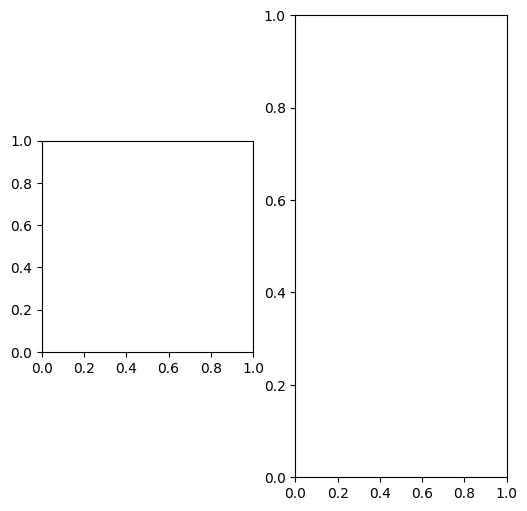

interactive(children=(IntSlider(value=0, description='z', max=0), Output()), _dom_classes=('widget-interact',)…

In [40]:
plot_scans([image.squeeze(1), out[2]],["" ,""])

In [57]:
plot_scans([final_x , final_recon,final_mask],["" , "",""])

interactive(children=(IntSlider(value=0, description='z', max=15), Output()), _dom_classes=('widget-interact',…

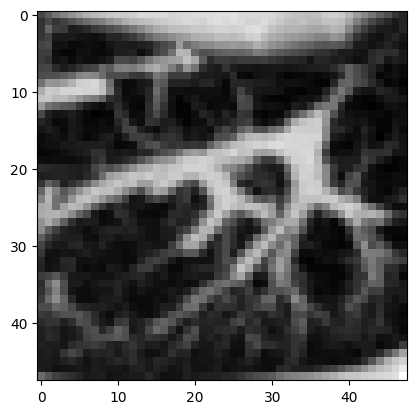

In [169]:
plt.imshow(np.max(final_x.numpy() ,axis =0),cmap = "gray")
plt.show()

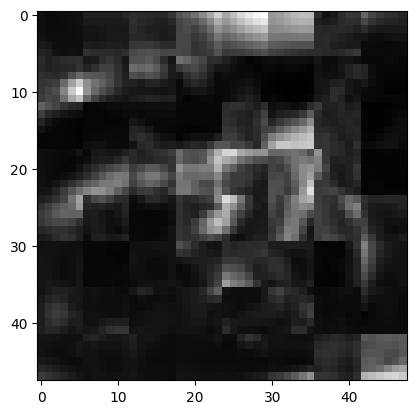

In [170]:
plt.imshow(np.max(final_recon.numpy() ,axis =0),cmap = "gray")
plt.show()

In [75]:
out[2].ndim

3

In [ ]:
plot_scans([])

In [34]:
import torch
from safetensors import safe_open


In [35]:
path = "/cache/fast_data_nas8/qct/shubham/fpr_cache_lidc/1.3.6.1.4.1.14519.5.2.1.6279.6001.991510467496831189331312523884.safetensors"

with safe_open(path, framework="pt") as f:
    tensor_slice = f.get_slice("labels")



In [54]:

import pandas as pd

In [76]:
df = pd.read_csv("/home/users/shubham.kumar/projects/qct_training_framework/notebooks/fpr_nlst.csv")

In [77]:
df.loc[df["Status"] == "test" , "Status"] = "train"

In [78]:
df.to_csv("/home/users/shubham.kumar/projects/qct_training_framework/notebooks/fpr_nlst.csv" , index =False)

In [74]:
df

,SeriesUID,Status
0,1.2.840.113654.2.55.63958747859170795163875361...,train
1,1.2.840.113654.2.55.15001367599869928485750524...,train
2,1.2.840.113654.2.55.10331884898838628773326988...,train
3,1.2.840.113654.2.55.15545085579499669960904803...,train
4,1.2.840.113654.2.55.38607123543534460221157070...,train
...,...,...
344,1.3.6.1.4.1.14519.5.2.1.7009.9004.362228162468...,train
345,1.2.840.113654.2.55.12192207809952073415380123...,train
346,1.2.840.113654.2.55.25275808408796599515059773...,train
347,1.2.840.113654.2.55.30582414251353258917076621...,train


In [97]:
pd.read_csv("/home/users/shubham.kumar/projects/qct_training_framework/notebooks/fpr_lidc_raw.csv")

,SeriesUID,Status
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.955688628308...,train
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.216882370221...,train
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.168985655485...,train
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.313835996725...,train
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.255999614855...,train
...,...,...
878,1.3.6.1.4.1.14519.5.2.1.6279.6001.292994770358...,train
879,1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295...,train
880,1.3.6.1.4.1.14519.5.2.1.6279.6001.257383535269...,train
881,1.3.6.1.4.1.14519.5.2.1.6279.6001.173556680294...,train


In [ ]:
def func(array , lung_mask_arr) :
    (48*48*16)
    

In [3]:
hydra.core.global_hydra.GlobalHydra.instance().clear()
hydra.initialize("../configs/datamodule/", version_base="1.2")
data_module = hydra.compose("lung_lobe_segmentation_datamodule.yaml")

In [4]:
datamodule = hydra.utils.instantiate(data_module)

Unable to find logging config yaml. Configuring fallback values
[2023-11-15 13:34:59 +0530] [WARNING] Invalid or unsupported selector 'select:not(:has(option[selected])) option:first-of-type,
option[selected]:not(option[selected] ~ option[selected]) ', ('Unknown pseudo-class', 'has')


2023-11-15 13:34:59.757 | INFO     | src.datamodules.load_data.lung_lobe_segmentation:lung_segmentation_data_loader:227 - train /home/users/shubham.kumar/projects/lung_lobe_segmentation/lung_lobe_cct_data.csv
2023-11-15 13:35:00.789 | INFO     | src.datamodules.load_data.lung_lobe_segmentation:_load_hdf5_seg_dataset_ctloader:284 - 291
2023-11-15 13:35:00.797 | INFO     | src.datamodules.load_data.lung_lobe_segmentation:lung_segmentation_data_loader:227 - train /home/users/shubham.kumar/projects/lung_lobe_segmentation/LCTSC_dataset.csv
2023-11-15 13:35:01.358 | INFO     | src.datamodules.load_data.lung_lobe_segmentation:_load_hdf5_seg_dataset_ctloader:284 - 24
2023-11-15 13:35:01.366 | INFO     | src.datamodules.load_data.lung_lobe_segmentation:lung_segmentation_data_loader:227 - train /home/users/shubham.kumar/projects/lung_lobe_segmentation/LOLA_dataset.csv
2023-11-15 13:35:01.708 | INFO     | src.datamodules.load_data.lung_lobe_segmentation:_load_hdf5_seg_dataset_ctloader:284 - 31
20

In [16]:
train_ds = datamodule.train_ds
val_ds = datamodule.val_ds
test_ds = datamodule.test_ds

In [17]:
import torch

In [6]:
i = 0 
data = train_ds[i]

In [7]:
image = data["image"]
lung_mask = data["lung_label"]

In [15]:
plot_scans([d, lung_mask] , ["", ""])

interactive(children=(IntSlider(value=0, description='z', max=120), Output()), _dom_classes=('widget-interact'…

In [21]:
from safetensors.torch import save_file
from tqdm.auto import tqdm
save_root = "/cache/fast_data_nas8/qct/shubham/fpr_lung_lobe_dataset"

for i in tqdm(range(len(test_ds))) : 
    
    data = test_ds[i]
    sid = data["series_uid"]

    data_to_save = {}
    data_to_save["image"] = data["image"].to(torch.int64)
    data_to_save["lung_mask"] = data["lung_label"].to(torch.int8)

    save_file(data_to_save, f"{save_root}/{sid}.safetensors")

  0%|          | 0/231 [00:00<?, ?it/s]

In [53]:
import numpy as np

def generate_3d_patch_indices(image_shape, patch_size, overlap):
    H, W, D = image_shape
    h, w, d = patch_size
    o_h, o_w, o_d = overlap

    # Calculate stride based on overlap
    s_h = h - o_h
    s_w = w - o_w
    s_d = d - o_d

    # Ensure that stride is not less than 1
    s_h, s_w, s_d = max(1, s_h), max(1, s_w), max(1, s_d)

    # Generating ranges for start indices
    z_starts = np.arange(0, H - h + 1, s_h)
    y_starts = np.arange(0, W - w + 1, s_w)
    x_starts = np.arange(0, D - d + 1, s_d)

    # Creating meshgrid of start indices
    z_grid, y_grid, x_grid = np.meshgrid(z_starts, y_starts, x_starts, indexing='ij')

    # Flattening the arrays to create a list of start indices
    starts = np.vstack([z_grid.ravel(), y_grid.ravel(), x_grid.ravel()]).T

    # Calculating the corresponding end indices
    ends = starts + np.array([h, w, d])

    # Combining start and end indices
    patch_indices = np.hstack([starts, ends])

    return patch_indices

# Example usage:
# indices = generate_3d_patch_indices((H, W, D), (h, w, d), (o_h, o_w, o_d))


In [56]:
a = generate_3d_patch_indices((350,350,200), (48,48,16), (4,4,2))

In [57]:
len(a)

686

In [58]:
a

array([[  0,   0,   0,  48,  48,  16],
       [  0,   0,  14,  48,  48,  30],
       [  0,   0,  28,  48,  48,  44],
       ...,
       [264, 264, 154, 312, 312, 170],
       [264, 264, 168, 312, 312, 184],
       [264, 264, 182, 312, 312, 198]])

In [ ]:
256*32*32*96

In [ ]:
128,256,256

In [ ]:
256*512*512

In [57]:
from transformers import AutoTokenizer


In [58]:
from datasets import load_dataset


ModuleNotFoundError: No module named 'datasets'

In [59]:
pd.read_csv("/home/users/shubham.kumar/projects/qct_training_framework/notebooks/fpr_lidc.csv")

,SeriesUID,Status
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.624425075947...,train
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.159521777966...,train
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.117040183261...,train
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.513023675145...,train
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.272961322147...,train
...,...,...
883,1.3.6.1.4.1.14519.5.2.1.6279.6001.245349763807...,test
884,1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545...,test
885,1.3.6.1.4.1.14519.5.2.1.6279.6001.324649110927...,test
886,1.3.6.1.4.1.14519.5.2.1.6279.6001.270788655216...,test
